In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib import rc
import seaborn as sns
from datetime import date, timedelta
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import copy

In [2]:
anag       = pd.read_csv('../dati/anagrafica-vaccini-summary-latest.csv')  # load data set
somm1      = pd.read_csv('../dati/somministrazioni-vaccini-latest.csv')
cons       = pd.read_csv('../dati/consegne-vaccini-latest.csv')
somm2      = pd.read_csv('../dati/somministrazioni-vaccini-summary-latest.csv')
punti_somm = pd.read_csv('../dati/punti-somministrazione-latest.csv')
vaccini    = pd.read_csv('../dati/vaccini-summary-latest.csv')
platea     = pd.read_csv('../dati/platea.csv')

total = vaccini['dosi_consegnate'].sum()
cons

area        fornitore  numero_dosi data_consegna codice_NUTS1  \
0     ABR  Pfizer/BioNTech          135    2020-12-27          ITF   
1     ABR  Pfizer/BioNTech         7800    2020-12-30          ITF   
2     ABR  Pfizer/BioNTech         3900    2021-01-05          ITF   
3     ABR  Pfizer/BioNTech         3900    2021-01-07          ITF   
4     ABR  Pfizer/BioNTech         3900    2021-01-11          ITF   
...   ...              ...          ...           ...          ...   
5904  VEN  Pfizer/BioNTech            6    2021-12-16          ITH   
5905  VEN  Pfizer/BioNTech            6    2021-12-17          ITH   
5906  VEN          Moderna            3    2021-12-21          ITH   
5907  VEN          Moderna        63100    2021-12-22          ITH   
5908  VEN  Pfizer/BioNTech       121680    2021-12-22          ITH   

     codice_NUTS2  codice_regione_ISTAT nome_area  
0            ITF1                    13   Abruzzo  
1            ITF1                    13   Abruzzo  
2            ITF1                    13   Abruzzo  
3            ITF1                    13   Abruzzo  
4            ITF1                    13   Abruzzo  
...           ...                   ...       ...  
5904         ITH3                     5    Veneto  
5905         ITH3                     5    Veneto  
5906         ITH3                     5    Veneto  
5907         ITH3                     5    Veneto  
5908         ITH3                     5    Veneto  

[5909 rows x 8 columns]

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import ( OffsetImage,AnchoredOffsetbox)


def watermark2(ax=None):
    if ax is None:
        ax = plt.gca()
    img = Image.open('../coccarda.png')
    width, height = ax.figure.get_size_inches()*fig.dpi
    wm_width = int(width/20) # make the watermark 1/4 of the figure size
    scaling = (wm_width / float(img.size[0]))
    wm_height = int(float(img.size[1])*float(scaling))
    img = img.resize((wm_width, wm_height), Image.ANTIALIAS)

    imagebox = OffsetImage(img, zoom=1, alpha=0.2)
    imagebox.image.axes = ax

    ao = AnchoredOffsetbox(loc = 'upper right', pad=0.01, borderpad=0, child=imagebox)
    ao.patch.set_alpha(0)
    ax.add_artist(ao)

In [4]:
NomiRegioni = somm1.nome_area.unique()
PopoRegioni = [1312000,562869,1947000,5802000,4459000,1215000,5879000,1551000,10060000,1525000,305617,520891,538223,4356000,4029000,1640000,5000000,3730000,882015,125666,4906000]
DictRegioni = dict(zip(NomiRegioni, PopoRegioni))
PopoItalia  = 59550000

#create a data frame dictionary to store your data frames
somministrazioni       = {elem : pd.DataFrame for elem in NomiRegioni}
somministrazioni_l     = {elem : pd.DataFrame for elem in NomiRegioni}
consegne               = {elem : pd.DataFrame for elem in NomiRegioni}

today = datetime.today().strftime('%d/%m/%Y')
yesterday = (date.today() - timedelta(days=1)).strftime('%d/%m/%Y')
idx = pd.date_range('27/12/2020', yesterday)

for key in somministrazioni.keys():
    somministrazioni[key]                          = somm1[:][somm1.nome_area == key]
    somministrazioni[key]['data_somministrazione'] = pd.to_datetime(somministrazioni[key]['data_somministrazione'], format='%Y-%m-%d', yearfirst=True)
    #somministrazioni[key]                          = somministrazioni[key].set_index('data_somministrazione')
    #somministrazioni[key].index                    = pd.DatetimeIndex(somministrazioni[key].index)
    #somministrazioni[key].sort_index(inplace=True)
    #somministrazioni[key]                          = somministrazioni[key].reindex(idx)
    #somministrazioni[key].index                    = somministrazioni[key].index.strftime('%d/%m/%Y')
    #somministrazioni[key].fillna(0,inplace=True)

for key in consegne.keys():
    consegne[key] = cons[:][cons.nome_area == key]
    consegne[key]['data_consegna'] = pd.to_datetime(consegne[key]['data_consegna'], format='%Y-%m-%d', yearfirst=True)
    #consegne[key]       = consegne[key].set_index('data_consegna')
    #consegne[key].index = pd.DatetimeIndex(consegne[key].index)
    #consegne[key]       = consegne[key].reindex(idx)
    #consegne[key].index = consegne[key].index.strftime('%d/%m/%Y')
    #consegne[key].fillna(0,inplace=True)

for key in somministrazioni_l.keys():
    somministrazioni_l[key] = somm2[:][somm2.nome_area == key]
    somministrazioni_l[key]['data_somministrazione'] = pd.to_datetime(somministrazioni_l[key]['data_somministrazione'], format='%Y-%m-%d', yearfirst=True)
    somministrazioni_l[key]       = somministrazioni_l[key].set_index('data_somministrazione')
    somministrazioni_l[key].index = pd.DatetimeIndex(somministrazioni_l[key].index)
    somministrazioni_l[key].sort_index(inplace=True)
    somministrazioni_l[key]       = somministrazioni_l[key].reindex(idx)
    somministrazioni_l[key].index = somministrazioni_l[key].index.strftime('%d/%m/%Y')
    somministrazioni_l[key].area.fillna(method='ffill',inplace=True)
    somministrazioni_l[key].codice_NUTS1.fillna(method='ffill',inplace=True)
    somministrazioni_l[key].codice_NUTS2.fillna(method='ffill',inplace=True)
    somministrazioni_l[key].codice_regione_ISTAT.fillna(method='ffill',inplace=True)
    somministrazioni_l[key].nome_area.fillna(method='ffill',inplace=True)
    somministrazioni_l[key].fillna(0,inplace=True)

In [5]:
italia = copy.deepcopy(somministrazioni_l['Emilia-Romagna'])

italia[                  'totale'] = sum(somministrazioni_l[key][                  'totale'].fillna(0) for key in somministrazioni_l.keys())
italia[          'sesso_maschile'] = sum(somministrazioni_l[key][          'sesso_maschile'].fillna(0) for key in somministrazioni_l.keys())
italia[         'sesso_femminile'] = sum(somministrazioni_l[key][         'sesso_femminile'].fillna(0) for key in somministrazioni_l.keys())
italia[              'prima_dose'] = sum(somministrazioni_l[key][              'prima_dose'].fillna(0) for key in somministrazioni_l.keys())
italia[            'seconda_dose'] = sum(somministrazioni_l[key][            'seconda_dose'].fillna(0) for key in somministrazioni_l.keys())
italia[     'pregressa_infezione'] = sum(somministrazioni_l[key][     'pregressa_infezione'].fillna(0) for key in somministrazioni_l.keys())
italia['dose_addizionale_booster'] = sum(somministrazioni_l[key]['dose_addizionale_booster'].fillna(0) for key in somministrazioni_l.keys())



italia.drop(columns=['codice_NUTS1','codice_NUTS2','codice_regione_ISTAT'], axis=1, inplace = True)
italia['area'] = 'ITA'
italia['nome_area'] = 'Italia'
italia

area    totale  sesso_maschile  sesso_femminile  prima_dose  \
27/12/2020  ITA    7342.0          3498.0           3844.0      7327.0   
28/12/2020  ITA    1502.0           687.0            815.0      1500.0   
29/12/2020  ITA    1094.0           482.0            612.0      1093.0   
30/12/2020  ITA    4856.0          1950.0           2906.0      4854.0   
31/12/2020  ITA   25928.0         10057.0          15871.0     25894.0   
...         ...       ...             ...              ...         ...   
20/12/2021  ITA  540505.0        263241.0         277264.0     40802.0   
21/12/2021  ITA  554097.0        269649.0         284448.0     40147.0   
22/12/2021  ITA  542600.0        267487.0         275113.0     41088.0   
23/12/2021  ITA  481697.0        245724.0         235973.0     41604.0   
24/12/2021  ITA  228943.0        125297.0         103646.0     14602.0   

            seconda_dose  pregressa_infezione  dose_addizionale_booster  \
27/12/2020           0.0                 15.0                       0.0   
28/12/2020           0.0                  2.0                       0.0   
29/12/2020           0.0                  1.0                       0.0   
30/12/2020           0.0                  2.0                       0.0   
31/12/2020           0.0                 34.0                       0.0   
...                  ...                  ...                       ...   
20/12/2021       26867.0                781.0                  472055.0   
21/12/2021       26517.0                763.0                  486670.0   
22/12/2021       25559.0                765.0                  475188.0   
23/12/2021       24077.0                752.0                  415264.0   
24/12/2021       11774.0                340.0                  202227.0   

           nome_area  
27/12/2020    Italia  
28/12/2020    Italia  
29/12/2020    Italia  
30/12/2020    Italia  
31/12/2020    Italia  
...              ...  
20/12/2021    Italia  
21/12/2021    Italia  
22/12/2021    Italia  
23/12/2021    Italia  
24/12/2021    Italia  

[363 rows x 9 columns]

In [6]:
for key in somministrazioni_l.keys():
    somministrazioni_l[key][                             'totale_per1000'] = somministrazioni_l[key][                             'totale'] / DictRegioni[key] * 100
    somministrazioni_l[key][                         'prima_dose_per1000'] = somministrazioni_l[key][                         'prima_dose'] / DictRegioni[key] * 100
    somministrazioni_l[key][                       'seconda_dose_per1000'] = somministrazioni_l[key][                       'seconda_dose'] / DictRegioni[key] * 100
    somministrazioni_l[key][                'pregressa_infezione_per1000'] = somministrazioni_l[key][                'pregressa_infezione'] / DictRegioni[key] * 100
    somministrazioni_l[key][           'dose_addizionale_booster_per1000'] = somministrazioni_l[key][           'dose_addizionale_booster'] / DictRegioni[key] * 100
    somministrazioni_l[key][                               'media_totale'] = somministrazioni_l[key][                             'totale'].rolling(window=7, min_periods=1).mean()
    somministrazioni_l[key][                           'media_prima_dose'] = somministrazioni_l[key][                         'prima_dose'].rolling(window=7, min_periods=1).mean()
    somministrazioni_l[key][                         'media_seconda_dose'] = somministrazioni_l[key][                       'seconda_dose'].rolling(window=7, min_periods=1).mean()
    somministrazioni_l[key][                  'media_pregressa_infezione'] = somministrazioni_l[key][                'pregressa_infezione'].rolling(window=7, min_periods=1).mean()
    somministrazioni_l[key][             'media_dose_addizionale_booster'] = somministrazioni_l[key][           'dose_addizionale_booster'].rolling(window=7, min_periods=1).mean()
    somministrazioni_l[key][                       'media_totale_per1000'] = somministrazioni_l[key][                       'media_totale'] / DictRegioni[key] * 100
    somministrazioni_l[key][                   'media_prima_dose_per1000'] = somministrazioni_l[key][                   'media_prima_dose'] / DictRegioni[key] * 100
    somministrazioni_l[key][                 'media_seconda_dose_per1000'] = somministrazioni_l[key][                 'media_seconda_dose'] / DictRegioni[key] * 100
    somministrazioni_l[key][          'media_pregressa_infezione_per1000'] = somministrazioni_l[key][          'media_pregressa_infezione'] / DictRegioni[key] * 100
    somministrazioni_l[key][     'media_dose_addizionale_booster_per1000'] = somministrazioni_l[key][     'media_dose_addizionale_booster'] / DictRegioni[key] * 100
    somministrazioni_l[key][                          'cumulativa_totale'] = somministrazioni_l[key][                             'totale'].cumsum()
    somministrazioni_l[key][                      'cumulativa_prima_dose'] = somministrazioni_l[key][                         'prima_dose'].cumsum()
    somministrazioni_l[key][                    'cumulativa_seconda_dose'] = somministrazioni_l[key][                       'seconda_dose'].cumsum()
    somministrazioni_l[key][             'cumulativa_pregressa_infezione'] = somministrazioni_l[key][                'pregressa_infezione'].cumsum()
    somministrazioni_l[key][        'cumulativa_dose_addizionale_booster'] = somministrazioni_l[key][           'dose_addizionale_booster'].cumsum()
    somministrazioni_l[key][                  'cumulativa_totale_per1000'] = somministrazioni_l[key][                  'cumulativa_totale'] / DictRegioni[key] * 100
    somministrazioni_l[key][              'cumulativa_prima_dose_per1000'] = somministrazioni_l[key][              'cumulativa_prima_dose'] / DictRegioni[key] * 100
    somministrazioni_l[key][            'cumulativa_seconda_dose_per1000'] = somministrazioni_l[key][            'cumulativa_seconda_dose'] / DictRegioni[key] * 100
    somministrazioni_l[key][     'cumulativa_pregressa_infezione_per1000'] = somministrazioni_l[key][     'cumulativa_pregressa_infezione'] / DictRegioni[key] * 100
    somministrazioni_l[key]['cumulativa_dose_addizionale_booster_per1000'] = somministrazioni_l[key]['cumulativa_dose_addizionale_booster'] / DictRegioni[key] * 100

italia[                  'totale_per1000']    = italia[                  'totale'] / PopoItalia * 100
italia[              'prima_dose_per1000']    = italia[              'prima_dose'] / PopoItalia * 100
italia[            'seconda_dose_per1000']    = italia[            'seconda_dose'] / PopoItalia * 100
italia[     'pregressa_infezione_per1000']    = italia[     'pregressa_infezione'] / PopoItalia * 100
italia['dose_addizionale_booster_per1000']    = italia['dose_addizionale_booster'] / PopoItalia * 100

italia[                  'media_totale']      = italia[                  'totale'].rolling(window=7, min_periods=1).mean()
italia[              'media_prima_dose']      = italia[              'prima_dose'].rolling(window=7, min_periods=1).mean()
italia[            'media_seconda_dose']      = italia[            'seconda_dose'].rolling(window=7, min_periods=1).mean()
italia[     'media_pregressa_infezione']      = italia[     'pregressa_infezione'].rolling(window=7, min_periods=1).mean()
italia['media_dose_addizionale_booster']      = italia['dose_addizionale_booster'].rolling(window=7, min_periods=1).mean()

italia[                  'cumulativa_totale'] = italia[                  'totale'].cumsum()
italia[              'cumulativa_prima_dose'] = italia[              'prima_dose'].cumsum()
italia[            'cumulativa_seconda_dose'] = italia[            'seconda_dose'].cumsum()
italia[     'cumulativa_pregressa_infezione'] = italia[     'pregressa_infezione'].cumsum()
italia['cumulativa_dose_addizionale_booster'] = italia['dose_addizionale_booster'].cumsum()

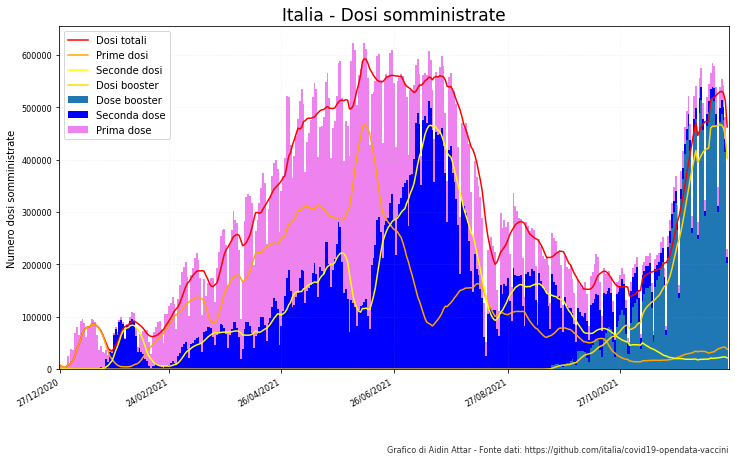

In [7]:
fig, ax = plt.subplots(figsize=(12,7))
label   = ['Dosi totali','Prime dosi','Seconde dosi','Dosi booster','Dose booster', 'Seconda dose','Prima dose' ]
italia[['dose_addizionale_booster','seconda_dose','prima_dose']].plot.bar(ax = ax, stacked = True, color = ['C0','blue','violet'], width = 1)
italia.plot(y='media_totale',                   kind = 'line', color =    'red', ax = ax)
italia.plot(y='media_prima_dose',               kind = 'line', color = 'orange', ax = ax)
italia.plot(y='media_seconda_dose',             kind = 'line', color = 'yellow', ax = ax)
italia.plot(y='media_dose_addizionale_booster', kind = 'line', color =   'gold', ax = ax)

ax.legend(label,loc="upper left")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax.set_title('Italia - Dosi somministrate', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 0.2,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

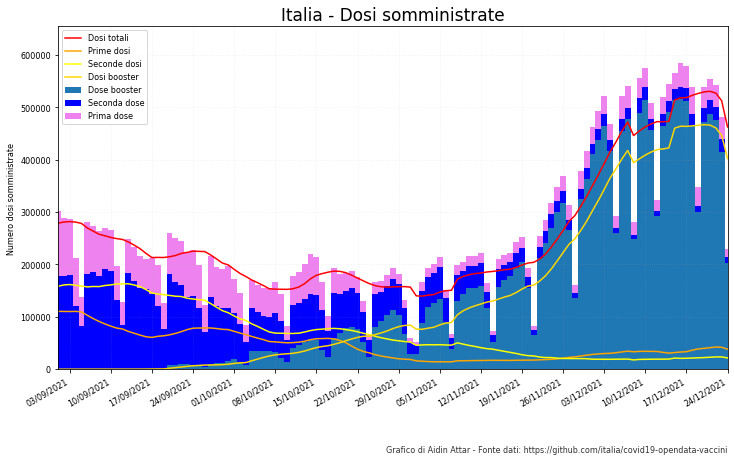

In [8]:
fig, ax = plt.subplots(figsize=(12,7))

label   = ['Dosi totali','Prime dosi','Seconde dosi','Dosi booster','Dose booster', 'Seconda dose','Prima dose' ]
italia[['dose_addizionale_booster','seconda_dose','prima_dose']].plot.bar(ax = ax, stacked = True, color = ['C0','blue','violet'], width = 1)
ax.plot(italia.index,                   italia.media_totale, color =    'red')
ax.plot(italia.index,               italia.media_prima_dose, color = 'orange')
ax.plot(italia.index,             italia.media_seconda_dose, color = 'yellow')
ax.plot(italia.index, italia.media_dose_addizionale_booster, color =   'gold')

ax.set_xlim([date(2021, 9, 1).strftime('%d/%m/%Y'), yesterday])

ax.legend(label,loc="upper left")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

ax.set_title('Italia - Dosi somministrate', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 0.2,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()


plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

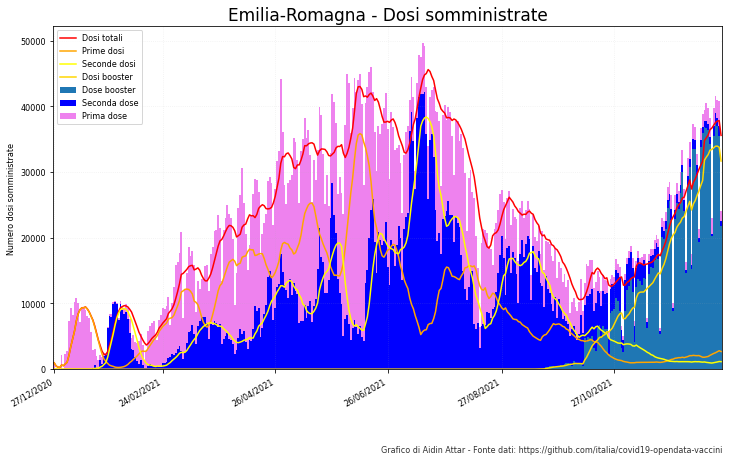

In [9]:
fig, ax = plt.subplots(figsize=(12,7))
label   = ['Dosi totali','Prime dosi','Seconde dosi','Dosi booster','Dose booster', 'Seconda dose','Prima dose' ]
somministrazioni_l['Emilia-Romagna'][['dose_addizionale_booster','seconda_dose','prima_dose']].plot.bar(label = label ,ax = ax,
                                                                                             stacked = True, xlabel = '', color = ['C0','blue','violet'], width = 1)
ax.plot(somministrazioni_l['Emilia-Romagna'].index,                   somministrazioni_l['Emilia-Romagna'].media_totale, color =    'red')
ax.plot(somministrazioni_l['Emilia-Romagna'].index,               somministrazioni_l['Emilia-Romagna'].media_prima_dose, color = 'orange')
ax.plot(somministrazioni_l['Emilia-Romagna'].index,             somministrazioni_l['Emilia-Romagna'].media_seconda_dose, color = 'yellow')
ax.plot(somministrazioni_l['Emilia-Romagna'].index, somministrazioni_l['Emilia-Romagna'].media_dose_addizionale_booster, color =   'gold')

ax.legend(label,loc="upper left")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax.set_title('Emilia-Romagna - Dosi somministrate', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 0.2,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

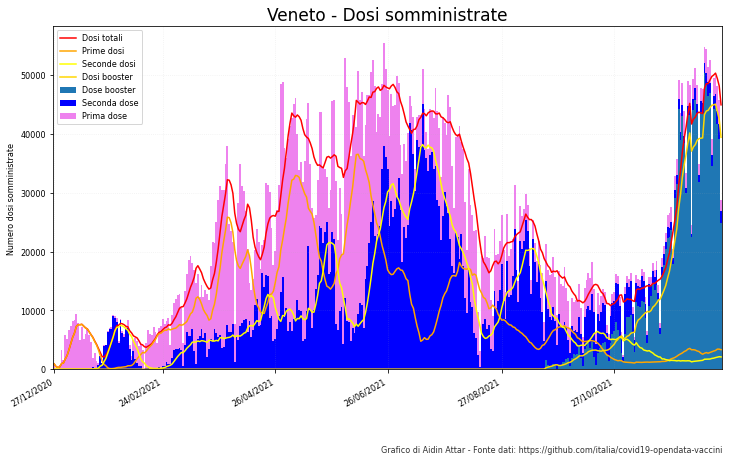

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
label   = ['Dosi totali','Prime dosi','Seconde dosi','Dosi booster','Dose booster', 'Seconda dose','Prima dose' ]
somministrazioni_l['Veneto'][['dose_addizionale_booster','seconda_dose','prima_dose']].plot.bar(label = label ,ax = ax,
                                                                          stacked = True, xlabel = '', color = ['C0','blue','violet'], width = 1)
ax.plot(somministrazioni_l['Veneto'].index,                  somministrazioni_l['Veneto'].media_totale, color =    'red')
ax.plot(somministrazioni_l['Veneto'].index,              somministrazioni_l['Veneto'].media_prima_dose, color = 'orange')
ax.plot(somministrazioni_l['Veneto'].index,            somministrazioni_l['Veneto'].media_seconda_dose, color = 'yellow')
ax.plot(somministrazioni_l['Veneto'].index, somministrazioni_l['Veneto'].media_dose_addizionale_booster, color =   'gold')

ax.legend(label,loc="upper left")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

ax.set_title('Veneto - Dosi somministrate', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 0.2,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

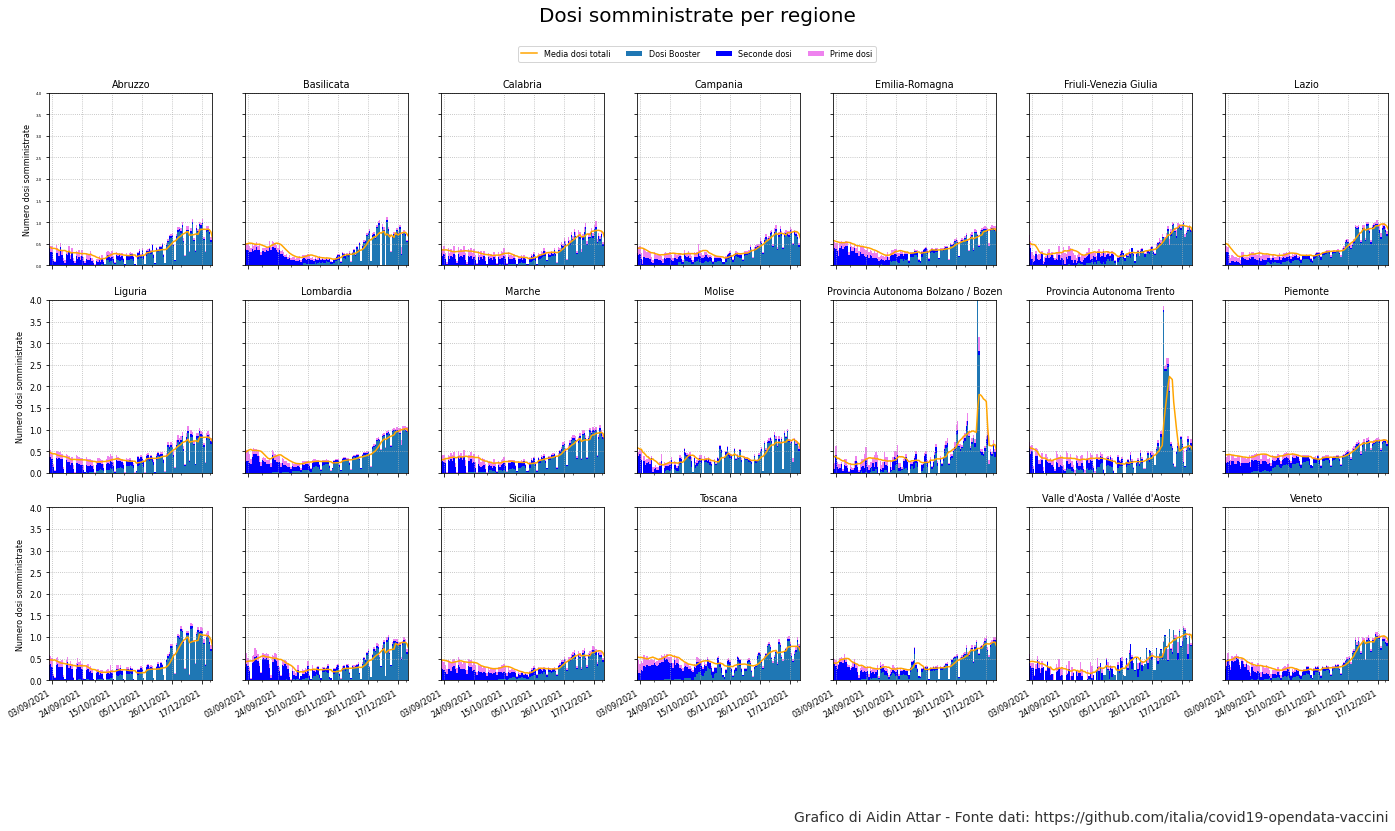

In [99]:
fig, ax = plt.subplots(nrows=3,ncols=7,figsize=(24,12), sharey=True, sharex=True)
x=0
y=0
for key in somministrazioni_l.keys():
    somministrazioni_l[key][['dose_addizionale_booster_per1000',
                             'seconda_dose_per1000',
                             'prima_dose_per1000']].plot.bar(ax = ax[y,x],legend=False,
                                                             stacked = True, color = ['C0','blue','violet'],
                                                             width = 1, title=str(key))
    ax[y,x].plot(somministrazioni_l[key].index,somministrazioni_l[key]['media_totale_per1000'], color='orange')
    ax[y,x].grid(alpha = 1,linestyle='dotted')
    x+=1
    if x==7:
        x=0
        y+=1
ax[0,0].set_ylim([0,4])
ax[0,0].set_xlim([date(2021, 9, 1).strftime('%d/%m/%Y'), yesterday])
ax[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))

fig.suptitle("Dosi somministrate per regione", fontsize=20)
plt.rcParams['font.size'] = '8'
ax[0,0].tick_params(axis='both', labelsize=4)
ax[0,0].set_ylabel('Numero dosi somministrate')
ax[1,0].set_ylabel('Numero dosi somministrate')
ax[2,0].set_ylabel('Numero dosi somministrate')
ax[0,0].set_xlabel("")
fig.autofmt_xdate()

labels = ['Media dosi totali','Dosi Booster', 'Seconde dosi', 'Prime dosi']
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

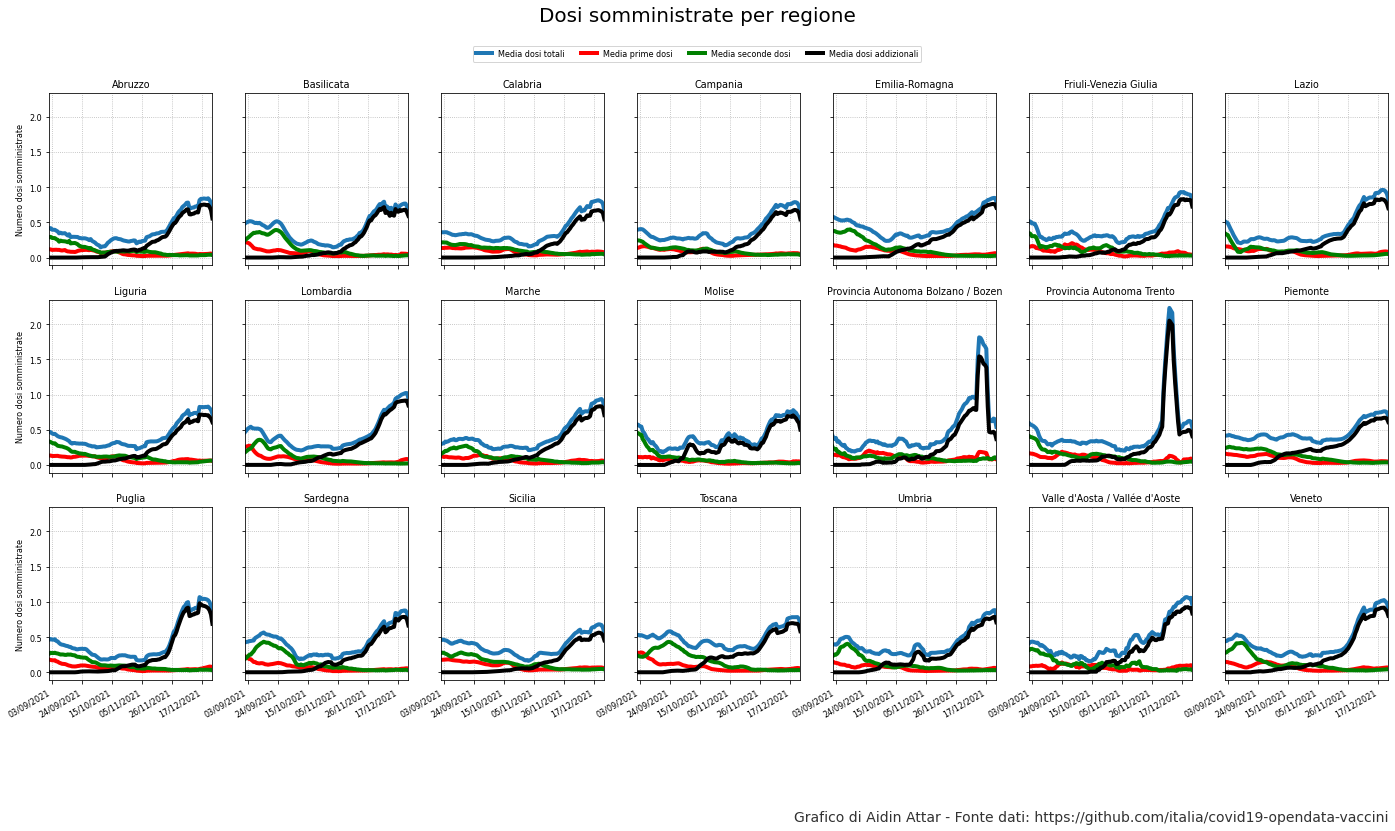

In [100]:
fig, ax = plt.subplots(nrows=3,ncols=7,figsize=(24,12), sharey=True, sharex=True)
x=0
y=0
for key in somministrazioni_l.keys():
    ax[y,x].plot(somministrazioni_l[key].index,                   somministrazioni_l[key].media_totale_per1000, color=   'C0',lw=4)
    ax[y,x].plot(somministrazioni_l[key].index,               somministrazioni_l[key].media_prima_dose_per1000, color=  'red',lw=4)
    ax[y,x].plot(somministrazioni_l[key].index,             somministrazioni_l[key].media_seconda_dose_per1000, color='green',lw=4)
    ax[y,x].plot(somministrazioni_l[key].index, somministrazioni_l[key].media_dose_addizionale_booster_per1000, color='black',lw=4)
    ax[y,x].set_title(key)
    ax[y,x].grid(linestyle='dotted')
    x+=1
    if x==7:
        x=0
        y+=1
#ax[0,0].set_ylim([0,40])
ax[0,0].set_xlim([date(2021, 9, 1).strftime('%d/%m/%Y'), yesterday])
ax[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))

fig.suptitle("Dosi somministrate per regione", fontsize=20)
plt.rcParams['font.size'] = '8'
ax[0,0].tick_params(axis='both', labelsize=8)
ax[0,0].set_ylabel('Numero dosi somministrate')
ax[1,0].set_ylabel('Numero dosi somministrate')
ax[2,0].set_ylabel('Numero dosi somministrate')
ax[0,0].set_xlabel("")
fig.autofmt_xdate()
labels = ['Media dosi totali', 'Media prime dosi', 'Media seconde dosi', 'Media dosi addizionali']
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

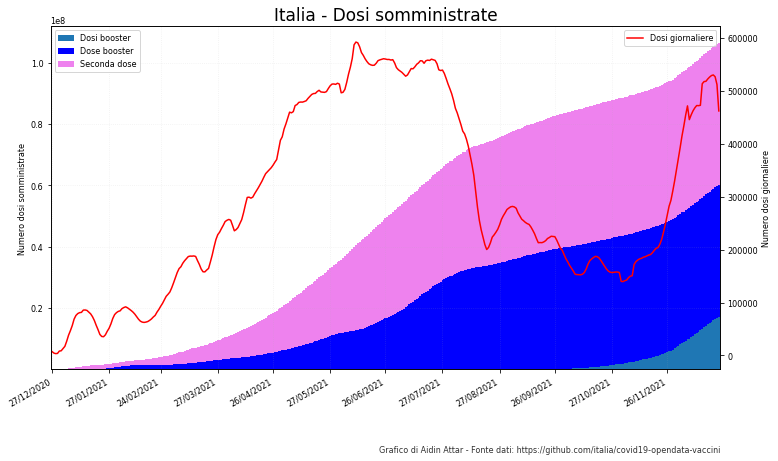

In [13]:
fig, ax = plt.subplots(figsize=(12,7))

label   = ['Dosi booster','Dose booster', 'Seconda dose','Prima dose' ]
italia[['cumulativa_dose_addizionale_booster','cumulativa_seconda_dose','cumulativa_prima_dose']].plot.bar(ax = ax, stacked = True, color = ['C0','blue','violet'], width = 1)


#ax.set_xlim([date(2021, 9, 1).strftime('%d/%m/%Y'), yesterday])

ax.legend(label,loc="upper left")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax.set_title('Italia - Dosi somministrate', fontsize=17)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 0.2,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(italia.index,                   italia.media_totale, color =    'red', label='Dosi giornaliere')
ax2.set_ylabel('Numero dosi giornaliere')
ax2.legend(loc='upper right')
ax2.tick_params(axis='both', labelsize=8)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

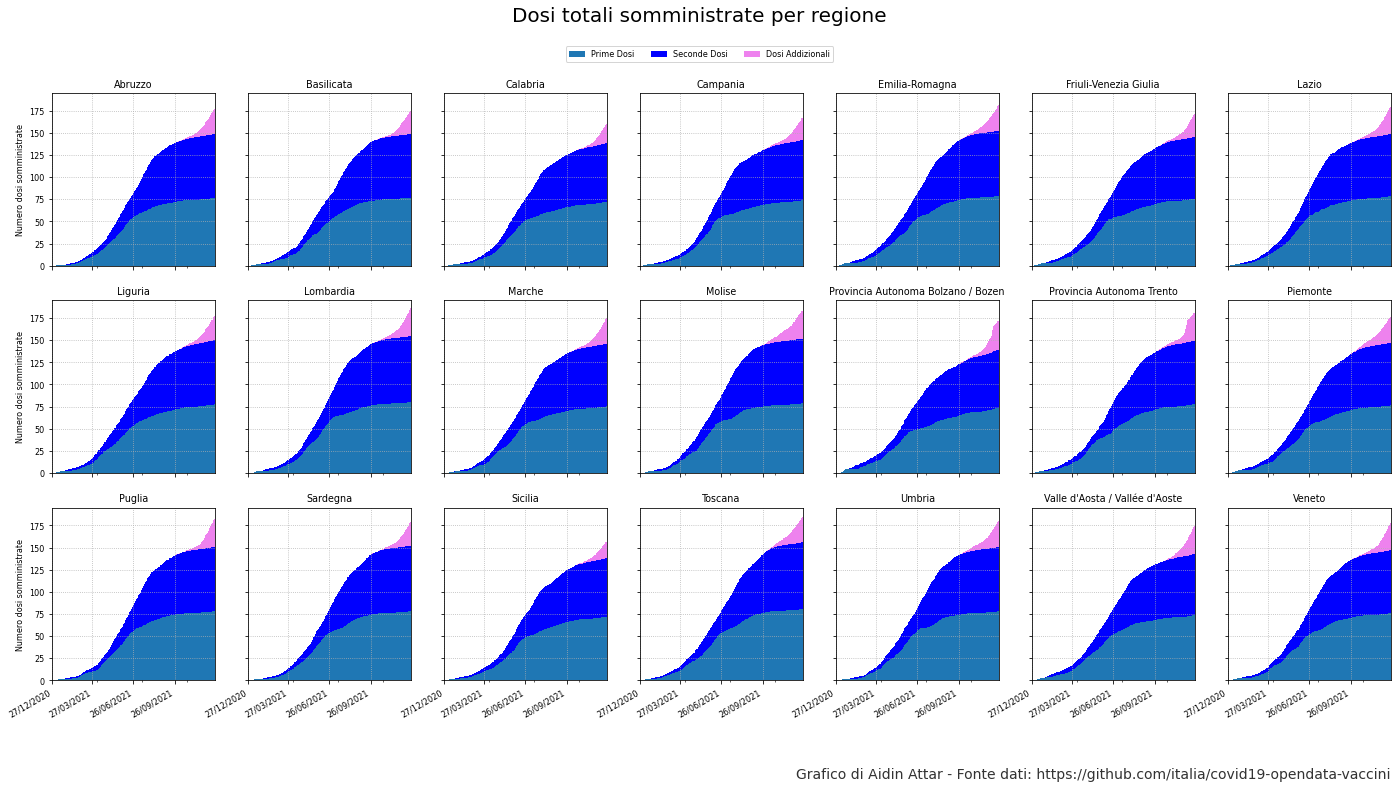

In [96]:
fig, ax = plt.subplots(nrows=3,ncols=7,figsize=(24,12), sharey=True, sharex=True)
x=0
y=0
for key in somministrazioni_l.keys():
    somministrazioni_l[key][['cumulativa_prima_dose_per1000','cumulativa_seconda_dose_per1000','cumulativa_dose_addizionale_booster_per1000']].plot.bar(ax = ax[y,x], stacked = True, color = ['C0','blue','violet'],legend=False,width = 1)
    ax[y,x].set_title(str(key))
    ax[y,x].grid(linestyle='dotted')
    x+=1
    if x==7:
        x=0
        y+=1
ax[0,0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))

fig.suptitle("Dosi totali somministrate per regione", fontsize=20)
plt.rcParams['font.size'] = '8'
ax[0,0].tick_params(axis='both', labelsize=8)
#ax.grid(alpha = 0.2,linestyle='dotted')
ax[0,0].set_ylabel('Numero dosi somministrate')
ax[1,0].set_ylabel('Numero dosi somministrate')
ax[2,0].set_ylabel('Numero dosi somministrate')
ax[0,0].set_xlabel("")
fig.autofmt_xdate()
labels = ['Prime Dosi','Seconde Dosi','Dosi Addizionali']
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)

plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

Text(1, 0, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini')

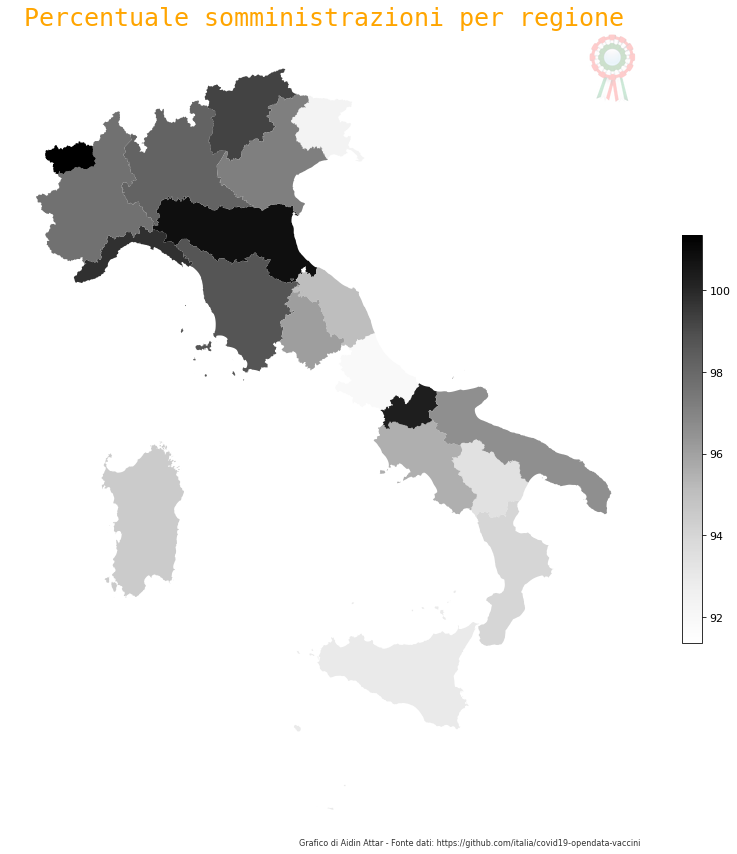

In [15]:
import sys
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.cm as cm

italy      = gpd.read_file('italy-with-regions/reg2011_g.shp')

vaccini1 = vaccini.set_index('area')
sum_ = vaccini1.loc[['PAT', 'PAB']].sum().to_frame().transpose()
sum_ = sum_.rename(index={0: 'TRE'})

vaccini1.drop(['PAT', 'PAB'],inplace=True)
vaccini1 = vaccini1.append(sum_)
vaccini1 = vaccini1.sort_index()

italy.sort_values(by = 'NOME_REG', inplace = True)
italy.reset_index(drop=True,       inplace = True)
italy.index = vaccini1.index

italy = italy.merge(vaccini1,left_index=True, right_index=True, how='right')
italy['percentuale_somministrazione'] = italy['dosi_somministrate'] / italy['dosi_consegnate'] * 100

fig, ax = plt.subplots(1, figsize=(15, 15))
col = 'percentuale_somministrazione'
ax.set_title('Percentuale somministrazioni per regione', 
             fontdict={'fontsize':'25', 'fontweight':'3'}, 
             color='Orange', 
             fontfamily='monospace')

normalize = mcolors.Normalize(vmin=italy['percentuale_somministrazione'].min(), vmax=italy['percentuale_somministrazione'].max())
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap="Greys")
#scalarmappaple.set_array(italy.percentuale_somministrazione)
italy.plot(ax=ax,
           column=col,
           cmap='Greys')

plt.axis('off')
cbar = plt.colorbar(scalarmappaple, shrink=0.5)
cbar.ax.tick_params(labelsize=11)
watermark2()
ax.text(1, 0, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=ax.transAxes,
        fontsize=8, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

In [16]:
oggi = [somministrazioni_l[key].iloc[-1] for key in somministrazioni_l.keys()]
cum = pd.DataFrame(oggi)
cum

area   totale  sesso_maschile  sesso_femminile  prima_dose  \
24/12/2021  ABR   2029.0          1153.0            876.0        82.0   
24/12/2021  BAS   2494.0          1389.0           1105.0        98.0   
24/12/2021  CAL   3765.0          2086.0           1679.0       280.0   
24/12/2021  CAM  10215.0          5807.0           4408.0       468.0   
24/12/2021  EMR  24165.0         13091.0          11074.0      1535.0   
24/12/2021  FVG   4027.0          2119.0           1908.0       341.0   
24/12/2021  LAZ  28367.0         15130.0          13237.0      1690.0   
24/12/2021  LIG   8452.0          4558.0           3894.0       552.0   
24/12/2021  LOM  55335.0         30434.0          24901.0      3225.0   
24/12/2021  MAR   3688.0          2026.0           1662.0       147.0   
24/12/2021  MOL     65.0            34.0             31.0         0.0   
24/12/2021  PAB    479.0           258.0            221.0         3.0   
24/12/2021  PAT    990.0           533.0            457.0        39.0   
24/12/2021  PIE  19277.0         10356.0           8921.0      1505.0   
24/12/2021  PUG   7244.0          3926.0           3318.0       476.0   
24/12/2021  SAR   3997.0          2179.0           1818.0       223.0   
24/12/2021  SIC  10632.0          5988.0           4644.0       903.0   
24/12/2021  TOS  10649.0          5954.0           4695.0       871.0   
24/12/2021  UMB   3860.0          2029.0           1831.0       232.0   
24/12/2021  VDA    395.0           219.0            176.0        25.0   
24/12/2021  VEN  28818.0         16028.0          12790.0      1907.0   

            seconda_dose  pregressa_infezione  dose_addizionale_booster  \
24/12/2021         100.0                  1.0                    1846.0   
24/12/2021         200.0                  1.0                    2195.0   
24/12/2021         236.0                  1.0                    3248.0   
24/12/2021         615.0                  6.0                    9126.0   
24/12/2021         838.0                 55.0                   21737.0   
24/12/2021         124.0                 15.0                    3547.0   
24/12/2021        1501.0                 42.0                   25134.0   
24/12/2021         654.0                  1.0                    7245.0   
24/12/2021        1469.0                 34.0                   50607.0   
24/12/2021         163.0                  7.0                    3371.0   
24/12/2021           4.0                  0.0                      61.0   
24/12/2021          15.0                  0.0                     461.0   
24/12/2021         143.0                  1.0                     807.0   
24/12/2021        1303.0                 16.0                   16453.0   
24/12/2021         223.0                  3.0                    6542.0   
24/12/2021         224.0                 17.0                    3533.0   
24/12/2021         770.0                 24.0                    8935.0   
24/12/2021         975.0                 32.0                    8771.0   
24/12/2021         193.0                  9.0                    3426.0   
24/12/2021          48.0                  0.0                     322.0   
24/12/2021        1976.0                 75.0                   24860.0   

           codice_NUTS1 codice_NUTS2  ...  cumulativa_totale  \
24/12/2021          ITF         ITF1  ...          2346187.0   
24/12/2021          ITF         ITF5  ...           994714.0   
24/12/2021          ITF         ITF6  ...          3135779.0   
24/12/2021          ITF         ITF3  ...          9848024.0   
24/12/2021          ITH         ITH5  ...          8233370.0   
24/12/2021          ITH         ITH4  ...          2126655.0   
24/12/2021          ITI         ITI4  ...         10680433.0   
24/12/2021          ITC         ITC3  ...          2775240.0   
24/12/2021          ITC         ITC4  ...         18984491.0   
24/12/2021          ITI         ITI3  ...          2707173.0   
24/12/2021          ITF         ITF2  ...        

Text(1, 0, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini')

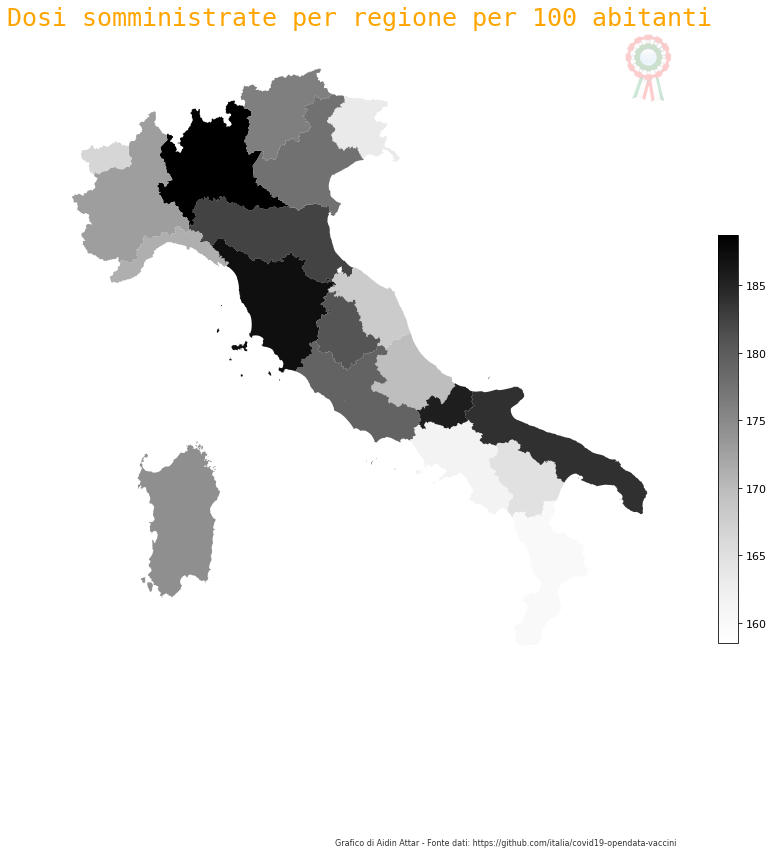

In [17]:
italy = gpd.read_file('italy-with-regions//reg2011_g.shp')

cum1 = cum.set_index('area')
sum_ = cum1.reindex(['PAT', 'PAB']).sum().to_frame().transpose()
sum_ = sum_.rename(index={0: 'TRE'})
cum1.drop(['PAT', 'PAB'],inplace=True)
cum1 = cum1.append(sum_)
cum1 = cum1.sort_index()
italy.sort_values(by = 'NOME_REG', inplace = True)
italy.reset_index(drop=True,       inplace = True)
italy.index = cum1.index

italy = italy.merge(cum1,left_index=True, right_index=True, how='right')
italy.at['TRE',                  'cumulativa_totale_per1000'] = italy.at['TRE',                  'cumulativa_totale'] / (DictRegioni['Provincia Autonoma Bolzano / Bozen']+DictRegioni['Provincia Autonoma Trento'])*100
italy.at['TRE',              'cumulativa_prima_dose_per1000'] = italy.at['TRE',              'cumulativa_prima_dose'] / (DictRegioni['Provincia Autonoma Bolzano / Bozen']+DictRegioni['Provincia Autonoma Trento'])*100
italy.at['TRE',            'cumulativa_seconda_dose_per1000'] = italy.at['TRE',            'cumulativa_seconda_dose'] / (DictRegioni['Provincia Autonoma Bolzano / Bozen']+DictRegioni['Provincia Autonoma Trento'])*100
italy.at['TRE',     'cumulativa_pregressa_infezione_per1000'] = italy.at['TRE',     'cumulativa_pregressa_infezione'] / (DictRegioni['Provincia Autonoma Bolzano / Bozen']+DictRegioni['Provincia Autonoma Trento'])*100
italy.at['TRE','cumulativa_dose_addizionale_booster_per1000'] = italy.at['TRE','cumulativa_dose_addizionale_booster'] / (DictRegioni['Provincia Autonoma Bolzano / Bozen']+DictRegioni['Provincia Autonoma Trento'])*100

fig, ax = plt.subplots(1, figsize=(15, 15))
col = 'cumulativa_totale_per1000'
ax.set_title('Dosi somministrate per regione per 100 abitanti', 
             fontdict={'fontsize':'25', 'fontweight':'3'}, 
             color='Orange', 
             fontfamily='monospace')


normalize = mcolors.Normalize(vmin=italy['cumulativa_totale_per1000'].min(), vmax=italy['cumulativa_totale_per1000'].max())
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap="Greys")
#scalarmappaple.set_array(italy['cumulativa_totale_per1000'])

italy.plot(ax=ax,
           column=col,
           cmap="Greys")
plt.axis('off')
cbar = plt.colorbar(scalarmappaple, shrink=0.5)
cbar.ax.tick_params(labelsize=11)
watermark2()
ax.text(1, 0, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=ax.transAxes,
        fontsize=8, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

Text(0.9, 0.25, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini')

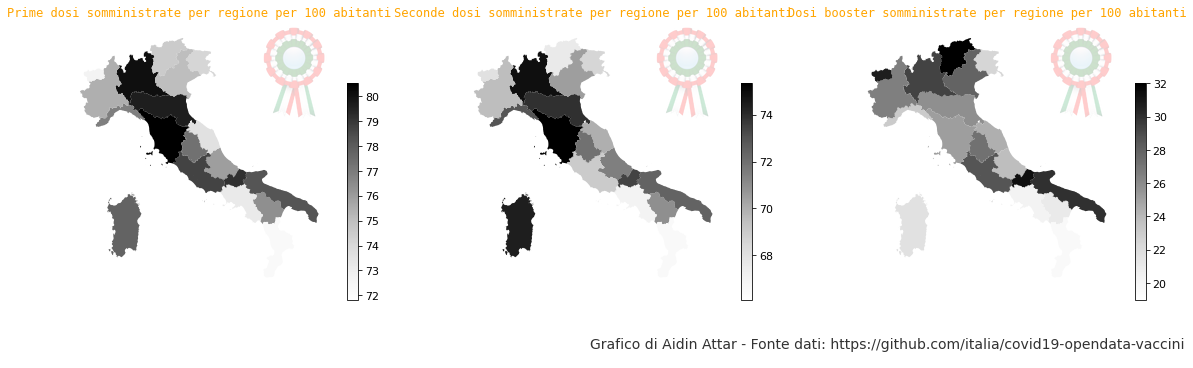

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
col1 = 'cumulativa_prima_dose_per1000'
ax[0].set_title('Prime dosi somministrate per regione per 100 abitanti',
             fontdict={'fontsize':'12', 'fontweight':'3'},
             color='Orange',
             fontfamily='monospace')


normalize1 = mcolors.Normalize(vmin=italy['cumulativa_prima_dose_per1000'].min(), vmax=italy['cumulativa_prima_dose_per1000'].max())
scalarmappaple1 = cm.ScalarMappable(norm=normalize1, cmap="Greys")
#scalarmappaple.set_array(italy['cumulativa_totale_per1000'])

italy.plot(ax=ax[0],
           column=col1,
           cmap="Greys")
plt.axis('off')
cbar = plt.colorbar(scalarmappaple1, ax=ax[0],shrink=0.5)
cbar.ax.tick_params(labelsize=11)

col2 = 'cumulativa_seconda_dose_per1000'
ax[1].set_title('Seconde dosi somministrate per regione per 100 abitanti',
             fontdict={'fontsize':'12', 'fontweight':'3'},
             color='Orange',
             fontfamily='monospace')


normalize2 = mcolors.Normalize(vmin=italy['cumulativa_seconda_dose_per1000'].min(), vmax=italy['cumulativa_seconda_dose_per1000'].max())
scalarmappaple2 = cm.ScalarMappable(norm=normalize2, cmap="Greys")
#scalarmappaple.set_array(italy['cumulativa_totale_per1000'])

italy.plot(ax=ax[1],
           column=col2,
           cmap="Greys")
cbar = plt.colorbar(scalarmappaple2, ax=ax[1],shrink=0.5)
cbar.ax.tick_params(labelsize=11)

col3 = 'cumulativa_dose_addizionale_booster_per1000'
ax[2].set_title('Dosi booster somministrate per regione per 100 abitanti',
             fontdict={'fontsize':'12', 'fontweight':'3'},
             color='Orange',
             fontfamily='monospace')


normalize3 = mcolors.Normalize(vmin=italy['cumulativa_dose_addizionale_booster_per1000'].min(), vmax=italy['cumulativa_dose_addizionale_booster_per1000'].max())
scalarmappaple3 = cm.ScalarMappable(norm=normalize3, cmap="Greys")
#scalarmappaple.set_array(italy['cumulativa_totale_per1000'])

italy.plot(ax=ax[2],
           column=col3,
           cmap="Greys")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
cbar = plt.colorbar(scalarmappaple3, ax=ax[2],shrink=0.5)
cbar.ax.tick_params(labelsize=11)

watermark2(ax=ax[0])
watermark2(ax=ax[1])
watermark2(ax=ax[2])
plt.text(0.9, 0.25, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

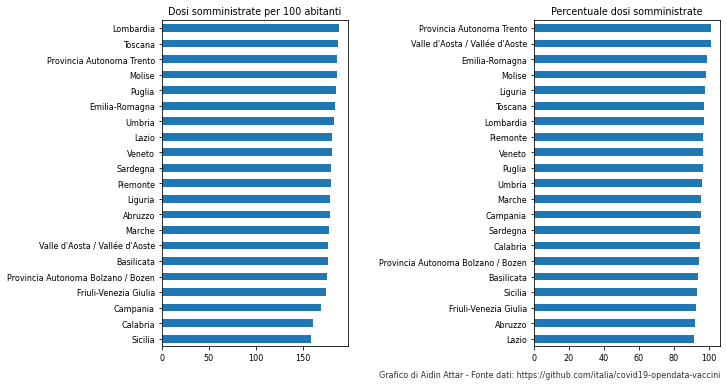

In [19]:
cum = cum.sort_values(by = 'cumulativa_totale_per1000')
vaccinisort = vaccini.sort_values(by = 'percentuale_somministrazione')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6), gridspec_kw={ 'wspace': 1})

plt.rcParams['font.size'] = '8'
cum.plot(        ax=axes[0],x = 'nome_area', y='cumulativa_totale_per1000', kind = 'barh', legend = False, xlabel = '', title = "Dosi somministrate per 100 abitanti")
vaccinisort.plot(ax=axes[1],x = 'nome_area', y='percentuale_somministrazione', kind = 'barh', legend = False, xlabel = '', title = "Percentuale dosi somministrate")
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=8, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.show()

In [20]:
province        = pd.read_csv('../../COVID-19/dati-province/dpc-covid19-ita-province.csv')
regioni         = pd.read_csv('../../COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv')
italia_contagio = pd.read_csv('../../COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
Popolazione     = pd.read_csv('../../COVID-19/grafici/Popolazione_Regioni.csv', names=('provincia','sigla', 'popolazione'))
italia_contagio

data stato  ricoverati_con_sintomi  terapia_intensiva  \
0    2020-02-24T18:00:00   ITA                     101                 26   
1    2020-02-25T18:00:00   ITA                     114                 35   
2    2020-02-26T18:00:00   ITA                     128                 36   
3    2020-02-27T18:00:00   ITA                     248                 56   
4    2020-02-28T18:00:00   ITA                     345                 64   
..                   ...   ...                     ...                ...   
665  2021-12-20T17:00:00   ITA                    8101                987   
666  2021-12-21T17:00:00   ITA                    8381               1012   
667  2021-12-22T17:00:00   ITA                    8544               1010   
668  2021-12-23T17:00:00   ITA                    8722               1023   
669  2021-12-24T17:00:00   ITA                    8812               1038   

     totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
0                     127                      94              221   
1                     150                     162              311   
2                     164                     221              385   
3                     304                     284              588   
4                     409                     412              821   
..                    ...                     ...              ...   
665                  9088                  360615           369703   
666                  9393                  374751           384144   
667                  9554                  393175           402729   
668                  9745                  420284           430029   
669                  9850                  450824           460674   

     variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  \
0                             0             221                1  ...   
1                            90              93                1  ...   
2                            74              78                3  ...   
3                           203             250               45  ...   
4                           233             238               46  ...   
..                          ...             ...              ...  ...   
665                        7428           16213          4899879  ...   
666                       14441           30798          4916068  ...   
667                       18585           36293          4933663  ...   
668                       27300           44595          4950780  ...   
669                       30645           50599          4970584  ...   

       tamponi  casi_testati  note  ingressi_terapia_intensiva  note_test  \
0         4324           NaN   NaN                         NaN        NaN   
1         8623           NaN   NaN                         NaN        NaN   
2         9587           NaN   NaN                         NaN        NaN   
3        12014           NaN   NaN                         NaN        NaN   
4        15695           NaN   NaN                         NaN        NaN   
..         ...           ...   ...                         ...        ...   
665  130705958    39537534.0   NaN                        73.0        NaN   
666  131557823    39648036.0   NaN                        96.0        NaN   
667  132337126    39766135.0   NaN                        92.0        NaN   
668  133238576    39900805.0   NaN                        93.0        NaN   
669  134168351    40062609.0   NaN                       102.0        NaN   

     note_casi totale_positivi_test_molecolare  \
0          NaN                             NaN   
1          NaN                             NaN   
2          NaN                             NaN   
3          NaN                             NaN   
4          NaN                             NaN   
..         ...                             ...   
665        NaN                       5133125.0   
666        NaN                       5153722.0   
66

In [21]:
idx = pd.date_range('2020-02-24', yesterday)
italia_contagio['data']                             = pd.to_datetime(italia_contagio['data'],format='%Y-%m-%dT%H:%M:%S',yearfirst=True, dayfirst=True)
italia_contagio['new_date'] = italia_contagio['data'].dt.date
#italia_contagio.sort_values(by='new_date',inplace=True)
italia_contagio                                     = italia_contagio.set_index('new_date')
italia_contagio.sort_index(inplace=True)
italia_contagio                                     = italia_contagio.reindex(idx)
italia_contagio.index                               = italia_contagio.index.strftime('%d/%m/%Y')
italia_contagio.fillna(method='ffill',inplace=True)
italia_contagio['casi_giornalieri']                 = italia_contagio['totale_casi'] - italia_contagio['totale_casi'].shift(1)
italia_contagio['media_casi_giorn']                 = italia_contagio['casi_giornalieri'].rolling(window=7, min_periods=1).mean()
italia_contagio['morti_giornalieri']                = italia_contagio['deceduti'] - italia_contagio['deceduti'].shift(1)
italia_contagio['media_morti_giorn']                = italia_contagio['morti_giornalieri'].rolling(window=7, min_periods=1).mean()
italia_contagio['media_ingressi_terapia_intensiva'] = italia_contagio['ingressi_terapia_intensiva'].rolling(window=7, min_periods=1).mean()

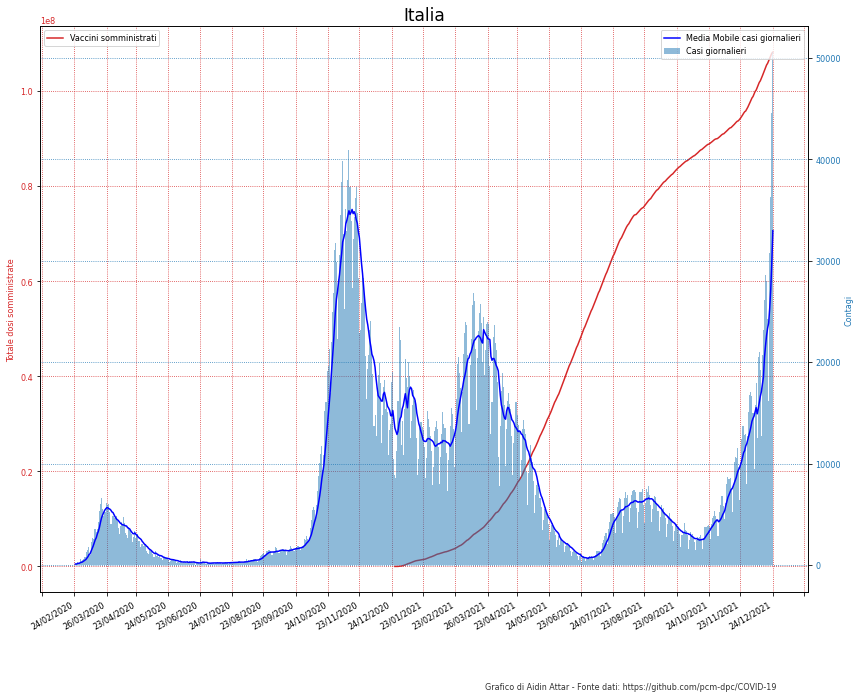

In [22]:
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Totale dosi somministrate', color=color)
ax1.plot(italia.index, italia.cumulativa_totale, color=color, label='Vaccini somministrati',zorder=3)

ax1.legend(loc='upper left')
fig.autofmt_xdate()

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dotted',color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Contagi', color=color)

ax2.bar(italia_contagio.index, italia_contagio.casi_giornalieri, color=color, width=1, alpha=0.5,label='Casi giornalieri', zorder=1)
ax2.plot(italia_contagio.index, italia_contagio['media_casi_giorn'],
        color = 'blue', label = 'Media Mobile casi giornalieri',zorder=2)
ax1.set_title('Italia', fontsize=17)
plt.rcParams['font.size'] = '8'

ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

ax2.grid(linestyle='dotted', color=color)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


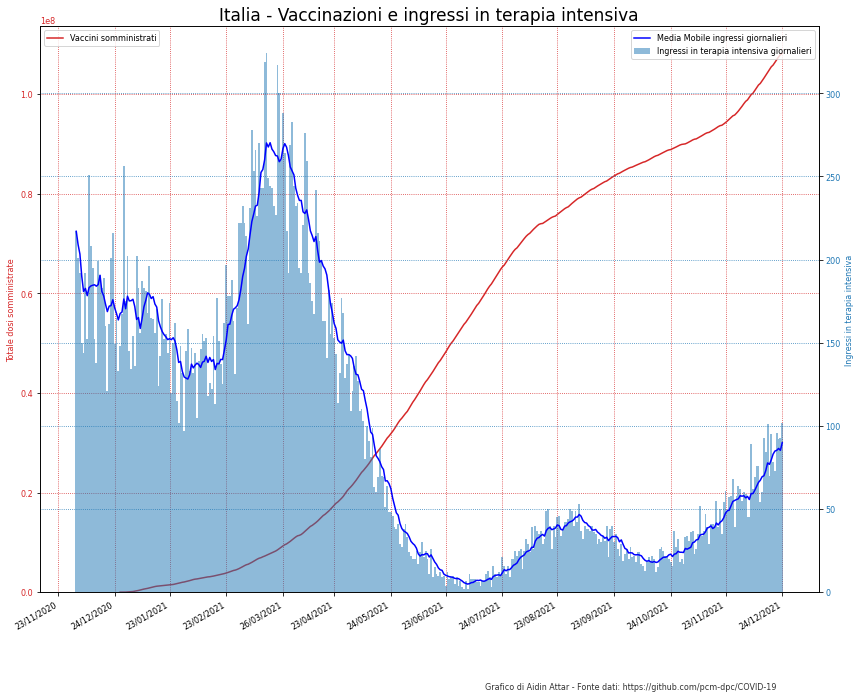

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Totale dosi somministrate', color=color)
ax1.plot(italia.index, italia.cumulativa_totale, color=color, label='Vaccini somministrati',zorder=3)
ax1.set_ylim(bottom=0)
ax1.legend(loc='upper left')
fig.autofmt_xdate()

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dotted',color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Ingressi in terapia intensiva', color=color)

ax2.bar(italia_contagio.index, italia_contagio.ingressi_terapia_intensiva, color=color, width=1, alpha=0.5,label='Ingressi in terapia intensiva giornalieri', zorder=1)
ax2.plot(italia_contagio.index, italia_contagio['media_ingressi_terapia_intensiva'],
        color = 'blue', label = 'Media Mobile ingressi giornalieri',zorder=2)
ax1.set_title('Italia - Vaccinazioni e ingressi in terapia intensiva', fontsize=17)
plt.rcParams['font.size'] = '8'
ax2.set_ylim(bottom=0)
ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

ax2.grid(linestyle='dotted', color=color)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


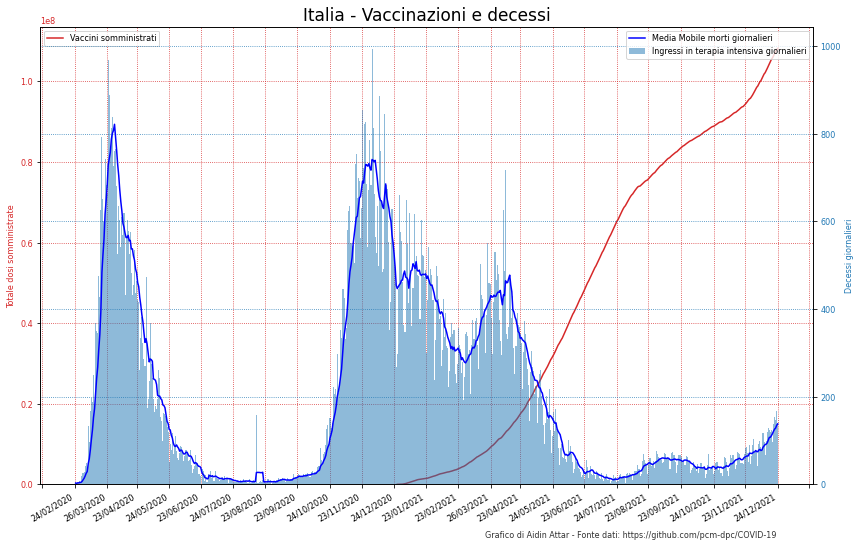

In [24]:
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Totale dosi somministrate', color=color)
ax1.plot(italia.index, italia.cumulativa_totale, color=color, label='Vaccini somministrati',zorder=3)
ax1.set_ylim(bottom=0)
ax1.legend(loc='upper left')
fig.autofmt_xdate()

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dotted',color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Decessi giornalieri', color=color)

ax2.bar(italia_contagio.index, italia_contagio.morti_giornalieri, color=color, width=1, alpha=0.5,label='Ingressi in terapia intensiva giornalieri', zorder=1)
ax2.plot(italia_contagio.index, italia_contagio['media_morti_giorn'],
        color = 'blue', label = 'Media Mobile morti giornalieri',zorder=2)
ax1.set_title('Italia - Vaccinazioni e decessi', fontsize=17)
plt.rcParams['font.size'] = '8'
ax2.set_ylim(bottom=0)
ax2.set_xlabel('')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

ax2.grid(linestyle='dotted', color=color)

plt.text(0.9, 0.075, 'Grafico di Aidin Attar - Fonte dati: https://github.com/pcm-dpc/COVID-19',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [25]:
idx = pd.date_range('27/12/2020', yesterday)
NomiFornitori=somm1.fornitore.unique()
FasceAnagrafiche=somm1.fascia_anagrafica.unique()
somministrazioni_fornitori_età={elem1:{elem2:{elem3:pd.DataFrame for elem3 in FasceAnagrafiche} for elem2 in NomiFornitori} for elem1 in NomiRegioni}

for key1 in somministrazioni_fornitori_età.keys():
    for key2 in somministrazioni_fornitori_età[key1].keys():
        for key3 in somministrazioni_fornitori_età[key1][key2].keys():
            somministrazioni_fornitori_età[key1][key2][key3]                          = somm1[:][somm1.nome_area==key1][somm1.fornitore==key2][somm1.fascia_anagrafica==key3]
            somministrazioni_fornitori_età[key1][key2][key3]['totale']                = somministrazioni_fornitori_età[key1][key2][key3]['sesso_maschile'] + somministrazioni_fornitori_età[key1][key2][key3]['sesso_femminile']             
            somministrazioni_fornitori_età[key1][key2][key3]['data_somministrazione'] = pd.to_datetime(somministrazioni_fornitori_età[key1][key2][key3]['data_somministrazione'], format='%Y-%m-%d', yearfirst=True)
            somministrazioni_fornitori_età[key1][key2][key3]                          = somministrazioni_fornitori_età[key1][key2][key3].set_index('data_somministrazione')
            somministrazioni_fornitori_età[key1][key2][key3].index                    = pd.DatetimeIndex(somministrazioni_fornitori_età[key1][key2][key3].index)
            somministrazioni_fornitori_età[key1][key2][key3].sort_index(inplace=True)
            somministrazioni_fornitori_età[key1][key2][key3]                          = somministrazioni_fornitori_età[key1][key2][key3].reindex(idx)
            somministrazioni_fornitori_età[key1][key2][key3].index                    = somministrazioni_fornitori_età[key1][key2][key3].index.strftime('%d/%m/%Y')
            somministrazioni_fornitori_età[key1][key2][key3].area.fillna(method='bfill',inplace=True)
            somministrazioni_fornitori_età[key1][key2][key3].codice_NUTS1.fillna(method='bfill',inplace=True)
            somministrazioni_fornitori_età[key1][key2][key3].codice_NUTS2.fillna(method='bfill',inplace=True)
            somministrazioni_fornitori_età[key1][key2][key3].codice_regione_ISTAT.fillna(method='bfill',inplace=True)
            somministrazioni_fornitori_età[key1][key2][key3].nome_area.fillna(key1,inplace=True)
            somministrazioni_fornitori_età[key1][key2][key3].fascia_anagrafica.fillna(key3,inplace=True)
            somministrazioni_fornitori_età[key1][key2][key3].fornitore.fillna(key2,inplace=True)
            somministrazioni_fornitori_età[key1][key2][key3].fillna(0,inplace=True)

italia_fornitori_età = copy.deepcopy(somministrazioni_fornitori_età['Emilia-Romagna'])

for key1 in italia_fornitori_età.keys():
    for key2 in italia_fornitori_età[key1].keys():
        italia_fornitori_età[key1][key2][                  'totale'] = sum(somministrazioni_fornitori_età[key][key1][key2][                  'totale'].fillna(0) for key in somministrazioni_fornitori_età.keys())
        italia_fornitori_età[key1][key2][          'sesso_maschile'] = sum(somministrazioni_fornitori_età[key][key1][key2][          'sesso_maschile'].fillna(0) for key in somministrazioni_fornitori_età.keys())
        italia_fornitori_età[key1][key2][         'sesso_femminile'] = sum(somministrazioni_fornitori_età[key][key1][key2][         'sesso_femminile'].fillna(0) for key in somministrazioni_fornitori_età.keys())
        italia_fornitori_età[key1][key2][              'prima_dose'] = sum(somministrazioni_fornitori_età[key][key1][key2][              'prima_dose'].fillna(0) for key in somministrazioni_fornitori_età.keys())
        italia_fornitori_età[key1][key2][            'seconda_dose'] = sum(somministrazioni_fornitori_età[key][key1][key2][            'seconda_dose'].fillna(0) for key in somministrazioni_fornitori_età.keys())
        italia_fornitori_età[key1][key2][     'pregressa_infezione'] = sum(somministrazioni_fornitori_età[key][key1][key2][     'pregressa_infezione'].fillna(0) for key in somministrazioni_fornitori_età.keys())
        italia_fornitori_età[key1][key2]['dose_addizionale_booster'] = sum(somministrazioni_fornitori_età[key][key1][key2]['dose_addizionale_booster'].fillna(0) for key in somministrazioni_fornitori_età.keys())

for key1 in italia_fornitori_età.keys():
    for key2 in italia_fornitori_età[key1].keys():
        italia_fornitori_età[key1][key2].drop(columns=['codice_NUTS1','codice_NUTS2','codice_regione_ISTAT'], axis=1, inplace = True)
        italia_fornitori_età[key1][key2]['area'] = 'ITA'
        italia_fornitori_età[key1][key2]['nome_area'] = 'italia'


italia_fornitori = copy.deepcopy(italia_fornitori_età['Pfizer/BioNTech'])

for key1 in italia_fornitori.keys():
    italia_fornitori[key1][                  'totale'] = sum(italia_fornitori_età[key][key1][                  'totale'].fillna(0) for key in italia_fornitori_età.keys())
    italia_fornitori[key1][          'sesso_maschile'] = sum(italia_fornitori_età[key][key1][          'sesso_maschile'].fillna(0) for key in italia_fornitori_età.keys())
    italia_fornitori[key1][         'sesso_femminile'] = sum(italia_fornitori_età[key][key1][         'sesso_femminile'].fillna(0) for key in italia_fornitori_età.keys())
    italia_fornitori[key1][              'prima_dose'] = sum(italia_fornitori_età[key][key1][              'prima_dose'].fillna(0) for key in italia_fornitori_età.keys())
    italia_fornitori[key1][            'seconda_dose'] = sum(italia_fornitori_età[key][key1][            'seconda_dose'].fillna(0) for key in italia_fornitori_età.keys())
    italia_fornitori[key1][     'pregressa_infezione'] = sum(italia_fornitori_età[key][key1][     'pregressa_infezione'].fillna(0) for key in italia_fornitori_età.keys())
    italia_fornitori[key1]['dose_addizionale_booster'] = sum(italia_fornitori_età[key][key1]['dose_addizionale_booster'].fillna(0) for key in italia_fornitori_età.keys())
    italia_fornitori[key1].drop(columns=['fascia_anagrafica'], axis=1, inplace=True)
    italia_fornitori[key1][                  'media_totale'] = italia_fornitori[key1]['totale'].rolling(window=7, min_periods=1).mean()
    italia_fornitori[key1][          'media_sesso_maschile'] = italia_fornitori[key1]['sesso_maschile'].rolling(window=7, min_periods=1).mean()
    italia_fornitori[key1][         'media_sesso_femminile'] = italia_fornitori[key1]['sesso_femminile'].rolling(window=7, min_periods=1).mean()
    italia_fornitori[key1][              'media_prima_dose'] = italia_fornitori[key1]['prima_dose'].rolling(window=7, min_periods=1).mean()
    italia_fornitori[key1][            'media_seconda_dose'] = italia_fornitori[key1]['seconda_dose'].rolling(window=7, min_periods=1).mean()
    italia_fornitori[key1][     'media_pregressa_infezione'] = italia_fornitori[key1]['pregressa_infezione'].rolling(window=7, min_periods=1).mean()
    italia_fornitori[key1]['media_dose_addizionale_booster'] = italia_fornitori[key1]['dose_addizionale_booster'].rolling(window=7, min_periods=1).mean()
    italia_fornitori[key1][                  'cumulativa_totale'] = italia_fornitori[key1][                  'totale'].cumsum()
    italia_fornitori[key1][          'cumulativa_sesso_maschile'] = italia_fornitori[key1][          'sesso_maschile'].cumsum()
    italia_fornitori[key1][         'cumulativa_sesso_femminile'] = italia_fornitori[key1][         'sesso_femminile'].cumsum()
    italia_fornitori[key1][              'cumulativa_prima_dose'] = italia_fornitori[key1][              'prima_dose'].cumsum()
    italia_fornitori[key1][            'cumulativa_seconda_dose'] = italia_fornitori[key1][            'seconda_dose'].cumsum()
    italia_fornitori[key1][     'cumulativa_pregressa_infezione'] = italia_fornitori[key1][     'pregressa_infezione'].cumsum()
    italia_fornitori[key1]['cumulativa_dose_addizionale_booster'] = italia_fornitori[key1]['dose_addizionale_booster'].cumsum()

/tmp/ipykernel_64365/1648259735.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  somministrazioni_fornitori_età[key1][key2][key3]                          = somm1[:][somm1.nome_area==key1][somm1.fornitore==key2][somm1.fascia_anagrafica==key3]


In [26]:
somministrazioni_età_fornitori={elem1:{elem2:{elem3:pd.DataFrame for elem3 in NomiFornitori} for elem2 in FasceAnagrafiche} for elem1 in NomiRegioni}

for key1 in somministrazioni_età_fornitori.keys():
    for key2 in somministrazioni_età_fornitori[key1].keys():
        for key3 in somministrazioni_età_fornitori[key1][key2].keys():
            somministrazioni_età_fornitori[key1][key2][key3]                          = somm1[:][somm1.nome_area==key1][somm1.fascia_anagrafica==key2][somm1.fornitore==key3]
            somministrazioni_età_fornitori[key1][key2][key3]['totale']                = somministrazioni_età_fornitori[key1][key2][key3]['sesso_maschile'] + somministrazioni_età_fornitori[key1][key2][key3]['sesso_femminile']             
            somministrazioni_età_fornitori[key1][key2][key3]['data_somministrazione'] = pd.to_datetime(somministrazioni_età_fornitori[key1][key2][key3]['data_somministrazione'], format='%Y-%m-%d', yearfirst=True)
            somministrazioni_età_fornitori[key1][key2][key3]                          = somministrazioni_età_fornitori[key1][key2][key3].set_index('data_somministrazione')
            somministrazioni_età_fornitori[key1][key2][key3].index                    = pd.DatetimeIndex(somministrazioni_età_fornitori[key1][key2][key3].index)
            somministrazioni_età_fornitori[key1][key2][key3].sort_index(inplace=True)
            somministrazioni_età_fornitori[key1][key2][key3]                          = somministrazioni_età_fornitori[key1][key2][key3].reindex(idx)
            somministrazioni_età_fornitori[key1][key2][key3].index                    = somministrazioni_età_fornitori[key1][key2][key3].index.strftime('%d/%m/%Y')
            somministrazioni_età_fornitori[key1][key2][key3].area.fillna(method='bfill',inplace=True)
            somministrazioni_età_fornitori[key1][key2][key3].codice_NUTS1.fillna(method='bfill',inplace=True)
            somministrazioni_età_fornitori[key1][key2][key3].codice_NUTS2.fillna(method='bfill',inplace=True)
            somministrazioni_età_fornitori[key1][key2][key3].codice_regione_ISTAT.fillna(method='bfill',inplace=True)
            somministrazioni_età_fornitori[key1][key2][key3].nome_area.fillna(key1,inplace=True)
            somministrazioni_età_fornitori[key1][key2][key3].fascia_anagrafica.fillna(key2,inplace=True)
            somministrazioni_età_fornitori[key1][key2][key3].fornitore.fillna(key3,inplace=True)
            somministrazioni_età_fornitori[key1][key2][key3].fillna(0,inplace=True)

italia_età_fornitori = copy.deepcopy(somministrazioni_età_fornitori['Emilia-Romagna'])

for key1 in italia_età_fornitori.keys():
    for key2 in italia_età_fornitori[key1].keys():
        italia_età_fornitori[key1][key2][                  'totale'] = sum(somministrazioni_età_fornitori[key][key1][key2][                  'totale'].fillna(0) for key in somministrazioni_età_fornitori.keys())
        italia_età_fornitori[key1][key2][          'sesso_maschile'] = sum(somministrazioni_età_fornitori[key][key1][key2][          'sesso_maschile'].fillna(0) for key in somministrazioni_età_fornitori.keys())
        italia_età_fornitori[key1][key2][         'sesso_femminile'] = sum(somministrazioni_età_fornitori[key][key1][key2][         'sesso_femminile'].fillna(0) for key in somministrazioni_età_fornitori.keys())
        italia_età_fornitori[key1][key2][              'prima_dose'] = sum(somministrazioni_età_fornitori[key][key1][key2][              'prima_dose'].fillna(0) for key in somministrazioni_età_fornitori.keys())
        italia_età_fornitori[key1][key2][            'seconda_dose'] = sum(somministrazioni_età_fornitori[key][key1][key2][            'seconda_dose'].fillna(0) for key in somministrazioni_età_fornitori.keys())
        italia_età_fornitori[key1][key2][     'pregressa_infezione'] = sum(somministrazioni_età_fornitori[key][key1][key2][     'pregressa_infezione'].fillna(0) for key in somministrazioni_età_fornitori.keys())
        italia_età_fornitori[key1][key2]['dose_addizionale_booster'] = sum(somministrazioni_età_fornitori[key][key1][key2]['dose_addizionale_booster'].fillna(0) for key in somministrazioni_età_fornitori.keys())

for key1 in italia_età_fornitori.keys():
    for key2 in italia_età_fornitori[key1].keys():
        italia_età_fornitori[key1][key2].drop(columns=['codice_NUTS1','codice_NUTS2','codice_regione_ISTAT'], axis=1, inplace = True)
        italia_età_fornitori[key1][key2]['area'] = 'ITA'
        italia_età_fornitori[key1][key2]['nome_area'] = 'italia'

italia_età = copy.deepcopy(italia_età_fornitori['20-29'])

for key1 in italia_età.keys():
    italia_età[key1][                  'totale'] = sum(italia_età_fornitori[key][key1][                  'totale'].fillna(0) for key in italia_età_fornitori.keys())
    italia_età[key1][          'sesso_maschile'] = sum(italia_età_fornitori[key][key1][          'sesso_maschile'].fillna(0) for key in italia_età_fornitori.keys())
    italia_età[key1][         'sesso_femminile'] = sum(italia_età_fornitori[key][key1][         'sesso_femminile'].fillna(0) for key in italia_età_fornitori.keys())
    italia_età[key1][              'prima_dose'] = sum(italia_età_fornitori[key][key1][              'prima_dose'].fillna(0) for key in italia_età_fornitori.keys())
    italia_età[key1][            'seconda_dose'] = sum(italia_età_fornitori[key][key1][            'seconda_dose'].fillna(0) for key in italia_età_fornitori.keys())
    italia_età[key1][     'pregressa_infezione'] = sum(italia_età_fornitori[key][key1][     'pregressa_infezione'].fillna(0) for key in italia_età_fornitori.keys())
    italia_età[key1]['dose_addizionale_booster'] = sum(italia_età_fornitori[key][key1]['dose_addizionale_booster'].fillna(0) for key in italia_età_fornitori.keys())
    italia_età[key1].drop(columns=['fornitore'], axis=1, inplace=True)
    italia_età[key1][                  'media_totale'] = italia_età[key1]['totale'].rolling(window=7, min_periods=1).mean()
    italia_età[key1][          'media_sesso_maschile'] = italia_età[key1]['sesso_maschile'].rolling(window=7, min_periods=1).mean()
    italia_età[key1][         'media_sesso_femminile'] = italia_età[key1]['sesso_femminile'].rolling(window=7, min_periods=1).mean()
    italia_età[key1][              'media_prima_dose'] = italia_età[key1]['prima_dose'].rolling(window=7, min_periods=1).mean()
    italia_età[key1][            'media_seconda_dose'] = italia_età[key1]['seconda_dose'].rolling(window=7, min_periods=1).mean()
    italia_età[key1][     'media_pregressa_infezione'] = italia_età[key1]['pregressa_infezione'].rolling(window=7, min_periods=1).mean()
    italia_età[key1]['media_dose_addizionale_booster'] = italia_età[key1]['dose_addizionale_booster'].rolling(window=7, min_periods=1).mean()
    italia_età[key1][                  'cumulativa_totale'] = italia_età[key1][                  'totale'].cumsum()
    italia_età[key1][          'cumulativa_sesso_maschile'] = italia_età[key1][          'sesso_maschile'].cumsum()
    italia_età[key1][         'cumulativa_sesso_femminile'] = italia_età[key1][         'sesso_femminile'].cumsum()
    italia_età[key1][              'cumulativa_prima_dose'] = italia_età[key1][              'prima_dose'].cumsum()
    italia_età[key1][            'cumulativa_seconda_dose'] = italia_età[key1][            'seconda_dose'].cumsum()
    italia_età[key1][     'cumulativa_pregressa_infezione'] = italia_età[key1][     'pregressa_infezione'].cumsum()
    italia_età[key1]['cumulativa_dose_addizionale_booster'] = italia_età[key1]['dose_addizionale_booster'].cumsum()

/tmp/ipykernel_64365/3227443672.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  somministrazioni_età_fornitori[key1][key2][key3]                          = somm1[:][somm1.nome_area==key1][somm1.fascia_anagrafica==key2][somm1.fornitore==key3]


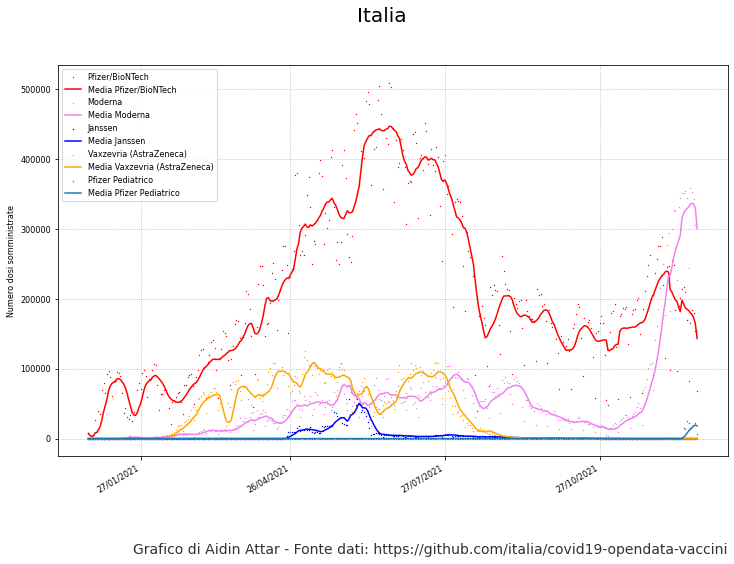

In [27]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','black','plasma']
i=0
for key in italia_età.keys():
    ax.scatter(italia_età[key].index,italia_età[key]['totale'], color=colors[i],label=str(key),marker='x', s=0.2)
    italia_età[key]['media_totale'].plot(ax = ax,color=colors[i],label='Media '+str(key))
    i+=1

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.legend(loc='best')
fig.suptitle("Italia", fontsize=20)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 1,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

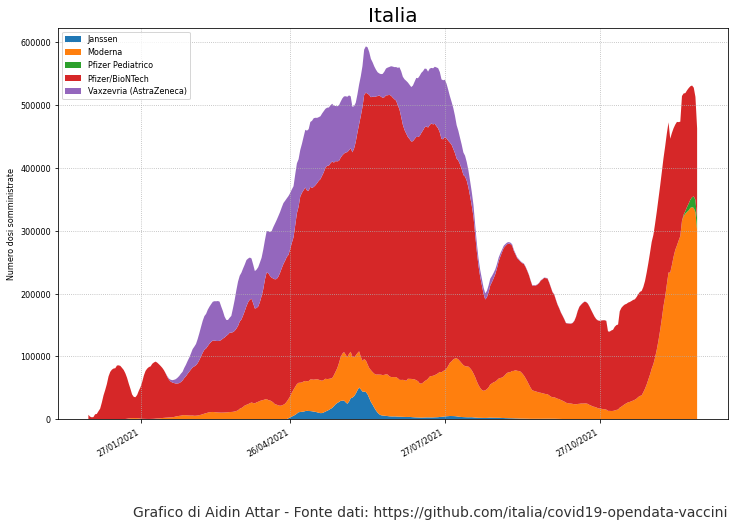

In [195]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
ax.stackplot(italia_età['Pfizer/BioNTech'].index,[italia_età[key]['media_totale'] for key in sorted(italia_età.keys())])

label=[key for key in sorted(italia_età.keys())]
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.legend(label,loc='upper left')
ax.set_title("Italia - Dosi somministrate per fornitore", fontsize=20)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 1,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

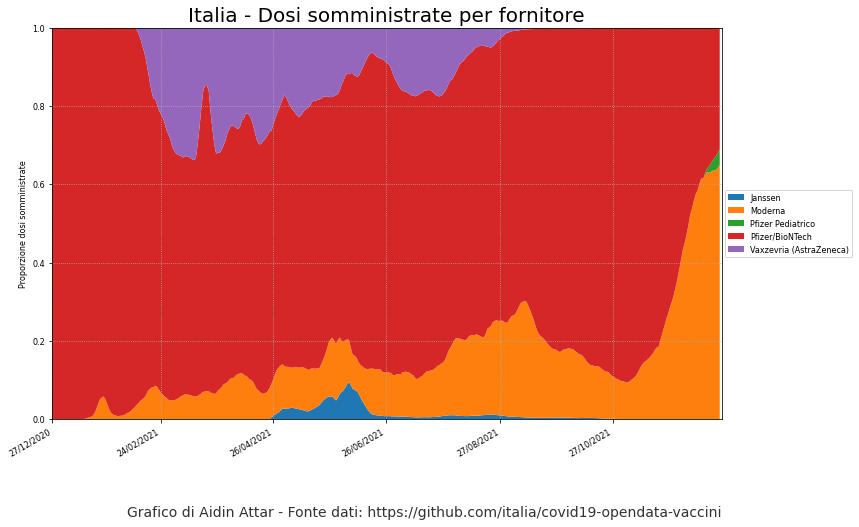

In [199]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
ax.stackplot(italia_età['Pfizer/BioNTech'].index,[italia_età[key]['media_totale']/sum(italia_età[key1]['media_totale'] for key1 in italia_età.keys()) for key in sorted(italia_età.keys())])

label=[key for key in sorted(italia_età.keys())]
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.set_title("Italia - Dosi somministrate per fornitore", fontsize=20)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 1,linestyle='dotted')
ax.set_ylabel('Proporzione dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()
ax.set_ylim(top=1)
ax.set_xlim([date(2020, 12, 27).strftime('%d/%m/%Y'), today])
ax.legend(label, loc = 'center', bbox_to_anchor=(1.1, 0.5))

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

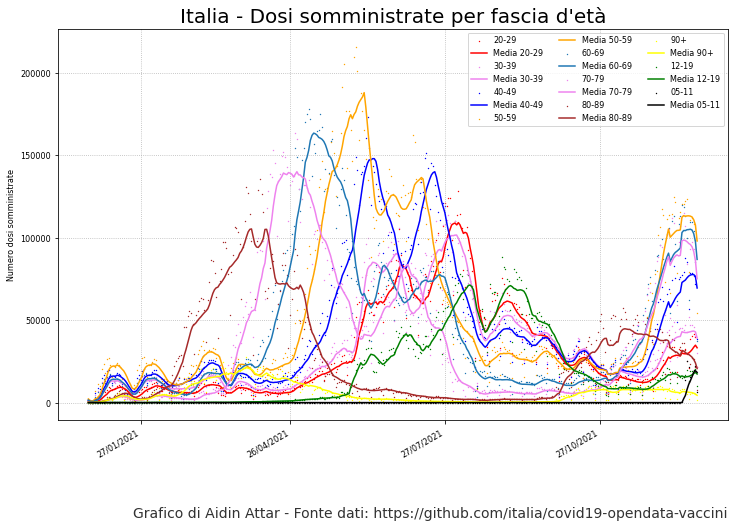

In [197]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
i=0
for key in italia_fornitori.keys():
    ax.scatter(italia_fornitori[key].index,italia_fornitori[key]['totale'], c=colors[i],label=str(key),marker='x', s=0.2)
    italia_fornitori[key]['media_totale'].plot(ax = ax,color=colors[i],label='Media '+str(key))
    i+=1

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.legend(loc='best', ncol=3)
ax.set_title("Italia - Dosi somministrate per fascia d'età", fontsize=20)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 1,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

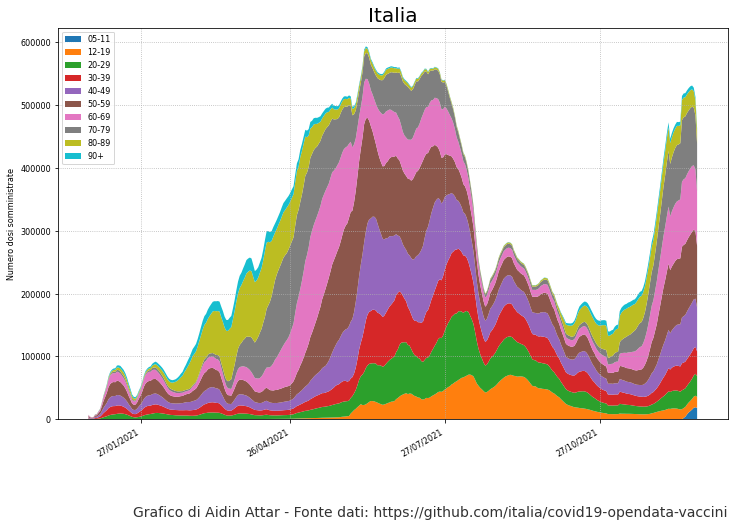

In [30]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
ax.stackplot(italia_fornitori['50-59'].index,[italia_fornitori[key]['media_totale'] for key in sorted(italia_fornitori.keys())])

label=[key for key in sorted(italia_fornitori.keys())]
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.legend(label,loc='upper left')
ax.set_title("Italia", fontsize=20)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 1,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

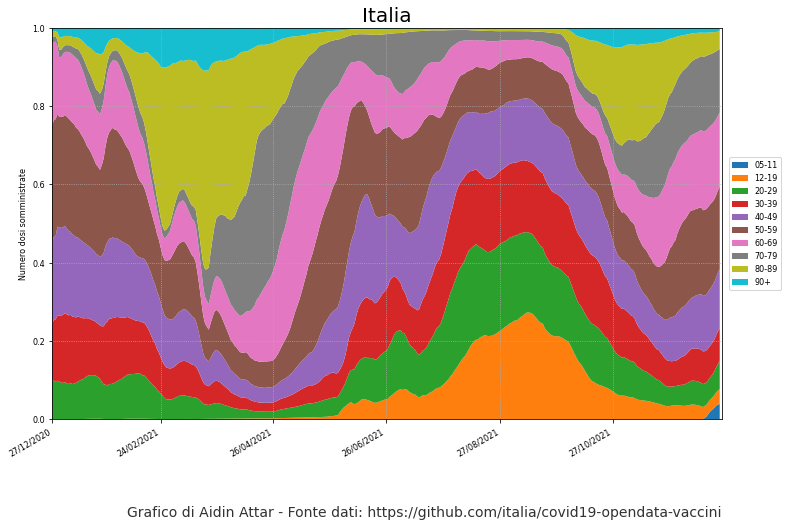

In [193]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
ax.stackplot(italia_fornitori['50-59'].index,[italia_fornitori[key]['media_totale']/sum(italia_fornitori[key1]['media_totale'] for key1 in italia_fornitori.keys()) for key in sorted(italia_fornitori.keys())])

label=[key for key in sorted(italia_fornitori.keys())]
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.set_title("Italia", fontsize=20)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 1,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()
ax.set_ylim(top=1)
ax.set_xlim([date(2020, 12, 27).strftime('%d/%m/%Y'), today])
ax.legend(label, loc = 'center', bbox_to_anchor=(1.05, 0.5))

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

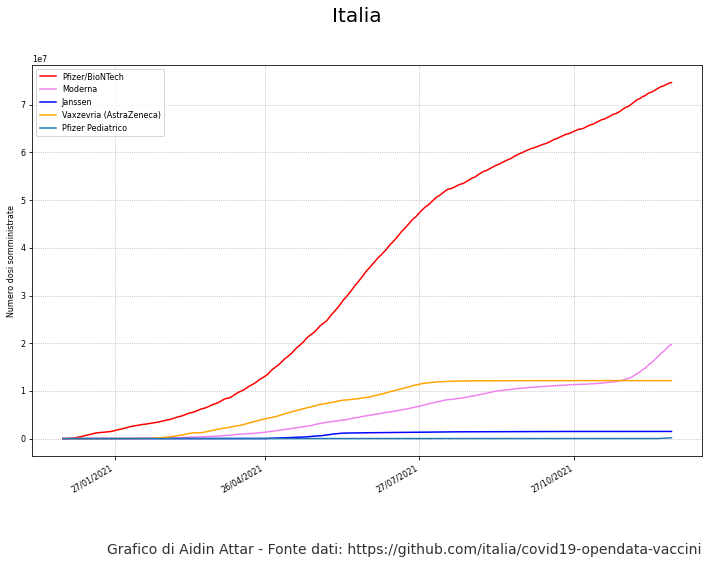

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','black','plasma']
i=0
for key in italia_età.keys():
    ax.plot(italia_età[key].index,italia_età[key]['cumulativa_totale'], color=colors[i],label=str(key))
    #italia_età[key]['media_totale'].plot(ax = ax,color=colors[i],label='Media '+str(key))
    i+=1

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.legend(loc='best')
fig.suptitle("Italia", fontsize=20)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 1,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

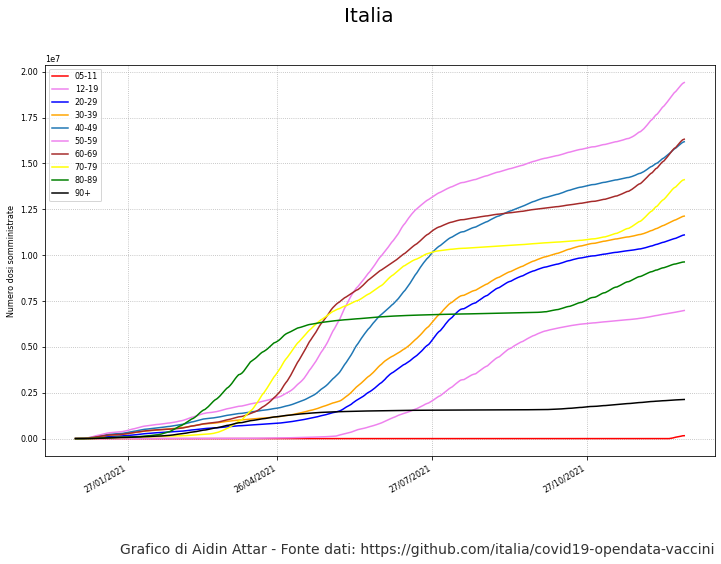

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
i=0
for key in sorted(italia_fornitori.keys()):
    ax.plot(italia_fornitori[key].index,italia_fornitori[key]['cumulativa_totale'], color=colors[i],label=str(key))
    i+=1
    #.plot(ax = ax,color=colors,label='Media '+str(key))

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.legend(loc='best')
fig.suptitle("Italia", fontsize=20)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 1,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

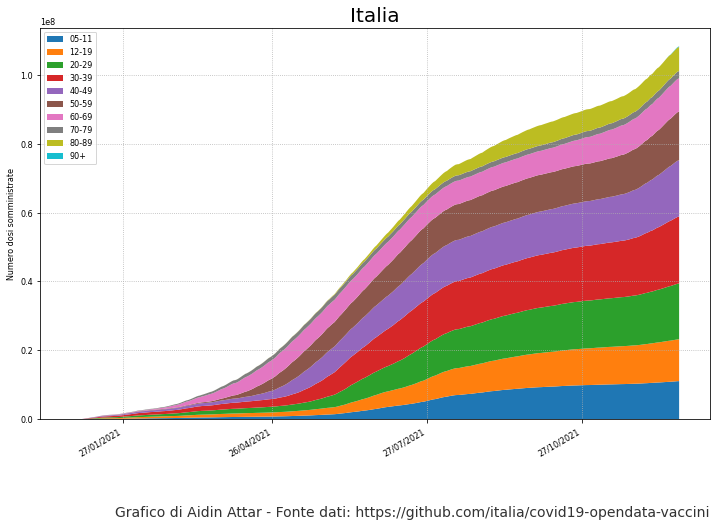

In [34]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
ax.stackplot(italia_fornitori['50-59'].index,[italia_fornitori[key]['cumulativa_totale'] for key in italia_fornitori.keys()])

label=[key for key in sorted(italia_fornitori.keys())]
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.set_title("Italia", fontsize=20)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 1,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

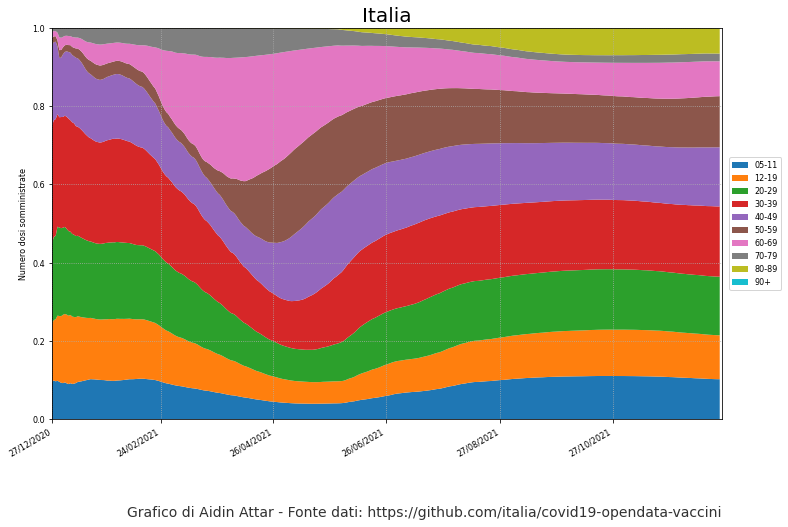

In [202]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
ax.stackplot(italia_fornitori['50-59'].index,[italia_fornitori[key]['cumulativa_totale']/sum(italia_fornitori[key1]['cumulativa_totale'] for key1 in italia_fornitori.keys()) for key in italia_fornitori.keys()])

label=[key for key in sorted(italia_fornitori.keys())]
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.legend(label,loc='upper left')
ax.set_title("Italia", fontsize=20)
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 1,linestyle='dotted')
ax.set_ylabel('Numero dosi somministrate')
ax.set_xlabel("")
fig.autofmt_xdate()
ax.set_ylim(top=1)
ax.set_xlim([date(2020, 12, 27).strftime('%d/%m/%Y'), today])
ax.legend(label, loc = 'center', bbox_to_anchor=(1.05, 0.5))

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

In [35]:
PlateaFasce=platea.fascia_anagrafica.unique()
Platea_Italia=dict()

for f in PlateaFasce:
    Platea_Italia[f]=platea.groupby('fascia_anagrafica').get_group(f)['totale_popolazione'].sum()
Platea_Italia

{'05-11': 3656069,
 '12-19': 4627514,
 '20-29': 6014643,
 '30-39': 6794108,
 '40-49': 8782667,
 '50-59': 9648935,
 '60-69': 7553311,
 '70-79': 6018697,
 '80+': 4570070}

In [36]:
new_italia_fornitori = copy.deepcopy(italia_fornitori)
new_italia_fornitori['80+'] = copy.deepcopy(italia_fornitori['90+'])
new_italia_fornitori['80+'][                  'totale'] = italia_fornitori['80-89'][                  'totale']+italia_fornitori['90+'][                  'totale']
new_italia_fornitori['80+'][          'sesso_maschile'] = italia_fornitori['80-89'][          'sesso_maschile']+italia_fornitori['90+'][          'sesso_maschile']
new_italia_fornitori['80+'][         'sesso_femminile'] = italia_fornitori['80-89'][         'sesso_femminile']+italia_fornitori['90+'][         'sesso_femminile']
new_italia_fornitori['80+'][              'prima_dose'] = italia_fornitori['80-89'][              'prima_dose']+italia_fornitori['90+'][              'prima_dose']
new_italia_fornitori['80+'][            'seconda_dose'] = italia_fornitori['80-89'][            'seconda_dose']+italia_fornitori['90+'][            'seconda_dose']
new_italia_fornitori['80+'][     'pregressa_infezione'] = italia_fornitori['80-89'][     'pregressa_infezione']+italia_fornitori['90+'][     'pregressa_infezione']
new_italia_fornitori['80+']['dose_addizionale_booster'] = italia_fornitori['80-89']['dose_addizionale_booster']+italia_fornitori['90+']['dose_addizionale_booster']
new_italia_fornitori.pop('80-89')
new_italia_fornitori.pop('90+')

for key1 in new_italia_fornitori.keys():
    new_italia_fornitori[key1][                  'media_totale'] = new_italia_fornitori[key1]['totale'].rolling(window=7, min_periods=1).mean()
    new_italia_fornitori[key1][          'media_sesso_maschile'] = new_italia_fornitori[key1]['sesso_maschile'].rolling(window=7, min_periods=1).mean()
    new_italia_fornitori[key1][         'media_sesso_femminile'] = new_italia_fornitori[key1]['sesso_femminile'].rolling(window=7, min_periods=1).mean()
    new_italia_fornitori[key1][              'media_prima_dose'] = new_italia_fornitori[key1]['prima_dose'].rolling(window=7, min_periods=1).mean()
    new_italia_fornitori[key1][            'media_seconda_dose'] = new_italia_fornitori[key1]['seconda_dose'].rolling(window=7, min_periods=1).mean()
    new_italia_fornitori[key1][     'media_pregressa_infezione'] = new_italia_fornitori[key1]['pregressa_infezione'].rolling(window=7, min_periods=1).mean()
    new_italia_fornitori[key1]['media_dose_addizionale_booster'] = new_italia_fornitori[key1]['dose_addizionale_booster'].rolling(window=7, min_periods=1).mean()
    new_italia_fornitori[key1][                  'cumulativa_totale'] = new_italia_fornitori[key1][                  'totale'].cumsum()
    new_italia_fornitori[key1][          'cumulativa_sesso_maschile'] = new_italia_fornitori[key1][          'sesso_maschile'].cumsum()
    new_italia_fornitori[key1][         'cumulativa_sesso_femminile'] = new_italia_fornitori[key1][         'sesso_femminile'].cumsum()
    new_italia_fornitori[key1][              'cumulativa_prima_dose'] = new_italia_fornitori[key1][              'prima_dose'].cumsum()
    new_italia_fornitori[key1][            'cumulativa_seconda_dose'] = new_italia_fornitori[key1][            'seconda_dose'].cumsum()
    new_italia_fornitori[key1][     'cumulativa_pregressa_infezione'] = new_italia_fornitori[key1][     'pregressa_infezione'].cumsum()
    new_italia_fornitori[key1]['cumulativa_dose_addizionale_booster'] = new_italia_fornitori[key1]['dose_addizionale_booster'].cumsum()

    new_italia_fornitori[key1]['perc_cumulativa_totale'] = new_italia_fornitori[key1]['cumulativa_totale'] / Platea_Italia[key1] * 100
    new_italia_fornitori[key1]['perc_cumulativa_sesso_maschile'] = new_italia_fornitori[key1]['cumulativa_sesso_maschile'] / Platea_Italia[key1] * 100
    new_italia_fornitori[key1]['perc_cumulativa_sesso_femminile'] = new_italia_fornitori[key1]['cumulativa_sesso_femminile'] / Platea_Italia[key1] * 100
    new_italia_fornitori[key1]['perc_cumulativa_prima_dose'] = new_italia_fornitori[key1]['cumulativa_prima_dose'] / Platea_Italia[key1] * 100
    new_italia_fornitori[key1]['perc_cumulativa_seconda_dose'] = new_italia_fornitori[key1]['cumulativa_seconda_dose'] / Platea_Italia[key1] * 100
    new_italia_fornitori[key1]['perc_cumulativa_pregressa_infezione'] = new_italia_fornitori[key1]['cumulativa_pregressa_infezione'] / Platea_Italia[key1] * 100
    new_italia_fornitori[key1]['perc_cumulativa_dose_addizionale_booster'] = new_italia_fornitori[key1]['cumulativa_dose_addizionale_booster'] / Platea_Italia[key1] * 100

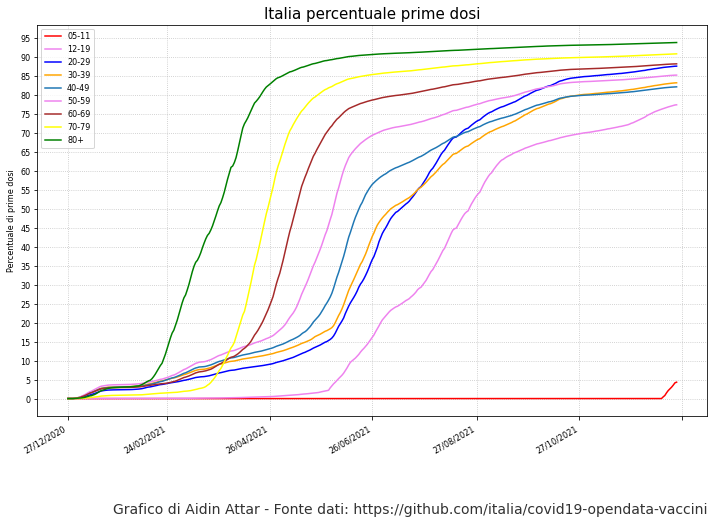

In [37]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
i=0
for key in sorted(new_italia_fornitori.keys()):
    ax.plot(new_italia_fornitori[key].index,new_italia_fornitori[key]['perc_cumulativa_prima_dose'], color=colors[i],label=str(key))
    i+=1

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.legend(loc='best')
ax.set_title("Italia percentuale prime dosi", fontsize=15)
plt.rcParams['font.size'] = '8'
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 0.8,linestyle='dotted')
ax.set_ylabel('Percentuale di prime dosi')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

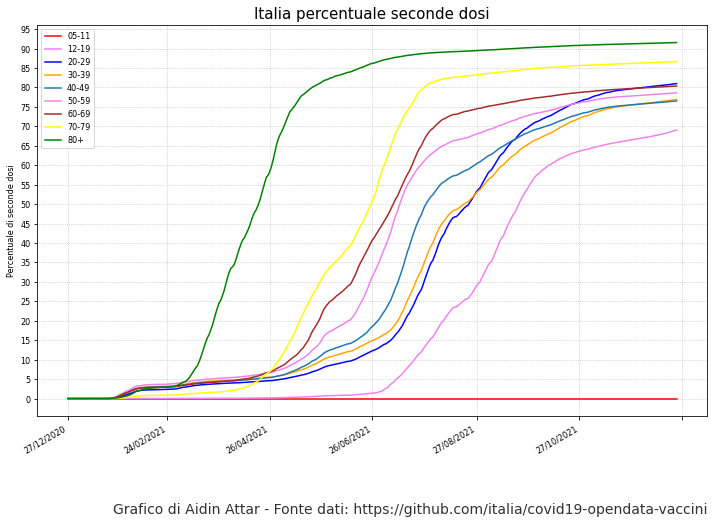

In [38]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
i=0
for key in sorted(new_italia_fornitori.keys()):
    ax.plot(new_italia_fornitori[key].index,new_italia_fornitori[key]['perc_cumulativa_seconda_dose'], color=colors[i],label=str(key))
    i+=1
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.legend(loc='best')
ax.set_title("Italia percentuale seconde dosi", fontsize=15)
ax.yaxis.set_major_locator(MultipleLocator(5))
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 0.8,linestyle='dotted')
ax.set_ylabel('Percentuale di seconde dosi')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

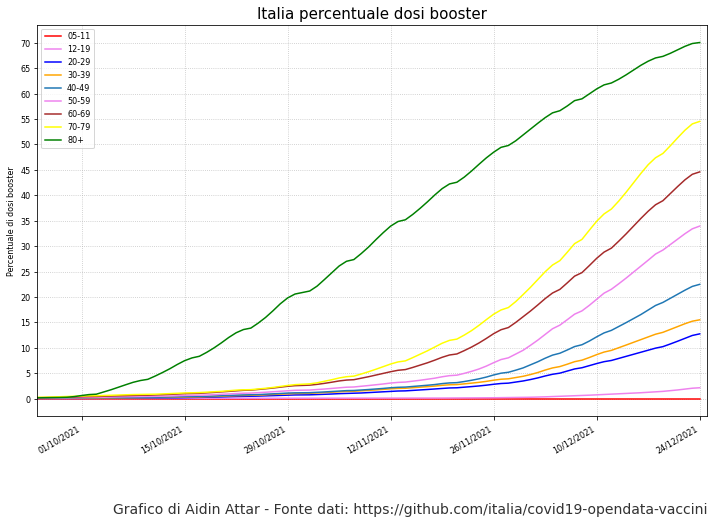

In [39]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
i=0
for key in sorted(new_italia_fornitori.keys()):
    ax.plot(new_italia_fornitori[key].index,new_italia_fornitori[key]['perc_cumulativa_dose_addizionale_booster'], color=colors[i],label=str(key))
    i+=1
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.set_xlim([date(2021, 9, 25).strftime('%d/%m/%Y'), today])
ax.legend(loc='best')
ax.set_title("Italia percentuale dosi booster", fontsize=15)
ax.yaxis.set_major_locator(MultipleLocator(5))
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 0.8,linestyle='dotted')
ax.set_ylabel('Percentuale di dosi booster')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

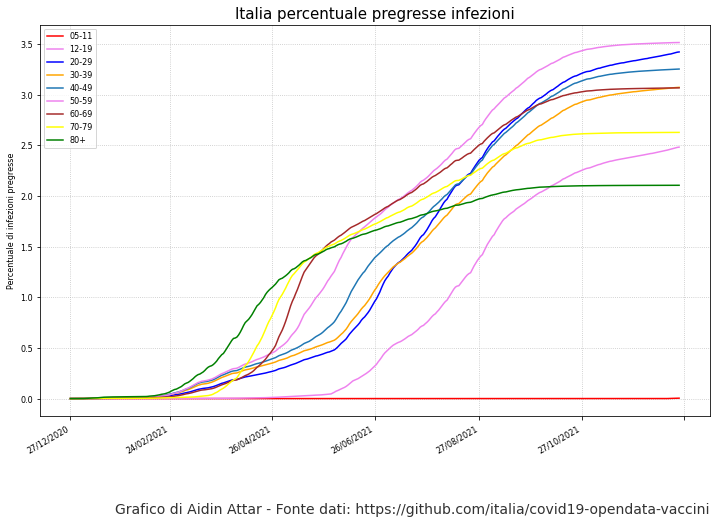

In [40]:
fig, ax = plt.subplots(figsize=(12,8))

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
i=0
for key in sorted(new_italia_fornitori.keys()):
    ax.plot(new_italia_fornitori[key].index,new_italia_fornitori[key]['perc_cumulativa_pregressa_infezione'], color=colors[i],label=str(key))
    i+=1
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#ax.set_xlim([date(2021, 9, 25).strftime('%d/%m/%Y'), today])
ax.legend(loc='best')
ax.set_title("Italia percentuale pregresse infezioni", fontsize=15)
#ax.yaxis.set_major_locator(MultipleLocator(5))
plt.rcParams['font.size'] = '8'
ax.tick_params(axis='both', labelsize=8)
ax.grid(alpha = 0.8,linestyle='dotted')
ax.set_ylabel('Percentuale di infezioni pregresse')
ax.set_xlabel("")
fig.autofmt_xdate()

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

In [46]:
somministrazioni_età={elem1:{elem2:pd.DataFrame for elem2 in NomiFornitori} for elem1 in NomiRegioni}
for key in somministrazioni_età.keys():
    somministrazioni_età[key] = copy.deepcopy(somministrazioni_età_fornitori[key]['20-29'])

for key1 in somministrazioni_età.keys():
    for key2 in somministrazioni_età[key1].keys():
        somministrazioni_età[key1][key2][                         'totale'] = sum(somministrazioni_età_fornitori[key1][key][key2][                  'totale'].fillna(0) for key in somministrazioni_età_fornitori[key1].keys())
        somministrazioni_età[key1][key2][                 'sesso_maschile'] = sum(somministrazioni_età_fornitori[key1][key][key2][          'sesso_maschile'].fillna(0) for key in somministrazioni_età_fornitori[key1].keys())
        somministrazioni_età[key1][key2][                'sesso_femminile'] = sum(somministrazioni_età_fornitori[key1][key][key2][         'sesso_femminile'].fillna(0) for key in somministrazioni_età_fornitori[key1].keys())
        somministrazioni_età[key1][key2][                     'prima_dose'] = sum(somministrazioni_età_fornitori[key1][key][key2][              'prima_dose'].fillna(0) for key in somministrazioni_età_fornitori[key1].keys())
        somministrazioni_età[key1][key2][                   'seconda_dose'] = sum(somministrazioni_età_fornitori[key1][key][key2][            'seconda_dose'].fillna(0) for key in somministrazioni_età_fornitori[key1].keys())
        somministrazioni_età[key1][key2][            'pregressa_infezione'] = sum(somministrazioni_età_fornitori[key1][key][key2][     'pregressa_infezione'].fillna(0) for key in somministrazioni_età_fornitori[key1].keys())
        somministrazioni_età[key1][key2][       'dose_addizionale_booster'] = sum(somministrazioni_età_fornitori[key1][key][key2]['dose_addizionale_booster'].fillna(0) for key in somministrazioni_età_fornitori[key1].keys())

        somministrazioni_età[key1][key2][                  'totale_per100'] = somministrazioni_età[key1][key2][                  'totale'] / DictRegioni[key1] * 100
        somministrazioni_età[key1][key2][          'sesso_maschile_per100'] = somministrazioni_età[key1][key2][          'sesso_maschile'] / DictRegioni[key1] * 100
        somministrazioni_età[key1][key2][         'sesso_femminile_per100'] = somministrazioni_età[key1][key2][         'sesso_femminile'] / DictRegioni[key1] * 100
        somministrazioni_età[key1][key2][              'prima_dose_per100'] = somministrazioni_età[key1][key2][              'prima_dose'] / DictRegioni[key1] * 100
        somministrazioni_età[key1][key2][            'seconda_dose_per100'] = somministrazioni_età[key1][key2][            'seconda_dose'] / DictRegioni[key1] * 100
        somministrazioni_età[key1][key2][     'pregressa_infezione_per100'] = somministrazioni_età[key1][key2][     'pregressa_infezione'] / DictRegioni[key1] * 100
        somministrazioni_età[key1][key2]['dose_addizionale_booster_per100'] = somministrazioni_età[key1][key2]['dose_addizionale_booster'] / DictRegioni[key1] * 100

for key1 in somministrazioni_età.keys():
    for key2 in somministrazioni_età[key1].keys():
        somministrazioni_età[key1][key2][                              'media_totale'] = somministrazioni_età[key1][key2][                                'totale'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][                      'media_sesso_maschile'] = somministrazioni_età[key1][key2][                        'sesso_maschile'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][                     'media_sesso_femminile'] = somministrazioni_età[key1][key2][                       'sesso_femminile'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][                          'media_prima_dose'] = somministrazioni_età[key1][key2][                            'prima_dose'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][                        'media_seconda_dose'] = somministrazioni_età[key1][key2][                          'seconda_dose'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][                 'media_pregressa_infezione'] = somministrazioni_età[key1][key2][                   'pregressa_infezione'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][            'media_dose_addizionale_booster'] = somministrazioni_età[key1][key2][              'dose_addizionale_booster'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][                       'media_totale_per100'] = somministrazioni_età[key1][key2][                         'totale_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][               'media_sesso_maschile_per100'] = somministrazioni_età[key1][key2][                 'sesso_maschile_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][              'media_sesso_femminile_per100'] = somministrazioni_età[key1][key2][                'sesso_femminile_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][                   'media_prima_dose_per100'] = somministrazioni_età[key1][key2][                     'prima_dose_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][                 'media_seconda_dose_per100'] = somministrazioni_età[key1][key2][                   'seconda_dose_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][          'media_pregressa_infezione_per100'] = somministrazioni_età[key1][key2][            'pregressa_infezione_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][     'media_dose_addizionale_booster_per100'] = somministrazioni_età[key1][key2][       'dose_addizionale_booster_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_età[key1][key2][                         'cumulativa_totale'] = somministrazioni_età[key1][key2][                                'totale'].cumsum()
        somministrazioni_età[key1][key2][                 'cumulativa_sesso_maschile'] = somministrazioni_età[key1][key2][                        'sesso_maschile'].cumsum()
        somministrazioni_età[key1][key2][                'cumulativa_sesso_femminile'] = somministrazioni_età[key1][key2][                       'sesso_femminile'].cumsum()
        somministrazioni_età[key1][key2][                     'cumulativa_prima_dose'] = somministrazioni_età[key1][key2][                            'prima_dose'].cumsum()
        somministrazioni_età[key1][key2][                   'cumulativa_seconda_dose'] = somministrazioni_età[key1][key2][                          'seconda_dose'].cumsum()
        somministrazioni_età[key1][key2][            'cumulativa_pregressa_infezione'] = somministrazioni_età[key1][key2][                   'pregressa_infezione'].cumsum()
        somministrazioni_età[key1][key2][       'cumulativa_dose_addizionale_booster'] = somministrazioni_età[key1][key2][              'dose_addizionale_booster'].cumsum()
        somministrazioni_età[key1][key2][                  'cumulativa_totale_per100'] = somministrazioni_età[key1][key2][                         'totale_per100'].cumsum()
        somministrazioni_età[key1][key2][          'cumulativa_sesso_maschile_per100'] = somministrazioni_età[key1][key2][                 'sesso_maschile_per100'].cumsum()
        somministrazioni_età[key1][key2][         'cumulativa_sesso_femminile_per100'] = somministrazioni_età[key1][key2][                'sesso_femminile_per100'].cumsum()
        somministrazioni_età[key1][key2][              'cumulativa_prima_dose_per100'] = somministrazioni_età[key1][key2][                     'prima_dose_per100'].cumsum()
        somministrazioni_età[key1][key2][            'cumulativa_seconda_dose_per100'] = somministrazioni_età[key1][key2][                   'seconda_dose_per100'].cumsum()
        somministrazioni_età[key1][key2][     'cumulativa_pregressa_infezione_per100'] = somministrazioni_età[key1][key2][            'pregressa_infezione_per100'].cumsum()
        somministrazioni_età[key1][key2]['cumulativa_dose_addizionale_booster_per100'] = somministrazioni_età[key1][key2][       'dose_addizionale_booster_per100'].cumsum()

In [47]:
somministrazioni_fornitori={elem1:{elem2:pd.DataFrame for elem2 in FasceAnagrafiche} for elem1 in NomiRegioni}

for key in somministrazioni_fornitori.keys():
    somministrazioni_fornitori[key] = copy.deepcopy(somministrazioni_fornitori_età[key]['Pfizer/BioNTech'])

for key1 in somministrazioni_fornitori.keys():
    for key2 in somministrazioni_fornitori[key1].keys():
        somministrazioni_fornitori[key1][key2][                                    'totale'] = sum(somministrazioni_fornitori_età[key1][key][key2][                  'totale'].fillna(0) for key in somministrazioni_fornitori_età[key1].keys())
        somministrazioni_fornitori[key1][key2][                            'sesso_maschile'] = sum(somministrazioni_fornitori_età[key1][key][key2][          'sesso_maschile'].fillna(0) for key in somministrazioni_fornitori_età[key1].keys())
        somministrazioni_fornitori[key1][key2][                           'sesso_femminile'] = sum(somministrazioni_fornitori_età[key1][key][key2][         'sesso_femminile'].fillna(0) for key in somministrazioni_fornitori_età[key1].keys())
        somministrazioni_fornitori[key1][key2][                                'prima_dose'] = sum(somministrazioni_fornitori_età[key1][key][key2][              'prima_dose'].fillna(0) for key in somministrazioni_fornitori_età[key1].keys())
        somministrazioni_fornitori[key1][key2][                              'seconda_dose'] = sum(somministrazioni_fornitori_età[key1][key][key2][            'seconda_dose'].fillna(0) for key in somministrazioni_fornitori_età[key1].keys())
        somministrazioni_fornitori[key1][key2][                       'pregressa_infezione'] = sum(somministrazioni_fornitori_età[key1][key][key2][     'pregressa_infezione'].fillna(0) for key in somministrazioni_fornitori_età[key1].keys())
        somministrazioni_fornitori[key1][key2][                  'dose_addizionale_booster'] = sum(somministrazioni_fornitori_età[key1][key][key2]['dose_addizionale_booster'].fillna(0) for key in somministrazioni_fornitori_età[key1].keys())

        somministrazioni_fornitori[key1][key2][                             'totale_per100'] = somministrazioni_fornitori[key1][key2][                  'totale'] / DictRegioni[key1] * 100
        somministrazioni_fornitori[key1][key2][                     'sesso_maschile_per100'] = somministrazioni_fornitori[key1][key2][          'sesso_maschile'] / DictRegioni[key1] * 100
        somministrazioni_fornitori[key1][key2][                    'sesso_femminile_per100'] = somministrazioni_fornitori[key1][key2][         'sesso_femminile'] / DictRegioni[key1] * 100
        somministrazioni_fornitori[key1][key2][                         'prima_dose_per100'] = somministrazioni_fornitori[key1][key2][              'prima_dose'] / DictRegioni[key1] * 100
        somministrazioni_fornitori[key1][key2][                       'seconda_dose_per100'] = somministrazioni_fornitori[key1][key2][            'seconda_dose'] / DictRegioni[key1] * 100
        somministrazioni_fornitori[key1][key2][                'pregressa_infezione_per100'] = somministrazioni_fornitori[key1][key2][     'pregressa_infezione'] / DictRegioni[key1] * 100
        somministrazioni_fornitori[key1][key2][           'dose_addizionale_booster_per100'] = somministrazioni_fornitori[key1][key2]['dose_addizionale_booster'] / DictRegioni[key1] * 100

for key1 in somministrazioni_fornitori.keys():
    for key2 in somministrazioni_fornitori[key1].keys():
        somministrazioni_fornitori[key1][key2][                              'media_totale'] = somministrazioni_fornitori[key1][key2][                         'totale'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][                      'media_sesso_maschile'] = somministrazioni_fornitori[key1][key2][                 'sesso_maschile'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][                     'media_sesso_femminile'] = somministrazioni_fornitori[key1][key2][                'sesso_femminile'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][                          'media_prima_dose'] = somministrazioni_fornitori[key1][key2][                     'prima_dose'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][                        'media_seconda_dose'] = somministrazioni_fornitori[key1][key2][                   'seconda_dose'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][                 'media_pregressa_infezione'] = somministrazioni_fornitori[key1][key2][            'pregressa_infezione'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][            'media_dose_addizionale_booster'] = somministrazioni_fornitori[key1][key2][       'dose_addizionale_booster'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][                       'media_totale_per100'] = somministrazioni_fornitori[key1][key2][                  'totale_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][               'media_sesso_maschile_per100'] = somministrazioni_fornitori[key1][key2][          'sesso_maschile_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][              'media_sesso_femminile_per100'] = somministrazioni_fornitori[key1][key2][         'sesso_femminile_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][                   'media_prima_dose_per100'] = somministrazioni_fornitori[key1][key2][              'prima_dose_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][                 'media_seconda_dose_per100'] = somministrazioni_fornitori[key1][key2][            'seconda_dose_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][          'media_pregressa_infezione_per100'] = somministrazioni_fornitori[key1][key2][     'pregressa_infezione_per100'].rolling(window=7, min_periods=1).mean()
        somministrazioni_fornitori[key1][key2][     'media_dose_addizionale_booster_per100'] = somministrazioni_fornitori[key1][key2]['dose_addizionale_booster_per100'].rolling(window=7, min_periods=1).mean()

        somministrazioni_fornitori[key1][key2][                         'cumulativa_totale'] = somministrazioni_fornitori[key1][key2][                         'totale'].cumsum()
        somministrazioni_fornitori[key1][key2][                 'cumulativa_sesso_maschile'] = somministrazioni_fornitori[key1][key2][                 'sesso_maschile'].cumsum()
        somministrazioni_fornitori[key1][key2][                'cumulativa_sesso_femminile'] = somministrazioni_fornitori[key1][key2][                'sesso_femminile'].cumsum()
        somministrazioni_fornitori[key1][key2][                     'cumulativa_prima_dose'] = somministrazioni_fornitori[key1][key2][                     'prima_dose'].cumsum()
        somministrazioni_fornitori[key1][key2][                   'cumulativa_seconda_dose'] = somministrazioni_fornitori[key1][key2][                   'seconda_dose'].cumsum()
        somministrazioni_fornitori[key1][key2][            'cumulativa_pregressa_infezione'] = somministrazioni_fornitori[key1][key2][            'pregressa_infezione'].cumsum()
        somministrazioni_fornitori[key1][key2][       'cumulativa_dose_addizionale_booster'] = somministrazioni_fornitori[key1][key2][       'dose_addizionale_booster'].cumsum()
        somministrazioni_fornitori[key1][key2][                  'cumulativa_totale_per100'] = somministrazioni_fornitori[key1][key2][                  'totale_per100'].cumsum()
        somministrazioni_fornitori[key1][key2][          'cumulativa_sesso_maschile_per100'] = somministrazioni_fornitori[key1][key2][          'sesso_maschile_per100'].cumsum()
        somministrazioni_fornitori[key1][key2][         'cumulativa_sesso_femminile_per100'] = somministrazioni_fornitori[key1][key2][         'sesso_femminile_per100'].cumsum()
        somministrazioni_fornitori[key1][key2][              'cumulativa_prima_dose_per100'] = somministrazioni_fornitori[key1][key2][              'prima_dose_per100'].cumsum()
        somministrazioni_fornitori[key1][key2][            'cumulativa_seconda_dose_per100'] = somministrazioni_fornitori[key1][key2][            'seconda_dose_per100'].cumsum()
        somministrazioni_fornitori[key1][key2][     'cumulativa_pregressa_infezione_per100'] = somministrazioni_fornitori[key1][key2][     'pregressa_infezione_per100'].cumsum()
        somministrazioni_fornitori[key1][key2]['cumulativa_dose_addizionale_booster_per100'] = somministrazioni_fornitori[key1][key2]['dose_addizionale_booster_per100'].cumsum()

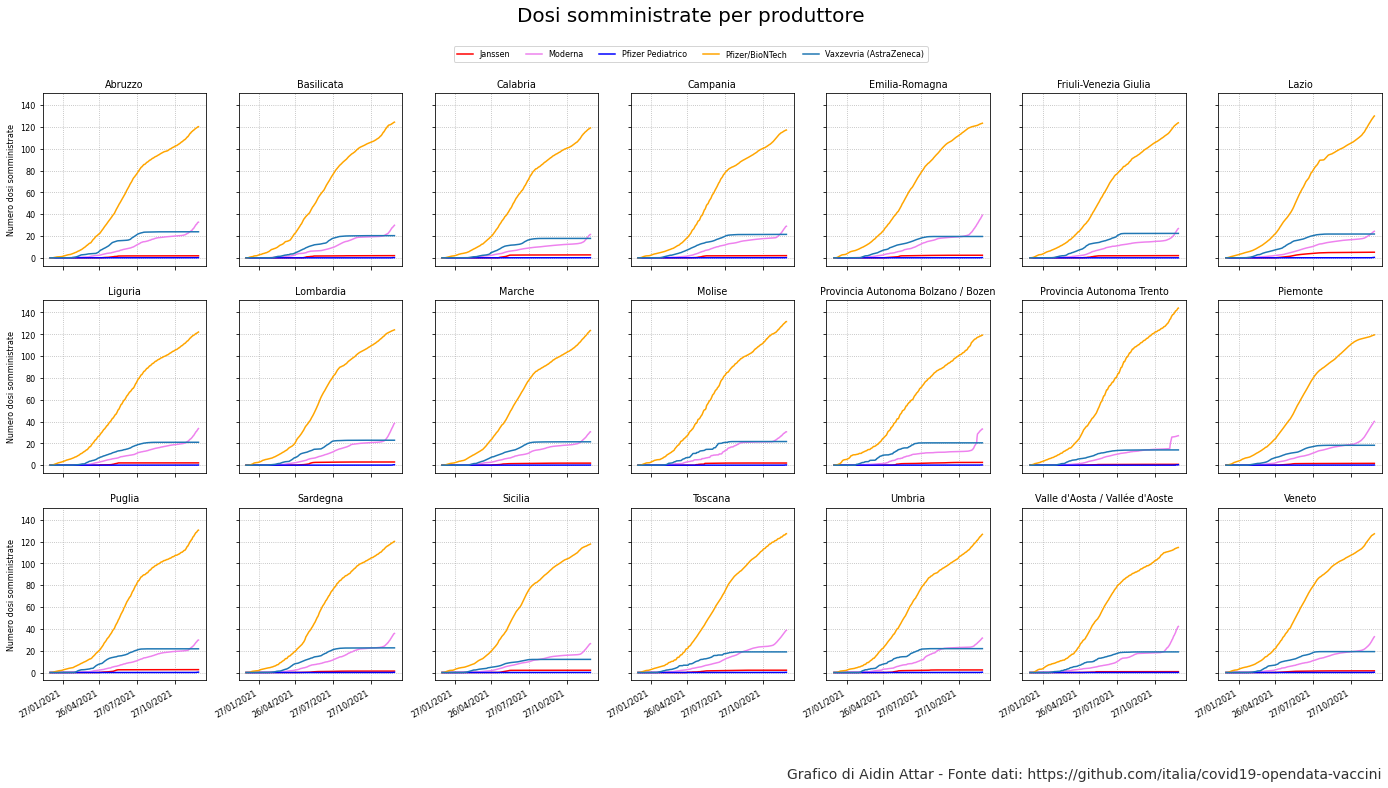

In [91]:
fig, ax = plt.subplots(nrows=3,ncols=7,figsize=(24,12), sharey=True, sharex=True)

colors=['red','violet','blue','orange','C0','violet','brown','black','plasma']
x=0
y=0
for key1 in somministrazioni_età.keys():
    i=0
    for key2 in sorted(somministrazioni_età[key1].keys()):
        ax[y,x].plot(somministrazioni_età[key1][key2].index,somministrazioni_età[key1][key2]['cumulativa_totale_per100'], color=colors[i])
        i+=1
    ax[y,x].set_title(str(key1))
    ax[y,x].grid(linestyle='dotted')
    x+=1
    if x==7:
        x=0
        y+=1
ax[0,0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))

fig.suptitle("Dosi somministrate per produttore", fontsize=20)
plt.rcParams['font.size'] = '8'
ax[0,0].tick_params(axis='both', labelsize=8)
#ax.grid(alpha = 0.2,linestyle='dotted')
ax[0,0].set_ylabel('Numero dosi somministrate')
ax[1,0].set_ylabel('Numero dosi somministrate')
ax[2,0].set_ylabel('Numero dosi somministrate')
ax[0,0].set_xlabel("")
fig.autofmt_xdate()
labels = [key for key in sorted(somministrazioni_età['Emilia-Romagna'].keys())]
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)

plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

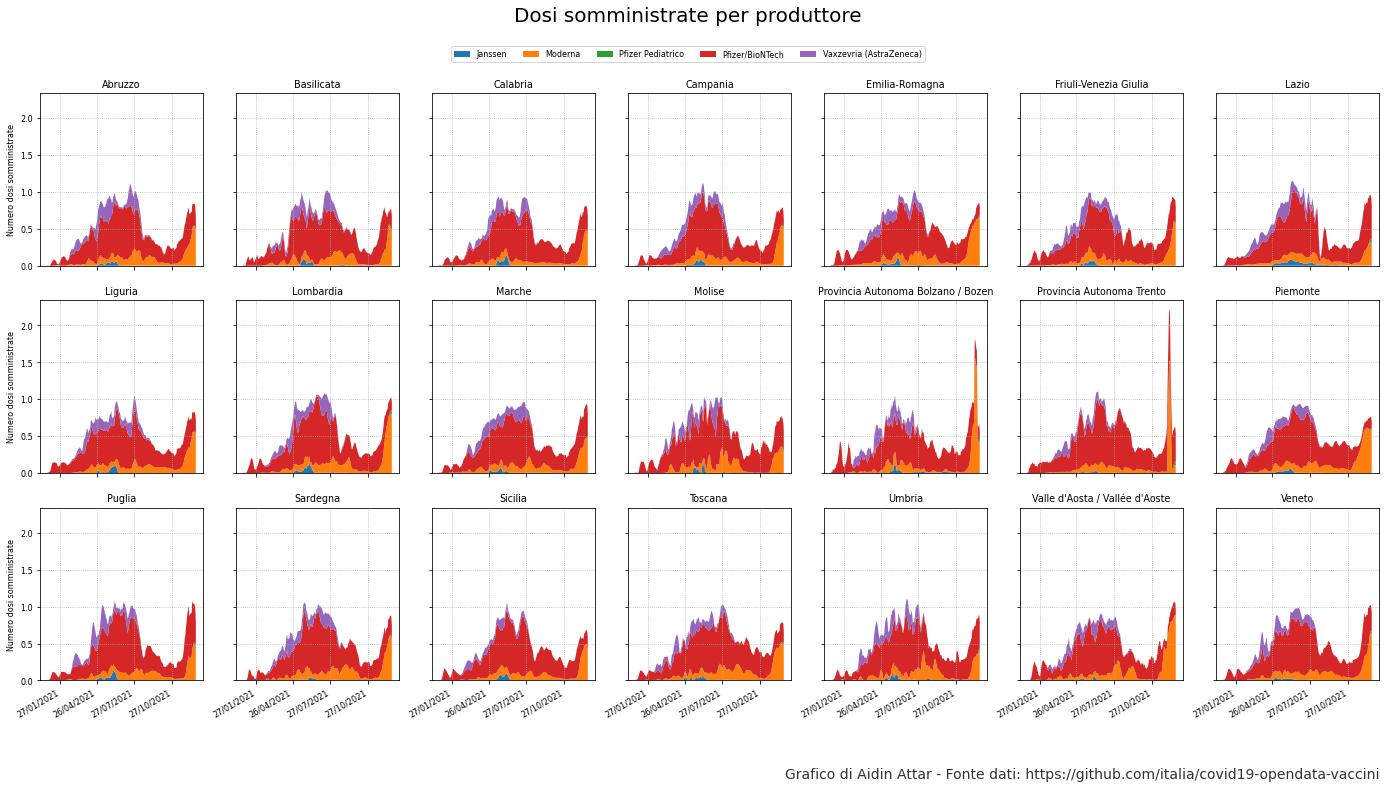

In [206]:
fig, ax = plt.subplots(nrows=3,ncols=7,figsize=(24,12), sharey=True, sharex=True)

colors=['red','violet','blue','orange','C0','violet','brown','black','plasma']
x=0
y=0
for key1 in somministrazioni_età.keys():
    ax[y,x].stackplot(somministrazioni_età[key1]['Pfizer/BioNTech'].index,[somministrazioni_età[key1][key]['media_totale_per100'] for key in sorted(somministrazioni_età[key1].keys())])
    ax[y,x].set_title(str(key1))
    ax[y,x].grid(linestyle='dotted')
    x+=1
    if x==7:
        x=0
        y+=1
ax[0,0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))

fig.suptitle("Dosi somministrate per produttore", fontsize=20)
plt.rcParams['font.size'] = '8'
ax[0,0].tick_params(axis='both', labelsize=8)
#ax.grid(alpha = 0.2,linestyle='dotted')
ax[0,0].set_ylabel('Numero dosi somministrate')
ax[1,0].set_ylabel('Numero dosi somministrate')
ax[2,0].set_ylabel('Numero dosi somministrate')
ax[0,0].set_xlabel("")
labels = [key for key in sorted(somministrazioni_età['Emilia-Romagna'].keys())]
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)

fig.autofmt_xdate()

plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()


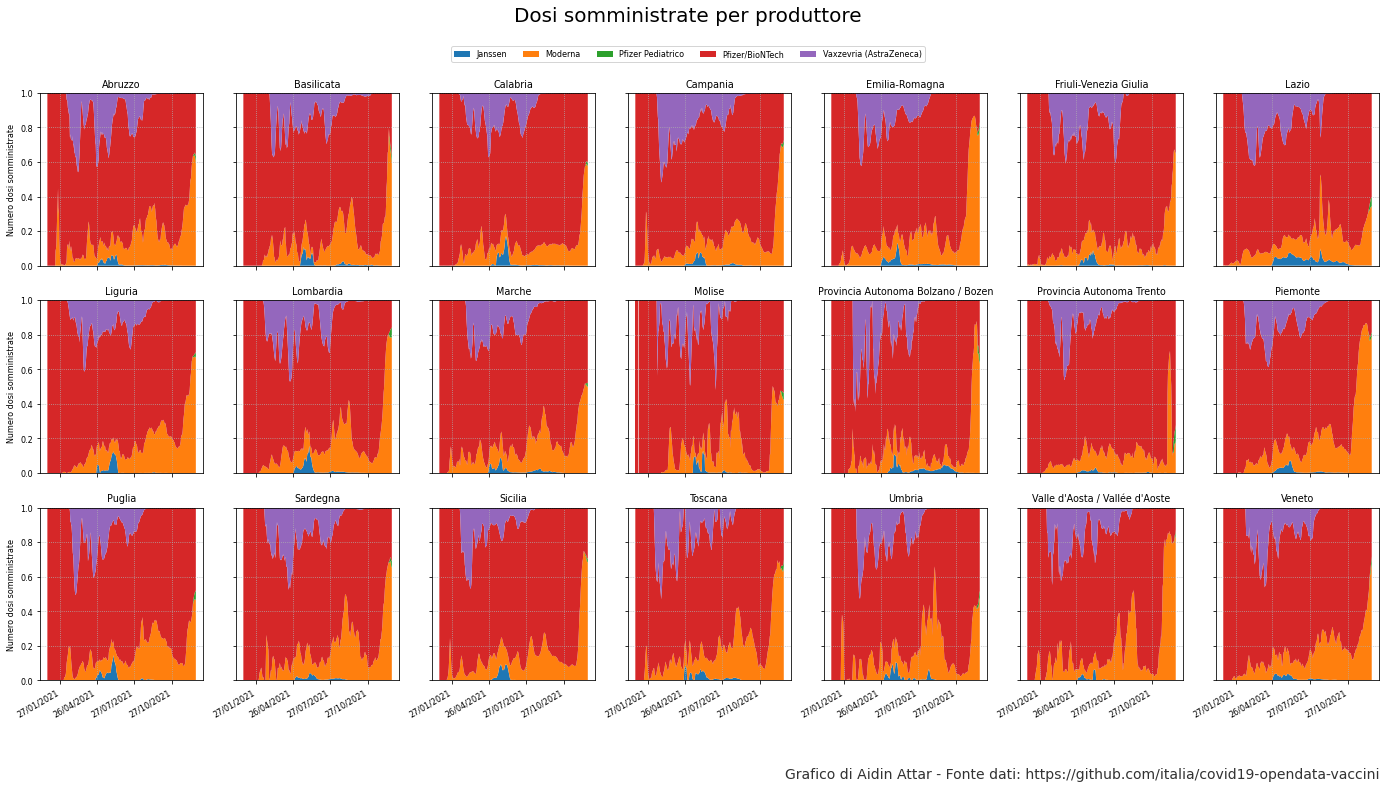

In [208]:
fig, ax = plt.subplots(nrows=3,ncols=7,figsize=(24,12), sharey=True, sharex=True)

colors=['red','violet','blue','orange','C0','violet','brown','black','plasma']
x=0
y=0
for key1 in somministrazioni_età.keys():
    ax[y,x].stackplot(somministrazioni_età[key1]['Pfizer/BioNTech'].index,[somministrazioni_età[key1][key]['media_totale_per100']/sum(somministrazioni_età[key1][key2]['media_totale_per100'] for key2 in somministrazioni_età[key1].keys()) for key in sorted(somministrazioni_età[key1].keys())])
    ax[y,x].set_title(str(key1))
    ax[y,x].grid(linestyle='dotted')
    x+=1
    if x==7:
        x=0
        y+=1
ax[0,0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))

fig.suptitle("Dosi somministrate per produttore", fontsize=20)
plt.rcParams['font.size'] = '8'
ax[0,0].tick_params(axis='both', labelsize=8)
#ax.grid(alpha = 0.2,linestyle='dotted')
ax[0,0].set_ylabel('Proporzioni dosi somministrate')
ax[1,0].set_ylabel('Proporzioni dosi somministrate')
ax[2,0].set_ylabel('Proporzioni dosi somministrate')
ax[0,0].set_xlabel("")
ax[0,0].set_ylim(top=1)
labels = [key for key in sorted(somministrazioni_età['Emilia-Romagna'].keys())]
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)

fig.autofmt_xdate()

plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

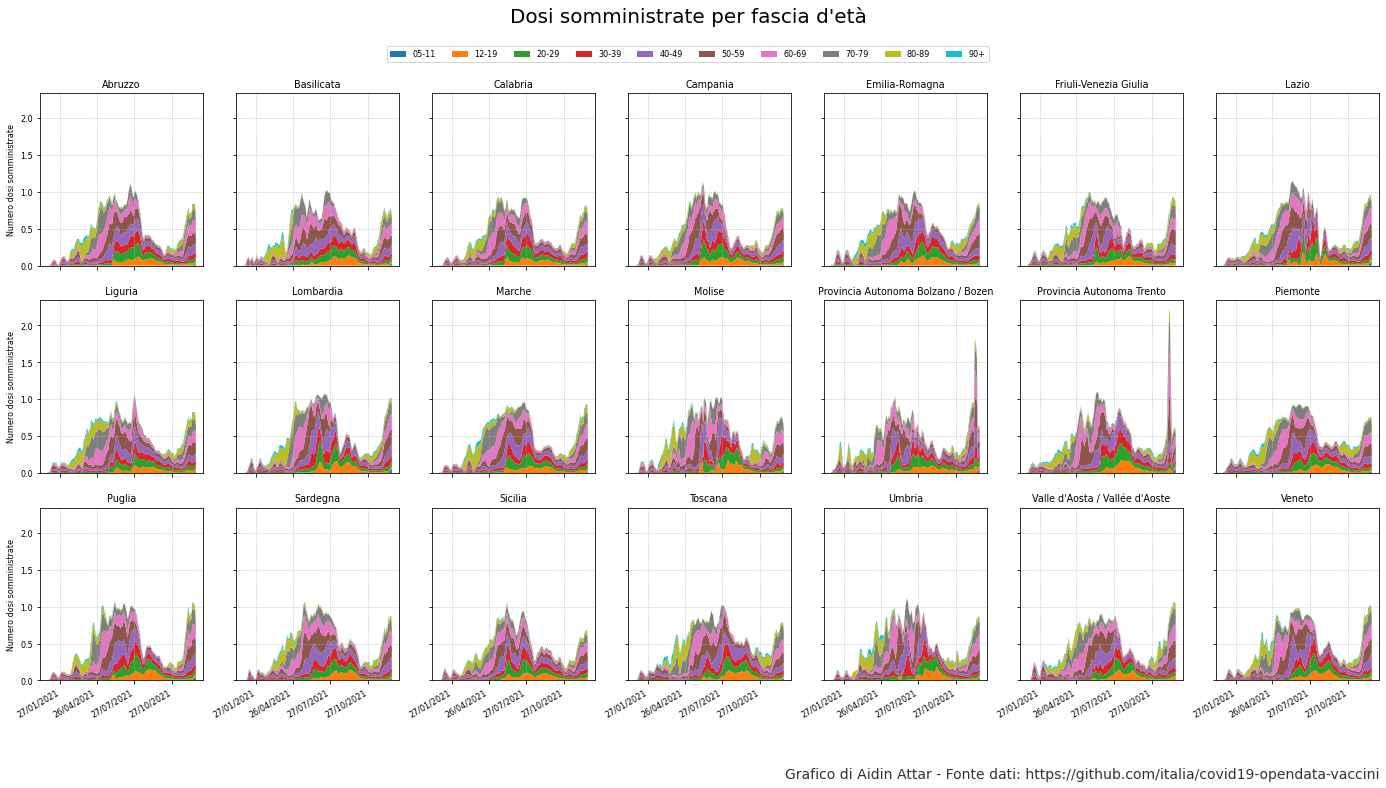

In [210]:
fig, ax = plt.subplots(nrows=3,ncols=7,figsize=(24,12), sharey=True, sharex=True)

colors=['red','violet','blue','orange','C0','violet','brown','black','plasma']
x=0
y=0
for key1 in somministrazioni_fornitori.keys():
    ax[y,x].stackplot(somministrazioni_fornitori[key1]['50-59'].index,[somministrazioni_fornitori[key1][key]['media_totale_per100'] for key in sorted(somministrazioni_fornitori[key1].keys())])
    ax[y,x].set_title(str(key1))
    ax[y,x].grid(linestyle='dotted')
    x+=1
    if x==7:
        x=0
        y+=1
ax[0,0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))

fig.suptitle("Dosi somministrate per fascia d'età", fontsize=20)
plt.rcParams['font.size'] = '8'
ax[0,0].tick_params(axis='both', labelsize=8)
#ax.grid(alpha = 0.2,linestyle='dotted')
ax[0,0].set_ylabel('Numero dosi somministrate')
ax[1,0].set_ylabel('Numero dosi somministrate')
ax[2,0].set_ylabel('Numero dosi somministrate')
ax[0,0].set_xlabel("")

labels = [key for key in sorted(somministrazioni_fornitori['Emilia-Romagna'].keys())]
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)

fig.autofmt_xdate()

plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

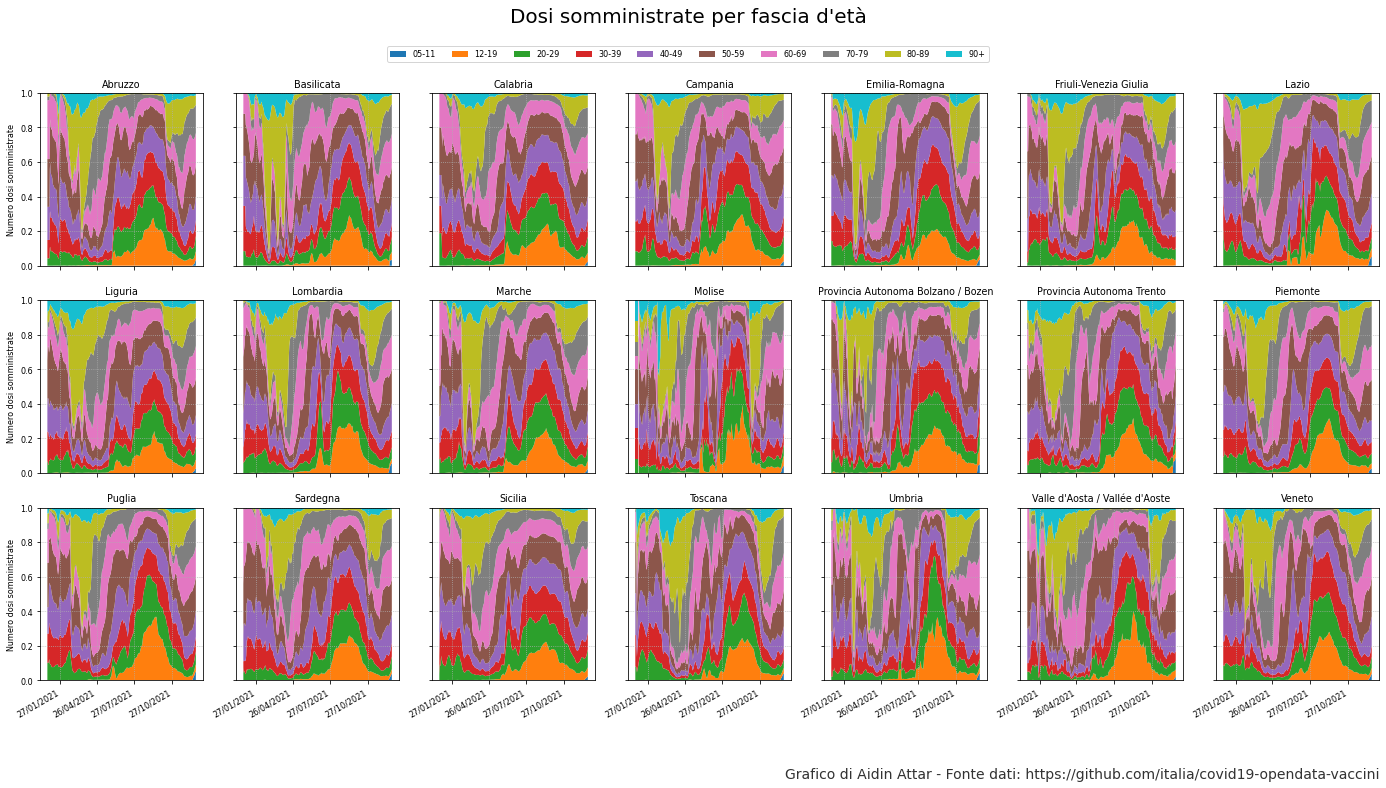

In [211]:
fig, ax = plt.subplots(nrows=3,ncols=7,figsize=(24,12), sharey=True, sharex=True)

colors=['red','violet','blue','orange','C0','violet','brown','black','plasma']
x=0
y=0
for key1 in somministrazioni_fornitori.keys():
    ax[y,x].stackplot(somministrazioni_fornitori[key1]['50-59'].index,[somministrazioni_fornitori[key1][key]['media_totale']/sum(somministrazioni_fornitori[key1][key2]['media_totale'] for key2 in somministrazioni_fornitori[key1].keys()) for key in sorted(somministrazioni_fornitori[key1].keys())])
    ax[y,x].set_title(str(key1))
    ax[y,x].grid(linestyle='dotted')
    x+=1
    if x==7:
        x=0
        y+=1
ax[0,0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))

fig.suptitle("Dosi somministrate per fascia d'età", fontsize=20)
plt.rcParams['font.size'] = '8'
ax[0,0].tick_params(axis='both', labelsize=8)
#ax.grid(alpha = 0.2,linestyle='dotted')
ax[0,0].set_ylabel('Proporzione dosi somministrate')
ax[1,0].set_ylabel('Proporzione dosi somministrate')
ax[2,0].set_ylabel('Proporzione dosi somministrate')
ax[0,0].set_xlabel("")
ax[0,0].set_ylim(top=1)

labels = [key for key in sorted(somministrazioni_fornitori['Emilia-Romagna'].keys())]
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)

fig.autofmt_xdate()

plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

In [51]:
PlateaRegioni = platea.nome_area.unique()
PopolazioneRegioni={elem1:{elem2: int for elem2 in PlateaFasce} for elem1 in PlateaRegioni}
for key1 in PopolazioneRegioni.keys():
    for key2 in PopolazioneRegioni[key1].keys():
        PopolazioneRegioni[key1][key2]=platea.groupby('nome_area').get_group(key1).groupby('fascia_anagrafica').get_group(key2)['totale_popolazione'].values[0]

for new_key, old_key in zip(NomiRegioni,PlateaRegioni):
    PopolazioneRegioni[new_key] = PopolazioneRegioni.pop(old_key)

In [52]:
new_somministrazioni_fornitori = copy.deepcopy(somministrazioni_fornitori)

for key in somministrazioni_fornitori.keys():
    new_somministrazioni_fornitori[key]['80+'] = copy.deepcopy(somministrazioni_fornitori[key]['90+'])
    new_somministrazioni_fornitori[key]['80+'][                  'totale'] = somministrazioni_fornitori[key]['80-89'][                  'totale']+somministrazioni_fornitori[key]['90+'][                  'totale']
    new_somministrazioni_fornitori[key]['80+'][          'sesso_maschile'] = somministrazioni_fornitori[key]['80-89'][          'sesso_maschile']+somministrazioni_fornitori[key]['90+'][          'sesso_maschile']
    new_somministrazioni_fornitori[key]['80+'][         'sesso_femminile'] = somministrazioni_fornitori[key]['80-89'][         'sesso_femminile']+somministrazioni_fornitori[key]['90+'][         'sesso_femminile']
    new_somministrazioni_fornitori[key]['80+'][              'prima_dose'] = somministrazioni_fornitori[key]['80-89'][              'prima_dose']+somministrazioni_fornitori[key]['90+'][              'prima_dose']
    new_somministrazioni_fornitori[key]['80+'][            'seconda_dose'] = somministrazioni_fornitori[key]['80-89'][            'seconda_dose']+somministrazioni_fornitori[key]['90+'][            'seconda_dose']
    new_somministrazioni_fornitori[key]['80+'][     'pregressa_infezione'] = somministrazioni_fornitori[key]['80-89'][     'pregressa_infezione']+somministrazioni_fornitori[key]['90+'][     'pregressa_infezione']
    new_somministrazioni_fornitori[key]['80+']['dose_addizionale_booster'] = somministrazioni_fornitori[key]['80-89']['dose_addizionale_booster']+somministrazioni_fornitori[key]['90+']['dose_addizionale_booster']
    new_somministrazioni_fornitori[key]['80+']['fascia_anagrafica']='80+'
    new_somministrazioni_fornitori[key].pop('80-89')
    new_somministrazioni_fornitori[key].pop('90+')

for key in new_somministrazioni_fornitori.keys():
    for key1 in new_somministrazioni_fornitori[key].keys():
        new_somministrazioni_fornitori[key][key1][                       'media_totale'] = new_somministrazioni_fornitori[key][key1]['totale'].rolling(window=7, min_periods=1).mean()
        new_somministrazioni_fornitori[key][key1][               'media_sesso_maschile'] = new_somministrazioni_fornitori[key][key1]['sesso_maschile'].rolling(window=7, min_periods=1).mean()
        new_somministrazioni_fornitori[key][key1][              'media_sesso_femminile'] = new_somministrazioni_fornitori[key][key1]['sesso_femminile'].rolling(window=7, min_periods=1).mean()
        new_somministrazioni_fornitori[key][key1][                   'media_prima_dose'] = new_somministrazioni_fornitori[key][key1]['prima_dose'].rolling(window=7, min_periods=1).mean()
        new_somministrazioni_fornitori[key][key1][                 'media_seconda_dose'] = new_somministrazioni_fornitori[key][key1]['seconda_dose'].rolling(window=7, min_periods=1).mean()
        new_somministrazioni_fornitori[key][key1][          'media_pregressa_infezione'] = new_somministrazioni_fornitori[key][key1]['pregressa_infezione'].rolling(window=7, min_periods=1).mean()
        new_somministrazioni_fornitori[key][key1][     'media_dose_addizionale_booster'] = new_somministrazioni_fornitori[key][key1]['dose_addizionale_booster'].rolling(window=7, min_periods=1).mean()
        new_somministrazioni_fornitori[key][key1][                  'cumulativa_totale'] = new_somministrazioni_fornitori[key][key1][                  'totale'].cumsum()
        new_somministrazioni_fornitori[key][key1][          'cumulativa_sesso_maschile'] = new_somministrazioni_fornitori[key][key1][          'sesso_maschile'].cumsum()
        new_somministrazioni_fornitori[key][key1][         'cumulativa_sesso_femminile'] = new_somministrazioni_fornitori[key][key1][         'sesso_femminile'].cumsum()
        new_somministrazioni_fornitori[key][key1][              'cumulativa_prima_dose'] = new_somministrazioni_fornitori[key][key1][              'prima_dose'].cumsum()
        new_somministrazioni_fornitori[key][key1][            'cumulativa_seconda_dose'] = new_somministrazioni_fornitori[key][key1][            'seconda_dose'].cumsum()
        new_somministrazioni_fornitori[key][key1][     'cumulativa_pregressa_infezione'] = new_somministrazioni_fornitori[key][key1][     'pregressa_infezione'].cumsum()
        new_somministrazioni_fornitori[key][key1]['cumulativa_dose_addizionale_booster'] = new_somministrazioni_fornitori[key][key1]['dose_addizionale_booster'].cumsum()

        new_somministrazioni_fornitori[key][key1][                  'perc_cumulativa_totale'] = new_somministrazioni_fornitori[key][key1][                  'cumulativa_totale'] / PopolazioneRegioni[key][key1] * 100
        new_somministrazioni_fornitori[key][key1][          'perc_cumulativa_sesso_maschile'] = new_somministrazioni_fornitori[key][key1][          'cumulativa_sesso_maschile'] / PopolazioneRegioni[key][key1] * 100
        new_somministrazioni_fornitori[key][key1][         'perc_cumulativa_sesso_femminile'] = new_somministrazioni_fornitori[key][key1][         'cumulativa_sesso_femminile'] / PopolazioneRegioni[key][key1] * 100
        new_somministrazioni_fornitori[key][key1][              'perc_cumulativa_prima_dose'] = new_somministrazioni_fornitori[key][key1][              'cumulativa_prima_dose'] / PopolazioneRegioni[key][key1] * 100
        new_somministrazioni_fornitori[key][key1][            'perc_cumulativa_seconda_dose'] = new_somministrazioni_fornitori[key][key1][            'cumulativa_seconda_dose'] / PopolazioneRegioni[key][key1] * 100
        new_somministrazioni_fornitori[key][key1][     'perc_cumulativa_pregressa_infezione'] = new_somministrazioni_fornitori[key][key1][     'cumulativa_pregressa_infezione'] / PopolazioneRegioni[key][key1] * 100
        new_somministrazioni_fornitori[key][key1]['perc_cumulativa_dose_addizionale_booster'] = new_somministrazioni_fornitori[key][key1]['cumulativa_dose_addizionale_booster'] / PopolazioneRegioni[key][key1] * 100

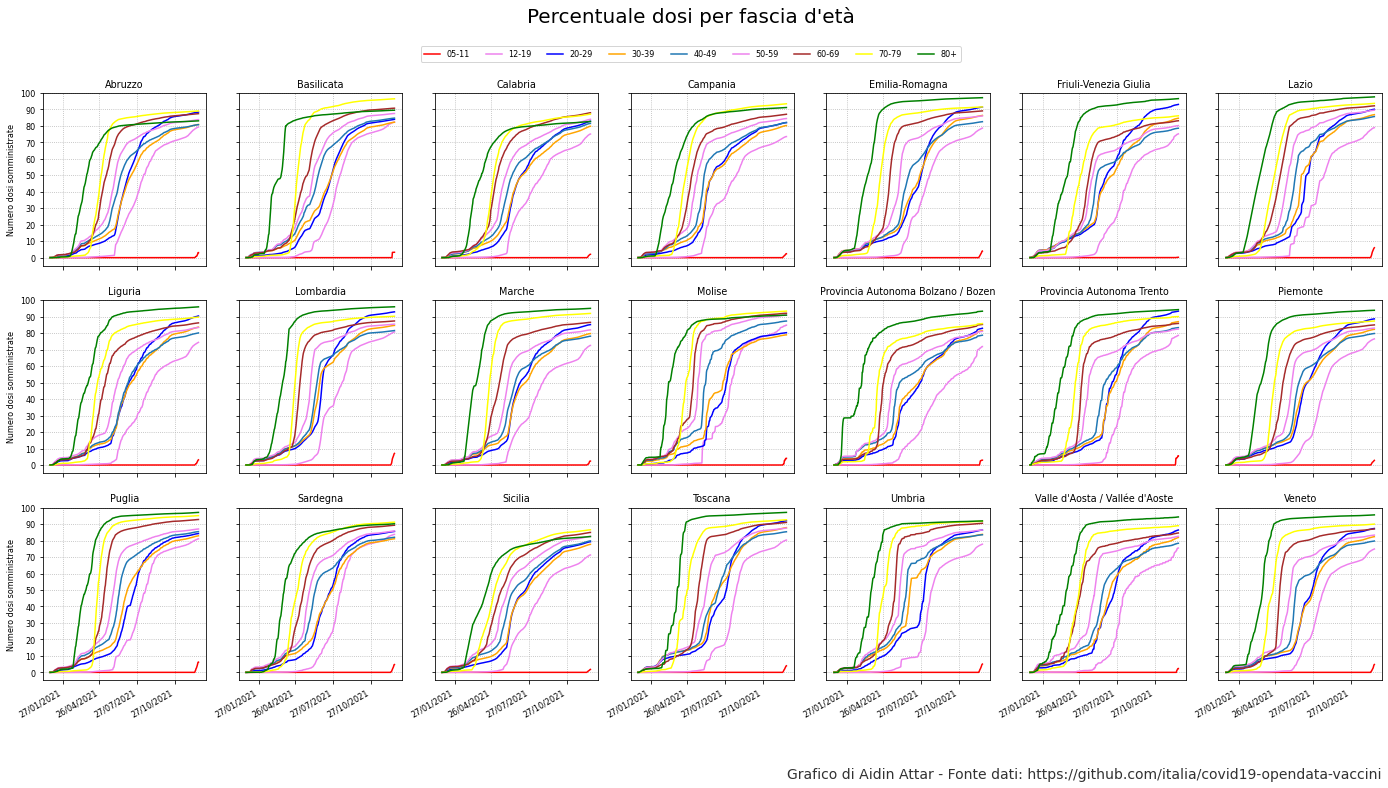

In [171]:
fig, ax = plt.subplots(nrows=3,ncols=7,figsize=(24,12), sharex=True, sharey=True)

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
x=0
y=0
for key1 in new_somministrazioni_fornitori.keys():
    i=0
    for key2 in sorted(new_somministrazioni_fornitori[key1].keys()):
        ax[y,x].plot(new_somministrazioni_fornitori[key1][key2].index,new_somministrazioni_fornitori[key1][key2]['perc_cumulativa_prima_dose'], color=colors[i])
        i+=1
    ax[y,x].set_title(str(key1))
    ax[y,x].grid(linestyle='dotted')
    x+=1
    if x==7:
        x=0
        y+=1
ax[0,0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax[0,0].yaxis.set_major_locator(MultipleLocator(10))
ax[0,0].set_ylim(top=100)
fig.suptitle("Percentuale dosi per fascia d'età", fontsize=20)
plt.rcParams['font.size'] = '8'
ax[0,0].tick_params(axis='both', labelsize=8)
#ax.grid(alpha = 0.2,linestyle='dotted')
ax[0,0].set_ylabel('Numero dosi somministrate')
ax[1,0].set_ylabel('Numero dosi somministrate')
ax[2,0].set_ylabel('Numero dosi somministrate')
ax[0,0].set_xlabel("")
fig.autofmt_xdate()

labels = [key for key in sorted(new_somministrazioni_fornitori['Emilia-Romagna'].keys())]
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)

plt.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

In [108]:
PercetualiPrimaDose          = [new_italia_fornitori[key][              'perc_cumulativa_prima_dose'].iloc[-1] for key in sorted(new_italia_fornitori.keys())]
PercetualiSecondaDose        = [new_italia_fornitori[key][            'perc_cumulativa_seconda_dose'].iloc[-1] for key in sorted(new_italia_fornitori.keys())]
PercetualiTerzaDose          = [new_italia_fornitori[key]['perc_cumulativa_dose_addizionale_booster'].iloc[-1] for key in sorted(new_italia_fornitori.keys())]
PercetualiPregressaInfezione = [new_italia_fornitori[key][     'perc_cumulativa_pregressa_infezione'].iloc[-1] for key in sorted(new_italia_fornitori.keys())]

PercentualiOggi = pd.DataFrame({'prima_dose': PercetualiPrimaDose,
                                'seconda_dose': PercetualiSecondaDose,
                                'dose_addizionale_booster': PercetualiTerzaDose,
                                'pregressa_infezione': PercetualiPregressaInfezione},
                               index=sorted(new_italia_fornitori.keys()))
PercentualiOggi

prima_dose  seconda_dose  dose_addizionale_booster  pregressa_infezione
05-11    4.322648      0.000000                  0.000000             0.004212
12-19   77.313845     69.008327                  2.133370             2.481354
20-29   87.486938     80.989229                 12.733939             3.420452
30-39   83.101799     76.892478                 15.499533             3.071382
40-49   82.042562     76.546407                 22.479288             3.251803
50-59   85.127799     78.633113                 33.939590             3.513455
60-69   88.093870     80.374487                 44.603353             3.066020
70-79   90.728840     86.650250                 54.532086             2.626698
80+     93.704363     91.560457                 70.055404             2.104804

In [166]:
PercentualiRegioni = {}
for key in NomiRegioni:
    PercetualiPrimaDose          = [new_somministrazioni_fornitori[key][key1][              'perc_cumulativa_prima_dose'].iloc[-1] for key1 in sorted(new_somministrazioni_fornitori[key].keys())]
    PercetualiSecondaDose        = [new_somministrazioni_fornitori[key][key1][            'perc_cumulativa_seconda_dose'].iloc[-1] for key1 in sorted(new_somministrazioni_fornitori[key].keys())]
    PercetualiTerzaDose          = [new_somministrazioni_fornitori[key][key1]['perc_cumulativa_dose_addizionale_booster'].iloc[-1] for key1 in sorted(new_somministrazioni_fornitori[key].keys())]
    PercetualiPregressaInfezione = [new_somministrazioni_fornitori[key][key1][     'perc_cumulativa_pregressa_infezione'].iloc[-1] for key1 in sorted(new_somministrazioni_fornitori[key].keys())]

    PercentualiRegioni[key] = pd.DataFrame({'prima_dose'              :          PercetualiPrimaDose,
                                            'seconda_dose'            :        PercetualiSecondaDose,
                                            'dose_addizionale_booster':          PercetualiTerzaDose,
                                            'pregressa_infezione'     : PercetualiPregressaInfezione},
                                           index=sorted(new_somministrazioni_fornitori[key].keys()))

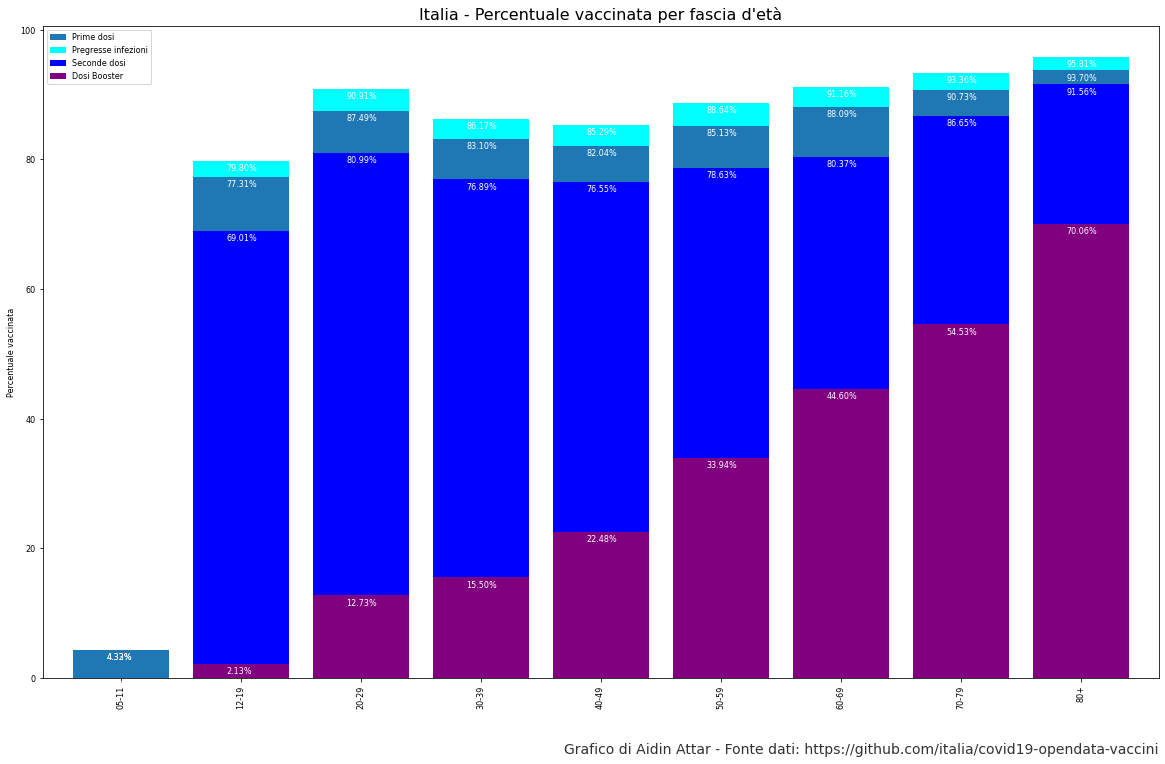

In [161]:
fig, ax = plt.subplots(figsize=(20,12))

labels=['Prime dosi', 'Pregresse infezioni', 'Seconde dosi', 'Dosi Booster']
PercentualiOggi[['prima_dose','pregressa_infezione']].plot.bar(ax=ax, stacked=True, color = ['C0', 'cyan'],width=.8)
PercentualiOggi['seconda_dose'].plot.bar(ax=ax, stacked=True, color='blue',width=0.8)
PercentualiOggi['dose_addizionale_booster'].plot.bar(ax=ax, stacked=True, color='purple',width=.8)
ax.legend(labels, loc='best')
ax.set_ylabel('Percentuale vaccinata')
ax.set_title("Italia - Percentuale vaccinata per fascia d'età", fontsize=16)
#ax.grid(linestyle='dotted')

for index,data in enumerate(PercentualiOggi['seconda_dose']):
    plt.text(x=index-0.12 , y =data-1.5 , s=str("{:.2%}".format(data/100)), color = 'w',fontdict=dict(fontsize=8))
    
for index,data in enumerate(PercentualiOggi['prima_dose']):
    plt.text(x=index-0.12 , y =data-1.5 , s=str("{:.2%}".format(data/100)), color = 'w',fontdict=dict(fontsize=8))
    
for index,data in enumerate(PercentualiOggi['dose_addizionale_booster']):
    plt.text(x=index-0.12 , y =data-1.5 , s=str("{:.2%}".format(data/100)), color = 'w',fontdict=dict(fontsize=8))
    
for index,data in enumerate(PercentualiOggi['prima_dose']+PercentualiOggi['pregressa_infezione']):
    plt.text(x=index-0.12 , y =data-1.5 , s=str("{:.2%}".format(data/100)), color = 'w',fontdict=dict(fontsize=8))
    
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')
    
plt.show()

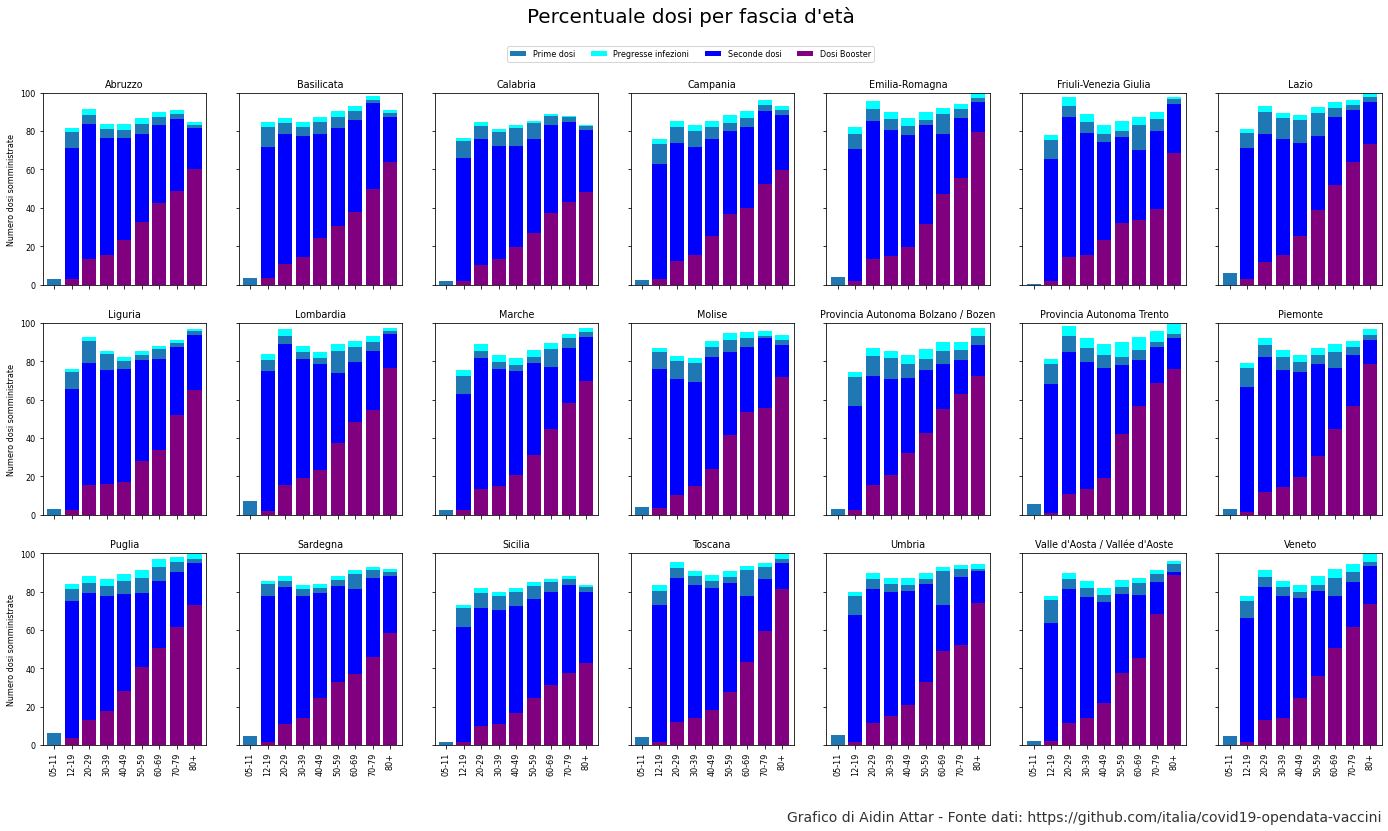

In [184]:
fig, ax = plt.subplots(nrows=3,ncols=7,figsize=(24,12), sharex=True,sharey=True)

colors=['red','violet','blue','orange','C0','violet','brown','yellow','green','black','purple']
x=0
y=0
for key1 in new_somministrazioni_fornitori.keys():
    PercentualiRegioni[key1][['prima_dose','pregressa_infezione']].plot.bar(ax=ax[y,x], stacked=True, color = ['C0', 'cyan'],width=.8, legend=False)
    PercentualiRegioni[key1]['seconda_dose'].plot.bar(ax=ax[y,x], stacked=True, color='blue',width=0.8)
    PercentualiRegioni[key1]['dose_addizionale_booster'].plot.bar(ax=ax[y,x], stacked=True, color='purple',width=.8)
    ax[y,x].set_title(str(key1))
    x+=1
    if x==7:
        x=0
        y+=1
ax[0,0].set_ylim(top=100)
fig.suptitle("Percentuale dosi per fascia d'età", fontsize=20)
plt.rcParams['font.size'] = '8'
ax[0,0].tick_params(axis='both', labelsize=8)
#ax.grid(alpha = 0.2,linestyle='dotted')
ax[0,0].set_ylabel('Numero dosi somministrate')
ax[1,0].set_ylabel('Numero dosi somministrate')
ax[2,0].set_ylabel('Numero dosi somministrate')

labels=['Prime dosi', 'Pregresse infezioni', 'Seconde dosi', 'Dosi Booster']
fig.legend(labels, loc='center',bbox_to_anchor=(.5,.925), ncol=len(labels), bbox_transform=fig.transFigure)

plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini',
         transform=plt.gcf().transFigure,
         fontsize=14, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

Text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini')

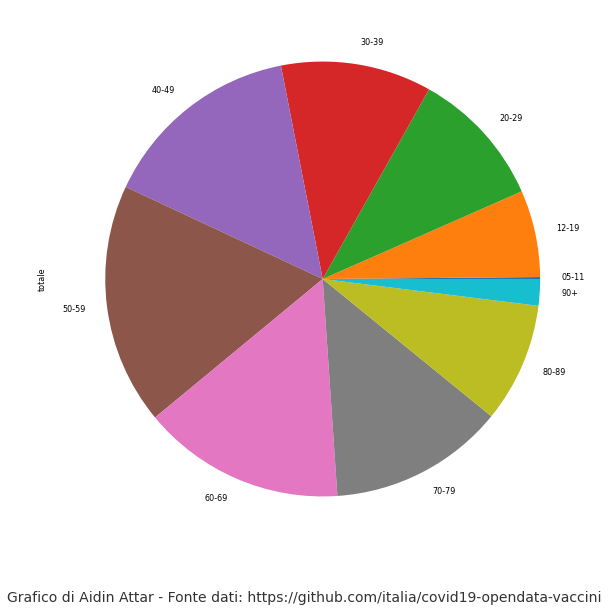

In [54]:
fig, ax = plt.subplots(figsize=(10,10))

anag.groupby(['fascia_anagrafica']).sum().plot(ax = ax, kind='pie', y='totale', legend = False)

plt.rcParams['font.size'] = '10'
plt.rcParams['xtick.labelsize'] = '8'
plt.rcParams['ytick.labelsize'] = '8'

plt.xticks(rotation=30)
plt.text(0.9, 0.05, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=14, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

In [ ]:
cons_grouped = cons.groupby(cons.area)
cons_emr     = cons_grouped.get_group('EMR')
cons_ven     = cons_grouped.get_group('VEN')
cons_abr     = cons_grouped.get_group('ABR')
cons_bas     = cons_grouped.get_group('BAS')
cons_cal     = cons_grouped.get_group('CAL')
cons_cam     = cons_grouped.get_group('CAM')
cons_fvg     = cons_grouped.get_group('FVG')
cons_laz     = cons_grouped.get_group('LAZ')
cons_lom     = cons_grouped.get_group('LOM')
cons_lig     = cons_grouped.get_group('LIG')
cons_mar     = cons_grouped.get_group('MAR')
cons_mol     = cons_grouped.get_group('MOL')
cons_pab     = cons_grouped.get_group('PAB')
cons_pat     = cons_grouped.get_group('PAT')
cons_pie     = cons_grouped.get_group('PIE')
cons_pug     = cons_grouped.get_group('PUG')
cons_sar     = cons_grouped.get_group('SAR')
cons_sic     = cons_grouped.get_group('SIC')
cons_tos     = cons_grouped.get_group('TOS')
cons_umb     = cons_grouped.get_group('UMB')
cons_vda     = cons_grouped.get_group('VDA')

cons_emr['per_1000']       = cons_emr['numero_dosi'] / 4459
cons_ven['per_1000']       = cons_ven['numero_dosi'] / 4906
cons_abr['per_1000']       = cons_abr['numero_dosi'] / 1312
cons_bas['per_1000']       = cons_bas['numero_dosi'] / 562.869
cons_cal['per_1000']       = cons_cal['numero_dosi'] / 1947
cons_cam['per_1000']       = cons_cam['numero_dosi'] / 5802
cons_fvg['per_1000']       = cons_fvg['numero_dosi'] / 1215
cons_laz['per_1000']       = cons_laz['numero_dosi'] / 5879
cons_lom['per_1000']       = cons_lom['numero_dosi'] / 10060
cons_lig['per_1000']       = cons_lig['numero_dosi'] / 1551
cons_mar['per_1000']       = cons_mar['numero_dosi'] / 1525
cons_mol['per_1000']       = cons_mol['numero_dosi'] / 305.617
cons_pab['per_1000']       = cons_pab['numero_dosi'] / 520.891
cons_pat['per_1000']       = cons_pat['numero_dosi'] / 538.223
cons_pie['per_1000']       = cons_pie['numero_dosi'] / 4356
cons_pug['per_1000']       = cons_pug['numero_dosi'] / 4029
cons_sar['per_1000']       = cons_sar['numero_dosi'] / 1640
cons_sic['per_1000']       = cons_sic['numero_dosi'] / 5000
cons_tos['per_1000']       = cons_tos['numero_dosi'] / 3730
cons_umb['per_1000']       = cons_umb['numero_dosi'] / 882.015
cons_vda['per_1000']       = cons_vda['numero_dosi'] / 125.666

cons_emr['Pfizer/BioNTech'] = 0
cons_emr['Moderna'] = 0
cons_emr['AstraZeneca'] = 0
cons_emr['Janssen'] = 0

for i in cons_emr.index:
    if cons_emr.fornitore[i] == 'Pfizer/BioNTech':
        cons_emr['Pfizer/BioNTech'][i] = cons_emr['numero_dosi'][i]
        
    elif cons_emr.fornitore[i] == 'Moderna':
        cons_emr['Moderna'][i] = cons_emr['numero_dosi'][i]
    elif cons_emr.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_emr['AstraZeneca'][i] = cons_emr['numero_dosi'][i]
    elif cons_emr.fornitore[i] == 'Janssen':
        cons_emr['Janssen'][i] = cons_emr['numero_dosi'][i]
cons_emr.drop('fornitore', 1, inplace = True)

cons_ven['Pfizer/BioNTech'] = 0
cons_ven['Moderna'] = 0
cons_ven['AstraZeneca'] = 0
cons_ven['Janssen'] = 0

for i in cons_ven.index:
    if cons_ven.fornitore[i] == 'Pfizer/BioNTech':
        cons_ven['Pfizer/BioNTech'][i] = cons_ven['numero_dosi'][i]
        
    elif cons_ven.fornitore[i] == 'Moderna':
        cons_ven['Moderna'][i] = cons_ven['numero_dosi'][i]
    elif cons_ven.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_ven['AstraZeneca'][i] = cons_ven['numero_dosi'][i]
    elif cons_ven.fornitore[i] == 'Janssen':
        cons_ven['Janssen'][i] = cons_ven['numero_dosi'][i]
cons_ven.drop('fornitore', 1, inplace = True)

cons_vda['Pfizer/BioNTech'] = 0
cons_vda['Moderna'] = 0
cons_vda['AstraZeneca'] = 0
cons_vda['Janssen'] = 0

for i in cons_vda.index:
    if cons_vda.fornitore[i] == 'Pfizer/BioNTech':
        cons_vda['Pfizer/BioNTech'][i] = cons_vda['numero_dosi'][i]
        
    elif cons_vda.fornitore[i] == 'Moderna':
        cons_vda['Moderna'][i] = cons_vda['numero_dosi'][i]
    elif cons_vda.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_vda['AstraZeneca'][i] = cons_vda['numero_dosi'][i]
    elif cons_vda.fornitore[i] == 'Janssen':
        cons_vda['Janssen'][i] = cons_vda['numero_dosi'][i]
cons_vda.drop('fornitore', 1, inplace = True)

cons_lom['Pfizer/BioNTech'] = 0
cons_lom['Moderna'] = 0
cons_lom['AstraZeneca'] = 0
cons_lom['Janssen'] = 0

for i in cons_lom.index:
    if cons_lom.fornitore[i] == 'Pfizer/BioNTech':
        cons_lom['Pfizer/BioNTech'][i] = cons_lom['numero_dosi'][i]
        
    elif cons_lom.fornitore[i] == 'Moderna':
        cons_lom['Moderna'][i] = cons_lom['numero_dosi'][i]
    elif cons_lom.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_lom['AstraZeneca'][i] = cons_lom['numero_dosi'][i]
    elif cons_lom.fornitore[i] == 'Janssen':
        cons_lom['Janssen'][i] = cons_lom['numero_dosi'][i]
cons_lom.drop('fornitore', 1, inplace = True)

cons_laz['Pfizer/BioNTech'] = 0
cons_laz['Moderna'] = 0
cons_laz['AstraZeneca'] = 0
cons_laz['Janssen'] = 0

for i in cons_laz.index:
    if cons_laz.fornitore[i] == 'Pfizer/BioNTech':
        cons_laz['Pfizer/BioNTech'][i] = cons_laz['numero_dosi'][i]
        
    elif cons_laz.fornitore[i] == 'Moderna':
        cons_laz['Moderna'][i] = cons_laz['numero_dosi'][i]
    elif cons_laz.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_laz['AstraZeneca'][i] = cons_laz['numero_dosi'][i]
    elif cons_laz.fornitore[i] == 'Janssen':
        cons_laz['Janssen'][i] = cons_laz['numero_dosi'][i]
cons_laz.drop('fornitore', 1, inplace = True)

cons_lig['Pfizer/BioNTech'] = 0
cons_lig['Moderna'] = 0
cons_lig['AstraZeneca'] = 0
cons_lig['Janssen'] = 0

for i in cons_lig.index:
    if cons_lig.fornitore[i] == 'Pfizer/BioNTech':
        cons_lig['Pfizer/BioNTech'][i] = cons_lig['numero_dosi'][i]
        
    elif cons_lig.fornitore[i] == 'Moderna':
        cons_lig['Moderna'][i] = cons_lig['numero_dosi'][i]
    elif cons_lig.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_lig['AstraZeneca'][i] = cons_lig['numero_dosi'][i]
    elif cons_lig.fornitore[i] == 'Janssen':
        cons_lig['Janssen'][i] = cons_lig['numero_dosi'][i]
cons_lig.drop('fornitore', 1, inplace = True)

cons_sar['Pfizer/BioNTech'] = 0
cons_sar['Moderna'] = 0
cons_sar['AstraZeneca'] = 0
cons_sar['Janssen'] = 0

for i in cons_sar.index:
    if cons_sar.fornitore[i] == 'Pfizer/BioNTech':
        cons_sar['Pfizer/BioNTech'][i] = cons_sar['numero_dosi'][i]
        
    elif cons_sar.fornitore[i] == 'Moderna':
        cons_sar['Moderna'][i] = cons_sar['numero_dosi'][i]
    elif cons_sar.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_sar['AstraZeneca'][i] = cons_sar['numero_dosi'][i]
    elif cons_sar.fornitore[i] == 'Janssen':
        cons_sar['Janssen'][i] = cons_sar['numero_dosi'][i]
cons_sar.drop('fornitore', 1, inplace = True)

cons_sic['Pfizer/BioNTech'] = 0
cons_sic['Moderna'] = 0
cons_sic['AstraZeneca'] = 0
cons_sic['Janssen'] = 0

for i in cons_sic.index:
    if cons_sic.fornitore[i] == 'Pfizer/BioNTech':
        cons_sic['Pfizer/BioNTech'][i] = cons_sic['numero_dosi'][i]
        
    elif cons_sic.fornitore[i] == 'Moderna':
        cons_sic['Moderna'][i] = cons_sic['numero_dosi'][i]
    elif cons_sic.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_sic['AstraZeneca'][i] = cons_sic['numero_dosi'][i]
    elif cons_sic.fornitore[i] == 'Janssen':
        cons_sic['Janssen'][i] = cons_sic['numero_dosi'][i]
cons_sic.drop('fornitore', 1, inplace = True)

cons_tos['Pfizer/BioNTech'] = 0
cons_tos['Moderna'] = 0
cons_tos['AstraZeneca'] = 0
cons_tos['Janssen'] = 0

for i in cons_tos.index:
    if cons_tos.fornitore[i] == 'Pfizer/BioNTech':
        cons_tos['Pfizer/BioNTech'][i] = cons_tos['numero_dosi'][i]
        
    elif cons_tos.fornitore[i] == 'Moderna':
        cons_tos['Moderna'][i] = cons_tos['numero_dosi'][i]
    elif cons_tos.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_tos['AstraZeneca'][i] = cons_tos['numero_dosi'][i]
    elif cons_tos.fornitore[i] == 'Janssen':
        cons_tos['Janssen'][i] = cons_tos['numero_dosi'][i]
cons_tos.drop('fornitore', 1, inplace = True)

cons_pug['Pfizer/BioNTech'] = 0
cons_pug['Moderna'] = 0
cons_pug['AstraZeneca'] = 0
cons_pug['Janssen'] = 0

for i in cons_pug.index:
    if cons_pug.fornitore[i] == 'Pfizer/BioNTech':
        cons_pug['Pfizer/BioNTech'][i] = cons_pug['numero_dosi'][i]
        
    elif cons_pug.fornitore[i] == 'Moderna':
        cons_pug['Moderna'][i] = cons_pug['numero_dosi'][i]
    elif cons_pug.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_pug['AstraZeneca'][i] = cons_pug['numero_dosi'][i]
    elif cons_pug.fornitore[i] == 'Janssen':
        cons_pug['Janssen'][i] = cons_pug['numero_dosi'][i]
cons_pug.drop('fornitore', 1, inplace = True)

cons_abr['Pfizer/BioNTech'] = 0
cons_abr['Moderna'] = 0
cons_abr['AstraZeneca'] = 0
cons_abr['Janssen'] = 0

for i in cons_abr.index:
    if cons_abr.fornitore[i] == 'Pfizer/BioNTech':
        cons_abr['Pfizer/BioNTech'][i] = cons_abr['numero_dosi'][i]
        
    elif cons_abr.fornitore[i] == 'Moderna':
        cons_abr['Moderna'][i] = cons_abr['numero_dosi'][i]
    elif cons_abr.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_abr['AstraZeneca'][i] = cons_abr['numero_dosi'][i]
    elif cons_abr.fornitore[i] == 'Janssen':
        cons_abr['Janssen'][i] = cons_abr['numero_dosi'][i]
cons_abr.drop('fornitore', 1, inplace = True)

cons_bas['Pfizer/BioNTech'] = 0
cons_bas['Moderna'] = 0
cons_bas['AstraZeneca'] = 0
cons_bas['Janssen'] = 0

for i in cons_bas.index:
    if cons_bas.fornitore[i] == 'Pfizer/BioNTech':
        cons_bas['Pfizer/BioNTech'][i] = cons_bas['numero_dosi'][i]
        
    elif cons_bas.fornitore[i] == 'Moderna':
        cons_bas['Moderna'][i] = cons_bas['numero_dosi'][i]
    elif cons_bas.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_bas['AstraZeneca'][i] = cons_bas['numero_dosi'][i]
    elif cons_bas.fornitore[i] == 'Janssen':
        cons_bas['Janssen'][i] = cons_bas['numero_dosi'][i]
cons_bas.drop('fornitore', 1, inplace = True)

cons_cal['Pfizer/BioNTech'] = 0
cons_cal['Moderna'] = 0
cons_cal['AstraZeneca'] = 0
cons_cal['Janssen'] = 0

for i in cons_cal.index:
    if cons_cal.fornitore[i] == 'Pfizer/BioNTech':
        cons_cal['Pfizer/BioNTech'][i] = cons_cal['numero_dosi'][i]
        
    elif cons_cal.fornitore[i] == 'Moderna':
        cons_cal['Moderna'][i] = cons_cal['numero_dosi'][i]
    elif cons_cal.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_cal['AstraZeneca'][i] = cons_cal['numero_dosi'][i]
    elif cons_cal.fornitore[i] == 'Janssen':
        cons_cal['Janssen'][i] = cons_cal['numero_dosi'][i]
cons_cal.drop('fornitore', 1, inplace = True)

cons_cam['Pfizer/BioNTech'] = 0
cons_cam['Moderna'] = 0
cons_cam['AstraZeneca'] = 0
cons_cam['Janssen'] = 0

for i in cons_cam.index:
    if cons_cam.fornitore[i] == 'Pfizer/BioNTech':
        cons_cam['Pfizer/BioNTech'][i] = cons_cam['numero_dosi'][i]
        
    elif cons_cam.fornitore[i] == 'Moderna':
        cons_cam['Moderna'][i] = cons_cam['numero_dosi'][i]
    elif cons_cam.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_cam['AstraZeneca'][i] = cons_cam['numero_dosi'][i]
    elif cons_cam.fornitore[i] == 'Janssen':
        cons_cam['Janssen'][i] = cons_cam['numero_dosi'][i]
cons_cam.drop('fornitore', 1, inplace = True)

cons_mar['Pfizer/BioNTech'] = 0
cons_mar['Moderna'] = 0
cons_mar['AstraZeneca'] = 0
cons_mar['Janssen'] = 0

for i in cons_mar.index:
    if cons_mar.fornitore[i] == 'Pfizer/BioNTech':
        cons_mar['Pfizer/BioNTech'][i] = cons_mar['numero_dosi'][i]
        
    elif cons_mar.fornitore[i] == 'Moderna':
        cons_mar['Moderna'][i] = cons_mar['numero_dosi'][i]
    elif cons_mar.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_mar['AstraZeneca'][i] = cons_mar['numero_dosi'][i]
    elif cons_mar.fornitore[i] == 'Janssen':
        cons_mar['Janssen'][i] = cons_mar['numero_dosi'][i]
cons_mar.drop('fornitore', 1, inplace = True)

cons_mol['Pfizer/BioNTech'] = 0
cons_mol['Moderna'] = 0
cons_mol['AstraZeneca'] = 0
cons_mol['Janssen'] = 0

for i in cons_mol.index:
    if cons_mol.fornitore[i] == 'Pfizer/BioNTech':
        cons_mol['Pfizer/BioNTech'][i] = cons_mol['numero_dosi'][i]
        
    elif cons_mol.fornitore[i] == 'Moderna':
        cons_mol['Moderna'][i] = cons_mol['numero_dosi'][i]
    elif cons_mol.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_mol['AstraZeneca'][i] = cons_mol['numero_dosi'][i]
    elif cons_mol.fornitore[i] == 'Janssen':
        cons_mol['Janssen'][i] = cons_mol['numero_dosi'][i]
cons_mol.drop('fornitore', 1, inplace = True)

cons_fvg['Pfizer/BioNTech'] = 0
cons_fvg['Moderna'] = 0
cons_fvg['AstraZeneca'] = 0
cons_fvg['Janssen'] = 0

for i in cons_fvg.index:
    if cons_fvg.fornitore[i] == 'Pfizer/BioNTech':
        cons_fvg['Pfizer/BioNTech'][i] = cons_fvg['numero_dosi'][i]
        
    elif cons_fvg.fornitore[i] == 'Moderna':
        cons_fvg['Moderna'][i] = cons_fvg['numero_dosi'][i]
    elif cons_fvg.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_fvg['AstraZeneca'][i] = cons_fvg['numero_dosi'][i]
    elif cons_fvg.fornitore[i] == 'Janssen':
        cons_fvg['Janssen'][i] = cons_fvg['numero_dosi'][i]
cons_fvg.drop('fornitore', 1, inplace = True)

cons_pat['Pfizer/BioNTech'] = 0
cons_pat['Moderna'] = 0
cons_pat['AstraZeneca'] = 0
cons_pat['Janssen'] = 0

for i in cons_pat.index:
    if cons_pat.fornitore[i] == 'Pfizer/BioNTech':
        cons_pat['Pfizer/BioNTech'][i] = cons_pat['numero_dosi'][i]
        
    elif cons_pat.fornitore[i] == 'Moderna':
        cons_pat['Moderna'][i] = cons_pat['numero_dosi'][i]
    elif cons_pat.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_pat['AstraZeneca'][i] = cons_pat['numero_dosi'][i]
    elif cons_pat.fornitore[i] == 'Janssen':
        cons_pat['Janssen'][i] = cons_pat['numero_dosi'][i]
cons_pat.drop('fornitore', 1, inplace = True)

cons_pab['Pfizer/BioNTech'] = 0
cons_pab['Moderna'] = 0
cons_pab['AstraZeneca'] = 0
cons_pab['Janssen'] = 0

for i in cons_pab.index:
    if cons_pab.fornitore[i] == 'Pfizer/BioNTech':
        cons_pab['Pfizer/BioNTech'][i] = cons_pab['numero_dosi'][i]
        
    elif cons_pab.fornitore[i] == 'Moderna':
        cons_pab['Moderna'][i] = cons_pab['numero_dosi'][i]
    elif cons_pab.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_pab['AstraZeneca'][i] = cons_pab['numero_dosi'][i]
    elif cons_pab.fornitore[i] == 'Janssen':
        cons_pab['Janssen'][i] = cons_pab['numero_dosi'][i]
cons_pab.drop('fornitore', 1, inplace = True)

cons_pie['Pfizer/BioNTech'] = 0
cons_pie['Moderna'] = 0
cons_pie['AstraZeneca'] = 0
cons_pie['Janssen'] = 0

for i in cons_pie.index:
    if cons_pie.fornitore[i] == 'Pfizer/BioNTech':
        cons_pie['Pfizer/BioNTech'][i] = cons_pie['numero_dosi'][i]
        
    elif cons_pie.fornitore[i] == 'Moderna':
        cons_pie['Moderna'][i] = cons_pie['numero_dosi'][i]
    elif cons_pie.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_pie['AstraZeneca'][i] = cons_pie['numero_dosi'][i]
    elif cons_pie.fornitore[i] == 'Janssen':
        cons_pie['Janssen'][i] = cons_pie['numero_dosi'][i]
cons_pie.drop('fornitore', 1, inplace = True)

cons_umb['Pfizer/BioNTech'] = 0
cons_umb['Moderna'] = 0
cons_umb['AstraZeneca'] = 0
cons_umb['Janssen'] = 0

for i in cons_umb.index:
    if cons_umb.fornitore[i] == 'Pfizer/BioNTech':
        cons_umb['Pfizer/BioNTech'][i] = cons_umb['numero_dosi'][i]
        
    elif cons_umb.fornitore[i] == 'Moderna':
        cons_umb['Moderna'][i] = cons_umb['numero_dosi'][i]
    elif cons_umb.fornitore[i] == 'Vaxzevria (AstraZeneca)':
        cons_umb['AstraZeneca'][i] = cons_umb['numero_dosi'][i]
    elif cons_umb.fornitore[i] == 'Janssen':
        cons_umb['Janssen'][i] = cons_umb['numero_dosi'][i]
cons_umb.drop('fornitore', 1, inplace = True)


consemr = cons_emr.set_index('data_consegna')
consven = cons_ven.set_index('data_consegna')
consvda = cons_vda.set_index('data_consegna')
conslom = cons_lom.set_index('data_consegna')
conslaz = cons_laz.set_index('data_consegna')
conslig = cons_lig.set_index('data_consegna')
conssar = cons_sar.set_index('data_consegna')
conssic = cons_sic.set_index('data_consegna')
constos = cons_tos.set_index('data_consegna')
conspug = cons_pug.set_index('data_consegna')
consabr = cons_abr.set_index('data_consegna')
consbas = cons_bas.set_index('data_consegna')
conscal = cons_cal.set_index('data_consegna')
conscam = cons_cam.set_index('data_consegna')
consmar = cons_mar.set_index('data_consegna')
consmol = cons_mol.set_index('data_consegna')
consfvg = cons_fvg.set_index('data_consegna')
conspat = cons_pat.set_index('data_consegna')
conspab = cons_pab.set_index('data_consegna')
conspie = cons_pie.set_index('data_consegna')
consumb = cons_umb.set_index('data_consegna')


consemr = consemr.groupby(consemr.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              

consmol = consmol.groupby(consmol.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})

                                              
consven = consven.groupby(consven.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
consvda = consvda.groupby(consvda.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
conslom = conslom.groupby(conslom.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
conslaz = conslaz.groupby(conslaz.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
conslig = conslig.groupby(conslig.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
conssar = conssar.groupby(conssar.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
conssic = conssic.groupby(conssic.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
constos = constos.groupby(constos.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
conspug = conspug.groupby(conspug.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
consabr = consabr.groupby(consabr.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
consbas = consbas.groupby(consbas.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
conscal = conscal.groupby(conscal.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
conscam = conscam.groupby(conscam.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
consmar = consmar.groupby(consmar.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
consfvg = consfvg.groupby(consfvg.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
conspat = conspat.groupby(conspat.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
conspab = conspab.groupby(conspab.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
conspie = conspie.groupby(conspie.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})
                                              
                                              
consumb = consumb.groupby(consumb.index).agg({'area': 'first',
                                              'numero_dosi':sum,
                                              'codice_NUTS1': 'first', 
                                              'codice_NUTS2': 'first', 
                                              'codice_regione_ISTAT': 'first',
                                              'nome_area': 'first',
                                              'per_1000':sum,
                                              'Pfizer/BioNTech':sum,
                                              'Moderna':sum,
                                              'AstraZeneca':sum,
                                               'Janssen':sum})



consemr['per_1000_Pfizer']       = consemr['Pfizer/BioNTech'] / 4459
consven['per_1000_Pfizer']       = consven['Pfizer/BioNTech'] / 4906
consabr['per_1000_Pfizer']       = consabr['Pfizer/BioNTech'] / 1312
consbas['per_1000_Pfizer']       = consbas['Pfizer/BioNTech'] / 562.869
conscal['per_1000_Pfizer']       = conscal['Pfizer/BioNTech'] / 1947
conscam['per_1000_Pfizer']       = conscam['Pfizer/BioNTech'] / 5802
consfvg['per_1000_Pfizer']       = consfvg['Pfizer/BioNTech'] / 1215
conslaz['per_1000_Pfizer']       = conslaz['Pfizer/BioNTech'] / 5879
conslom['per_1000_Pfizer']       = conslom['Pfizer/BioNTech'] / 10060
conslig['per_1000_Pfizer']       = conslig['Pfizer/BioNTech'] / 1551
consmar['per_1000_Pfizer']       = consmar['Pfizer/BioNTech'] / 1525
consmol['per_1000_Pfizer']       = consmol['Pfizer/BioNTech'] / 305.617
conspab['per_1000_Pfizer']       = conspab['Pfizer/BioNTech'] / 520.891
conspat['per_1000_Pfizer']       = conspat['Pfizer/BioNTech'] / 538.223
conspie['per_1000_Pfizer']       = conspie['Pfizer/BioNTech'] / 4356
conspug['per_1000_Pfizer']       = conspug['Pfizer/BioNTech'] / 4029
conssar['per_1000_Pfizer']       = conssar['Pfizer/BioNTech'] / 1640
conssic['per_1000_Pfizer']       = conssic['Pfizer/BioNTech'] / 5000
constos['per_1000_Pfizer']       = constos['Pfizer/BioNTech'] / 3730
consumb['per_1000_Pfizer']       = consumb['Pfizer/BioNTech'] / 882.015
consvda['per_1000_Pfizer']       = consvda['Pfizer/BioNTech'] / 125.666



consemr['per_1000_Moderna']       = consemr['Moderna'] / 4459
consven['per_1000_Moderna']       = consven['Moderna'] / 4906
consabr['per_1000_Moderna']       = consabr['Moderna'] / 1312
consbas['per_1000_Moderna']       = consbas['Moderna'] / 562.869
conscal['per_1000_Moderna']       = conscal['Moderna'] / 1947
conscam['per_1000_Moderna']       = conscam['Moderna'] / 5802
consfvg['per_1000_Moderna']       = consfvg['Moderna'] / 1215
conslaz['per_1000_Moderna']       = conslaz['Moderna'] / 5879
conslom['per_1000_Moderna']       = conslom['Moderna'] / 10060
conslig['per_1000_Moderna']       = conslig['Moderna'] / 1551
consmar['per_1000_Moderna']       = consmar['Moderna'] / 1525
consmol['per_1000_Moderna']       = consmol['Moderna'] / 305.617
conspab['per_1000_Moderna']       = conspab['Moderna'] / 520.891
conspat['per_1000_Moderna']       = conspat['Moderna'] / 538.223
conspie['per_1000_Moderna']       = conspie['Moderna'] / 4356
conspug['per_1000_Moderna']       = conspug['Moderna'] / 4029
conssar['per_1000_Moderna']       = conssar['Moderna'] / 1640
conssic['per_1000_Moderna']       = conssic['Moderna'] / 5000
constos['per_1000_Moderna']       = constos['Moderna'] / 3730
consumb['per_1000_Moderna']       = consumb['Moderna'] / 882.015
consvda['per_1000_Moderna']       = consvda['Moderna'] / 125.666



consemr['per_1000_AstraZeneca']       = consemr['AstraZeneca'] / 4459
consven['per_1000_AstraZeneca']       = consven['AstraZeneca'] / 4906
consabr['per_1000_AstraZeneca']       = consabr['AstraZeneca'] / 1312
consbas['per_1000_AstraZeneca']       = consbas['AstraZeneca'] / 562.869
conscal['per_1000_AstraZeneca']       = conscal['AstraZeneca'] / 1947
conscam['per_1000_AstraZeneca']       = conscam['AstraZeneca'] / 5802
consfvg['per_1000_AstraZeneca']       = consfvg['AstraZeneca'] / 1215
conslaz['per_1000_AstraZeneca']       = conslaz['AstraZeneca'] / 5879
conslom['per_1000_AstraZeneca']       = conslom['AstraZeneca'] / 10060
conslig['per_1000_AstraZeneca']       = conslig['AstraZeneca'] / 1551
consmar['per_1000_AstraZeneca']       = consmar['AstraZeneca'] / 1525
consmol['per_1000_AstraZeneca']       = consmol['AstraZeneca'] / 305.617
conspab['per_1000_AstraZeneca']       = conspab['AstraZeneca'] / 520.891
conspat['per_1000_AstraZeneca']       = conspat['AstraZeneca'] / 538.223
conspie['per_1000_AstraZeneca']       = conspie['AstraZeneca'] / 4356
conspug['per_1000_AstraZeneca']       = conspug['AstraZeneca'] / 4029
conssar['per_1000_AstraZeneca']       = conssar['AstraZeneca'] / 1640
conssic['per_1000_AstraZeneca']       = conssic['AstraZeneca'] / 5000
constos['per_1000_AstraZeneca']       = constos['AstraZeneca'] / 3730
consumb['per_1000_AstraZeneca']       = consumb['AstraZeneca'] / 882.015
consvda['per_1000_AstraZeneca']       = consvda['AstraZeneca'] / 125.666


consemr['per_1000_Janssen']       = consemr['Janssen'] / 4459
consven['per_1000_Janssen']       = consven['Janssen'] / 4906
consabr['per_1000_Janssen']       = consabr['Janssen'] / 1312
consbas['per_1000_Janssen']       = consbas['Janssen'] / 562.869
conscal['per_1000_Janssen']       = conscal['Janssen'] / 1947
conscam['per_1000_Janssen']       = conscam['Janssen'] / 5802
consfvg['per_1000_Janssen']       = consfvg['Janssen'] / 1215
conslaz['per_1000_Janssen']       = conslaz['Janssen'] / 5879
conslom['per_1000_Janssen']       = conslom['Janssen'] / 10060
conslig['per_1000_Janssen']       = conslig['Janssen'] / 1551
consmar['per_1000_Janssen']       = consmar['Janssen'] / 1525
consmol['per_1000_Janssen']       = consmol['Janssen'] / 305.617
conspab['per_1000_Janssen']       = conspab['Janssen'] / 520.891
conspat['per_1000_Janssen']       = conspat['Janssen'] / 538.223
conspie['per_1000_Janssen']       = conspie['Janssen'] / 4356
conspug['per_1000_Janssen']       = conspug['Janssen'] / 4029
conssar['per_1000_Janssen']       = conssar['Janssen'] / 1640
conssic['per_1000_Janssen']       = conssic['Janssen'] / 5000
constos['per_1000_Janssen']       = constos['Janssen'] / 3730
consumb['per_1000_Janssen']       = consumb['Janssen'] / 882.015
consvda['per_1000_Janssen']       = consvda['Janssen'] / 125.666

consmol.index = pd.DatetimeIndex(consmol.index)
consmol = consmol.reindex(idx)
consmol.index = consmol.index.strftime('%d/%m/%Y')



consemr.index = pd.DatetimeIndex(consemr.index)
consemr = consemr.reindex(idx)
consemr.index = consemr.index.strftime('%d/%m/%Y')

consven.index = pd.DatetimeIndex(consven.index)
consven = consven.reindex(idx)
consven.index = consven.index.strftime('%d/%m/%Y')

consvda.index = pd.DatetimeIndex(consvda.index)
consvda = consvda.reindex(idx)
consvda.index = consvda.index.strftime('%d/%m/%Y')

conspie.index = pd.DatetimeIndex(conspie.index)
conspie = conspie.reindex(idx)
conspie.index = conspie.index.strftime('%d/%m/%Y')

conspab.index = pd.DatetimeIndex(conspab.index)
conspab = conspab.reindex(idx)
conspab.index = conspab.index.strftime('%d/%m/%Y')

conspat.index = pd.DatetimeIndex(conspat.index)
conspat = conspat.reindex(idx)
conspat.index = conspat.index.strftime('%d/%m/%Y')

consfvg.index = pd.DatetimeIndex(consfvg.index)
consfvg = consfvg.reindex(idx)
consfvg.index = consfvg.index.strftime('%d/%m/%Y')

consmar.index = pd.DatetimeIndex(consmar.index)
consmar = consmar.reindex(idx)
consmar.index = consmar.index.strftime('%d/%m/%Y')

consabr.index = pd.DatetimeIndex(consabr.index)
consabr = consabr.reindex(idx)
consabr.index = consabr.index.strftime('%d/%m/%Y')

consbas.index = pd.DatetimeIndex(consbas.index)
consbas = consbas.reindex(idx)
consbas.index = consbas.index.strftime('%d/%m/%Y')

conscal.index = pd.DatetimeIndex(conscal.index)
conscal = conscal.reindex(idx)
conscal.index = conscal.index.strftime('%d/%m/%Y')

conscam.index = pd.DatetimeIndex(conscam.index)
conscam = conscam.reindex(idx)
conscam.index = conscam.index.strftime('%d/%m/%Y')

conslig.index = pd.DatetimeIndex(conslig.index)
conslig = conslig.reindex(idx)
conslig.index = conslig.index.strftime('%d/%m/%Y')

conslaz.index = pd.DatetimeIndex(conslaz.index)
conslaz = conslaz.reindex(idx)
conslaz.index = conslaz.index.strftime('%d/%m/%Y')

conslom.index = pd.DatetimeIndex(conslom.index)
conslom = conslom.reindex(idx)
conslom.index = conslom.index.strftime('%d/%m/%Y')

conssic.index = pd.DatetimeIndex(conssic.index)
conssic = conssic.reindex(idx)
conssic.index = conssic.index.strftime('%d/%m/%Y')

conssar.index = pd.DatetimeIndex(conssar.index)
conssar = conssar.reindex(idx)
conssar.index = conssar.index.strftime('%d/%m/%Y')

constos.index = pd.DatetimeIndex(constos.index)
constos = constos.reindex(idx)
constos.index = constos.index.strftime('%d/%m/%Y')

conspug.index = pd.DatetimeIndex(conspug.index)
conspug = conspug.reindex(idx)
conspug.index = conspug.index.strftime('%d/%m/%Y')

consumb.index = pd.DatetimeIndex(consumb.index)
consumb = consumb.reindex(idx)
consumb.index = consumb.index.strftime('%d/%m/%Y')

consumb
#consmol[consmol.index.duplicated()]

<ipython-input-22-b1fc0edab866>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_emr['per_1000']       = cons_emr['numero_dosi'] / 4459
<ipython-input-22-b1fc0edab866>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_ven['per_1000']       = cons_ven['numero_dosi'] / 4906
<ipython-input-22-b1fc0edab866>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

<ipython-input-22-b1fc0edab866>:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_sic['Moderna'] = 0
<ipython-input-22-b1fc0edab866>:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_sic['AstraZeneca'] = 0
<ipython-input-22-b1fc0edab866>:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-22-b1fc0edab866>:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_fvg['Moderna'] = 0
<ipython-input-22-b1fc0edab866>:320: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_fvg['AstraZeneca'] = 0
<ipython-input-22-b1fc0edab866>:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

area  numero_dosi codice_NUTS1 codice_NUTS2  codice_regione_ISTAT  \
27/12/2020  UMB         85.0          ITI         ITI2                  10.0   
28/12/2020  NaN          NaN          NaN          NaN                   NaN   
29/12/2020  NaN          NaN          NaN          NaN                   NaN   
30/12/2020  UMB       4875.0          ITI         ITI2                  10.0   
31/12/2020  NaN          NaN          NaN          NaN                   NaN   
...         ...          ...          ...          ...                   ...   
15/08/2021  NaN          NaN          NaN          NaN                   NaN   
16/08/2021  NaN          NaN          NaN          NaN                   NaN   
17/08/2021  NaN          NaN          NaN          NaN                   NaN   
18/08/2021  UMB      46800.0          ITI         ITI2                  10.0   
19/08/2021  NaN          NaN          NaN          NaN                   NaN   

           nome_area   per_1000  Pfizer/BioNTech  Moderna  AstraZeneca  \
27/12/2020    Umbria   0.096370             85.0      0.0          0.0   
28/12/2020       NaN        NaN              NaN      NaN          NaN   
29/12/2020       NaN        NaN              NaN      NaN          NaN   
30/12/2020    Umbria   5.527117           4875.0      0.0          0.0   
31/12/2020       NaN        NaN              NaN      NaN          NaN   
...              ...        ...              ...      ...          ...   
15/08/2021       NaN        NaN              NaN      NaN          NaN   
16/08/2021       NaN        NaN              NaN      NaN          NaN   
17/08/2021       NaN        NaN              NaN      NaN          NaN   
18/08/2021    Umbria  53.060322          46800.0      0.0          0.0   
19/08/2021       NaN        NaN              NaN      NaN          NaN   

            Janssen  per_1000_Pfizer  per_1000_Moderna  per_1000_AstraZeneca  \
27/12/2020      0.0         0.096370               0.0                   0.0   
28/12/2020      NaN              NaN               NaN                   NaN   
29/12/2020      NaN              NaN               NaN                   NaN   
30/12/2020      0.0         5.527117               0.0                   0.0   
31/12/2020      NaN              NaN               NaN                   NaN   
...             ...              ...               ...                   ...   
15/08/2021      NaN              NaN               NaN                   NaN   
16/08/2021      NaN              NaN               NaN                   NaN   
17/08/2021      NaN              NaN               NaN                   NaN   
18/08/2021      0.0        53.060322               0.0                   0.0   
19/08/2021      NaN              NaN               NaN                   NaN   

            per_1000_Janssen  
27/12/2020               0.0  
28/12/2020               NaN  
29/12/2020               NaN  
30/12/2020               0.0  
31/12/2020               NaN  
...                      ...  
15/08/2021               NaN  
16/08/2021               NaN  
17/08/2021               NaN  
18/08/2021               0.0  
19/08/2021               NaN  

[236 rows x 15 columns]

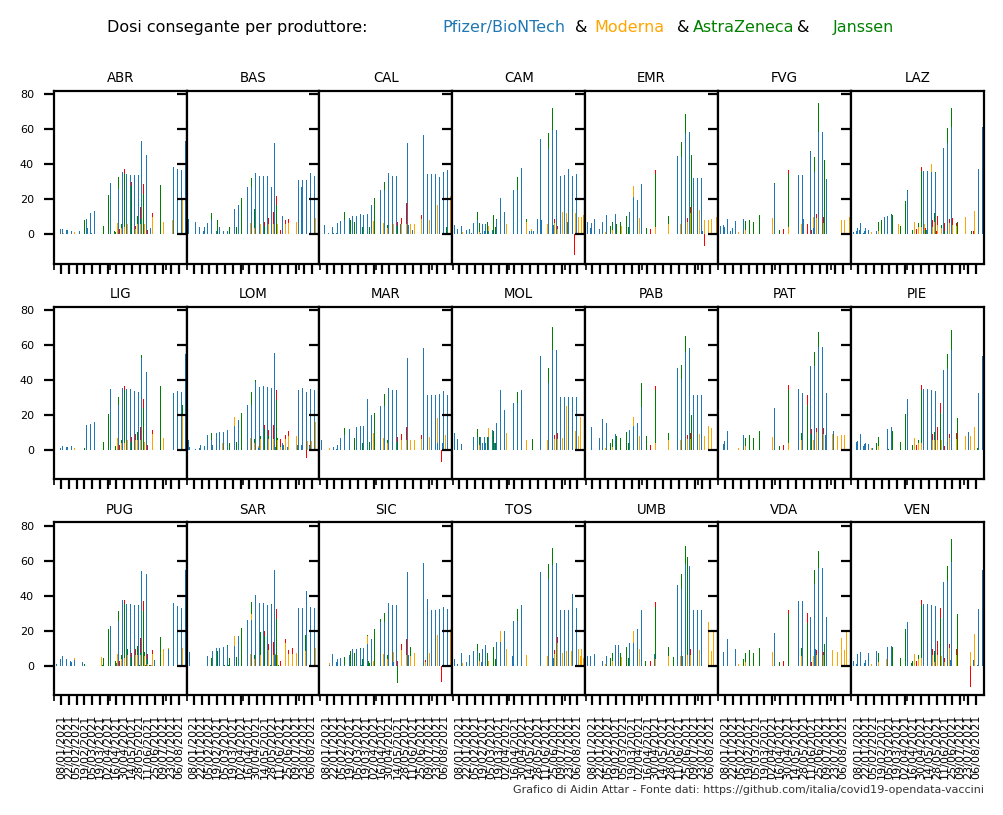

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'

consabr[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[0,0], kind = 'bar', legend = False, xlabel = '', title = "ABR", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
consbas[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[0,1], kind = 'bar', legend = False, xlabel = '', title = "BAS", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
conscal[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[0,2], kind = 'bar', legend = False, xlabel = '', title = "CAL", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
conscam[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[0,3], kind = 'bar', legend = False, xlabel = '', title = "CAM", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
consemr[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[0,4], kind = 'bar', legend = False, xlabel = '', title = "EMR", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
consfvg[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[0,5], kind = 'bar', legend = False, xlabel = '', title = "FVG", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
conslaz[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[0,6], kind = 'bar', legend = False, xlabel = '', title = "LAZ", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
conslig[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[1,0], kind = 'bar', legend = False, xlabel = '', title = "LIG", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
conslom[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[1,1], kind = 'bar', legend = False, xlabel = '', title = "LOM", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
consmar[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[1,2], kind = 'bar', legend = False, xlabel = '', title = "MAR", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
consmol[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[1,3], kind = 'bar', legend = False, xlabel = '', title = "MOL", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
conspab[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[1,4], kind = 'bar', legend = False, xlabel = '', title = "PAB", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
conspat[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[1,5], kind = 'bar', legend = False, xlabel = '', title = "PAT", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
conspie[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[1,6], kind = 'bar', legend = False, xlabel = '', title = "PIE", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
conspug[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[2,0], kind = 'bar', legend = False, xlabel = '', title = "PUG", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
conssar[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[2,1], kind = 'bar', legend = False, xlabel = '', title = "SAR", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
conssic[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[2,2], kind = 'bar', legend = False, xlabel = '', title = "SIC", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
constos[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[2,3], kind = 'bar', legend = False, xlabel = '', title = "TOS", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
consumb[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[2,4], kind = 'bar', legend = False, xlabel = '', title = "UMB", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
consvda[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[2,5], kind = 'bar', legend = False, xlabel = '', title = "VDA", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)
consven[['per_1000_Pfizer', 'per_1000_Moderna', 'per_1000_AstraZeneca',  'per_1000_Janssen']].plot(ax=axes[2,6], kind = 'bar', legend = False, xlabel = '', title = "VEN", color=['C0', 'orange', 'green','red'], stacked = True, width = 1)



plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))



axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

fig.text(0.28, 0.95, "Dosi consegante per produttore: ", ha="center", va="bottom", size="x-large")
fig.text(0.5, 0.95, "Pfizer/BioNTech", ha="center", va="bottom", size="x-large",color="C0")
fig.text(0.565, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.605,0.95,"Moderna", ha="center", va="bottom", size="x-large",color="orange")
fig.text(0.65, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.7,0.95,"AstraZeneca", ha="center", va="bottom", size="x-large",color="green")
fig.text(0.75, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.8,0.95,"Janssen", ha="center", va="bottom", size="x-large",color="green")
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

plt.savefig('Regioni_Cons_1000.png', dpi=300)


In [ ]:
lig

area  totale  sesso_maschile  sesso_femminile  prima_dose  \
27/12/2020  LIG     135              56               79         134   
28/12/2020  LIG      80              30               50          80   
29/12/2020  LIG     125              33               92         125   
30/12/2020  LIG      12               5                7          12   
31/12/2020  LIG     990             353              637         990   
...         ...     ...             ...              ...         ...   
15/08/2021  LIG    1409             784              625         855   
16/08/2021  LIG    9901            5120             4781        3783   
17/08/2021  LIG    9826            5159             4667        3653   
18/08/2021  LIG   12105            6535             5570        4206   
19/08/2021  LIG    9717            5128             4589        2710   

            seconda_dose  pregressa_infezione codice_NUTS1 codice_NUTS2  \
27/12/2020             0                    1          ITC         ITC3   
28/12/2020             0                    0          ITC         ITC3   
29/12/2020             0                    0          ITC         ITC3   
30/12/2020             0                    0          ITC         ITC3   
31/12/2020             0                    0          ITC         ITC3   
...                  ...                  ...          ...          ...   
15/08/2021           528                   26          ITC         ITC3   
16/08/2021          6038                   80          ITC         ITC3   
17/08/2021          6104                   69          ITC         ITC3   
18/08/2021          7799                  100          ITC         ITC3   
19/08/2021          6940                   67          ITC         ITC3   

            codice_regione_ISTAT nome_area  per_1000  prima_1000  \
27/12/2020                     7   Liguria  0.087041    0.086396   
28/12/2020                     7   Liguria  0.051580    0.051580   
29/12/2020                     7   Liguria  0.080593    0.080593   
30/12/2020                     7   Liguria  0.007737    0.007737   
31/12/2020                     7   Liguria  0.638298    0.638298   
...                          ...       ...       ...         ...   
15/08/2021                     7   Liguria  0.908446    0.551257   
16/08/2021                     7   Liguria  6.383623    2.439072   
17/08/2021                     7   Liguria  6.335268    2.355255   
18/08/2021                     7   Liguria  7.804642    2.711799   
19/08/2021                     7   Liguria  6.264990    1.747260   

            seconda_1000  cumulativa  cumulativa_prima  cumulativa_seconda  \
27/12/2020      0.000000         135               134                   0   
28/12/2020      0.000000         215               214                   0   
29/12/2020      0.000000         340               339                   0   
30/12/2020      0.000000         352               351                   0   
31/12/2020      0.000000        1342              1341                   0   
...                  ...         ...               ...                 ...   
15/08/2021      0.340426     1876912           1025421              840580   
16/08/2021      3.892972     1886813           1029204              846618   
17/08/2021      3.935525     1896639           1032857              852722   
18/08/2021      5.028369     1908744           1037063              860521   
19/08/2021      4.474533     1918461           1039773              867461   

            cumulativa_1000  cumulativa_prima_1000  cumulativa_seconda_1000  
27/12/2020         0.087041               0.086396                 0.000000  
28/12/2020         0.138620               0.137975                 0.000000  
29/12/2020         0.219213               0.218569                 0.000000  
30/12/2020         0.226950               0.226306                 0.000000  
31/12/2020         0.865248               0.864603                 0.000000  
...                    

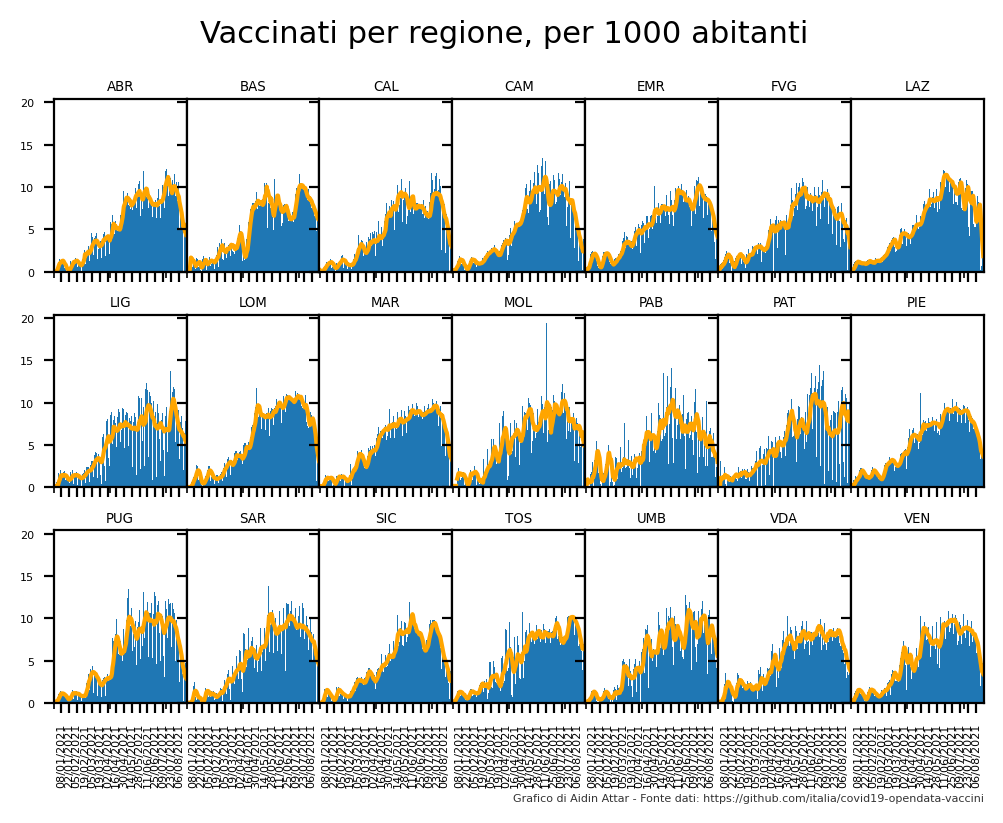

In [ ]:
emr['avg_1000'] = emr['per_1000'].rolling(window=7, min_periods=1).mean()
abr['avg_1000'] = abr['per_1000'].rolling(window=7, min_periods=1).mean()
bas['avg_1000'] = bas['per_1000'].rolling(window=7, min_periods=1).mean()
cal['avg_1000'] = cal['per_1000'].rolling(window=7, min_periods=1).mean()
cam['avg_1000'] = cam['per_1000'].rolling(window=7, min_periods=1).mean()
fvg['avg_1000'] = fvg['per_1000'].rolling(window=7, min_periods=1).mean()
laz['avg_1000'] = laz['per_1000'].rolling(window=7, min_periods=1).mean()
lig['avg_1000'] = lig['per_1000'].rolling(window=7, min_periods=1).mean()
lom['avg_1000'] = lom['per_1000'].rolling(window=7, min_periods=1).mean()
mar['avg_1000'] = mar['per_1000'].rolling(window=7, min_periods=1).mean()
mol['avg_1000'] = mol['per_1000'].rolling(window=7, min_periods=1).mean()
pab['avg_1000'] = pab['per_1000'].rolling(window=7, min_periods=1).mean()
pat['avg_1000'] = pat['per_1000'].rolling(window=7, min_periods=1).mean()
pie['avg_1000'] = pie['per_1000'].rolling(window=7, min_periods=1).mean()
pug['avg_1000'] = pug['per_1000'].rolling(window=7, min_periods=1).mean()
sar['avg_1000'] = sar['per_1000'].rolling(window=7, min_periods=1).mean()
sic['avg_1000'] = sic['per_1000'].rolling(window=7, min_periods=1).mean()
tos['avg_1000'] = tos['per_1000'].rolling(window=7, min_periods=1).mean()
umb['avg_1000'] = umb['per_1000'].rolling(window=7, min_periods=1).mean()
vda['avg_1000'] = vda['per_1000'].rolling(window=7, min_periods=1).mean()
ven['avg_1000'] = ven['per_1000'].rolling(window=7, min_periods=1).mean()

emr['avg_prima_1000'] = emr['prima_1000'].rolling(window=7, min_periods=1).mean()
abr['avg_prima_1000'] = abr['prima_1000'].rolling(window=7, min_periods=1).mean()
bas['avg_prima_1000'] = bas['prima_1000'].rolling(window=7, min_periods=1).mean()
cal['avg_prima_1000'] = cal['prima_1000'].rolling(window=7, min_periods=1).mean()
cam['avg_prima_1000'] = cam['prima_1000'].rolling(window=7, min_periods=1).mean()
fvg['avg_prima_1000'] = fvg['prima_1000'].rolling(window=7, min_periods=1).mean()
laz['avg_prima_1000'] = laz['prima_1000'].rolling(window=7, min_periods=1).mean()
lig['avg_prima_1000'] = lig['prima_1000'].rolling(window=7, min_periods=1).mean()
lom['avg_prima_1000'] = lom['prima_1000'].rolling(window=7, min_periods=1).mean()
mar['avg_prima_1000'] = mar['prima_1000'].rolling(window=7, min_periods=1).mean()
mol['avg_prima_1000'] = mol['prima_1000'].rolling(window=7, min_periods=1).mean()
pab['avg_prima_1000'] = pab['prima_1000'].rolling(window=7, min_periods=1).mean()
pat['avg_prima_1000'] = pat['prima_1000'].rolling(window=7, min_periods=1).mean()
pie['avg_prima_1000'] = pie['prima_1000'].rolling(window=7, min_periods=1).mean()
pug['avg_prima_1000'] = pug['prima_1000'].rolling(window=7, min_periods=1).mean()
sar['avg_prima_1000'] = sar['prima_1000'].rolling(window=7, min_periods=1).mean()
sic['avg_prima_1000'] = sic['prima_1000'].rolling(window=7, min_periods=1).mean()
tos['avg_prima_1000'] = tos['prima_1000'].rolling(window=7, min_periods=1).mean()
umb['avg_prima_1000'] = umb['prima_1000'].rolling(window=7, min_periods=1).mean()
vda['avg_prima_1000'] = vda['prima_1000'].rolling(window=7, min_periods=1).mean()
ven['avg_prima_1000'] = ven['prima_1000'].rolling(window=7, min_periods=1).mean()

emr['avg_seconda_1000'] = emr['seconda_1000'].rolling(window=7, min_periods=1).mean()
abr['avg_seconda_1000'] = abr['seconda_1000'].rolling(window=7, min_periods=1).mean()
bas['avg_seconda_1000'] = bas['seconda_1000'].rolling(window=7, min_periods=1).mean()
cal['avg_seconda_1000'] = cal['seconda_1000'].rolling(window=7, min_periods=1).mean()
cam['avg_seconda_1000'] = cam['seconda_1000'].rolling(window=7, min_periods=1).mean()
fvg['avg_seconda_1000'] = fvg['seconda_1000'].rolling(window=7, min_periods=1).mean()
laz['avg_seconda_1000'] = laz['seconda_1000'].rolling(window=7, min_periods=1).mean()
lig['avg_seconda_1000'] = lig['seconda_1000'].rolling(window=7, min_periods=1).mean()
lom['avg_seconda_1000'] = lom['seconda_1000'].rolling(window=7, min_periods=1).mean()
mar['avg_seconda_1000'] = mar['seconda_1000'].rolling(window=7, min_periods=1).mean()
mol['avg_seconda_1000'] = mol['seconda_1000'].rolling(window=7, min_periods=1).mean()
pab['avg_seconda_1000'] = pab['seconda_1000'].rolling(window=7, min_periods=1).mean()
pat['avg_seconda_1000'] = pat['seconda_1000'].rolling(window=7, min_periods=1).mean()
pie['avg_seconda_1000'] = pie['seconda_1000'].rolling(window=7, min_periods=1).mean()
pug['avg_seconda_1000'] = pug['seconda_1000'].rolling(window=7, min_periods=1).mean()
sar['avg_seconda_1000'] = sar['seconda_1000'].rolling(window=7, min_periods=1).mean()
sic['avg_seconda_1000'] = sic['seconda_1000'].rolling(window=7, min_periods=1).mean()
tos['avg_seconda_1000'] = tos['seconda_1000'].rolling(window=7, min_periods=1).mean()
umb['avg_seconda_1000'] = umb['seconda_1000'].rolling(window=7, min_periods=1).mean()
vda['avg_seconda_1000'] = vda['seconda_1000'].rolling(window=7, min_periods=1).mean()
ven['avg_seconda_1000'] = ven['seconda_1000'].rolling(window=7, min_periods=1).mean()

fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})


abr.plot(ax=axes[0,0], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "ABR"    , width = 1)
abr.plot(ax=axes[0,0], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
bas.plot(ax=axes[0,1], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "BAS"    , width = 1)
bas.plot(ax=axes[0,1], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
cal.plot(ax=axes[0,2], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "CAL"    , width = 1)
cal.plot(ax=axes[0,2], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
cam.plot(ax=axes[0,3], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "CAM"    , width = 1)
cam.plot(ax=axes[0,3], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
emr.plot(ax=axes[0,4], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "EMR"    , width = 1)
emr.plot(ax=axes[0,4], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
fvg.plot(ax=axes[0,5], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "FVG"    , width = 1)
fvg.plot(ax=axes[0,5], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
laz.plot(ax=axes[0,6], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "LAZ"    , width = 1)
laz.plot(ax=axes[0,6], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
lig.plot(ax=axes[1,0], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "LIG"    , width = 1)
lig.plot(ax=axes[1,0], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
lom.plot(ax=axes[1,1], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "LOM"    , width = 1)
lom.plot(ax=axes[1,1], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
mar.plot(ax=axes[1,2], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "MAR"    , width = 1)
mar.plot(ax=axes[1,2], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
mol.plot(ax=axes[1,3], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "MOL"    , width = 1)
mol.plot(ax=axes[1,3], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
pab.plot(ax=axes[1,4], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "PAB"    , width = 1)
pab.plot(ax=axes[1,4], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
pat.plot(ax=axes[1,5], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "PAT"    , width = 1)
pat.plot(ax=axes[1,5], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
pie.plot(ax=axes[1,6], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "PIE"    , width = 1)
pie.plot(ax=axes[1,6], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
pug.plot(ax=axes[2,0], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "PUG"    , width = 1)
pug.plot(ax=axes[2,0], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
sar.plot(ax=axes[2,1], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "SAR"    , width = 1)
sar.plot(ax=axes[2,1], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
sic.plot(ax=axes[2,2], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "SIC"    , width = 1)
sic.plot(ax=axes[2,2], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
tos.plot(ax=axes[2,3], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "TOS"    , width = 1)
tos.plot(ax=axes[2,3], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
umb.plot(ax=axes[2,4], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "UMB"    , width = 1)
umb.plot(ax=axes[2,4], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
vda.plot(ax=axes[2,5], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "VDA"    , width = 1)
vda.plot(ax=axes[2,5], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
ven.plot(ax=axes[2,6], y='per_1000', kind = 'bar',  legend = False, xlabel = '', title = "VEN"    , width = 1)
ven.plot(ax=axes[2,6], y='avg_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )



axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.setp(axes[2,0].get_xticklabels(), rotation=90)
plt.setp(axes[2,1].get_xticklabels(), rotation=90)
plt.setp(axes[2,2].get_xticklabels(), rotation=90)
plt.setp(axes[2,3].get_xticklabels(), rotation=90)
plt.setp(axes[2,4].get_xticklabels(), rotation=90)
plt.setp(axes[2,5].get_xticklabels(), rotation=90)
plt.setp(axes[2,6].get_xticklabels(), rotation=90)



axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

fig.suptitle("Vaccinati per regione, per 1000 abitanti", fontsize=11)
plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

plt.savefig('Regioni_Giorn_1000.png', dpi=300)
plt.show()

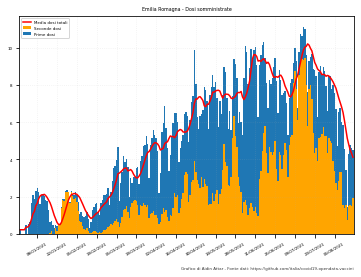

In [ ]:
plt.figure()
ax = plt.gca()

legend = ['Media dosi totali', 'Seconde dosi',  'Prime dosi', ]
colors = ['orange', 'C0']
emr[[ 'seconda_1000','prima_1000']].plot.bar(stacked = True, 
                                             mark_right=True,
                                             title='Emilia Romagna - Dosi somministrate',
                                             xlabel = '',
                                             ax = ax, width = 1,
                                             color = colors)
emr.plot( y='avg_1000',    kind = 'line', color = 'red', ax = ax, xlabel = '', )
plt.legend(legend, loc = 'upper left')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')

plt.savefig('Emilia_Giorn_tot.png', dpi=300)

In [ ]:

consemr['cumulativa_Pfizer'] = consemr['per_1000_Pfizer'].cumsum()
consven['cumulativa_Pfizer'] = consven['per_1000_Pfizer'].cumsum()
consabr['cumulativa_Pfizer'] = consabr['per_1000_Pfizer'].cumsum()
consbas['cumulativa_Pfizer'] = consbas['per_1000_Pfizer'].cumsum()
conscal['cumulativa_Pfizer'] = conscal['per_1000_Pfizer'].cumsum()
conscam['cumulativa_Pfizer'] = conscam['per_1000_Pfizer'].cumsum()
consfvg['cumulativa_Pfizer'] = consfvg['per_1000_Pfizer'].cumsum()
conslaz['cumulativa_Pfizer'] = conslaz['per_1000_Pfizer'].cumsum()
conslom['cumulativa_Pfizer'] = conslom['per_1000_Pfizer'].cumsum()
consmar['cumulativa_Pfizer'] = consmar['per_1000_Pfizer'].cumsum()
consmol['cumulativa_Pfizer'] = consmol['per_1000_Pfizer'].cumsum()
conspab['cumulativa_Pfizer'] = conspab['per_1000_Pfizer'].cumsum()
conspat['cumulativa_Pfizer'] = conspat['per_1000_Pfizer'].cumsum()
conspie['cumulativa_Pfizer'] = conspie['per_1000_Pfizer'].cumsum()
conspug['cumulativa_Pfizer'] = conspug['per_1000_Pfizer'].cumsum()
conssar['cumulativa_Pfizer'] = conssar['per_1000_Pfizer'].cumsum()
conssic['cumulativa_Pfizer'] = conssic['per_1000_Pfizer'].cumsum()
constos['cumulativa_Pfizer'] = constos['per_1000_Pfizer'].cumsum()
consumb['cumulativa_Pfizer'] = consumb['per_1000_Pfizer'].cumsum()
consvda['cumulativa_Pfizer'] = consvda['per_1000_Pfizer'].cumsum()
conslig['cumulativa_Pfizer'] = conslig['per_1000_Pfizer'].cumsum()

consemr.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
consven.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
consabr.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
consbas.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
conscal.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
conscam.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
conslaz.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
consfvg.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
conslom.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
consmar.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
consmol.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
conspab.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
conspat.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
conspie.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
conspug.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
conssar.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
conssic.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
constos.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
consumb.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
consvda.cumulativa_Pfizer.fillna(method='ffill', inplace = True )
conslig.cumulativa_Pfizer.fillna(method='ffill', inplace = True )


consemr['cumulativa_Moderna'] = consemr['per_1000_Moderna'].cumsum()
consven['cumulativa_Moderna'] = consven['per_1000_Moderna'].cumsum()
consabr['cumulativa_Moderna'] = consabr['per_1000_Moderna'].cumsum()
consbas['cumulativa_Moderna'] = consbas['per_1000_Moderna'].cumsum()
conscal['cumulativa_Moderna'] = conscal['per_1000_Moderna'].cumsum()
conscam['cumulativa_Moderna'] = conscam['per_1000_Moderna'].cumsum()
consfvg['cumulativa_Moderna'] = consfvg['per_1000_Moderna'].cumsum()
conslaz['cumulativa_Moderna'] = conslaz['per_1000_Moderna'].cumsum()
conslom['cumulativa_Moderna'] = conslom['per_1000_Moderna'].cumsum()
consmar['cumulativa_Moderna'] = consmar['per_1000_Moderna'].cumsum()
consmol['cumulativa_Moderna'] = consmol['per_1000_Moderna'].cumsum()
conspab['cumulativa_Moderna'] = conspab['per_1000_Moderna'].cumsum()
conspat['cumulativa_Moderna'] = conspat['per_1000_Moderna'].cumsum()
conspie['cumulativa_Moderna'] = conspie['per_1000_Moderna'].cumsum()
conspug['cumulativa_Moderna'] = conspug['per_1000_Moderna'].cumsum()
conssar['cumulativa_Moderna'] = conssar['per_1000_Moderna'].cumsum()
conssic['cumulativa_Moderna'] = conssic['per_1000_Moderna'].cumsum()
constos['cumulativa_Moderna'] = constos['per_1000_Moderna'].cumsum()
consumb['cumulativa_Moderna'] = consumb['per_1000_Moderna'].cumsum()
consvda['cumulativa_Moderna'] = consvda['per_1000_Moderna'].cumsum()
conslig['cumulativa_Moderna'] = conslig['per_1000_Moderna'].cumsum()

consemr.cumulativa_Moderna.fillna(method='ffill', inplace = True )
consven.cumulativa_Moderna.fillna(method='ffill', inplace = True )
consabr.cumulativa_Moderna.fillna(method='ffill', inplace = True )
consbas.cumulativa_Moderna.fillna(method='ffill', inplace = True )
conscal.cumulativa_Moderna.fillna(method='ffill', inplace = True )
conscam.cumulativa_Moderna.fillna(method='ffill', inplace = True )
conslaz.cumulativa_Moderna.fillna(method='ffill', inplace = True )
consfvg.cumulativa_Moderna.fillna(method='ffill', inplace = True )
conslom.cumulativa_Moderna.fillna(method='ffill', inplace = True )
consmar.cumulativa_Moderna.fillna(method='ffill', inplace = True )
consmol.cumulativa_Moderna.fillna(method='ffill', inplace = True )
conspab.cumulativa_Moderna.fillna(method='ffill', inplace = True )
conspat.cumulativa_Moderna.fillna(method='ffill', inplace = True )
conspie.cumulativa_Moderna.fillna(method='ffill', inplace = True )
conspug.cumulativa_Moderna.fillna(method='ffill', inplace = True )
conssar.cumulativa_Moderna.fillna(method='ffill', inplace = True )
conssic.cumulativa_Moderna.fillna(method='ffill', inplace = True )
constos.cumulativa_Moderna.fillna(method='ffill', inplace = True )
consumb.cumulativa_Moderna.fillna(method='ffill', inplace = True )
consvda.cumulativa_Moderna.fillna(method='ffill', inplace = True )
conslig.cumulativa_Moderna.fillna(method='ffill', inplace = True )


consemr['cumulativa_AstraZeneca'] = consemr['per_1000_AstraZeneca'].cumsum()
consven['cumulativa_AstraZeneca'] = consven['per_1000_AstraZeneca'].cumsum()
consabr['cumulativa_AstraZeneca'] = consabr['per_1000_AstraZeneca'].cumsum()
consbas['cumulativa_AstraZeneca'] = consbas['per_1000_AstraZeneca'].cumsum()
conscal['cumulativa_AstraZeneca'] = conscal['per_1000_AstraZeneca'].cumsum()
conscam['cumulativa_AstraZeneca'] = conscam['per_1000_AstraZeneca'].cumsum()
consfvg['cumulativa_AstraZeneca'] = consfvg['per_1000_AstraZeneca'].cumsum()
conslaz['cumulativa_AstraZeneca'] = conslaz['per_1000_AstraZeneca'].cumsum()
conslom['cumulativa_AstraZeneca'] = conslom['per_1000_AstraZeneca'].cumsum()
consmar['cumulativa_AstraZeneca'] = consmar['per_1000_AstraZeneca'].cumsum()
consmol['cumulativa_AstraZeneca'] = consmol['per_1000_AstraZeneca'].cumsum()
conspab['cumulativa_AstraZeneca'] = conspab['per_1000_AstraZeneca'].cumsum()
conspat['cumulativa_AstraZeneca'] = conspat['per_1000_AstraZeneca'].cumsum()
conspie['cumulativa_AstraZeneca'] = conspie['per_1000_AstraZeneca'].cumsum()
conspug['cumulativa_AstraZeneca'] = conspug['per_1000_AstraZeneca'].cumsum()
conssar['cumulativa_AstraZeneca'] = conssar['per_1000_AstraZeneca'].cumsum()
conssic['cumulativa_AstraZeneca'] = conssic['per_1000_AstraZeneca'].cumsum()
constos['cumulativa_AstraZeneca'] = constos['per_1000_AstraZeneca'].cumsum()
consumb['cumulativa_AstraZeneca'] = consumb['per_1000_AstraZeneca'].cumsum()
consvda['cumulativa_AstraZeneca'] = consvda['per_1000_AstraZeneca'].cumsum()
conslig['cumulativa_AstraZeneca'] = conslig['per_1000_AstraZeneca'].cumsum()

consemr.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
consven.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
consabr.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
consbas.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
conscal.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
conscam.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
conslaz.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
consfvg.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
conslom.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
consmar.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
consmol.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
conspab.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
conspat.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
conspie.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
conspug.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
conssar.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
conssic.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
constos.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
consumb.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
consvda.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )
conslig.cumulativa_AstraZeneca.fillna(method='ffill', inplace = True )

consemr['cumulativa_Janssen'] = consemr['per_1000_Janssen'].cumsum()
consven['cumulativa_Janssen'] = consven['per_1000_Janssen'].cumsum()
consabr['cumulativa_Janssen'] = consabr['per_1000_Janssen'].cumsum()
consbas['cumulativa_Janssen'] = consbas['per_1000_Janssen'].cumsum()
conscal['cumulativa_Janssen'] = conscal['per_1000_Janssen'].cumsum()
conscam['cumulativa_Janssen'] = conscam['per_1000_Janssen'].cumsum()
consfvg['cumulativa_Janssen'] = consfvg['per_1000_Janssen'].cumsum()
conslaz['cumulativa_Janssen'] = conslaz['per_1000_Janssen'].cumsum()
conslom['cumulativa_Janssen'] = conslom['per_1000_Janssen'].cumsum()
consmar['cumulativa_Janssen'] = consmar['per_1000_Janssen'].cumsum()
consmol['cumulativa_Janssen'] = consmol['per_1000_Janssen'].cumsum()
conspab['cumulativa_Janssen'] = conspab['per_1000_Janssen'].cumsum()
conspat['cumulativa_Janssen'] = conspat['per_1000_Janssen'].cumsum()
conspie['cumulativa_Janssen'] = conspie['per_1000_Janssen'].cumsum()
conspug['cumulativa_Janssen'] = conspug['per_1000_Janssen'].cumsum()
conssar['cumulativa_Janssen'] = conssar['per_1000_Janssen'].cumsum()
conssic['cumulativa_Janssen'] = conssic['per_1000_Janssen'].cumsum()
constos['cumulativa_Janssen'] = constos['per_1000_Janssen'].cumsum()
consumb['cumulativa_Janssen'] = consumb['per_1000_Janssen'].cumsum()
consvda['cumulativa_Janssen'] = consvda['per_1000_Janssen'].cumsum()
conslig['cumulativa_Janssen'] = conslig['per_1000_Janssen'].cumsum()

consemr.cumulativa_Janssen.fillna(method='ffill', inplace = True )
consven.cumulativa_Janssen.fillna(method='ffill', inplace = True )
consabr.cumulativa_Janssen.fillna(method='ffill', inplace = True )
consbas.cumulativa_Janssen.fillna(method='ffill', inplace = True )
conscal.cumulativa_Janssen.fillna(method='ffill', inplace = True )
conscam.cumulativa_Janssen.fillna(method='ffill', inplace = True )
conslaz.cumulativa_Janssen.fillna(method='ffill', inplace = True )
consfvg.cumulativa_Janssen.fillna(method='ffill', inplace = True )
conslom.cumulativa_Janssen.fillna(method='ffill', inplace = True )
consmar.cumulativa_Janssen.fillna(method='ffill', inplace = True )
consmol.cumulativa_Janssen.fillna(method='ffill', inplace = True )
conspab.cumulativa_Janssen.fillna(method='ffill', inplace = True )
conspat.cumulativa_Janssen.fillna(method='ffill', inplace = True )
conspie.cumulativa_Janssen.fillna(method='ffill', inplace = True )
conspug.cumulativa_Janssen.fillna(method='ffill', inplace = True )
conssar.cumulativa_Janssen.fillna(method='ffill', inplace = True )
conssic.cumulativa_Janssen.fillna(method='ffill', inplace = True )
constos.cumulativa_Janssen.fillna(method='ffill', inplace = True )
consumb.cumulativa_Janssen.fillna(method='ffill', inplace = True )
consvda.cumulativa_Janssen.fillna(method='ffill', inplace = True )
conslig.cumulativa_Janssen.fillna(method='ffill', inplace = True )

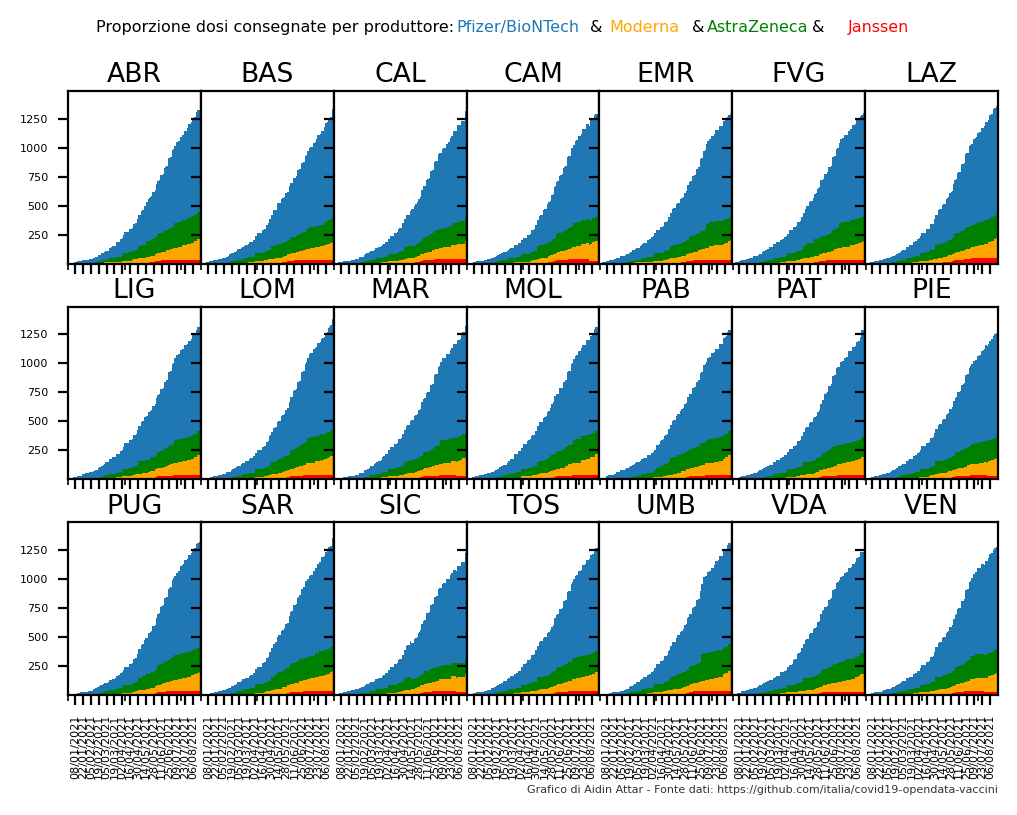

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})


consabr[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[0,0], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "ABR", color=['red','orange', 'green','C0'], width = 1)
consbas[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[0,1], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "BAS", color=['red','orange', 'green','C0'], width = 1)
conscal[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[0,2], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "CAL", color=['red','orange', 'green','C0'], width = 1)
conscam[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[0,3], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "CAM", color=['red','orange', 'green','C0'], width = 1)
consemr[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[0,4], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "EMR", color=['red','orange', 'green','C0'], width = 1)
consfvg[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[0,5], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "FVG", color=['red','orange', 'green','C0'], width = 1)
conslaz[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[0,6], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "LAZ", color=['red','orange', 'green','C0'], width = 1)
conslig[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[1,0], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "LIG", color=['red','orange', 'green','C0'], width = 1)
conslom[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[1,1], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "LOM", color=['red','orange', 'green','C0'], width = 1)
consmar[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[1,2], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "MAR", color=['red','orange', 'green','C0'], width = 1)
consmol[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[1,3], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "MOL", color=['red','orange', 'green','C0'], width = 1)
conspab[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[1,4], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "PAB", color=['red','orange', 'green','C0'], width = 1)
conspat[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[1,5], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "PAT", color=['red','orange', 'green','C0'], width = 1)
conspie[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[1,6], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "PIE", color=['red','orange', 'green','C0'], width = 1)
conspug[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[2,0], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "PUG", color=['red','orange', 'green','C0'], width = 1)
conssar[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[2,1], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "SAR", color=['red','orange', 'green','C0'], width = 1)
conssic[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[2,2], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "SIC", color=['red','orange', 'green','C0'], width = 1)
constos[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[2,3], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "TOS", color=['red','orange', 'green','C0'], width = 1)
consumb[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[2,4], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "UMB", color=['red','orange', 'green','C0'], width = 1)
consvda[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[2,5], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "VDA", color=['red','orange', 'green','C0'], width = 1)
consven[[  'cumulativa_Janssen','cumulativa_Moderna', 'cumulativa_AstraZeneca','cumulativa_Pfizer']].plot(ax=axes[2,6], stacked=True, kind = 'bar', legend = False, xlabel = '', title = "VEN", color=['red','orange', 'green','C0'], width = 1)



axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

#watermark2()

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
#fig.suptitle("Dosi disponibili per regione per 1000 abitanti", fontsize=10)
fig.text(0.3, 0.95, "Proporzione dosi consegnate per produttore: ", ha="center", va="bottom", size="x-large")
fig.text(0.5, 0.95, "Pfizer/BioNTech", ha="center", va="bottom", size="x-large",color="C0")
fig.text(0.565, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.605,0.95,"Moderna", ha="center", va="bottom", size="x-large",color="orange")
fig.text(0.65, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.7,0.95,"AstraZeneca", ha="center", va="bottom", size="x-large",color="green")
fig.text(0.75, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.8,0.95,"Janssen", ha="center", va="bottom", size="x-large",color="red")

plt.savefig('Regioni_Cons_Tot.png', dpi=300)


In [ ]:
cols = consemr.columns.difference(emr.columns)
consemr[cols]

cols = consven.columns.difference(ven.columns)
consven[cols]

cols = consvda.columns.difference(vda.columns)
consvda[cols]

cols = consumb.columns.difference(umb.columns)
consumb[cols]

cols = constos.columns.difference(tos.columns)
constos[cols]

cols = conssar.columns.difference(sar.columns)
conssar[cols]

cols = conssic.columns.difference(sic.columns)
conssic[cols]

cols = conspug.columns.difference(pug.columns)
conspug[cols]

cols = conspie.columns.difference(pie.columns)
conspie[cols]

cols = conspat.columns.difference(pat.columns)
conspat[cols]

cols = conspab.columns.difference(pab.columns)
conspab[cols]

cols = consmol.columns.difference(mol.columns)
consmol[cols]

cols = consmar.columns.difference(mar.columns)
consmar[cols]

cols = conslom.columns.difference(lom.columns)
conslom[cols]

cols = conslig.columns.difference(lig.columns)
conslig[cols]

cols = conslaz.columns.difference(laz.columns)
conslaz[cols]

cols = consfvg.columns.difference(fvg.columns)
consfvg[cols]

cols = conscam.columns.difference(cam.columns)
conscam[cols]

cols = conscal.columns.difference(cal.columns)
conscal[cols]

cols = consbas.columns.difference(bas.columns)
consbas[cols]

cols = consabr.columns.difference(abr.columns)
consabr[cols]


emr = pd.concat([emr, consemr[cols]], axis=1)
emr['cumulativa_dosi'] = consven['numero_dosi'].cumsum()
emr.cumulativa_dosi.fillna(method='ffill', inplace = True )
emr['dosi_rimaste'] = emr['cumulativa_dosi'] - emr['cumulativa']

ven = pd.concat([ven, consven[cols]], axis=1)
ven['cumulativa_dosi'] = consven['numero_dosi'].cumsum()
ven.cumulativa_dosi.fillna(method='ffill', inplace = True )
ven['dosi_rimaste'] = ven['cumulativa_dosi'] - ven['cumulativa']


abr = pd.concat([abr, consabr[cols]], axis=1)
abr['cumulativa_dosi'] = consabr['numero_dosi'].cumsum()
abr.cumulativa_dosi.fillna(method='ffill', inplace = True )
abr['dosi_rimaste'] = abr['cumulativa_dosi'] - abr['cumulativa']

bas = pd.concat([bas, consbas[cols]], axis=1)
bas['cumulativa_dosi'] = consbas['numero_dosi'].cumsum()
bas.cumulativa_dosi.fillna(method='ffill', inplace = True )
bas['dosi_rimaste'] = bas['cumulativa_dosi'] - bas['cumulativa']

cal = pd.concat([cal, conscal[cols]], axis=1)
cal['cumulativa_dosi'] = conscal['numero_dosi'].cumsum()
cal.cumulativa_dosi.fillna(method='ffill', inplace = True )
cal['dosi_rimaste'] = cal['cumulativa_dosi'] - cal['cumulativa']

cam = pd.concat([cam, conscam[cols]], axis=1)
cam['cumulativa_dosi'] = conscam['numero_dosi'].cumsum()
cam.cumulativa_dosi.fillna(method='ffill', inplace = True )
cam['dosi_rimaste'] = cam['cumulativa_dosi'] - cam['cumulativa']

fvg = pd.concat([fvg, consfvg[cols]], axis=1)
fvg['cumulativa_dosi'] = consfvg['numero_dosi'].cumsum()
fvg.cumulativa_dosi.fillna(method='ffill', inplace = True )
fvg['dosi_rimaste'] = fvg['cumulativa_dosi'] - fvg['cumulativa']

laz = pd.concat([laz, conslaz[cols]], axis=1)
laz['cumulativa_dosi'] = conslaz['numero_dosi'].cumsum()
laz.cumulativa_dosi.fillna(method='ffill', inplace = True )
laz['dosi_rimaste'] = laz['cumulativa_dosi'] - laz['cumulativa']


lig = pd.concat([lig, conslig[cols]], axis=1)
lig['cumulativa_dosi'] = conslig['numero_dosi'].cumsum()
lig.cumulativa_dosi.fillna(method='ffill', inplace = True )
lig['dosi_rimaste'] = lig['cumulativa_dosi'] - lig['cumulativa']

lom = pd.concat([lom, conslom[cols]], axis=1)
lom['cumulativa_dosi'] = conslom['numero_dosi'].cumsum()
lom.cumulativa_dosi.fillna(method='ffill', inplace = True )
lom['dosi_rimaste'] = lom['cumulativa_dosi'] - lom['cumulativa']

mar = pd.concat([mar, consmar[cols]], axis=1)
mar['cumulativa_dosi'] = consmar['numero_dosi'].cumsum()
mar.cumulativa_dosi.fillna(method='ffill', inplace = True )
mar['dosi_rimaste'] = mar['cumulativa_dosi'] - mar['cumulativa']

mol = pd.concat([mol, consmol[cols]], axis=1)
mol['cumulativa_dosi'] = consmol['numero_dosi'].cumsum()
mol.cumulativa_dosi.fillna(method='ffill', inplace = True )
mol['dosi_rimaste'] = mol['cumulativa_dosi'] - mol['cumulativa']

pab = pd.concat([pab, conspab[cols]], axis=1)
pab['cumulativa_dosi'] = conspab['numero_dosi'].cumsum()
pab.cumulativa_dosi.fillna(method='ffill', inplace = True )
pab['dosi_rimaste'] = pab['cumulativa_dosi'] - pab['cumulativa']

pat = pd.concat([pat, conspat[cols]], axis=1)
pat['cumulativa_dosi'] = conspat['numero_dosi'].cumsum()
pat.cumulativa_dosi.fillna(method='ffill', inplace = True )
pat['dosi_rimaste'] = pat['cumulativa_dosi'] - pat['cumulativa']

pie = pd.concat([pie, conspie[cols]], axis=1)
pie['cumulativa_dosi'] = conspie['numero_dosi'].cumsum()
pie.cumulativa_dosi.fillna(method='ffill', inplace = True )
pie['dosi_rimaste'] = pie['cumulativa_dosi'] - pie['cumulativa']

pug = pd.concat([pug, conspug[cols]], axis=1)
pug['cumulativa_dosi'] = conspug['numero_dosi'].cumsum()
pug.cumulativa_dosi.fillna(method='ffill', inplace = True )
pug['dosi_rimaste'] = pug['cumulativa_dosi'] - pug['cumulativa']

sar = pd.concat([sar, conssar[cols]], axis=1)
sar['cumulativa_dosi'] = conssar['numero_dosi'].cumsum()
sar.cumulativa_dosi.fillna(method='ffill', inplace = True )
sar['dosi_rimaste'] = sar['cumulativa_dosi'] - sar['cumulativa']

sic = pd.concat([sic, conssic[cols]], axis=1)
sic['cumulativa_dosi'] = conssic['numero_dosi'].cumsum()
sic.cumulativa_dosi.fillna(method='ffill', inplace = True )
sic['dosi_rimaste'] = sic['cumulativa_dosi'] - sic['cumulativa']

tos = pd.concat([tos, constos[cols]], axis=1)
tos['cumulativa_dosi'] = constos['numero_dosi'].cumsum()
tos.cumulativa_dosi.fillna(method='ffill', inplace = True )
tos['dosi_rimaste'] = tos['cumulativa_dosi'] - tos['cumulativa']

umb = pd.concat([umb, consumb[cols]], axis=1)
umb['cumulativa_dosi'] = consumb['numero_dosi'].cumsum()
umb.cumulativa_dosi.fillna(method='ffill', inplace = True )
umb['dosi_rimaste'] = umb['cumulativa_dosi'] - umb['cumulativa']

vda = pd.concat([vda, consvda[cols]], axis=1)
vda['cumulativa_dosi'] = consvda['numero_dosi'].cumsum()
vda.cumulativa_dosi.fillna(method='ffill', inplace = True )
vda['dosi_rimaste'] = vda['cumulativa_dosi'] - vda['cumulativa']


emr.dosi_rimaste.fillna(method='ffill', inplace = True)
vda.dosi_rimaste.fillna(method='ffill', inplace = True)
umb.dosi_rimaste.fillna(method='ffill', inplace = True)
ven.dosi_rimaste.fillna(method='ffill', inplace = True)
sic.dosi_rimaste.fillna(method='ffill', inplace = True)
tos.dosi_rimaste.fillna(method='ffill', inplace = True)
sar.dosi_rimaste.fillna(method='ffill', inplace = True)
sic.dosi_rimaste.fillna(method='ffill', inplace = True)
pug.dosi_rimaste.fillna(method='ffill', inplace = True)
mar.dosi_rimaste.fillna(method='ffill', inplace = True)
mol.dosi_rimaste.fillna(method='ffill', inplace = True)
lom.dosi_rimaste.fillna(method='ffill', inplace = True)
laz.dosi_rimaste.fillna(method='ffill', inplace = True)
lig.dosi_rimaste.fillna(method='ffill', inplace = True)
fvg.dosi_rimaste.fillna(method='ffill', inplace = True)
cam.dosi_rimaste.fillna(method='ffill', inplace = True)
cal.dosi_rimaste.fillna(method='ffill', inplace = True)
pab.dosi_rimaste.fillna(method='ffill', inplace = True)
pat.dosi_rimaste.fillna(method='ffill', inplace = True)
pie.dosi_rimaste.fillna(method='ffill', inplace = True)

In [ ]:

emr['cons_1000']            = emr['numero_dosi'] / 4459
ven['cons_1000']            = ven['numero_dosi'] / 4906
abr['cons_1000']            = abr['numero_dosi'] / 1312
bas['cons_1000']            = bas['numero_dosi'] / 562.869
cal['cons_1000']            = cal['numero_dosi'] / 1947
cam['cons_1000']            = cam['numero_dosi'] / 5802
fvg['cons_1000']            = fvg['numero_dosi'] / 1215
laz['cons_1000']            = laz['numero_dosi'] / 5879
lom['cons_1000']            = lom['numero_dosi'] / 10060
lig['cons_1000']            = lig['numero_dosi'] / 1551
mar['cons_1000']            = mar['numero_dosi'] / 1525
mol['cons_1000']            = mol['numero_dosi'] / 305.617
pab['cons_1000']            = pab['numero_dosi'] / 520.891
pat['cons_1000']            = pat['numero_dosi'] / 538.223
pie['cons_1000']            = pie['numero_dosi'] / 4356
pug['cons_1000']            = pug['numero_dosi'] / 4029
sar['cons_1000']            = sar['numero_dosi'] / 1640
sic['cons_1000']            = sic['numero_dosi'] / 5000
tos['cons_1000']            = tos['numero_dosi'] / 3730
umb['cons_1000']            = umb['numero_dosi'] / 882.015
vda['cons_1000']            = vda['numero_dosi'] / 125.666

emr['cumulativa_dosi_1000'] = emr['cumulativa_dosi'] / 4459
ven['cumulativa_dosi_1000'] = ven['cumulativa_dosi'] / 4906
abr['cumulativa_dosi_1000'] = abr['cumulativa_dosi'] / 1312
bas['cumulativa_dosi_1000'] = bas['cumulativa_dosi'] / 562.869
cal['cumulativa_dosi_1000'] = cal['cumulativa_dosi'] / 1947
cam['cumulativa_dosi_1000'] = cam['cumulativa_dosi'] / 5802
fvg['cumulativa_dosi_1000'] = fvg['cumulativa_dosi'] / 1215
laz['cumulativa_dosi_1000'] = laz['cumulativa_dosi'] / 5879
lom['cumulativa_dosi_1000'] = lom['cumulativa_dosi'] / 10060
lig['cumulativa_dosi_1000'] = lig['cumulativa_dosi'] / 1551
mar['cumulativa_dosi_1000'] = mar['cumulativa_dosi'] / 1525
mol['cumulativa_dosi_1000'] = mol['cumulativa_dosi'] / 305.617
pab['cumulativa_dosi_1000'] = pab['cumulativa_dosi'] / 520.891
pat['cumulativa_dosi_1000'] = pat['cumulativa_dosi'] / 538.223
pie['cumulativa_dosi_1000'] = pie['cumulativa_dosi'] / 4356
pug['cumulativa_dosi_1000'] = pug['cumulativa_dosi'] / 4029
sar['cumulativa_dosi_1000'] = sar['cumulativa_dosi'] / 1640
sic['cumulativa_dosi_1000'] = sic['cumulativa_dosi'] / 5000
tos['cumulativa_dosi_1000'] = tos['cumulativa_dosi'] / 3730
umb['cumulativa_dosi_1000'] = umb['cumulativa_dosi'] / 882.015
vda['cumulativa_dosi_1000'] = vda['cumulativa_dosi'] / 125.666

emr['dosi_rimaste_1000']    = emr['dosi_rimaste'] / 4459
ven['dosi_rimaste_1000']    = ven['dosi_rimaste'] / 4906
abr['dosi_rimaste_1000']    = abr['dosi_rimaste'] / 1312
cal['dosi_rimaste_1000']    = cal['dosi_rimaste'] / 1947
cam['dosi_rimaste_1000']    = cam['dosi_rimaste'] / 5802
fvg['dosi_rimaste_1000']    = fvg['dosi_rimaste'] / 1215
laz['dosi_rimaste_1000']    = laz['dosi_rimaste'] / 5879
lom['dosi_rimaste_1000']    = lom['dosi_rimaste'] / 10060
lig['dosi_rimaste_1000']    = lig['dosi_rimaste'] / 1551
mar['dosi_rimaste_1000']    = mar['dosi_rimaste'] / 1525
pie['dosi_rimaste_1000']    = pie['dosi_rimaste'] / 4356
pug['dosi_rimaste_1000']    = pug['dosi_rimaste'] / 4029
sar['dosi_rimaste_1000']    = sar['dosi_rimaste'] / 1640
sic['dosi_rimaste_1000']    = sic['dosi_rimaste'] / 5000
tos['dosi_rimaste_1000']    = tos['dosi_rimaste'] / 3730
bas['dosi_rimaste_1000']    = bas['dosi_rimaste'] / 562.869
mol['dosi_rimaste_1000']    = mol['dosi_rimaste'] / 305.617
pab['dosi_rimaste_1000']    = pab['dosi_rimaste'] / 520.891
pat['dosi_rimaste_1000']    = pat['dosi_rimaste'] / 538.223
umb['dosi_rimaste_1000']    = umb['dosi_rimaste'] / 882.015
vda['dosi_rimaste_1000']    = vda['dosi_rimaste'] / 125.666

#emr.to_csv('emr.csv')
#cons

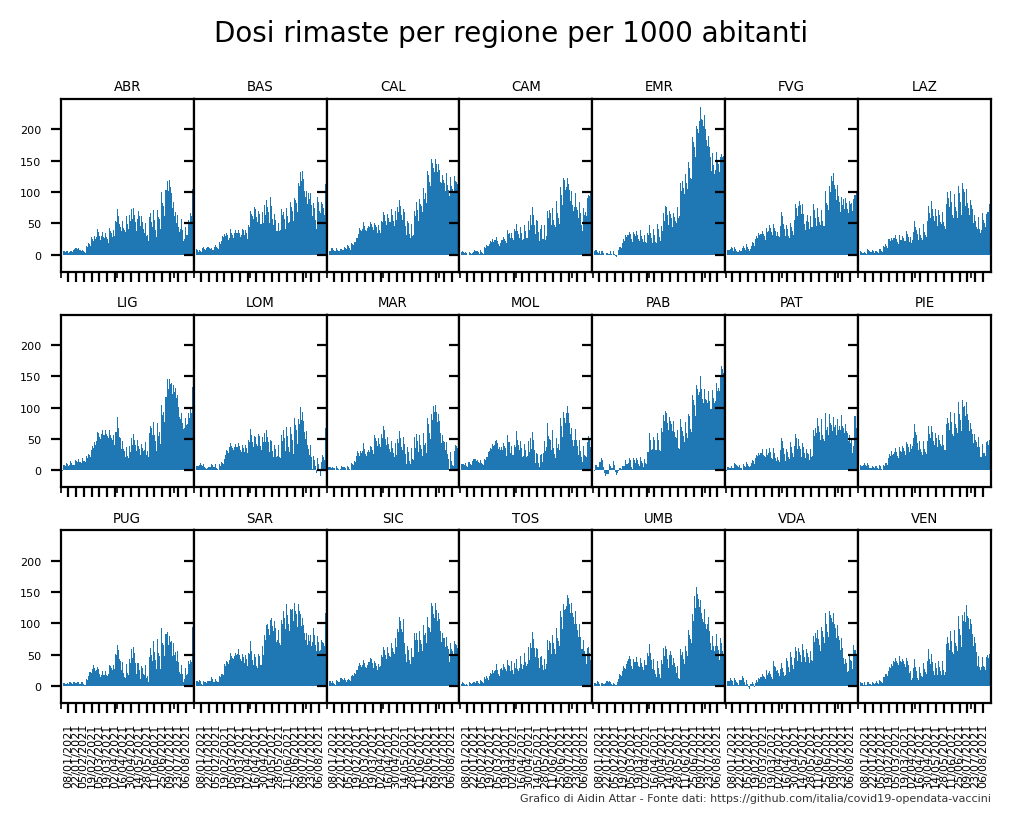

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})

abr.plot(ax=axes[0,0], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "ABR", width = 1)
bas.plot(ax=axes[0,1], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "BAS", width = 1)
cal.plot(ax=axes[0,2], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "CAL", width = 1)
cam.plot(ax=axes[0,3], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "CAM", width = 1)
emr.plot(ax=axes[0,4], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "EMR", width = 1)
fvg.plot(ax=axes[0,5], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "FVG", width = 1)
laz.plot(ax=axes[0,6], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "LAZ", width = 1)
lig.plot(ax=axes[1,0], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "LIG", width = 1)
lom.plot(ax=axes[1,1], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "LOM", width = 1)
mar.plot(ax=axes[1,2], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "MAR", width = 1)
mol.plot(ax=axes[1,3], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "MOL", width = 1)
pab.plot(ax=axes[1,4], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "PAB", width = 1)
pat.plot(ax=axes[1,5], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "PAT", width = 1)
pie.plot(ax=axes[1,6], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "PIE", width = 1)
pug.plot(ax=axes[2,0], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "PUG", width = 1)
sar.plot(ax=axes[2,1], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "SAR", width = 1)
sic.plot(ax=axes[2,2], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "SIC", width = 1)
tos.plot(ax=axes[2,3], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "TOS", width = 1)
umb.plot(ax=axes[2,4], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "UMB", width = 1)
vda.plot(ax=axes[2,5], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "VDA", width = 1)
ven.plot(ax=axes[2,6], y='dosi_rimaste_1000', kind = 'bar', legend = False, xlabel = '', title = "VEN", width = 1)



axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))


plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
fig.suptitle("Dosi rimaste per regione per 1000 abitanti", fontsize=10)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

plt.savefig('Regioni_Cons_Rimaste.png', dpi=300)


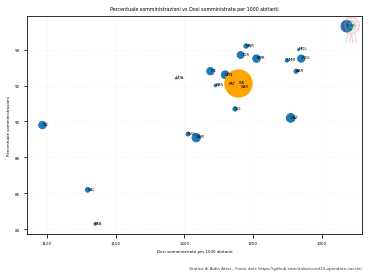

totale  sesso_maschile  sesso_femminile  prima_dose  seconda_dose  \
area                                                                       
ABR    6731.0          3617.0           3114.0      3262.0        3278.0   
BAS    3601.0          1875.0           1726.0      1675.0        1838.0   
CAL    5870.0          2937.0           2933.0      2343.0        3470.0   
CAM   21644.0         11425.0          10219.0      9381.0       11629.0   
EMR   20910.0         11228.0           9682.0     11441.0        8611.0   
FVG    4488.0          2398.0           2090.0      1497.0        2837.0   
LAZ    8835.0          5073.0           3762.0      2734.0        6009.0   
LIG    9717.0          5128.0           4589.0      2710.0        6940.0   
LOM   28585.0         15747.0          12838.0     14772.0       12698.0   
MAR    6274.0          3346.0           2928.0      3494.0        2452.0   
MOL    1938.0           954.0            984.0       571.0        1343.0   
PAB    1350.0           734.0            616.0       809.0         541.0   
PAT    4058.0          2190.0           1868.0      1004.0        2978.0   
PIE   15726.0          8471.0           7255.0     10487.0        4544.0   
PUG   16250.0          8453.0           7797.0      7741.0        7914.0   
SAR   10750.0          5683.0           5067.0      5728.0        4891.0   
SIC   19594.0          9786.0           9808.0     10492.0        8796.0   
TOS   23759.0         12614.0          11145.0     11641.0       11497.0   
UMB    5635.0          2974.0           2661.0      3879.0        1580.0   
VDA     265.0           158.0            107.0        70.0         180.0   
VEN   18358.0          9975.0           8383.0     11212.0        6647.0   

      pregressa_infezione codice_NUTS1_x codice_NUTS2_x  \
area                                                      
ABR                 191.0            ITF           ITF1   
BAS                  88.0            ITF           ITF5   
CAL                  57.0            ITF           ITF6   
CAM                 634.0            ITF           ITF3   
EMR                 858.0            ITH           ITH5   
FVG                 154.0            ITH           ITH4   
LAZ                  92.0            ITI           ITI4   
LIG                  67.0            ITC           ITC3   
LOM                1115.0            ITC           ITC4   
MAR                 328.0            ITI           ITI3   
MOL                  24.0            ITF           ITF2   
PAB                   0.0            ITH           ITH1   
PAT                  76.0            ITH           ITH2   
PIE                 695.0            ITC           ITC1   
PUG                 595.0            ITF           ITF4   
SAR                 131.0            ITG           ITG2   
SIC                 306.0            ITG           ITG1   
TOS                 621.0            ITI           ITI1   
UMB                 176.0            ITI           ITI2   
VDA                  15.0            ITC           ITC2   
VEN                 499.0            ITH           ITH3   

      codice_regione_ISTAT_x                         nome_area_x  ...  \
area                                                              ...   
ABR                     13.0                             Abruzzo  ...   
BAS                     17.0                          Basilicata  ...   
CAL                     18.0                            Calabria  ...   
CAM                     15.0                            Campania  ...   
EMR                      8.0                      Emilia-Romagna  ...   
FVG                      6.0               Friuli-Venezia Giulia  ...   
LAZ                     12.0                               Lazio  ...   
LIG                      7.0                             Liguria  ...   
LOM                      3.0                           Lombardia  ...   
MAR                     11.0                              Marche  ...   
MOL                     

In [ ]:

cum1     = cum.set_index('area')
vaccini1 = vaccini.set_index('area')

total = cum1.merge(vaccini1 , left_index=True, right_index=True, how='right')


total

sum_ = total.reindex(['PAT', 'PAB', 'EMR', 'VEN',
                      'VDA', 'UMB', 'ABR', 'BAS',
                      'SIC', 'SAR', 'CAL', 'CAM',
                      'PUG', 'PIE', 'LOM', 'MOL',
                      'LAZ', 'LIG', 'TOS', 'FVG', 'MAR']).sum().to_frame().transpose()
sum_ = sum_.rename(index={0: 'ITA'})
sum_['per_1000']        = sum_['totale']     / 60360
sum_['cumulativa_1000'] = sum_['cumulativa'] / 60360
sum_['percentuale_somministrazione'] = sum_['dosi_somministrate'] / sum_['dosi_consegnate'] * 100

ax = total.plot.scatter(x='cumulativa_1000', y='percentuale_somministrazione', 
                        alpha=1, title='Percentuale somministrazioni vs Dosi somministrate per 1000 abitanti',
                        color = 'C0', s=total['cumulativa']/100000)
sum_.plot.scatter( ax=ax, x='cumulativa_1000', y='percentuale_somministrazione', 
                        alpha=1, color = 'orange', s=sum_.loc['ITA', 'cumulativa']/100000)

for i, txt in enumerate(total.index):
    ax.annotate(txt, (total.cumulativa_1000.iat[i], total.percentuale_somministrazione.iat[i]))

txt = 'ITA'
ax.annotate(txt, (sum_.cumulativa_1000.ITA, sum_.percentuale_somministrazione.ITA))
    
ax.set(xlabel='Dosi somministrate per 1000 abitanti', ylabel='Percentuale somministrazioni')

watermark2()

plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')


plt.grid(alpha = 0.2, linestyle='dotted')
plt.savefig('Cartes_CumPerc.png', dpi=300)

plt.show()
total

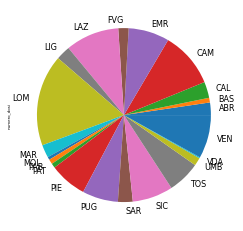

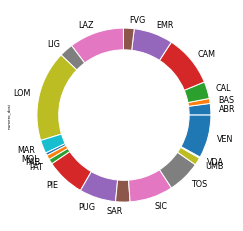

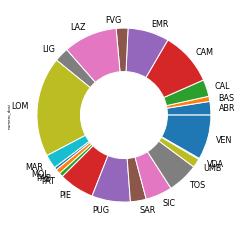

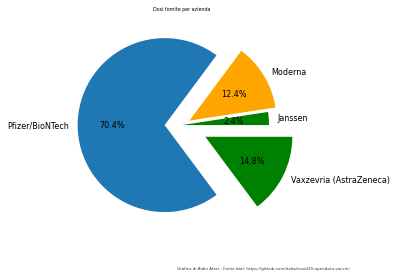

In [ ]:
cons_grouped = cons.groupby(cons.fornitore)
cons_pfizer  = cons_grouped.get_group('Pfizer/BioNTech')
cons_moderna = cons_grouped.get_group('Moderna')
cons_astra   = cons_grouped.get_group('Vaxzevria (AstraZeneca)')

cons_moderna.groupby('area').sum().plot(kind = 'pie', x = 'area', y = 'numero_dosi', legend = False, fontsize = 8)
cons_pfizer.groupby( 'area').sum().plot(kind = 'pie', x = 'area', y = 'numero_dosi', legend = False, fontsize = 8, wedgeprops=dict(width=0.25, edgecolor='w')) 
cons_astra.groupby(  'area').sum().plot(kind = 'pie', x = 'area', y = 'numero_dosi', legend = False, fontsize = 8, wedgeprops=dict(width=0.50, edgecolor='w')) 
cons.groupby('fornitore').sum().plot(kind = 'pie', y = 'numero_dosi',
                                     legend = False,
                                     ylabel = '', xlabel = '', 
                                     fontsize = 8,
                                     title = 'Dosi fornite per azienda', 
#                                     colors = {'orange': 'Moderna',
#                                               'C0': 'Pfizer/BioNTech',
#                                               'green': 'AstraZeneca'},
                                     colors = ['green', 'orange', 'C0'],
                                     autopct='%1.1f%%',
                                     explode=(0, 0.1, 0.2, 0.3),
                                     startangle=0, 
#                                     wedgeprops=dict(width=0.8)
                                    )
#watermark2()
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.savefig('Torta_Cons.png', dpi = 300)

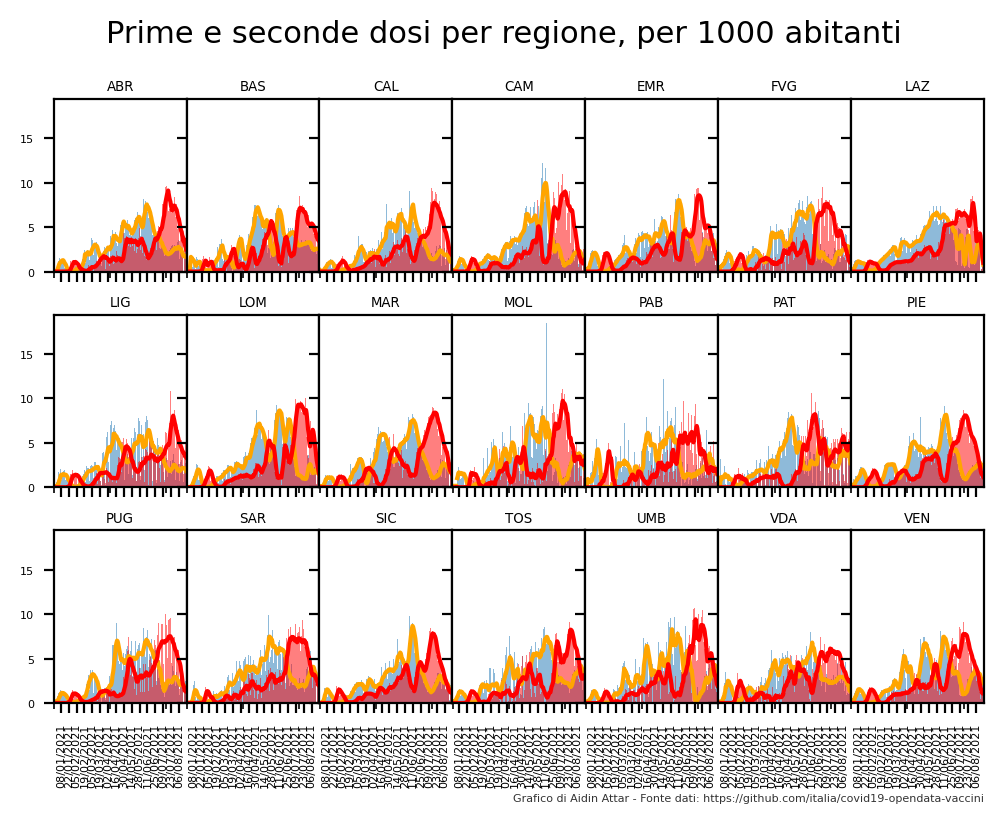

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})


abr.plot(ax=axes[0,0], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "ABR", width = 1    )
abr.plot(ax=axes[0,0], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
bas.plot(ax=axes[0,1], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "BAS", width = 1    )
bas.plot(ax=axes[0,1], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
cal.plot(ax=axes[0,2], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "CAL", width = 1    )
cal.plot(ax=axes[0,2], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
cam.plot(ax=axes[0,3], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "CAM", width = 1    )
cam.plot(ax=axes[0,3], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
emr.plot(ax=axes[0,4], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "EMR", width = 1    )
emr.plot(ax=axes[0,4], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
fvg.plot(ax=axes[0,5], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "FVG", width = 1    )
fvg.plot(ax=axes[0,5], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
laz.plot(ax=axes[0,6], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "LAZ", width = 1    )
laz.plot(ax=axes[0,6], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
lig.plot(ax=axes[1,0], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "LIG", width = 1    )
lig.plot(ax=axes[1,0], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
lom.plot(ax=axes[1,1], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "LOM", width = 1    )
lom.plot(ax=axes[1,1], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
mar.plot(ax=axes[1,2], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "MAR", width = 1    )
mar.plot(ax=axes[1,2], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
mol.plot(ax=axes[1,3], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "MOL", width = 1    )
mol.plot(ax=axes[1,3], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
pab.plot(ax=axes[1,4], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "PAB", width = 1    )
pab.plot(ax=axes[1,4], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
pat.plot(ax=axes[1,5], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "PAT", width = 1    )
pat.plot(ax=axes[1,5], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
pie.plot(ax=axes[1,6], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "PIE", width = 1    )
pie.plot(ax=axes[1,6], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
pug.plot(ax=axes[2,0], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "PUG", width = 1    )
pug.plot(ax=axes[2,0], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
sar.plot(ax=axes[2,1], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "SAR", width = 1    )
sar.plot(ax=axes[2,1], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
sic.plot(ax=axes[2,2], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "SIC", width = 1    )
sic.plot(ax=axes[2,2], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
tos.plot(ax=axes[2,3], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "TOS", width = 1    )
tos.plot(ax=axes[2,3], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
umb.plot(ax=axes[2,4], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "UMB", width = 1    )
umb.plot(ax=axes[2,4], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
vda.plot(ax=axes[2,5], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "VDA", width = 1    )
vda.plot(ax=axes[2,5], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )
ven.plot(ax=axes[2,6], y='prima_1000',kind = 'bar', color = 'C0', alpha = 0.5 , legend = False, xlabel = '', title = "VEN", width = 1    )
ven.plot(ax=axes[2,6], y='avg_prima_1000', kind = 'line', legend = False, xlabel = '', color = 'orange' )



abr.plot(ax=axes[0,0], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "ABR", width = 1    )
abr.plot(ax=axes[0,0], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
bas.plot(ax=axes[0,1], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "BAS", width = 1    )
bas.plot(ax=axes[0,1], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
cal.plot(ax=axes[0,2], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "CAL", width = 1    )
cal.plot(ax=axes[0,2], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
cam.plot(ax=axes[0,3], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "CAM", width = 1    )
cam.plot(ax=axes[0,3], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
emr.plot(ax=axes[0,4], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "EMR", width = 1    )
emr.plot(ax=axes[0,4], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
fvg.plot(ax=axes[0,5], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "FVG", width = 1    )
fvg.plot(ax=axes[0,5], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
laz.plot(ax=axes[0,6], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "LAZ", width = 1    )
laz.plot(ax=axes[0,6], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
lig.plot(ax=axes[1,0], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "LIG", width = 1    )
lig.plot(ax=axes[1,0], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
lom.plot(ax=axes[1,1], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "LOM", width = 1    )
lom.plot(ax=axes[1,1], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
mar.plot(ax=axes[1,2], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "MAR", width = 1    )
mar.plot(ax=axes[1,2], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
mol.plot(ax=axes[1,3], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "MOL", width = 1    )
mol.plot(ax=axes[1,3], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
pab.plot(ax=axes[1,4], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "PAB", width = 1    )
pab.plot(ax=axes[1,4], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
pat.plot(ax=axes[1,5], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "PAT", width = 1    )
pat.plot(ax=axes[1,5], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
pie.plot(ax=axes[1,6], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "PIE", width = 1    )
pie.plot(ax=axes[1,6], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
pug.plot(ax=axes[2,0], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "PUG", width = 1    )
pug.plot(ax=axes[2,0], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
sar.plot(ax=axes[2,1], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "SAR", width = 1    )
sar.plot(ax=axes[2,1], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
sic.plot(ax=axes[2,2], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "SIC", width = 1    )
sic.plot(ax=axes[2,2], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
tos.plot(ax=axes[2,3], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "TOS", width = 1    )
tos.plot(ax=axes[2,3], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
umb.plot(ax=axes[2,4], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "UMB", width = 1    )
umb.plot(ax=axes[2,4], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
vda.plot(ax=axes[2,5], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "VDA", width = 1    )
vda.plot(ax=axes[2,5], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )
ven.plot(ax=axes[2,6], y='seconda_1000', kind = 'bar', color = 'red', alpha = 0.5 , legend = False, xlabel = '', title = "VEN", width = 1    )
ven.plot(ax=axes[2,6], y='avg_seconda_1000', kind = 'line', legend = False, xlabel = '', color = 'red' )


axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.setp(axes[2,0].get_xticklabels(), rotation=90)
plt.setp(axes[2,1].get_xticklabels(), rotation=90)
plt.setp(axes[2,2].get_xticklabels(), rotation=90)
plt.setp(axes[2,3].get_xticklabels(), rotation=90)
plt.setp(axes[2,4].get_xticklabels(), rotation=90)
plt.setp(axes[2,5].get_xticklabels(), rotation=90)
plt.setp(axes[2,6].get_xticklabels(), rotation=90)


fig.suptitle("Prime e seconde dosi per regione, per 1000 abitanti", fontsize=11)
plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

plt.savefig('Regioni_Giorn_Prima.png', dpi=300)
plt.show()

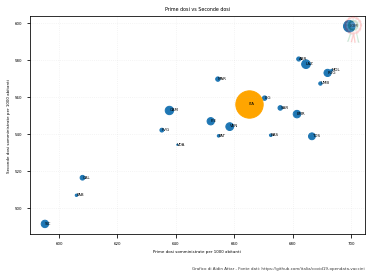

In [ ]:

total = cum.set_index('area')

sum_ = total.reindex(['PAT', 'PAB', 'EMR', 'VEN',
                      'VDA', 'UMB', 'ABR', 'BAS',
                      'SIC', 'SAR', 'CAL', 'CAM',
                      'PUG', 'PIE', 'LOM', 'MOL',
                      'LAZ', 'LIG', 'TOS', 'FVG', 'MAR']).sum().to_frame().transpose()
sum_ = sum_.rename(index={0: 'ITA'})
sum_['per_1000']        = sum_['totale']     / 60360
sum_['cumulativa_1000'] = sum_['cumulativa'] / 60360
sum_['cumulativa_prima_1000'] = sum_['cumulativa_prima'] / 60360
sum_['cumulativa_seconda_1000'] = sum_['cumulativa_seconda'] / 60360

ax = total.plot.scatter(x='cumulativa_prima_1000', y='cumulativa_seconda_1000', 
                        alpha=1, title='Prime dosi vs Seconde dosi',
                        color = 'C0', s=total['cumulativa']/100000)
sum_.plot.scatter( ax=ax, x='cumulativa_prima_1000', y='cumulativa_seconda_1000',
                        alpha=1, color = 'orange', s=sum_.loc['ITA', 'cumulativa']/100000)

for i, txt in enumerate(total.index):
    ax.annotate(txt, (total.cumulativa_prima_1000.iat[i], total.cumulativa_seconda_1000.iat[i]))

txt = 'ITA'
ax.annotate(txt, (sum_.cumulativa_prima_1000.ITA, sum_.cumulativa_seconda_1000.ITA))
    
ax.set(xlabel='Prime dosi somministrate per 1000 abitanti', ylabel='Seconde dosi somministrate per 1000 abitanti')

watermark2()

plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')


plt.grid(alpha = 0.2, linestyle='dotted')
plt.savefig('Cartes_PrimeSeconde.png', dpi=300)

plt.show()


In [ ]:
somm1_pab.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_emr.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_abr.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_bas.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_cal.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_cam.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_fvg.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_laz.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_lig.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_lom.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_mar.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_mol.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_pat.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_pug.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_pie.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_sar.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_sic.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_tos.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_umb.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_vda.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)
somm1_ven.rename(columns={'categoria_operatori_sanitari_sociosanitari': 'OP_SAN', 
                          'categoria_personale_non_sanitario': 'OP_NSAN',
                          'categoria_ospiti_rsa': 'RSA',
                          'categoria_over80': '80+',
                          'categoria_60_69': '60-69',
                          'categoria_70_79': '70-79',
                          'categoria_soggetti_fragili': 'Soggetti Fragili',
                          'categoria_forze_armate': 'Forze_Armate',
                          'categoria_personale_scolastico': 'Personale_Scolastico',
                          'categoria_altro': 'Altro'}, inplace = True)

somm1_laz

/home/aidin/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


data_somministrazione                fornitore area fascia_anagrafica  \
37                2020-12-27          Pfizer/BioNTech  LAZ             20-29   
38                2020-12-27          Pfizer/BioNTech  LAZ             30-39   
39                2020-12-27          Pfizer/BioNTech  LAZ             40-49   
40                2020-12-27          Pfizer/BioNTech  LAZ             50-59   
41                2020-12-27          Pfizer/BioNTech  LAZ             60-69   
...                      ...                      ...  ...               ...   
108998            2021-08-19  Vaxzevria (AstraZeneca)  LAZ             30-39   
108999            2021-08-19  Vaxzevria (AstraZeneca)  LAZ             40-49   
109000            2021-08-19  Vaxzevria (AstraZeneca)  LAZ             50-59   
109001            2021-08-19  Vaxzevria (AstraZeneca)  LAZ             60-69   
109002            2021-08-19  Vaxzevria (AstraZeneca)  LAZ             70-79   

        sesso_maschile  sesso_femminile  prima_dose  seconda_dose  \
37                  32               32          64             0   
38                  39               41          80             0   
39                  19               32          51             0   
40                  26               30          56             0   
41                  16                8          24             0   
...                ...              ...         ...           ...   
108998             284               95           1           378   
108999             306              167           1           472   
109000             230              159           1           388   
109001              16               19           0            34   
109002               4                4           0             8   

        pregressa_infezione codice_NUTS1 codice_NUTS2  codice_regione_ISTAT  \
37                        0          ITI         ITI4                    12   
38                        0          ITI         ITI4                    12   
39                        0          ITI         ITI4                    12   
40                        0          ITI         ITI4                    12   
41                        0          ITI         ITI4                    12   
...                     ...          ...          ...                   ...   
108998                    0          ITI         ITI4                    12   
108999                    0          ITI         ITI4                    12   
109000                    0          ITI         ITI4                    12   
109001                    1          ITI         ITI4                    12   
109002                    0          ITI         ITI4                    12   

       nome_area  totale  
37         Lazio      64  
38         Lazio      80  
39         Lazio      51  
40         Lazio      56  
41         Lazio      24  
...          ...     ...  
108998     Lazio     379  
108999     Lazio     473  
109000     Lazio     389  
109001     Lazio      35  
109002     Lazio       8  

[6024 rows x 14 columns]

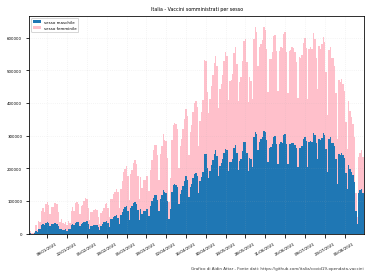

In [ ]:
plt.figure()
ax = plt.gca()
label = ['sesso maschile', 'sesso femminile']
ita[['sesso_maschile', 'sesso_femminile']].plot.bar(ax = ax, stacked = True, title = "Italia - Vaccini somministrati per sesso",
                                             xlabel = '', color = ['C0', 'pink'],width = 1)
plt.legend(label, loc="upper left")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
#watermark2()
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')

plt.savefig('Italia_Giorn_Masch_Femm.png', dpi=300)

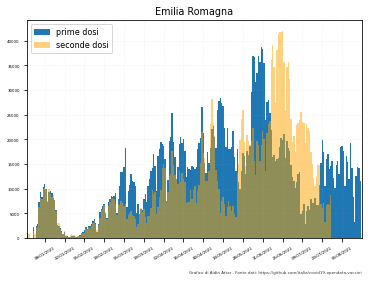

In [ ]:
emr['prima_dose']/(emr['seconda_dose'].shift(-21))

plt.figure()
ax = plt.gca()
emr['prima_dose'].plot(ax = ax, kind = 'bar', title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0', width = 1)

emr['seconda_dose'].shift(-21).plot(ax = ax, kind = 'bar', label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5,width = 1)

plt.legend(loc="upper left")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')


Text(0.9, 0.0, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini')

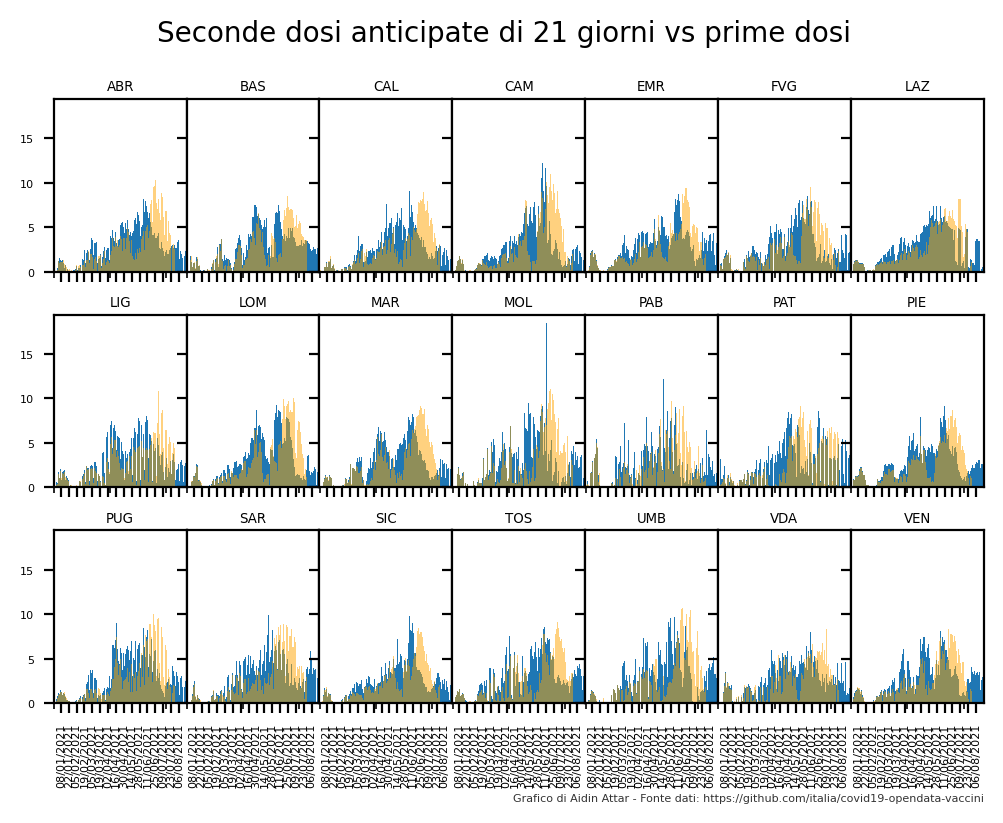

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})




emr['prima_1000'].plot(ax = axes[0,4], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

emr['seconda_1000'].shift(-21).plot(ax = axes[0,4], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

ven['prima_1000'].plot(ax = axes[2,6], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

ven['seconda_1000'].shift(-21).plot(ax = axes[2,6], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

vda['prima_1000'].plot(ax = axes[2,5], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

vda['seconda_1000'].shift(-21).plot(ax = axes[2,5], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

abr['prima_1000'].plot(ax = axes[0,0], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

abr['seconda_1000'].shift(-21).plot(ax = axes[0,0], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

bas['prima_1000'].plot(ax = axes[0,1], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

bas['seconda_1000'].shift(-21).plot(ax = axes[0,1], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

cal['prima_1000'].plot(ax = axes[0,2], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

cal['seconda_1000'].shift(-21).plot(ax = axes[0,2], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

cam['prima_1000'].plot(ax = axes[0,3], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

cam['seconda_1000'].shift(-21).plot(ax = axes[0,3], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

fvg['prima_1000'].plot(ax = axes[0,5], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

fvg['seconda_1000'].shift(-21).plot(ax = axes[0,5], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

laz['prima_1000'].plot(ax = axes[0,6], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

laz['seconda_1000'].shift(-21).plot(ax = axes[0,6], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

lig['prima_1000'].plot(ax = axes[1,0], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

lig['seconda_1000'].shift(-21).plot(ax = axes[1,0], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

lom['prima_1000'].plot(ax = axes[1,1], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

lom['seconda_1000'].shift(-21).plot(ax = axes[1,1], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

mar['prima_1000'].plot(ax = axes[1,2], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

mar['seconda_1000'].shift(-21).plot(ax = axes[1,2], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

mol['prima_1000'].plot(ax = axes[1,3], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

mol['seconda_1000'].shift(-21).plot(ax = axes[1,3], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

pab['prima_1000'].plot(ax = axes[1,4], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

pab['seconda_1000'].shift(-21).plot(ax = axes[1,4], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

pat['prima_1000'].plot(ax = axes[1,5], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

pat['seconda_1000'].shift(-21).plot(ax = axes[1,5], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

pie['prima_1000'].plot(ax = axes[1,6], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

pie['seconda_1000'].shift(-21).plot(ax = axes[1,6], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

pug['prima_1000'].plot(ax = axes[2,0], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

pug['seconda_1000'].shift(-21).plot(ax = axes[2,0], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

sar['prima_1000'].plot(ax = axes[2,1], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

sar['seconda_1000'].shift(-21).plot(ax = axes[2,1], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

sic['prima_1000'].plot(ax = axes[2,2], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

sic['seconda_1000'].shift(-21).plot(ax = axes[2,2], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

tos['prima_1000'].plot(ax = axes[2,3], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

tos['seconda_1000'].shift(-21).plot(ax = axes[2,3], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

umb['prima_1000'].plot(ax = axes[2,4], kind = 'bar', width = 1, title = "Emilia Romagna", label = 'prime dosi',
                                             xlabel = '', color = 'C0')

umb['seconda_1000'].shift(-21).plot(ax = axes[2,4], kind = 'bar', width = 1, label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.5)

axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))


plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
fig.suptitle("Seconde dosi anticipate di 21 giorni vs prime dosi", fontsize=10)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

#plt.savefig('Regioni_Giorn_Prime_Seconde.png', dpi=300)


      percentuale
area             
VEN        0.9146
VDA        0.8970
UMB        0.9190
TOS        0.8790
SIC        0.8866
SAR        0.9140
PUG        0.8834
PIE        0.9109
PAT        0.9164
PAB        0.9156
MOL        0.9103
MAR        0.9359
LOM        0.9061
LIG        0.8892
LAZ        0.8983
FVG        0.9209
EMR        0.8926
CAM        0.9216
CAL        0.8977
BAS        0.8751
ABR        0.9108


Text(0.9, 0.0, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini')

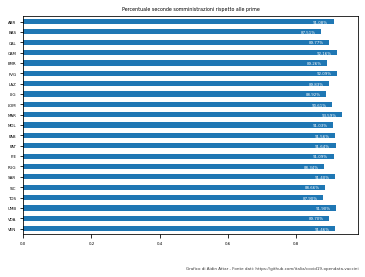

In [ ]:
yesterday = (date.today() - timedelta(days=1)).strftime('%d/%m/%Y')
days21 = (date.today() - timedelta(days=22)).strftime('%d/%m/%Y')
perc = pd.DataFrame([ven['cumulativa_seconda_1000'][yesterday]/ven['cumulativa_prima_1000'][days21],
                     emr['cumulativa_seconda_1000'][yesterday]/emr['cumulativa_prima_1000'][days21],
                     vda['cumulativa_seconda_1000'][yesterday]/vda['cumulativa_prima_1000'][days21],
                     tos['cumulativa_seconda_1000'][yesterday]/tos['cumulativa_prima_1000'][days21],
                     sic['cumulativa_seconda_1000'][yesterday]/sic['cumulativa_prima_1000'][days21],
                     sar['cumulativa_seconda_1000'][yesterday]/sar['cumulativa_prima_1000'][days21],
                     pug['cumulativa_seconda_1000'][yesterday]/pug['cumulativa_prima_1000'][days21],
                     pie['cumulativa_seconda_1000'][yesterday]/pie['cumulativa_prima_1000'][days21],
                     pat['cumulativa_seconda_1000'][yesterday]/pat['cumulativa_prima_1000'][days21],
                     pab['cumulativa_seconda_1000'][yesterday]/pab['cumulativa_prima_1000'][days21],
                     mol['cumulativa_seconda_1000'][yesterday]/mol['cumulativa_prima_1000'][days21],
                     mar['cumulativa_seconda_1000'][yesterday]/mar['cumulativa_prima_1000'][days21],
                     lom['cumulativa_seconda_1000'][yesterday]/lom['cumulativa_prima_1000'][days21],
                     lig['cumulativa_seconda_1000'][yesterday]/lig['cumulativa_prima_1000'][days21],
                     laz['cumulativa_seconda_1000'][yesterday]/laz['cumulativa_prima_1000'][days21],
                     cam['cumulativa_seconda_1000'][yesterday]/cam['cumulativa_prima_1000'][days21],
                     cal['cumulativa_seconda_1000'][yesterday]/cal['cumulativa_prima_1000'][days21],
                     fvg['cumulativa_seconda_1000'][yesterday]/fvg['cumulativa_prima_1000'][days21],
                     bas['cumulativa_seconda_1000'][yesterday]/bas['cumulativa_prima_1000'][days21],
                     abr['cumulativa_seconda_1000'][yesterday]/abr['cumulativa_prima_1000'][days21],
                     umb['cumulativa_seconda_1000'][yesterday]/umb['cumulativa_prima_1000'][days21]])
regioni = ['VEN', 'EMR', 'VDA', 'TOS', 'SIC', 'SAR', 'PUG', 'PIE',
           'PAT', 'PAB', 'MOL', 'MAR', 'LOM', 'LIG', 'LAZ', 'CAM',
           'CAL', 'FVG', 'BAS', 'ABR', 'UMB']

for i in perc:
    perc[i] = round(perc[i], 4)

perc['area'] = regioni
perc.sort_values(by = 'area', inplace = True, ascending=False)
perc.set_index('area', inplace = True)
perc.columns = ['percentuale']

plt.figure()
ax = plt.gca()


print(perc)
perc.plot( 
    ax = ax,
#    x = 'area', 
    ylabel = '',
    kind = 'barh', 
    stacked = True, 
    title = 'Percentuale seconde somministrazioni rispetto alle prime', 
    mark_right = True,
    legend = False) 

ax.set_ylabel("")

valori=perc['percentuale']
# ax.text(x,y,text,color)
for i,val in enumerate(valori):
    ax.text(val - 0.06, i-0.125, str("{:.2%}".format(val)), color="w", fontsize=4)

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#plt.legend(loc = 'center left', bbox_to_anchor=(1.01, 0.5))

#watermark2()
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
#plt.savefig('Barre_Seconde_Prime.png', dpi=1000)


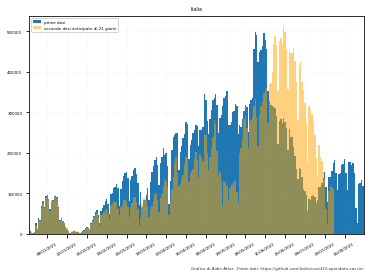

In [ ]:
ita['prima_dose']/(ita['seconda_dose'].shift(-21))

plt.figure()
ax = plt.gca()
ita['prima_dose'].plot(ax = ax, kind = 'bar', title = "italia", label = 'prime dosi',
                                             xlabel = '', color = 'C0', width = 1)

ita['seconda_dose'].shift(-21).plot(ax = ax, kind = 'bar', label = 'seconde dosi anticipate di 21 giorni',
                                             xlabel = '', color = 'orange', alpha = 0.5, width = 1)

plt.legend(loc="upper left")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')


#plt.savefig('Italia_Prime_Seconde.png', dpi=1000)

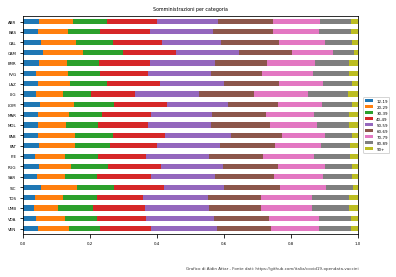

In [ ]:
fascia = pd.DataFrame([somm1_abr.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_bas.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_cal.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_cam.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_emr.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_fvg.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_laz.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_lig.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_lom.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_mar.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_mol.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_pab.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_pat.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_pie.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_pug.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_sar.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_sic.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_tos.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_umb.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_vda.groupby(['fascia_anagrafica']).sum()['totale'],
                       somm1_ven.groupby(['fascia_anagrafica']).sum()['totale']])

fascia.fillna(0, inplace = True)

regioni = ['ABR', 'BAS', 'CAL', 'CAM', 'EMR', 'FVG', 'LAZ',
           'LIG', 'LOM', 'MAR', 'MOL', 'PAB', 'PAT', 'PIE',
           'PUG', 'SAR', 'SIC', 'TOS', 'UMB', 'VDA', 'VEN']


fascia['area'] = regioni
fascia.sort_values(by = 'area', inplace = True, ascending=False)
fascia.set_index('area', inplace = True)

sumt = ( fascia['12-19'] + fascia['20-29'] + fascia['30-39'] + fascia['40-49'] + fascia['50-59'] + fascia['60-69'] + fascia['70-79'] + fascia['80-89'] + fascia['90+'] )
fascia['12-19'] = fascia['12-19'] / sumt
fascia['20-29'] = fascia['20-29'] / sumt
fascia['30-39'] = fascia['30-39'] / sumt
fascia['40-49'] = fascia['40-49'] / sumt
fascia['50-59'] = fascia['50-59'] / sumt
fascia['60-69'] = fascia['60-69'] / sumt
fascia['70-79'] = fascia['70-79'] / sumt
fascia['80-89'] = fascia['80-89'] / sumt
fascia['90+']   = fascia['90+']   / sumt

fascia.plot( 
#    x = 'area', 
    kind = 'barh', 
    stacked = True, 
    ylabel = '',
    xlabel = '',
    title = 'Somministrazioni per categoria', 
    mark_right = True) 
plt.xlim(right = 1.0)
plt.legend(loc = 'center left', bbox_to_anchor=(1.01, 0.5))

plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

plt.savefig('Barre_Età.png', dpi=1000)

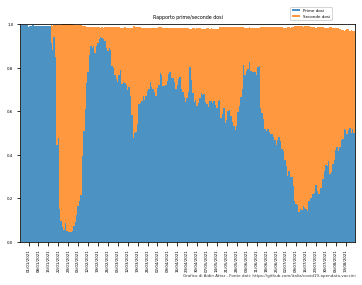

In [ ]:
plt.figure()
ax = plt.gca()

ita['prima_perc'] = ita['prima_dose'] / ita['totale']
ita['seconda_perc'] = ita['seconda_dose'] / ita['totale']
legend = ['Prime dosi', 'Seconde dosi']
ita[['prima_perc', 'seconda_perc']].plot(
    ax = ax,
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8
    )
plt.legend(legend, loc = 'center left', bbox_to_anchor=(0.8, 1.05))
plt.ylim(top = 1.0)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.savefig('Italia_Prime_Seconde_Totali.png', dpi=1000)

In [ ]:
emr['prima_perc'] = emr['prima_dose'] / emr['totale']
emr['seconda_perc'] = emr['seconda_dose'] / emr['totale']

ven['prima_perc'] = ven['prima_dose'] / ven['totale']
ven['seconda_perc'] = ven['seconda_dose'] / ven['totale']

vda['prima_perc'] = vda['prima_dose'] / vda['totale']
vda['seconda_perc'] = vda['seconda_dose'] / vda['totale']

abr['prima_perc'] = abr['prima_dose'] / abr['totale']
abr['seconda_perc'] = abr['seconda_dose'] / abr['totale']

bas['prima_perc'] = bas['prima_dose'] / bas['totale']
bas['seconda_perc'] = bas['seconda_dose'] / bas['totale']

cal['prima_perc'] = cal['prima_dose'] / cal['totale']
cal['seconda_perc'] = cal['seconda_dose'] / cal['totale']

cam['prima_perc'] = cam['prima_dose'] / cam['totale']
cam['seconda_perc'] = cam['seconda_dose'] / cam['totale']

fvg['prima_perc'] = fvg['prima_dose'] / fvg['totale']
fvg['seconda_perc'] = fvg['seconda_dose'] / fvg['totale']

laz['prima_perc'] = laz['prima_dose'] / laz['totale']
laz['seconda_perc'] = laz['seconda_dose'] / laz['totale']

lig['prima_perc'] = lig['prima_dose'] / lig['totale']
lig['seconda_perc'] = lig['seconda_dose'] / lig['totale']

lom['prima_perc'] = lom['prima_dose'] / lom['totale']
lom['seconda_perc'] = lom['seconda_dose'] / lom['totale']

mar['prima_perc'] = mar['prima_dose'] / mar['totale']
mar['seconda_perc'] = mar['seconda_dose'] / mar['totale']

mol['prima_perc'] = mol['prima_dose'] / mol['totale']
mol['seconda_perc'] = mol['seconda_dose'] / mol['totale']

pab['prima_perc'] = pab['prima_dose'] / pab['totale']
pab['seconda_perc'] = pab['seconda_dose'] / pab['totale']

pat['prima_perc'] = pat['prima_dose'] / pat['totale']
pat['seconda_perc'] = pat['seconda_dose'] / pat['totale']

pie['prima_perc'] = pie['prima_dose'] / pie['totale']
pie['seconda_perc'] = pie['seconda_dose'] / pie['totale']

pug['prima_perc'] = pug['prima_dose'] / pug['totale']
pug['seconda_perc'] = pug['seconda_dose'] / pug['totale']

sar['prima_perc'] = sar['prima_dose'] / sar['totale']
sar['seconda_perc'] = sar['seconda_dose'] / sar['totale']

sic['prima_perc'] = sic['prima_dose'] / sic['totale']
sic['seconda_perc'] = sic['seconda_dose'] / sic['totale']

tos['prima_perc'] = tos['prima_dose'] / tos['totale']
tos['seconda_perc'] = tos['seconda_dose'] / tos['totale']

umb['prima_perc'] = umb['prima_dose'] / umb['totale']
umb['seconda_perc'] = umb['seconda_dose'] / umb['totale']



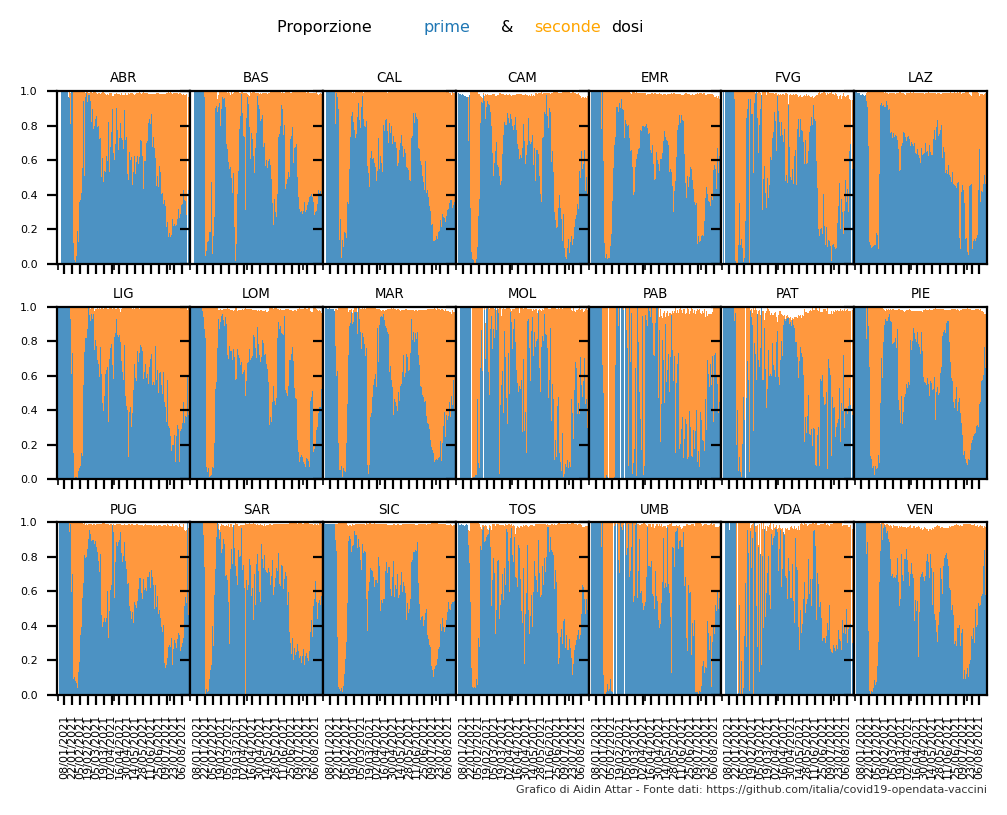

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})



abr[['prima_perc', 'seconda_perc']].plot(
    ax=axes[0,0],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

bas[['prima_perc', 'seconda_perc']].plot(
    ax=axes[0,1],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

cal[['prima_perc', 'seconda_perc']].plot(
    ax=axes[0,2],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

cam[['prima_perc', 'seconda_perc']].plot(
    ax=axes[0,3],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

emr[['prima_perc', 'seconda_perc']].plot(
    ax=axes[0,4],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

fvg[['prima_perc', 'seconda_perc']].plot(
    ax=axes[0,5],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

laz[['prima_perc', 'seconda_perc']].plot(
    ax=axes[0,6],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

lig[['prima_perc', 'seconda_perc']].plot(
    ax=axes[1,0],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

lom[['prima_perc', 'seconda_perc']].plot(
    ax=axes[1,1],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

mar[['prima_perc', 'seconda_perc']].plot(
    ax=axes[1,2],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

mol[['prima_perc', 'seconda_perc']].plot(
    ax=axes[1,3],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

pab[['prima_perc', 'seconda_perc']].plot(
    ax=axes[1,4],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

pat[['prima_perc', 'seconda_perc']].plot(
    ax=axes[1,5],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

pie[['prima_perc', 'seconda_perc']].plot(
    ax=axes[1,6],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

pug[['prima_perc', 'seconda_perc']].plot(
    ax=axes[2,0],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

sar[['prima_perc', 'seconda_perc']].plot(
    ax=axes[2,1],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

sic[['prima_perc', 'seconda_perc']].plot(
    ax=axes[2,2],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

tos[['prima_perc', 'seconda_perc']].plot(
    ax=axes[2,3],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

umb[['prima_perc', 'seconda_perc']].plot(
    ax=axes[2,4],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

vda[['prima_perc', 'seconda_perc']].plot(
    ax=axes[2,5],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

ven[['prima_perc', 'seconda_perc']].plot(
    ax=axes[2,6],
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Rapporto prime/seconde dosi',
    width = 1,
    alpha = 0.8,
    legend=False,
    )

axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.ylim(top = 1.0)

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
fig.text(0.35, 0.95, "Proporzione ", ha="center", va="bottom", size="x-large")
fig.text(0.45, 0.95, "prime", ha="center", va="bottom", size="x-large",color="C0")
fig.text(0.5, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.55,0.95,"seconde", ha="center", va="bottom", size="x-large",color="orange")
fig.text(0.6, 0.95, "dosi", ha="center", va="bottom", size="x-large")
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

plt.savefig('Regioni_Giorn_Prime_Seconde_Totali.png', dpi=300)


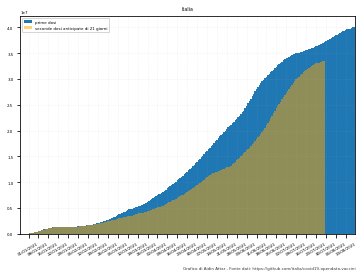

In [ ]:
ita['prima_dose']/(ita['seconda_dose'].shift(-21))

plt.figure()
ax = plt.gca()
ita['cumulativa_prima'].plot(ax = ax, kind = 'bar', title = "italia", label = 'prime dosi',
                                             xlabel = '', color = 'C0', width = 1)

ita['cumulativa_seconda'].shift(-21).plot(ax = ax, kind = 'bar', label = 'seconde dosi anticipate di 21 giorni',
                                             xlabel = '', color = 'orange', alpha = 0.5, width = 1)

plt.legend(loc="upper left")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')


#plt.savefig('Italia_Prime_Seconde_Cum.png', dpi=1000)

Text(1, 0, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini')

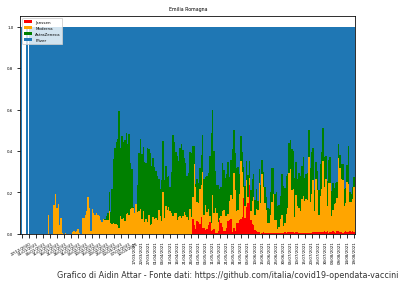

In [ ]:
somm1emr_Pfizer = somm1_emr.loc[somm1_emr['fornitore'] == 'Pfizer/BioNTech']
somm1emr_Pfizer = somm1emr_Pfizer.groupby(somm1emr_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1emr_Moderna = somm1_emr.loc[somm1_emr['fornitore'] == 'Moderna']
somm1emr_Moderna = somm1emr_Moderna.groupby(somm1emr_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1emr_AstraZeneca = somm1_emr.loc[somm1_emr['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1emr_AstraZeneca = somm1emr_AstraZeneca.groupby(somm1emr_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1emr_Janssen = somm1_emr.loc[somm1_emr['fornitore'] == 'Janssen']
somm1emr_Janssen = somm1emr_Janssen.groupby(somm1emr_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1emr_Pfizer['totale']      = somm1emr_Pfizer['sesso_maschile']      + somm1emr_Pfizer['sesso_femminile']
somm1emr_Moderna['totale']     = somm1emr_Moderna['sesso_maschile']     + somm1emr_Moderna['sesso_femminile']
somm1emr_AstraZeneca['totale'] = somm1emr_AstraZeneca['sesso_maschile'] + somm1emr_AstraZeneca['sesso_femminile']
somm1emr_Janssen['totale'] = somm1emr_Janssen['sesso_maschile'] + somm1emr_Janssen['sesso_femminile']

somm1emr_Pfizer.index = pd.DatetimeIndex(somm1emr_Pfizer.index)
somm1emr_Pfizer = somm1emr_Pfizer.reindex(idx)
somm1emr_Pfizer.index = somm1emr_Pfizer.index.strftime('%d/%m/%Y')
somm1emr_Pfizer.fillna(0, inplace = True)
somm1emr_AstraZeneca.index = pd.DatetimeIndex(somm1emr_AstraZeneca.index)
somm1emr_AstraZeneca = somm1emr_AstraZeneca.reindex(idx)
somm1emr_AstraZeneca.index = somm1emr_AstraZeneca.index.strftime('%d/%m/%Y')
somm1emr_AstraZeneca.fillna(0, inplace = True)
somm1emr_Moderna.index = pd.DatetimeIndex(somm1emr_Moderna.index)
somm1emr_Moderna = somm1emr_Moderna.reindex(idx)
somm1emr_Moderna.index = somm1emr_Moderna.index.strftime('%d/%m/%Y')
somm1emr_Moderna.fillna(0, inplace = True)
somm1emr_Janssen.index = pd.DatetimeIndex(somm1emr_Janssen.index)
somm1emr_Janssen = somm1emr_Janssen.reindex(idx)
somm1emr_Janssen.index = somm1emr_Janssen.index.strftime('%d/%m/%Y')
somm1emr_Janssen.fillna(0, inplace = True)

emr_somm = pd.DataFrame(somm1emr_Pfizer['totale'], somm1emr_Moderna['totale'], somm1emr_AstraZeneca['totale'], somm1emr_Janssen['totale'])
emr_somm = pd.concat([somm1emr_Pfizer['totale'], somm1emr_Moderna['totale'], somm1emr_AstraZeneca['totale'], somm1emr_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
emr_somm['Totale'] = emr_somm['Pfizer_Tot'] + emr_somm['Moderna_Tot'] + emr_somm['AstraZeneca_Tot'] + emr_somm['Janssen_Tot']
emr_somm['Pfizer'] = emr_somm['Pfizer_Tot'] / emr_somm['Totale']
emr_somm['Moderna'] = emr_somm['Moderna_Tot'] / emr_somm['Totale']
emr_somm['AstraZeneca'] = emr_somm['AstraZeneca_Tot'] / emr_somm['Totale']
emr_somm['Janssen'] = emr_somm['Janssen_Tot'] / emr_somm['Totale']

plt.figure()
ax = plt.gca()
label = ['Janssen','Moderna', 'AstraZeneca', 'Pfizer']
emr_somm[[ 'Janssen','Moderna', 'AstraZeneca','Pfizer']].plot.bar(ax = ax, stacked = True, title = "Emilia Romagna",
                                                         xlabel = '', color = ['red', 'orange','green', 'C0'],
                                                         width = 1)
#plt.legend(label, loc="upper left")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
#watermark2()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.text(1, 0, 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=8, color='black', alpha=0.8,
        ha='right', va='top', rotation='0')

#plt.savefig('Italia_Giorn_1000.png', dpi=300)

In [ ]:
somm1abr_Pfizer = somm1_abr.loc[somm1_abr['fornitore'] == 'Pfizer/BioNTech']
somm1abr_Pfizer = somm1abr_Pfizer.groupby(somm1abr_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1abr_Moderna = somm1_abr.loc[somm1_abr['fornitore'] == 'Moderna']
somm1abr_Moderna = somm1abr_Moderna.groupby(somm1abr_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1abr_AstraZeneca = somm1_abr.loc[somm1_abr['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1abr_AstraZeneca = somm1abr_AstraZeneca.groupby(somm1abr_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1abr_Janssen = somm1_abr.loc[somm1_abr['fornitore'] == 'Janssen']
somm1abr_Janssen = somm1abr_Janssen.groupby(somm1abr_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1abr_Pfizer['totale']      = somm1abr_Pfizer['sesso_maschile']      + somm1abr_Pfizer['sesso_femminile']
somm1abr_Moderna['totale']     = somm1abr_Moderna['sesso_maschile']     + somm1abr_Moderna['sesso_femminile']
somm1abr_AstraZeneca['totale'] = somm1abr_AstraZeneca['sesso_maschile'] + somm1abr_AstraZeneca['sesso_femminile']
somm1abr_Janssen['totale'] = somm1abr_Janssen['sesso_maschile'] + somm1abr_Janssen['sesso_femminile']

somm1abr_Pfizer.index = pd.DatetimeIndex(somm1abr_Pfizer.index)
somm1abr_Pfizer = somm1abr_Pfizer.reindex(idx)
somm1abr_Pfizer.index = somm1abr_Pfizer.index.strftime('%d/%m/%Y')
somm1abr_Pfizer.fillna(0, inplace = True)
somm1abr_AstraZeneca.index = pd.DatetimeIndex(somm1abr_AstraZeneca.index)
somm1abr_AstraZeneca = somm1abr_AstraZeneca.reindex(idx)
somm1abr_AstraZeneca.index = somm1abr_AstraZeneca.index.strftime('%d/%m/%Y')
somm1abr_AstraZeneca.fillna(0, inplace = True)
somm1abr_Moderna.index = pd.DatetimeIndex(somm1abr_Moderna.index)
somm1abr_Moderna = somm1abr_Moderna.reindex(idx)
somm1abr_Moderna.index = somm1abr_Moderna.index.strftime('%d/%m/%Y')
somm1abr_Moderna.fillna(0, inplace = True)
somm1abr_Janssen.index = pd.DatetimeIndex(somm1abr_Janssen.index)
somm1abr_Janssen = somm1abr_Janssen.reindex(idx)
somm1abr_Janssen.index = somm1abr_Janssen.index.strftime('%d/%m/%Y')
somm1abr_Janssen.fillna(0, inplace = True)

abr_somm = pd.DataFrame(somm1abr_Pfizer['totale'], somm1abr_Moderna['totale'], somm1abr_AstraZeneca['totale'], somm1abr_Janssen['totale'])
abr_somm = pd.concat([somm1abr_Pfizer['totale'], somm1abr_Moderna['totale'], somm1abr_AstraZeneca['totale'], somm1abr_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
abr_somm['Totale'] = abr_somm['Pfizer_Tot'] + abr_somm['Moderna_Tot'] + abr_somm['AstraZeneca_Tot'] + abr_somm['Janssen_Tot']
abr_somm['Pfizer'] = abr_somm['Pfizer_Tot'] / abr_somm['Totale']
abr_somm['Moderna'] = abr_somm['Moderna_Tot'] / abr_somm['Totale']
abr_somm['AstraZeneca'] = abr_somm['AstraZeneca_Tot'] / abr_somm['Totale']
abr_somm['Janssen'] = abr_somm['Janssen_Tot'] / abr_somm['Totale']

somm1bas_Pfizer = somm1_bas.loc[somm1_bas['fornitore'] == 'Pfizer/BioNTech']
somm1bas_Pfizer = somm1bas_Pfizer.groupby(somm1bas_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1bas_Moderna = somm1_bas.loc[somm1_bas['fornitore'] == 'Moderna']
somm1bas_Moderna = somm1bas_Moderna.groupby(somm1bas_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1bas_AstraZeneca = somm1_bas.loc[somm1_bas['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1bas_AstraZeneca = somm1bas_AstraZeneca.groupby(somm1bas_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1bas_Janssen = somm1_bas.loc[somm1_bas['fornitore'] == 'Janssen']
somm1bas_Janssen = somm1bas_Janssen.groupby(somm1bas_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1bas_Pfizer['totale']      = somm1bas_Pfizer['sesso_maschile']      + somm1bas_Pfizer['sesso_femminile']
somm1bas_Moderna['totale']     = somm1bas_Moderna['sesso_maschile']     + somm1bas_Moderna['sesso_femminile']
somm1bas_AstraZeneca['totale'] = somm1bas_AstraZeneca['sesso_maschile'] + somm1bas_AstraZeneca['sesso_femminile']
somm1bas_Janssen['totale'] = somm1bas_Janssen['sesso_maschile'] + somm1bas_Janssen['sesso_femminile']

somm1bas_Pfizer.index = pd.DatetimeIndex(somm1bas_Pfizer.index)
somm1bas_Pfizer = somm1bas_Pfizer.reindex(idx)
somm1bas_Pfizer.index = somm1bas_Pfizer.index.strftime('%d/%m/%Y')
somm1bas_Pfizer.fillna(0, inplace = True)
somm1bas_AstraZeneca.index = pd.DatetimeIndex(somm1bas_AstraZeneca.index)
somm1bas_AstraZeneca = somm1bas_AstraZeneca.reindex(idx)
somm1bas_AstraZeneca.index = somm1bas_AstraZeneca.index.strftime('%d/%m/%Y')
somm1bas_AstraZeneca.fillna(0, inplace = True)
somm1bas_Moderna.index = pd.DatetimeIndex(somm1bas_Moderna.index)
somm1bas_Moderna = somm1bas_Moderna.reindex(idx)
somm1bas_Moderna.index = somm1bas_Moderna.index.strftime('%d/%m/%Y')
somm1bas_Moderna.fillna(0, inplace = True)
somm1bas_Janssen.index = pd.DatetimeIndex(somm1bas_Janssen.index)
somm1bas_Janssen = somm1bas_Janssen.reindex(idx)
somm1bas_Janssen.index = somm1bas_Janssen.index.strftime('%d/%m/%Y')
somm1bas_Janssen.fillna(0, inplace = True)

bas_somm = pd.DataFrame(somm1bas_Pfizer['totale'], somm1bas_Moderna['totale'], somm1bas_AstraZeneca['totale'], somm1bas_Janssen['totale'])
bas_somm = pd.concat([somm1bas_Pfizer['totale'], somm1bas_Moderna['totale'], somm1bas_AstraZeneca['totale'], somm1bas_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
bas_somm['Totale'] = bas_somm['Pfizer_Tot'] + bas_somm['Moderna_Tot'] + bas_somm['AstraZeneca_Tot'] + bas_somm['Janssen_Tot']
bas_somm['Pfizer'] = bas_somm['Pfizer_Tot'] / bas_somm['Totale']
bas_somm['Moderna'] = bas_somm['Moderna_Tot'] / bas_somm['Totale']
bas_somm['AstraZeneca'] = bas_somm['AstraZeneca_Tot'] / bas_somm['Totale']
bas_somm['Janssen'] = bas_somm['Janssen_Tot'] / bas_somm['Totale']

somm1cal_Pfizer = somm1_cal.loc[somm1_cal['fornitore'] == 'Pfizer/BioNTech']
somm1cal_Pfizer = somm1cal_Pfizer.groupby(somm1cal_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1cal_Moderna = somm1_cal.loc[somm1_cal['fornitore'] == 'Moderna']
somm1cal_Moderna = somm1cal_Moderna.groupby(somm1cal_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1cal_AstraZeneca = somm1_cal.loc[somm1_cal['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1cal_AstraZeneca = somm1cal_AstraZeneca.groupby(somm1cal_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1cal_Janssen = somm1_cal.loc[somm1_cal['fornitore'] == 'Janssen']
somm1cal_Janssen = somm1cal_Janssen.groupby(somm1cal_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1cal_Pfizer['totale']      = somm1cal_Pfizer['sesso_maschile']      + somm1cal_Pfizer['sesso_femminile']
somm1cal_Moderna['totale']     = somm1cal_Moderna['sesso_maschile']     + somm1cal_Moderna['sesso_femminile']
somm1cal_AstraZeneca['totale'] = somm1cal_AstraZeneca['sesso_maschile'] + somm1cal_AstraZeneca['sesso_femminile']
somm1cal_Janssen['totale'] = somm1cal_Janssen['sesso_maschile'] + somm1cal_Janssen['sesso_femminile']

somm1cal_Pfizer.index = pd.DatetimeIndex(somm1cal_Pfizer.index)
somm1cal_Pfizer = somm1cal_Pfizer.reindex(idx)
somm1cal_Pfizer.index = somm1cal_Pfizer.index.strftime('%d/%m/%Y')
somm1cal_Pfizer.fillna(0, inplace = True)
somm1cal_AstraZeneca.index = pd.DatetimeIndex(somm1cal_AstraZeneca.index)
somm1cal_AstraZeneca = somm1cal_AstraZeneca.reindex(idx)
somm1cal_AstraZeneca.index = somm1cal_AstraZeneca.index.strftime('%d/%m/%Y')
somm1cal_AstraZeneca.fillna(0, inplace = True)
somm1cal_Moderna.index = pd.DatetimeIndex(somm1cal_Moderna.index)
somm1cal_Moderna = somm1cal_Moderna.reindex(idx)
somm1cal_Moderna.index = somm1cal_Moderna.index.strftime('%d/%m/%Y')
somm1cal_Moderna.fillna(0, inplace = True)
somm1cal_Janssen.index = pd.DatetimeIndex(somm1cal_Janssen.index)
somm1cal_Janssen = somm1cal_Janssen.reindex(idx)
somm1cal_Janssen.index = somm1cal_Janssen.index.strftime('%d/%m/%Y')
somm1cal_Janssen.fillna(0, inplace = True)

cal_somm = pd.DataFrame(somm1cal_Pfizer['totale'], somm1cal_Moderna['totale'], somm1cal_AstraZeneca['totale'], somm1cal_Janssen['totale'])
cal_somm = pd.concat([somm1cal_Pfizer['totale'], somm1cal_Moderna['totale'], somm1cal_AstraZeneca['totale'], somm1cal_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
cal_somm['Totale'] = cal_somm['Pfizer_Tot'] + cal_somm['Moderna_Tot'] + cal_somm['AstraZeneca_Tot'] + cal_somm['Janssen_Tot']
cal_somm['Pfizer'] = cal_somm['Pfizer_Tot'] / cal_somm['Totale']
cal_somm['Moderna'] = cal_somm['Moderna_Tot'] / cal_somm['Totale']
cal_somm['AstraZeneca'] = cal_somm['AstraZeneca_Tot'] / cal_somm['Totale']
cal_somm['Janssen'] = cal_somm['Janssen_Tot'] / cal_somm['Totale']

somm1cam_Pfizer = somm1_cam.loc[somm1_cam['fornitore'] == 'Pfizer/BioNTech']
somm1cam_Pfizer = somm1cam_Pfizer.groupby(somm1cam_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1cam_Moderna = somm1_cam.loc[somm1_cam['fornitore'] == 'Moderna']
somm1cam_Moderna = somm1cam_Moderna.groupby(somm1cam_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1cam_AstraZeneca = somm1_cam.loc[somm1_cam['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1cam_AstraZeneca = somm1cam_AstraZeneca.groupby(somm1cam_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1cam_Janssen = somm1_cam.loc[somm1_cam['fornitore'] == 'Janssen']
somm1cam_Janssen = somm1cam_Janssen.groupby(somm1cam_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1cam_Pfizer['totale']      = somm1cam_Pfizer['sesso_maschile']      + somm1cam_Pfizer['sesso_femminile']
somm1cam_Moderna['totale']     = somm1cam_Moderna['sesso_maschile']     + somm1cam_Moderna['sesso_femminile']
somm1cam_AstraZeneca['totale'] = somm1cam_AstraZeneca['sesso_maschile'] + somm1cam_AstraZeneca['sesso_femminile']
somm1cam_Janssen['totale'] = somm1cam_Janssen['sesso_maschile'] + somm1cam_Janssen['sesso_femminile']

somm1cam_Pfizer.index = pd.DatetimeIndex(somm1cam_Pfizer.index)
somm1cam_Pfizer = somm1cam_Pfizer.reindex(idx)
somm1cam_Pfizer.index = somm1cam_Pfizer.index.strftime('%d/%m/%Y')
somm1cam_Pfizer.fillna(0, inplace = True)
somm1cam_AstraZeneca.index = pd.DatetimeIndex(somm1cam_AstraZeneca.index)
somm1cam_AstraZeneca = somm1cam_AstraZeneca.reindex(idx)
somm1cam_AstraZeneca.index = somm1cam_AstraZeneca.index.strftime('%d/%m/%Y')
somm1cam_AstraZeneca.fillna(0, inplace = True)
somm1cam_Moderna.index = pd.DatetimeIndex(somm1cam_Moderna.index)
somm1cam_Moderna = somm1cam_Moderna.reindex(idx)
somm1cam_Moderna.index = somm1cam_Moderna.index.strftime('%d/%m/%Y')
somm1cam_Moderna.fillna(0, inplace = True)
somm1cam_Janssen.index = pd.DatetimeIndex(somm1cam_Janssen.index)
somm1cam_Janssen = somm1cam_Janssen.reindex(idx)
somm1cam_Janssen.index = somm1cam_Janssen.index.strftime('%d/%m/%Y')
somm1cam_Janssen.fillna(0, inplace = True)

cam_somm = pd.DataFrame(somm1cam_Pfizer['totale'], somm1cam_Moderna['totale'], somm1cam_AstraZeneca['totale'], somm1cam_Janssen['totale'])
cam_somm = pd.concat([somm1cam_Pfizer['totale'], somm1cam_Moderna['totale'], somm1cam_AstraZeneca['totale'], somm1cam_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
cam_somm['Totale'] = cam_somm['Pfizer_Tot'] + cam_somm['Moderna_Tot'] + cam_somm['AstraZeneca_Tot'] + cam_somm['Janssen_Tot']
cam_somm['Pfizer'] = cam_somm['Pfizer_Tot'] / cam_somm['Totale']
cam_somm['Moderna'] = cam_somm['Moderna_Tot'] / cam_somm['Totale']
cam_somm['AstraZeneca'] = cam_somm['AstraZeneca_Tot'] / cam_somm['Totale']
cam_somm['Janssen'] = cam_somm['Janssen_Tot'] / cam_somm['Totale']


somm1fvg_Pfizer = somm1_fvg.loc[somm1_fvg['fornitore'] == 'Pfizer/BioNTech']
somm1fvg_Pfizer = somm1fvg_Pfizer.groupby(somm1fvg_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1fvg_Moderna = somm1_fvg.loc[somm1_fvg['fornitore'] == 'Moderna']
somm1fvg_Moderna = somm1fvg_Moderna.groupby(somm1fvg_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1fvg_AstraZeneca = somm1_fvg.loc[somm1_fvg['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1fvg_AstraZeneca = somm1fvg_AstraZeneca.groupby(somm1fvg_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1fvg_Janssen = somm1_fvg.loc[somm1_fvg['fornitore'] == 'Janssen']
somm1fvg_Janssen = somm1fvg_Janssen.groupby(somm1fvg_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1fvg_Pfizer['totale']      = somm1fvg_Pfizer['sesso_maschile']      + somm1fvg_Pfizer['sesso_femminile']
somm1fvg_Moderna['totale']     = somm1fvg_Moderna['sesso_maschile']     + somm1fvg_Moderna['sesso_femminile']
somm1fvg_AstraZeneca['totale'] = somm1fvg_AstraZeneca['sesso_maschile'] + somm1fvg_AstraZeneca['sesso_femminile']
somm1fvg_Janssen['totale'] = somm1fvg_Janssen['sesso_maschile'] + somm1fvg_Janssen['sesso_femminile']

somm1fvg_Pfizer.index = pd.DatetimeIndex(somm1fvg_Pfizer.index)
somm1fvg_Pfizer = somm1fvg_Pfizer.reindex(idx)
somm1fvg_Pfizer.index = somm1fvg_Pfizer.index.strftime('%d/%m/%Y')
somm1fvg_Pfizer.fillna(0, inplace = True)
somm1fvg_AstraZeneca.index = pd.DatetimeIndex(somm1fvg_AstraZeneca.index)
somm1fvg_AstraZeneca = somm1fvg_AstraZeneca.reindex(idx)
somm1fvg_AstraZeneca.index = somm1fvg_AstraZeneca.index.strftime('%d/%m/%Y')
somm1fvg_AstraZeneca.fillna(0, inplace = True)
somm1fvg_Moderna.index = pd.DatetimeIndex(somm1fvg_Moderna.index)
somm1fvg_Moderna = somm1fvg_Moderna.reindex(idx)
somm1fvg_Moderna.index = somm1fvg_Moderna.index.strftime('%d/%m/%Y')
somm1fvg_Moderna.fillna(0, inplace = True)
somm1fvg_Janssen.index = pd.DatetimeIndex(somm1fvg_Janssen.index)
somm1fvg_Janssen = somm1fvg_Janssen.reindex(idx)
somm1fvg_Janssen.index = somm1fvg_Janssen.index.strftime('%d/%m/%Y')
somm1fvg_Janssen.fillna(0, inplace = True)

fvg_somm = pd.DataFrame(somm1fvg_Pfizer['totale'], somm1fvg_Moderna['totale'], somm1fvg_AstraZeneca['totale'], somm1fvg_Janssen['totale'])
fvg_somm = pd.concat([somm1fvg_Pfizer['totale'], somm1fvg_Moderna['totale'], somm1fvg_AstraZeneca['totale'], somm1fvg_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
fvg_somm['Totale'] = fvg_somm['Pfizer_Tot'] + fvg_somm['Moderna_Tot'] + fvg_somm['AstraZeneca_Tot'] + fvg_somm['Janssen_Tot']
fvg_somm['Pfizer'] = fvg_somm['Pfizer_Tot'] / fvg_somm['Totale']
fvg_somm['Moderna'] = fvg_somm['Moderna_Tot'] / fvg_somm['Totale']
fvg_somm['AstraZeneca'] = fvg_somm['AstraZeneca_Tot'] / fvg_somm['Totale']
fvg_somm['Janssen'] = fvg_somm['Janssen_Tot'] / fvg_somm['Totale']

somm1laz_Pfizer = somm1_laz.loc[somm1_laz['fornitore'] == 'Pfizer/BioNTech']
somm1laz_Pfizer = somm1laz_Pfizer.groupby(somm1laz_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1laz_Moderna = somm1_laz.loc[somm1_laz['fornitore'] == 'Moderna']
somm1laz_Moderna = somm1laz_Moderna.groupby(somm1laz_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1laz_AstraZeneca = somm1_laz.loc[somm1_laz['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1laz_AstraZeneca = somm1laz_AstraZeneca.groupby(somm1laz_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1laz_Janssen = somm1_laz.loc[somm1_laz['fornitore'] == 'Janssen']
somm1laz_Janssen = somm1laz_Janssen.groupby(somm1laz_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1laz_Pfizer['totale']      = somm1laz_Pfizer['sesso_maschile']      + somm1laz_Pfizer['sesso_femminile']
somm1laz_Moderna['totale']     = somm1laz_Moderna['sesso_maschile']     + somm1laz_Moderna['sesso_femminile']
somm1laz_AstraZeneca['totale'] = somm1laz_AstraZeneca['sesso_maschile'] + somm1laz_AstraZeneca['sesso_femminile']
somm1laz_Janssen['totale'] = somm1laz_Janssen['sesso_maschile'] + somm1laz_Janssen['sesso_femminile']

somm1laz_Pfizer.index = pd.DatetimeIndex(somm1laz_Pfizer.index)
somm1laz_Pfizer = somm1laz_Pfizer.reindex(idx)
somm1laz_Pfizer.index = somm1laz_Pfizer.index.strftime('%d/%m/%Y')
somm1laz_Pfizer.fillna(0, inplace = True)
somm1laz_AstraZeneca.index = pd.DatetimeIndex(somm1laz_AstraZeneca.index)
somm1laz_AstraZeneca = somm1laz_AstraZeneca.reindex(idx)
somm1laz_AstraZeneca.index = somm1laz_AstraZeneca.index.strftime('%d/%m/%Y')
somm1laz_AstraZeneca.fillna(0, inplace = True)
somm1laz_Moderna.index = pd.DatetimeIndex(somm1laz_Moderna.index)
somm1laz_Moderna = somm1laz_Moderna.reindex(idx)
somm1laz_Moderna.index = somm1laz_Moderna.index.strftime('%d/%m/%Y')
somm1laz_Moderna.fillna(0, inplace = True)
somm1laz_Janssen.index = pd.DatetimeIndex(somm1laz_Janssen.index)
somm1laz_Janssen = somm1laz_Janssen.reindex(idx)
somm1laz_Janssen.index = somm1laz_Janssen.index.strftime('%d/%m/%Y')
somm1laz_Janssen.fillna(0, inplace = True)

laz_somm = pd.DataFrame(somm1laz_Pfizer['totale'], somm1laz_Moderna['totale'], somm1laz_AstraZeneca['totale'], somm1laz_Janssen['totale'])
laz_somm = pd.concat([somm1laz_Pfizer['totale'], somm1laz_Moderna['totale'], somm1laz_AstraZeneca['totale'], somm1laz_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
laz_somm['Totale'] = laz_somm['Pfizer_Tot'] + laz_somm['Moderna_Tot'] + laz_somm['AstraZeneca_Tot'] + laz_somm['Janssen_Tot']
laz_somm['Pfizer'] = laz_somm['Pfizer_Tot'] / laz_somm['Totale']
laz_somm['Moderna'] = laz_somm['Moderna_Tot'] / laz_somm['Totale']
laz_somm['AstraZeneca'] = laz_somm['AstraZeneca_Tot'] / laz_somm['Totale']
laz_somm['Janssen'] = laz_somm['Janssen_Tot'] / laz_somm['Totale']

somm1lig_Pfizer = somm1_lig.loc[somm1_lig['fornitore'] == 'Pfizer/BioNTech']
somm1lig_Pfizer = somm1lig_Pfizer.groupby(somm1lig_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1lig_Moderna = somm1_lig.loc[somm1_lig['fornitore'] == 'Moderna']
somm1lig_Moderna = somm1lig_Moderna.groupby(somm1lig_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1lig_AstraZeneca = somm1_lig.loc[somm1_lig['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1lig_AstraZeneca = somm1lig_AstraZeneca.groupby(somm1lig_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1lig_Janssen = somm1_lig.loc[somm1_lig['fornitore'] == 'Janssen']
somm1lig_Janssen = somm1lig_Janssen.groupby(somm1lig_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1lig_Pfizer['totale']      = somm1lig_Pfizer['sesso_maschile']      + somm1lig_Pfizer['sesso_femminile']
somm1lig_Moderna['totale']     = somm1lig_Moderna['sesso_maschile']     + somm1lig_Moderna['sesso_femminile']
somm1lig_AstraZeneca['totale'] = somm1lig_AstraZeneca['sesso_maschile'] + somm1lig_AstraZeneca['sesso_femminile']
somm1lig_Janssen['totale'] = somm1lig_Janssen['sesso_maschile'] + somm1lig_Janssen['sesso_femminile']

somm1lig_Pfizer.index = pd.DatetimeIndex(somm1lig_Pfizer.index)
somm1lig_Pfizer = somm1lig_Pfizer.reindex(idx)
somm1lig_Pfizer.index = somm1lig_Pfizer.index.strftime('%d/%m/%Y')
somm1lig_Pfizer.fillna(0, inplace = True)
somm1lig_AstraZeneca.index = pd.DatetimeIndex(somm1lig_AstraZeneca.index)
somm1lig_AstraZeneca = somm1lig_AstraZeneca.reindex(idx)
somm1lig_AstraZeneca.index = somm1lig_AstraZeneca.index.strftime('%d/%m/%Y')
somm1lig_AstraZeneca.fillna(0, inplace = True)
somm1lig_Moderna.index = pd.DatetimeIndex(somm1lig_Moderna.index)
somm1lig_Moderna = somm1lig_Moderna.reindex(idx)
somm1lig_Moderna.index = somm1lig_Moderna.index.strftime('%d/%m/%Y')
somm1lig_Moderna.fillna(0, inplace = True)
somm1lig_Janssen.index = pd.DatetimeIndex(somm1lig_Janssen.index)
somm1lig_Janssen = somm1lig_Janssen.reindex(idx)
somm1lig_Janssen.index = somm1lig_Janssen.index.strftime('%d/%m/%Y')
somm1lig_Janssen.fillna(0, inplace = True)

lig_somm = pd.DataFrame(somm1lig_Pfizer['totale'], somm1lig_Moderna['totale'], somm1lig_AstraZeneca['totale'], somm1lig_Janssen['totale'])
lig_somm = pd.concat([somm1lig_Pfizer['totale'], somm1lig_Moderna['totale'], somm1lig_AstraZeneca['totale'], somm1lig_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
lig_somm['Totale'] = lig_somm['Pfizer_Tot'] + lig_somm['Moderna_Tot'] + lig_somm['AstraZeneca_Tot'] + lig_somm['Janssen_Tot']
lig_somm['Pfizer'] = lig_somm['Pfizer_Tot'] / lig_somm['Totale']
lig_somm['Moderna'] = lig_somm['Moderna_Tot'] / lig_somm['Totale']
lig_somm['AstraZeneca'] = lig_somm['AstraZeneca_Tot'] / lig_somm['Totale']
lig_somm['Janssen'] = lig_somm['Janssen_Tot'] / lig_somm['Totale']


somm1lom_Pfizer = somm1_lom.loc[somm1_lom['fornitore'] == 'Pfizer/BioNTech']
somm1lom_Pfizer = somm1lom_Pfizer.groupby(somm1lom_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1lom_Moderna = somm1_lom.loc[somm1_lom['fornitore'] == 'Moderna']
somm1lom_Moderna = somm1lom_Moderna.groupby(somm1lom_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1lom_AstraZeneca = somm1_lom.loc[somm1_lom['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1lom_AstraZeneca = somm1lom_AstraZeneca.groupby(somm1lom_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1lom_Janssen = somm1_lom.loc[somm1_lom['fornitore'] == 'Janssen']
somm1lom_Janssen = somm1lom_Janssen.groupby(somm1lom_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1lom_Pfizer['totale']      = somm1lom_Pfizer['sesso_maschile']      + somm1lom_Pfizer['sesso_femminile']
somm1lom_Moderna['totale']     = somm1lom_Moderna['sesso_maschile']     + somm1lom_Moderna['sesso_femminile']
somm1lom_AstraZeneca['totale'] = somm1lom_AstraZeneca['sesso_maschile'] + somm1lom_AstraZeneca['sesso_femminile']
somm1lom_Janssen['totale'] = somm1lom_Janssen['sesso_maschile'] + somm1lom_Janssen['sesso_femminile']

somm1lom_Pfizer.index = pd.DatetimeIndex(somm1lom_Pfizer.index)
somm1lom_Pfizer = somm1lom_Pfizer.reindex(idx)
somm1lom_Pfizer.index = somm1lom_Pfizer.index.strftime('%d/%m/%Y')
somm1lom_Pfizer.fillna(0, inplace = True)
somm1lom_AstraZeneca.index = pd.DatetimeIndex(somm1lom_AstraZeneca.index)
somm1lom_AstraZeneca = somm1lom_AstraZeneca.reindex(idx)
somm1lom_AstraZeneca.index = somm1lom_AstraZeneca.index.strftime('%d/%m/%Y')
somm1lom_AstraZeneca.fillna(0, inplace = True)
somm1lom_Moderna.index = pd.DatetimeIndex(somm1lom_Moderna.index)
somm1lom_Moderna = somm1lom_Moderna.reindex(idx)
somm1lom_Moderna.index = somm1lom_Moderna.index.strftime('%d/%m/%Y')
somm1lom_Moderna.fillna(0, inplace = True)
somm1lom_Janssen.index = pd.DatetimeIndex(somm1lom_Janssen.index)
somm1lom_Janssen = somm1lom_Janssen.reindex(idx)
somm1lom_Janssen.index = somm1lom_Janssen.index.strftime('%d/%m/%Y')
somm1lom_Janssen.fillna(0, inplace = True)

lom_somm = pd.DataFrame(somm1lom_Pfizer['totale'], somm1lom_Moderna['totale'], somm1lom_AstraZeneca['totale'], somm1lom_Janssen['totale'])
lom_somm = pd.concat([somm1lom_Pfizer['totale'], somm1lom_Moderna['totale'], somm1lom_AstraZeneca['totale'], somm1lom_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
lom_somm['Totale'] = lom_somm['Pfizer_Tot'] + lom_somm['Moderna_Tot'] + lom_somm['AstraZeneca_Tot'] + lom_somm['Janssen_Tot']
lom_somm['Pfizer'] = lom_somm['Pfizer_Tot'] / lom_somm['Totale']
lom_somm['Moderna'] = lom_somm['Moderna_Tot'] / lom_somm['Totale']
lom_somm['AstraZeneca'] = lom_somm['AstraZeneca_Tot'] / lom_somm['Totale']
lom_somm['Janssen'] = lom_somm['Janssen_Tot'] / lom_somm['Totale']

somm1mar_Pfizer = somm1_mar.loc[somm1_mar['fornitore'] == 'Pfizer/BioNTech']
somm1mar_Pfizer = somm1mar_Pfizer.groupby(somm1mar_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1mar_Moderna = somm1_mar.loc[somm1_mar['fornitore'] == 'Moderna']
somm1mar_Moderna = somm1mar_Moderna.groupby(somm1mar_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1mar_AstraZeneca = somm1_mar.loc[somm1_mar['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1mar_AstraZeneca = somm1mar_AstraZeneca.groupby(somm1mar_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1mar_Janssen = somm1_mar.loc[somm1_mar['fornitore'] == 'Janssen']
somm1mar_Janssen = somm1mar_Janssen.groupby(somm1mar_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1mar_Pfizer['totale']      = somm1mar_Pfizer['sesso_maschile']      + somm1mar_Pfizer['sesso_femminile']
somm1mar_Moderna['totale']     = somm1mar_Moderna['sesso_maschile']     + somm1mar_Moderna['sesso_femminile']
somm1mar_AstraZeneca['totale'] = somm1mar_AstraZeneca['sesso_maschile'] + somm1mar_AstraZeneca['sesso_femminile']
somm1mar_Janssen['totale'] = somm1mar_Janssen['sesso_maschile'] + somm1mar_Janssen['sesso_femminile']

somm1mar_Pfizer.index = pd.DatetimeIndex(somm1mar_Pfizer.index)
somm1mar_Pfizer = somm1mar_Pfizer.reindex(idx)
somm1mar_Pfizer.index = somm1mar_Pfizer.index.strftime('%d/%m/%Y')
somm1mar_Pfizer.fillna(0, inplace = True)
somm1mar_AstraZeneca.index = pd.DatetimeIndex(somm1mar_AstraZeneca.index)
somm1mar_AstraZeneca = somm1mar_AstraZeneca.reindex(idx)
somm1mar_AstraZeneca.index = somm1mar_AstraZeneca.index.strftime('%d/%m/%Y')
somm1mar_AstraZeneca.fillna(0, inplace = True)
somm1mar_Moderna.index = pd.DatetimeIndex(somm1mar_Moderna.index)
somm1mar_Moderna = somm1mar_Moderna.reindex(idx)
somm1mar_Moderna.index = somm1mar_Moderna.index.strftime('%d/%m/%Y')
somm1mar_Moderna.fillna(0, inplace = True)
somm1mar_Janssen.index = pd.DatetimeIndex(somm1mar_Janssen.index)
somm1mar_Janssen = somm1mar_Janssen.reindex(idx)
somm1mar_Janssen.index = somm1mar_Janssen.index.strftime('%d/%m/%Y')
somm1mar_Janssen.fillna(0, inplace = True)

mar_somm = pd.DataFrame(somm1mar_Pfizer['totale'], somm1mar_Moderna['totale'], somm1mar_AstraZeneca['totale'], somm1mar_Janssen['totale'])
mar_somm = pd.concat([somm1mar_Pfizer['totale'], somm1mar_Moderna['totale'], somm1mar_AstraZeneca['totale'], somm1mar_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
mar_somm['Totale'] = mar_somm['Pfizer_Tot'] + mar_somm['Moderna_Tot'] + mar_somm['AstraZeneca_Tot'] + mar_somm['Janssen_Tot']
mar_somm['Pfizer'] = mar_somm['Pfizer_Tot'] / mar_somm['Totale']
mar_somm['Moderna'] = mar_somm['Moderna_Tot'] / mar_somm['Totale']
mar_somm['AstraZeneca'] = mar_somm['AstraZeneca_Tot'] / mar_somm['Totale']
mar_somm['Janssen'] = mar_somm['Janssen_Tot'] / mar_somm['Totale']

somm1mol_Pfizer = somm1_mol.loc[somm1_mol['fornitore'] == 'Pfizer/BioNTech']
somm1mol_Pfizer = somm1mol_Pfizer.groupby(somm1mol_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1mol_Moderna = somm1_mol.loc[somm1_mol['fornitore'] == 'Moderna']
somm1mol_Moderna = somm1mol_Moderna.groupby(somm1mol_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1mol_AstraZeneca = somm1_mol.loc[somm1_mol['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1mol_AstraZeneca = somm1mol_AstraZeneca.groupby(somm1mol_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1mol_Janssen = somm1_mol.loc[somm1_mol['fornitore'] == 'Janssen']
somm1mol_Janssen = somm1mol_Janssen.groupby(somm1mol_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1mol_Pfizer['totale']      = somm1mol_Pfizer['sesso_maschile']      + somm1mol_Pfizer['sesso_femminile']
somm1mol_Moderna['totale']     = somm1mol_Moderna['sesso_maschile']     + somm1mol_Moderna['sesso_femminile']
somm1mol_AstraZeneca['totale'] = somm1mol_AstraZeneca['sesso_maschile'] + somm1mol_AstraZeneca['sesso_femminile']
somm1mol_Janssen['totale'] = somm1mol_Janssen['sesso_maschile'] + somm1mol_Janssen['sesso_femminile']

somm1mol_Pfizer.index = pd.DatetimeIndex(somm1mol_Pfizer.index)
somm1mol_Pfizer = somm1mol_Pfizer.reindex(idx)
somm1mol_Pfizer.index = somm1mol_Pfizer.index.strftime('%d/%m/%Y')
somm1mol_Pfizer.fillna(0, inplace = True)
somm1mol_AstraZeneca.index = pd.DatetimeIndex(somm1mol_AstraZeneca.index)
somm1mol_AstraZeneca = somm1mol_AstraZeneca.reindex(idx)
somm1mol_AstraZeneca.index = somm1mol_AstraZeneca.index.strftime('%d/%m/%Y')
somm1mol_AstraZeneca.fillna(0, inplace = True)
somm1mol_Moderna.index = pd.DatetimeIndex(somm1mol_Moderna.index)
somm1mol_Moderna = somm1mol_Moderna.reindex(idx)
somm1mol_Moderna.index = somm1mol_Moderna.index.strftime('%d/%m/%Y')
somm1mol_Moderna.fillna(0, inplace = True)
somm1mol_Janssen.index = pd.DatetimeIndex(somm1mol_Janssen.index)
somm1mol_Janssen = somm1mol_Janssen.reindex(idx)
somm1mol_Janssen.index = somm1mol_Janssen.index.strftime('%d/%m/%Y')
somm1mol_Janssen.fillna(0, inplace = True)

mol_somm = pd.DataFrame(somm1mol_Pfizer['totale'], somm1mol_Moderna['totale'], somm1mol_AstraZeneca['totale'], somm1mol_Janssen['totale'])
mol_somm = pd.concat([somm1mol_Pfizer['totale'], somm1mol_Moderna['totale'], somm1mol_AstraZeneca['totale'], somm1mol_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
mol_somm['Totale'] = mol_somm['Pfizer_Tot'] + mol_somm['Moderna_Tot'] + mol_somm['AstraZeneca_Tot'] + mol_somm['Janssen_Tot']
mol_somm['Pfizer'] = mol_somm['Pfizer_Tot'] / mol_somm['Totale']
mol_somm['Moderna'] = mol_somm['Moderna_Tot'] / mol_somm['Totale']
mol_somm['AstraZeneca'] = mol_somm['AstraZeneca_Tot'] / mol_somm['Totale']
mol_somm['Janssen'] = mol_somm['Janssen_Tot'] / mol_somm['Totale']

somm1pab_Pfizer = somm1_pab.loc[somm1_pab['fornitore'] == 'Pfizer/BioNTech']
somm1pab_Pfizer = somm1pab_Pfizer.groupby(somm1pab_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pab_Moderna = somm1_pab.loc[somm1_pab['fornitore'] == 'Moderna']
somm1pab_Moderna = somm1pab_Moderna.groupby(somm1pab_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pab_AstraZeneca = somm1_pab.loc[somm1_pab['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1pab_AstraZeneca = somm1pab_AstraZeneca.groupby(somm1pab_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pab_Janssen = somm1_pab.loc[somm1_pab['fornitore'] == 'Janssen']
somm1pab_Janssen = somm1pab_Janssen.groupby(somm1pab_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1pab_Pfizer['totale']      = somm1pab_Pfizer['sesso_maschile']      + somm1pab_Pfizer['sesso_femminile']
somm1pab_Moderna['totale']     = somm1pab_Moderna['sesso_maschile']     + somm1pab_Moderna['sesso_femminile']
somm1pab_AstraZeneca['totale'] = somm1pab_AstraZeneca['sesso_maschile'] + somm1pab_AstraZeneca['sesso_femminile']
somm1pab_Janssen['totale'] = somm1pab_Janssen['sesso_maschile'] + somm1pab_Janssen['sesso_femminile']

somm1pab_Pfizer.index = pd.DatetimeIndex(somm1pab_Pfizer.index)
somm1pab_Pfizer = somm1pab_Pfizer.reindex(idx)
somm1pab_Pfizer.index = somm1pab_Pfizer.index.strftime('%d/%m/%Y')
somm1pab_Pfizer.fillna(0, inplace = True)
somm1pab_AstraZeneca.index = pd.DatetimeIndex(somm1pab_AstraZeneca.index)
somm1pab_AstraZeneca = somm1pab_AstraZeneca.reindex(idx)
somm1pab_AstraZeneca.index = somm1pab_AstraZeneca.index.strftime('%d/%m/%Y')
somm1pab_AstraZeneca.fillna(0, inplace = True)
somm1pab_Moderna.index = pd.DatetimeIndex(somm1pab_Moderna.index)
somm1pab_Moderna = somm1pab_Moderna.reindex(idx)
somm1pab_Moderna.index = somm1pab_Moderna.index.strftime('%d/%m/%Y')
somm1pab_Moderna.fillna(0, inplace = True)
somm1pab_Janssen.index = pd.DatetimeIndex(somm1pab_Janssen.index)
somm1pab_Janssen = somm1pab_Janssen.reindex(idx)
somm1pab_Janssen.index = somm1pab_Janssen.index.strftime('%d/%m/%Y')
somm1pab_Janssen.fillna(0, inplace = True)

pab_somm = pd.DataFrame(somm1pab_Pfizer['totale'], somm1pab_Moderna['totale'], somm1pab_AstraZeneca['totale'], somm1pab_Janssen['totale'])
pab_somm = pd.concat([somm1pab_Pfizer['totale'], somm1pab_Moderna['totale'], somm1pab_AstraZeneca['totale'], somm1pab_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
pab_somm['Totale'] = pab_somm['Pfizer_Tot'] + pab_somm['Moderna_Tot'] + pab_somm['AstraZeneca_Tot'] + pab_somm['Janssen_Tot']
pab_somm['Pfizer'] = pab_somm['Pfizer_Tot'] / pab_somm['Totale']
pab_somm['Moderna'] = pab_somm['Moderna_Tot'] / pab_somm['Totale']
pab_somm['AstraZeneca'] = pab_somm['AstraZeneca_Tot'] / pab_somm['Totale']
pab_somm['Janssen'] = pab_somm['Janssen_Tot'] / pab_somm['Totale']

somm1pat_Pfizer = somm1_pat.loc[somm1_pat['fornitore'] == 'Pfizer/BioNTech']
somm1pat_Pfizer = somm1pat_Pfizer.groupby(somm1pat_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pat_Moderna = somm1_pat.loc[somm1_pat['fornitore'] == 'Moderna']
somm1pat_Moderna = somm1pat_Moderna.groupby(somm1pat_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pat_AstraZeneca = somm1_pat.loc[somm1_pat['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1pat_AstraZeneca = somm1pat_AstraZeneca.groupby(somm1pat_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pat_Janssen = somm1_pat.loc[somm1_pat['fornitore'] == 'Janssen']
somm1pat_Janssen = somm1pat_Janssen.groupby(somm1pat_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1pat_Pfizer['totale']      = somm1pat_Pfizer['sesso_maschile']      + somm1pat_Pfizer['sesso_femminile']
somm1pat_Moderna['totale']     = somm1pat_Moderna['sesso_maschile']     + somm1pat_Moderna['sesso_femminile']
somm1pat_AstraZeneca['totale'] = somm1pat_AstraZeneca['sesso_maschile'] + somm1pat_AstraZeneca['sesso_femminile']
somm1pat_Janssen['totale'] = somm1pat_Janssen['sesso_maschile'] + somm1pat_Janssen['sesso_femminile']

somm1pat_Pfizer.index = pd.DatetimeIndex(somm1pat_Pfizer.index)
somm1pat_Pfizer = somm1pat_Pfizer.reindex(idx)
somm1pat_Pfizer.index = somm1pat_Pfizer.index.strftime('%d/%m/%Y')
somm1pat_Pfizer.fillna(0, inplace = True)
somm1pat_AstraZeneca.index = pd.DatetimeIndex(somm1pat_AstraZeneca.index)
somm1pat_AstraZeneca = somm1pat_AstraZeneca.reindex(idx)
somm1pat_AstraZeneca.index = somm1pat_AstraZeneca.index.strftime('%d/%m/%Y')
somm1pat_AstraZeneca.fillna(0, inplace = True)
somm1pat_Moderna.index = pd.DatetimeIndex(somm1pat_Moderna.index)
somm1pat_Moderna = somm1pat_Moderna.reindex(idx)
somm1pat_Moderna.index = somm1pat_Moderna.index.strftime('%d/%m/%Y')
somm1pat_Moderna.fillna(0, inplace = True)
somm1pat_Janssen.index = pd.DatetimeIndex(somm1pat_Janssen.index)
somm1pat_Janssen = somm1pat_Janssen.reindex(idx)
somm1pat_Janssen.index = somm1pat_Janssen.index.strftime('%d/%m/%Y')
somm1pat_Janssen.fillna(0, inplace = True)

pat_somm = pd.DataFrame(somm1pat_Pfizer['totale'], somm1pat_Moderna['totale'], somm1pat_AstraZeneca['totale'], somm1pat_Janssen['totale'])
pat_somm = pd.concat([somm1pat_Pfizer['totale'], somm1pat_Moderna['totale'], somm1pat_AstraZeneca['totale'], somm1pat_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
pat_somm['Totale'] = pat_somm['Pfizer_Tot'] + pat_somm['Moderna_Tot'] + pat_somm['AstraZeneca_Tot'] + pat_somm['Janssen_Tot']
pat_somm['Pfizer'] = pat_somm['Pfizer_Tot'] / pat_somm['Totale']
pat_somm['Moderna'] = pat_somm['Moderna_Tot'] / pat_somm['Totale']
pat_somm['AstraZeneca'] = pat_somm['AstraZeneca_Tot'] / pat_somm['Totale']
pat_somm['Janssen'] = pat_somm['Janssen_Tot'] / pat_somm['Totale']


somm1pie_Pfizer = somm1_pie.loc[somm1_pie['fornitore'] == 'Pfizer/BioNTech']
somm1pie_Pfizer = somm1pie_Pfizer.groupby(somm1pie_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pie_Moderna = somm1_pie.loc[somm1_pie['fornitore'] == 'Moderna']
somm1pie_Moderna = somm1pie_Moderna.groupby(somm1pie_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pie_AstraZeneca = somm1_pie.loc[somm1_pie['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1pie_AstraZeneca = somm1pie_AstraZeneca.groupby(somm1pie_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pie_Janssen = somm1_pie.loc[somm1_pie['fornitore'] == 'Janssen']
somm1pie_Janssen = somm1pie_Janssen.groupby(somm1pie_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1pie_Pfizer['totale']      = somm1pie_Pfizer['sesso_maschile']      + somm1pie_Pfizer['sesso_femminile']
somm1pie_Moderna['totale']     = somm1pie_Moderna['sesso_maschile']     + somm1pie_Moderna['sesso_femminile']
somm1pie_AstraZeneca['totale'] = somm1pie_AstraZeneca['sesso_maschile'] + somm1pie_AstraZeneca['sesso_femminile']
somm1pie_Janssen['totale'] = somm1pie_Janssen['sesso_maschile'] + somm1pie_Janssen['sesso_femminile']

somm1pie_Pfizer.index = pd.DatetimeIndex(somm1pie_Pfizer.index)
somm1pie_Pfizer = somm1pie_Pfizer.reindex(idx)
somm1pie_Pfizer.index = somm1pie_Pfizer.index.strftime('%d/%m/%Y')
somm1pie_Pfizer.fillna(0, inplace = True)
somm1pie_AstraZeneca.index = pd.DatetimeIndex(somm1pie_AstraZeneca.index)
somm1pie_AstraZeneca = somm1pie_AstraZeneca.reindex(idx)
somm1pie_AstraZeneca.index = somm1pie_AstraZeneca.index.strftime('%d/%m/%Y')
somm1pie_AstraZeneca.fillna(0, inplace = True)
somm1pie_Moderna.index = pd.DatetimeIndex(somm1pie_Moderna.index)
somm1pie_Moderna = somm1pie_Moderna.reindex(idx)
somm1pie_Moderna.index = somm1pie_Moderna.index.strftime('%d/%m/%Y')
somm1pie_Moderna.fillna(0, inplace = True)
somm1pie_Janssen.index = pd.DatetimeIndex(somm1pie_Janssen.index)
somm1pie_Janssen = somm1pie_Janssen.reindex(idx)
somm1pie_Janssen.index = somm1pie_Janssen.index.strftime('%d/%m/%Y')
somm1pie_Janssen.fillna(0, inplace = True)

pie_somm = pd.DataFrame(somm1pie_Pfizer['totale'], somm1pie_Moderna['totale'], somm1pie_AstraZeneca['totale'], somm1pie_Janssen['totale'])
pie_somm = pd.concat([somm1pie_Pfizer['totale'], somm1pie_Moderna['totale'], somm1pie_AstraZeneca['totale'], somm1pie_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
pie_somm['Totale'] = pie_somm['Pfizer_Tot'] + pie_somm['Moderna_Tot'] + pie_somm['AstraZeneca_Tot'] + pie_somm['Janssen_Tot']
pie_somm['Pfizer'] = pie_somm['Pfizer_Tot'] / pie_somm['Totale']
pie_somm['Moderna'] = pie_somm['Moderna_Tot'] / pie_somm['Totale']
pie_somm['AstraZeneca'] = pie_somm['AstraZeneca_Tot'] / pie_somm['Totale']
pie_somm['Janssen'] = pie_somm['Janssen_Tot'] / pie_somm['Totale']

somm1pug_Pfizer = somm1_pug.loc[somm1_pug['fornitore'] == 'Pfizer/BioNTech']
somm1pug_Pfizer = somm1pug_Pfizer.groupby(somm1pug_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pug_Moderna = somm1_pug.loc[somm1_pug['fornitore'] == 'Moderna']
somm1pug_Moderna = somm1pug_Moderna.groupby(somm1pug_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pug_AstraZeneca = somm1_pug.loc[somm1_pug['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1pug_AstraZeneca = somm1pug_AstraZeneca.groupby(somm1pug_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1pug_Janssen = somm1_pug.loc[somm1_pug['fornitore'] == 'Janssen']
somm1pug_Janssen = somm1pug_Janssen.groupby(somm1pug_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1pug_Pfizer['totale']      = somm1pug_Pfizer['sesso_maschile']      + somm1pug_Pfizer['sesso_femminile']
somm1pug_Moderna['totale']     = somm1pug_Moderna['sesso_maschile']     + somm1pug_Moderna['sesso_femminile']
somm1pug_AstraZeneca['totale'] = somm1pug_AstraZeneca['sesso_maschile'] + somm1pug_AstraZeneca['sesso_femminile']
somm1pug_Janssen['totale'] = somm1pug_Janssen['sesso_maschile'] + somm1pug_Janssen['sesso_femminile']

somm1pug_Pfizer.index = pd.DatetimeIndex(somm1pug_Pfizer.index)
somm1pug_Pfizer = somm1pug_Pfizer.reindex(idx)
somm1pug_Pfizer.index = somm1pug_Pfizer.index.strftime('%d/%m/%Y')
somm1pug_Pfizer.fillna(0, inplace = True)
somm1pug_AstraZeneca.index = pd.DatetimeIndex(somm1pug_AstraZeneca.index)
somm1pug_AstraZeneca = somm1pug_AstraZeneca.reindex(idx)
somm1pug_AstraZeneca.index = somm1pug_AstraZeneca.index.strftime('%d/%m/%Y')
somm1pug_AstraZeneca.fillna(0, inplace = True)
somm1pug_Moderna.index = pd.DatetimeIndex(somm1pug_Moderna.index)
somm1pug_Moderna = somm1pug_Moderna.reindex(idx)
somm1pug_Moderna.index = somm1pug_Moderna.index.strftime('%d/%m/%Y')
somm1pug_Moderna.fillna(0, inplace = True)
somm1pug_Janssen.index = pd.DatetimeIndex(somm1pug_Janssen.index)
somm1pug_Janssen = somm1pug_Janssen.reindex(idx)
somm1pug_Janssen.index = somm1pug_Janssen.index.strftime('%d/%m/%Y')
somm1pug_Janssen.fillna(0, inplace = True)

pug_somm = pd.DataFrame(somm1pug_Pfizer['totale'], somm1pug_Moderna['totale'], somm1pug_AstraZeneca['totale'], somm1pug_Janssen['totale'])
pug_somm = pd.concat([somm1pug_Pfizer['totale'], somm1pug_Moderna['totale'], somm1pug_AstraZeneca['totale'], somm1pug_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
pug_somm['Totale'] = pug_somm['Pfizer_Tot'] + pug_somm['Moderna_Tot'] + pug_somm['AstraZeneca_Tot'] + pug_somm['Janssen_Tot']
pug_somm['Pfizer'] = pug_somm['Pfizer_Tot'] / pug_somm['Totale']
pug_somm['Moderna'] = pug_somm['Moderna_Tot'] / pug_somm['Totale']
pug_somm['AstraZeneca'] = pug_somm['AstraZeneca_Tot'] / pug_somm['Totale']
pug_somm['Janssen'] = pug_somm['Janssen_Tot'] / pug_somm['Totale']

somm1sar_Pfizer = somm1_sar.loc[somm1_sar['fornitore'] == 'Pfizer/BioNTech']
somm1sar_Pfizer = somm1sar_Pfizer.groupby(somm1sar_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1sar_Moderna = somm1_sar.loc[somm1_sar['fornitore'] == 'Moderna']
somm1sar_Moderna = somm1sar_Moderna.groupby(somm1sar_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1sar_AstraZeneca = somm1_sar.loc[somm1_sar['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1sar_AstraZeneca = somm1sar_AstraZeneca.groupby(somm1sar_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1sar_Janssen = somm1_sar.loc[somm1_sar['fornitore'] == 'Janssen']
somm1sar_Janssen = somm1sar_Janssen.groupby(somm1sar_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1sar_Pfizer['totale']      = somm1sar_Pfizer['sesso_maschile']      + somm1sar_Pfizer['sesso_femminile']
somm1sar_Moderna['totale']     = somm1sar_Moderna['sesso_maschile']     + somm1sar_Moderna['sesso_femminile']
somm1sar_AstraZeneca['totale'] = somm1sar_AstraZeneca['sesso_maschile'] + somm1sar_AstraZeneca['sesso_femminile']
somm1sar_Janssen['totale'] = somm1sar_Janssen['sesso_maschile'] + somm1sar_Janssen['sesso_femminile']

somm1sar_Pfizer.index = pd.DatetimeIndex(somm1sar_Pfizer.index)
somm1sar_Pfizer = somm1sar_Pfizer.reindex(idx)
somm1sar_Pfizer.index = somm1sar_Pfizer.index.strftime('%d/%m/%Y')
somm1sar_Pfizer.fillna(0, inplace = True)
somm1sar_AstraZeneca.index = pd.DatetimeIndex(somm1sar_AstraZeneca.index)
somm1sar_AstraZeneca = somm1sar_AstraZeneca.reindex(idx)
somm1sar_AstraZeneca.index = somm1sar_AstraZeneca.index.strftime('%d/%m/%Y')
somm1sar_AstraZeneca.fillna(0, inplace = True)
somm1sar_Moderna.index = pd.DatetimeIndex(somm1sar_Moderna.index)
somm1sar_Moderna = somm1sar_Moderna.reindex(idx)
somm1sar_Moderna.index = somm1sar_Moderna.index.strftime('%d/%m/%Y')
somm1sar_Moderna.fillna(0, inplace = True)
somm1sar_Janssen.index = pd.DatetimeIndex(somm1sar_Janssen.index)
somm1sar_Janssen = somm1sar_Janssen.reindex(idx)
somm1sar_Janssen.index = somm1sar_Janssen.index.strftime('%d/%m/%Y')
somm1sar_Janssen.fillna(0, inplace = True)

sar_somm = pd.DataFrame(somm1sar_Pfizer['totale'], somm1sar_Moderna['totale'], somm1sar_AstraZeneca['totale'], somm1sar_Janssen['totale'])
sar_somm = pd.concat([somm1sar_Pfizer['totale'], somm1sar_Moderna['totale'], somm1sar_AstraZeneca['totale'], somm1sar_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
sar_somm['Totale'] = sar_somm['Pfizer_Tot'] + sar_somm['Moderna_Tot'] + sar_somm['AstraZeneca_Tot'] + sar_somm['Janssen_Tot']
sar_somm['Pfizer'] = sar_somm['Pfizer_Tot'] / sar_somm['Totale']
sar_somm['Moderna'] = sar_somm['Moderna_Tot'] / sar_somm['Totale']
sar_somm['AstraZeneca'] = sar_somm['AstraZeneca_Tot'] / sar_somm['Totale']
sar_somm['Janssen'] = sar_somm['Janssen_Tot'] / sar_somm['Totale']

somm1sic_Pfizer = somm1_sic.loc[somm1_sic['fornitore'] == 'Pfizer/BioNTech']
somm1sic_Pfizer = somm1sic_Pfizer.groupby(somm1sic_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1sic_Moderna = somm1_sic.loc[somm1_sic['fornitore'] == 'Moderna']
somm1sic_Moderna = somm1sic_Moderna.groupby(somm1sic_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1sic_AstraZeneca = somm1_sic.loc[somm1_sic['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1sic_AstraZeneca = somm1sic_AstraZeneca.groupby(somm1sic_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1sic_Janssen = somm1_sic.loc[somm1_sic['fornitore'] == 'Janssen']
somm1sic_Janssen = somm1sic_Janssen.groupby(somm1sic_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1sic_Pfizer['totale']      = somm1sic_Pfizer['sesso_maschile']      + somm1sic_Pfizer['sesso_femminile']
somm1sic_Moderna['totale']     = somm1sic_Moderna['sesso_maschile']     + somm1sic_Moderna['sesso_femminile']
somm1sic_AstraZeneca['totale'] = somm1sic_AstraZeneca['sesso_maschile'] + somm1sic_AstraZeneca['sesso_femminile']
somm1sic_Janssen['totale'] = somm1sic_Janssen['sesso_maschile'] + somm1sic_Janssen['sesso_femminile']

somm1sic_Pfizer.index = pd.DatetimeIndex(somm1sic_Pfizer.index)
somm1sic_Pfizer = somm1sic_Pfizer.reindex(idx)
somm1sic_Pfizer.index = somm1sic_Pfizer.index.strftime('%d/%m/%Y')
somm1sic_Pfizer.fillna(0, inplace = True)
somm1sic_AstraZeneca.index = pd.DatetimeIndex(somm1sic_AstraZeneca.index)
somm1sic_AstraZeneca = somm1sic_AstraZeneca.reindex(idx)
somm1sic_AstraZeneca.index = somm1sic_AstraZeneca.index.strftime('%d/%m/%Y')
somm1sic_AstraZeneca.fillna(0, inplace = True)
somm1sic_Moderna.index = pd.DatetimeIndex(somm1sic_Moderna.index)
somm1sic_Moderna = somm1sic_Moderna.reindex(idx)
somm1sic_Moderna.index = somm1sic_Moderna.index.strftime('%d/%m/%Y')
somm1sic_Moderna.fillna(0, inplace = True)
somm1sic_Janssen.index = pd.DatetimeIndex(somm1sic_Janssen.index)
somm1sic_Janssen = somm1sic_Janssen.reindex(idx)
somm1sic_Janssen.index = somm1sic_Janssen.index.strftime('%d/%m/%Y')
somm1sic_Janssen.fillna(0, inplace = True)

sic_somm = pd.DataFrame(somm1sic_Pfizer['totale'], somm1sic_Moderna['totale'], somm1sic_AstraZeneca['totale'], somm1sic_Janssen['totale'])
sic_somm = pd.concat([somm1sic_Pfizer['totale'], somm1sic_Moderna['totale'], somm1sic_AstraZeneca['totale'], somm1sic_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
sic_somm['Totale'] = sic_somm['Pfizer_Tot'] + sic_somm['Moderna_Tot'] + sic_somm['AstraZeneca_Tot'] + sic_somm['Janssen_Tot']
sic_somm['Pfizer'] = sic_somm['Pfizer_Tot'] / sic_somm['Totale']
sic_somm['Moderna'] = sic_somm['Moderna_Tot'] / sic_somm['Totale']
sic_somm['AstraZeneca'] = sic_somm['AstraZeneca_Tot'] / sic_somm['Totale']
sic_somm['Janssen'] = sic_somm['Janssen_Tot'] / sic_somm['Totale']

somm1tos_Pfizer = somm1_tos.loc[somm1_tos['fornitore'] == 'Pfizer/BioNTech']
somm1tos_Pfizer = somm1tos_Pfizer.groupby(somm1tos_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1tos_Moderna = somm1_tos.loc[somm1_tos['fornitore'] == 'Moderna']
somm1tos_Moderna = somm1tos_Moderna.groupby(somm1tos_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1tos_AstraZeneca = somm1_tos.loc[somm1_tos['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1tos_AstraZeneca = somm1tos_AstraZeneca.groupby(somm1tos_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1tos_Janssen = somm1_tos.loc[somm1_tos['fornitore'] == 'Janssen']
somm1tos_Janssen = somm1tos_Janssen.groupby(somm1tos_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1tos_Pfizer['totale']      = somm1tos_Pfizer['sesso_maschile']      + somm1tos_Pfizer['sesso_femminile']
somm1tos_Moderna['totale']     = somm1tos_Moderna['sesso_maschile']     + somm1tos_Moderna['sesso_femminile']
somm1tos_AstraZeneca['totale'] = somm1tos_AstraZeneca['sesso_maschile'] + somm1tos_AstraZeneca['sesso_femminile']
somm1tos_Janssen['totale'] = somm1tos_Janssen['sesso_maschile'] + somm1tos_Janssen['sesso_femminile']

somm1tos_Pfizer.index = pd.DatetimeIndex(somm1tos_Pfizer.index)
somm1tos_Pfizer = somm1tos_Pfizer.reindex(idx)
somm1tos_Pfizer.index = somm1tos_Pfizer.index.strftime('%d/%m/%Y')
somm1tos_Pfizer.fillna(0, inplace = True)
somm1tos_AstraZeneca.index = pd.DatetimeIndex(somm1tos_AstraZeneca.index)
somm1tos_AstraZeneca = somm1tos_AstraZeneca.reindex(idx)
somm1tos_AstraZeneca.index = somm1tos_AstraZeneca.index.strftime('%d/%m/%Y')
somm1tos_AstraZeneca.fillna(0, inplace = True)
somm1tos_Moderna.index = pd.DatetimeIndex(somm1tos_Moderna.index)
somm1tos_Moderna = somm1tos_Moderna.reindex(idx)
somm1tos_Moderna.index = somm1tos_Moderna.index.strftime('%d/%m/%Y')
somm1tos_Moderna.fillna(0, inplace = True)
somm1tos_Janssen.index = pd.DatetimeIndex(somm1tos_Janssen.index)
somm1tos_Janssen = somm1tos_Janssen.reindex(idx)
somm1tos_Janssen.index = somm1tos_Janssen.index.strftime('%d/%m/%Y')
somm1tos_Janssen.fillna(0, inplace = True)

tos_somm = pd.DataFrame(somm1tos_Pfizer['totale'], somm1tos_Moderna['totale'], somm1tos_AstraZeneca['totale'], somm1tos_Janssen['totale'])
tos_somm = pd.concat([somm1tos_Pfizer['totale'], somm1tos_Moderna['totale'], somm1tos_AstraZeneca['totale'], somm1tos_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
tos_somm['Totale'] = tos_somm['Pfizer_Tot'] + tos_somm['Moderna_Tot'] + tos_somm['AstraZeneca_Tot'] + tos_somm['Janssen_Tot']
tos_somm['Pfizer'] = tos_somm['Pfizer_Tot'] / tos_somm['Totale']
tos_somm['Moderna'] = tos_somm['Moderna_Tot'] / tos_somm['Totale']
tos_somm['AstraZeneca'] = tos_somm['AstraZeneca_Tot'] / tos_somm['Totale']
tos_somm['Janssen'] = tos_somm['Janssen_Tot'] / tos_somm['Totale']

somm1umb_Pfizer = somm1_umb.loc[somm1_umb['fornitore'] == 'Pfizer/BioNTech']
somm1umb_Pfizer = somm1umb_Pfizer.groupby(somm1umb_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1umb_Moderna = somm1_umb.loc[somm1_umb['fornitore'] == 'Moderna']
somm1umb_Moderna = somm1umb_Moderna.groupby(somm1umb_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1umb_AstraZeneca = somm1_umb.loc[somm1_umb['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1umb_AstraZeneca = somm1umb_AstraZeneca.groupby(somm1umb_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1umb_Janssen = somm1_umb.loc[somm1_umb['fornitore'] == 'Janssen']
somm1umb_Janssen = somm1umb_Janssen.groupby(somm1umb_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1umb_Pfizer['totale']      = somm1umb_Pfizer['sesso_maschile']      + somm1umb_Pfizer['sesso_femminile']
somm1umb_Moderna['totale']     = somm1umb_Moderna['sesso_maschile']     + somm1umb_Moderna['sesso_femminile']
somm1umb_AstraZeneca['totale'] = somm1umb_AstraZeneca['sesso_maschile'] + somm1umb_AstraZeneca['sesso_femminile']
somm1umb_Janssen['totale'] = somm1umb_Janssen['sesso_maschile'] + somm1umb_Janssen['sesso_femminile']

somm1umb_Pfizer.index = pd.DatetimeIndex(somm1umb_Pfizer.index)
somm1umb_Pfizer = somm1umb_Pfizer.reindex(idx)
somm1umb_Pfizer.index = somm1umb_Pfizer.index.strftime('%d/%m/%Y')
somm1umb_Pfizer.fillna(0, inplace = True)
somm1umb_AstraZeneca.index = pd.DatetimeIndex(somm1umb_AstraZeneca.index)
somm1umb_AstraZeneca = somm1umb_AstraZeneca.reindex(idx)
somm1umb_AstraZeneca.index = somm1umb_AstraZeneca.index.strftime('%d/%m/%Y')
somm1umb_AstraZeneca.fillna(0, inplace = True)
somm1umb_Moderna.index = pd.DatetimeIndex(somm1umb_Moderna.index)
somm1umb_Moderna = somm1umb_Moderna.reindex(idx)
somm1umb_Moderna.index = somm1umb_Moderna.index.strftime('%d/%m/%Y')
somm1umb_Moderna.fillna(0, inplace = True)
somm1umb_Janssen.index = pd.DatetimeIndex(somm1umb_Janssen.index)
somm1umb_Janssen = somm1umb_Janssen.reindex(idx)
somm1umb_Janssen.index = somm1umb_Janssen.index.strftime('%d/%m/%Y')
somm1umb_Janssen.fillna(0, inplace = True)

umb_somm = pd.DataFrame(somm1umb_Pfizer['totale'], somm1umb_Moderna['totale'], somm1umb_AstraZeneca['totale'], somm1umb_Janssen['totale'])
umb_somm = pd.concat([somm1umb_Pfizer['totale'], somm1umb_Moderna['totale'], somm1umb_AstraZeneca['totale'], somm1umb_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
umb_somm['Totale'] = umb_somm['Pfizer_Tot'] + umb_somm['Moderna_Tot'] + umb_somm['AstraZeneca_Tot'] + umb_somm['Janssen_Tot']
umb_somm['Pfizer'] = umb_somm['Pfizer_Tot'] / umb_somm['Totale']
umb_somm['Moderna'] = umb_somm['Moderna_Tot'] / umb_somm['Totale']
umb_somm['AstraZeneca'] = umb_somm['AstraZeneca_Tot'] / umb_somm['Totale']
umb_somm['Janssen'] = umb_somm['Janssen_Tot'] / umb_somm['Totale']

somm1vda_Pfizer = somm1_vda.loc[somm1_vda['fornitore'] == 'Pfizer/BioNTech']
somm1vda_Pfizer = somm1vda_Pfizer.groupby(somm1vda_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1vda_Moderna = somm1_vda.loc[somm1_vda['fornitore'] == 'Moderna']
somm1vda_Moderna = somm1vda_Moderna.groupby(somm1vda_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1vda_AstraZeneca = somm1_vda.loc[somm1_vda['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1vda_AstraZeneca = somm1vda_AstraZeneca.groupby(somm1vda_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1vda_Janssen = somm1_vda.loc[somm1_vda['fornitore'] == 'Janssen']
somm1vda_Janssen = somm1vda_Janssen.groupby(somm1vda_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1vda_Pfizer['totale']      = somm1vda_Pfizer['sesso_maschile']      + somm1vda_Pfizer['sesso_femminile']
somm1vda_Moderna['totale']     = somm1vda_Moderna['sesso_maschile']     + somm1vda_Moderna['sesso_femminile']
somm1vda_AstraZeneca['totale'] = somm1vda_AstraZeneca['sesso_maschile'] + somm1vda_AstraZeneca['sesso_femminile']
somm1vda_Janssen['totale'] = somm1vda_Janssen['sesso_maschile'] + somm1vda_Janssen['sesso_femminile']

somm1vda_Pfizer.index = pd.DatetimeIndex(somm1vda_Pfizer.index)
somm1vda_Pfizer = somm1vda_Pfizer.reindex(idx)
somm1vda_Pfizer.index = somm1vda_Pfizer.index.strftime('%d/%m/%Y')
somm1vda_Pfizer.fillna(0, inplace = True)
somm1vda_AstraZeneca.index = pd.DatetimeIndex(somm1vda_AstraZeneca.index)
somm1vda_AstraZeneca = somm1vda_AstraZeneca.reindex(idx)
somm1vda_AstraZeneca.index = somm1vda_AstraZeneca.index.strftime('%d/%m/%Y')
somm1vda_AstraZeneca.fillna(0, inplace = True)
somm1vda_Moderna.index = pd.DatetimeIndex(somm1vda_Moderna.index)
somm1vda_Moderna = somm1vda_Moderna.reindex(idx)
somm1vda_Moderna.index = somm1vda_Moderna.index.strftime('%d/%m/%Y')
somm1vda_Moderna.fillna(0, inplace = True)
somm1vda_Janssen.index = pd.DatetimeIndex(somm1vda_Janssen.index)
somm1vda_Janssen = somm1vda_Janssen.reindex(idx)
somm1vda_Janssen.index = somm1vda_Janssen.index.strftime('%d/%m/%Y')
somm1vda_Janssen.fillna(0, inplace = True)

vda_somm = pd.DataFrame(somm1vda_Pfizer['totale'], somm1vda_Moderna['totale'], somm1vda_AstraZeneca['totale'], somm1vda_Janssen['totale'])
vda_somm = pd.concat([somm1vda_Pfizer['totale'], somm1vda_Moderna['totale'], somm1vda_AstraZeneca['totale'], somm1vda_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
vda_somm['Totale'] = vda_somm['Pfizer_Tot'] + vda_somm['Moderna_Tot'] + vda_somm['AstraZeneca_Tot'] + vda_somm['Janssen_Tot']
vda_somm['Pfizer'] = vda_somm['Pfizer_Tot'] / vda_somm['Totale']
vda_somm['Moderna'] = vda_somm['Moderna_Tot'] / vda_somm['Totale']
vda_somm['AstraZeneca'] = vda_somm['AstraZeneca_Tot'] / vda_somm['Totale']
vda_somm['Janssen'] = vda_somm['Janssen_Tot'] / vda_somm['Totale']

somm1ven_Pfizer = somm1_ven.loc[somm1_ven['fornitore'] == 'Pfizer/BioNTech']
somm1ven_Pfizer = somm1ven_Pfizer.groupby(somm1ven_Pfizer.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1ven_Moderna = somm1_ven.loc[somm1_ven['fornitore'] == 'Moderna']
somm1ven_Moderna = somm1ven_Moderna.groupby(somm1ven_Moderna.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1ven_AstraZeneca = somm1_ven.loc[somm1_ven['fornitore'] == 'Vaxzevria (AstraZeneca)']
somm1ven_AstraZeneca = somm1ven_AstraZeneca.groupby(somm1ven_AstraZeneca.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })

somm1ven_Janssen = somm1_ven.loc[somm1_ven['fornitore'] == 'Janssen']
somm1ven_Janssen = somm1ven_Janssen.groupby(somm1ven_Janssen.data_somministrazione).agg({
            'fornitore': 'first',
            'area': 'first',
            'sesso_maschile':sum,
            'sesso_femminile':sum,
            #'OP_SAN':sum,
            #'OP_NSAN':sum,
            #'RSA':sum,
            #'80+':sum,
            #'Forze_Armate':sum,
            #'Personale_Scolastico':sum,
            'prima_dose':sum,
            'seconda_dose':sum,
            'codice_NUTS1': 'first', 
            'codice_NUTS2': 'first', 
            'codice_regione_ISTAT': 'first',
            'nome_area': 'first',
        })
somm1ven_Pfizer['totale']      = somm1ven_Pfizer['sesso_maschile']      + somm1ven_Pfizer['sesso_femminile']
somm1ven_Moderna['totale']     = somm1ven_Moderna['sesso_maschile']     + somm1ven_Moderna['sesso_femminile']
somm1ven_AstraZeneca['totale'] = somm1ven_AstraZeneca['sesso_maschile'] + somm1ven_AstraZeneca['sesso_femminile']
somm1ven_Janssen['totale'] = somm1ven_Janssen['sesso_maschile'] + somm1ven_Janssen['sesso_femminile']

somm1ven_Pfizer.index = pd.DatetimeIndex(somm1ven_Pfizer.index)
somm1ven_Pfizer = somm1ven_Pfizer.reindex(idx)
somm1ven_Pfizer.index = somm1ven_Pfizer.index.strftime('%d/%m/%Y')
somm1ven_Pfizer.fillna(0, inplace = True)
somm1ven_AstraZeneca.index = pd.DatetimeIndex(somm1ven_AstraZeneca.index)
somm1ven_AstraZeneca = somm1ven_AstraZeneca.reindex(idx)
somm1ven_AstraZeneca.index = somm1ven_AstraZeneca.index.strftime('%d/%m/%Y')
somm1ven_AstraZeneca.fillna(0, inplace = True)
somm1ven_Moderna.index = pd.DatetimeIndex(somm1ven_Moderna.index)
somm1ven_Moderna = somm1ven_Moderna.reindex(idx)
somm1ven_Moderna.index = somm1ven_Moderna.index.strftime('%d/%m/%Y')
somm1ven_Moderna.fillna(0, inplace = True)
somm1ven_Janssen.index = pd.DatetimeIndex(somm1ven_Janssen.index)
somm1ven_Janssen = somm1ven_Janssen.reindex(idx)
somm1ven_Janssen.index = somm1ven_Janssen.index.strftime('%d/%m/%Y')
somm1ven_Janssen.fillna(0, inplace = True)

ven_somm = pd.DataFrame(somm1ven_Pfizer['totale'], somm1ven_Moderna['totale'], somm1ven_AstraZeneca['totale'], somm1ven_Janssen['totale'])
ven_somm = pd.concat([somm1ven_Pfizer['totale'], somm1ven_Moderna['totale'], somm1ven_AstraZeneca['totale'], somm1ven_Janssen['totale']], axis=1, keys=['Pfizer_Tot', 'Moderna_Tot', 'AstraZeneca_Tot', 'Janssen_Tot'])
ven_somm['Totale'] = ven_somm['Pfizer_Tot'] + ven_somm['Moderna_Tot'] + ven_somm['AstraZeneca_Tot'] + ven_somm['Janssen_Tot']
ven_somm['Pfizer'] = ven_somm['Pfizer_Tot'] / ven_somm['Totale']
ven_somm['Moderna'] = ven_somm['Moderna_Tot'] / ven_somm['Totale']
ven_somm['AstraZeneca'] = ven_somm['AstraZeneca_Tot'] / ven_somm['Totale']
ven_somm['Janssen'] = ven_somm['Janssen_Tot'] / ven_somm['Totale']

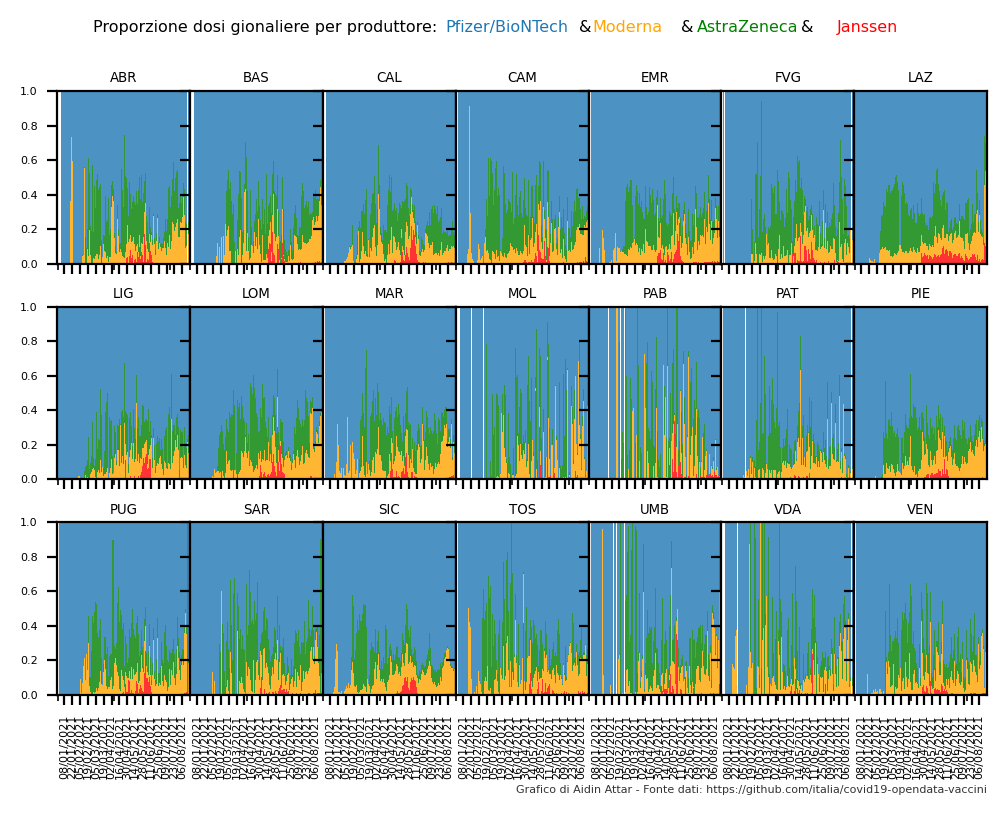

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})


abr_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[0,0],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

bas_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[0,1],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

cal_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[0,2],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

cam_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[0,3],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

emr_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[0,4],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

fvg_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[0,5],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

laz_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[0,6],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

lig_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[1,0],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

lom_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[1,1],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

mar_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[1,2],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

mol_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[1,3],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

pab_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[1,4],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

pat_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[1,5],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

pie_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[1,6],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

pug_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[2,0],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

sar_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[2,1],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

sic_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[2,2],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

tos_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[2,3],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

umb_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[2,4],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

vda_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[2,5],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )

ven_somm[['Janssen','Moderna', 'AstraZeneca', 'Pfizer']].plot(
    ax=axes[2,6],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = ['red', 'orange','green', 'C0']
    )



axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.ylim(top = 1.0)

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
fig.text(0.3, 0.95, "Proporzione dosi gionaliere per produttore: ", ha="center", va="bottom", size="x-large")
fig.text(0.5, 0.95, "Pfizer/BioNTech", ha="center", va="bottom", size="x-large",color="C0")
fig.text(0.565, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.6,0.95,"Moderna", ha="center", va="bottom", size="x-large",color="orange")
fig.text(0.65, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.7,0.95,"AstraZeneca", ha="center", va="bottom", size="x-large",color="green")
fig.text(0.75, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.8,0.95,"Janssen", ha="center", va="bottom", size="x-large",color="red")
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

plt.savefig('Regioni_Giorn_Fornitore.png', dpi=300)


In [ ]:
    abr_somm['CUM_SOMM_AstraZeneca'] = abr_somm['AstraZeneca_Tot'].cumsum() / 1312
abr_somm['CUM_SOMM_Moderna'] = abr_somm['Moderna_Tot'].cumsum() / 1312
abr_somm['CUM_SOMM_Pfizer'] = abr_somm['Pfizer_Tot'].cumsum() / 1312
abr_somm['CUM_SOMM_Janssen'] = abr_somm['Janssen_Tot'].cumsum() / 1312
abr_sommcons = abr_somm.merge(consabr, left_index=True, right_index=True, how='right')
abr_sommcons['AstraZeneca_RIM'] = abr_sommcons['cumulativa_AstraZeneca'] - abr_sommcons['CUM_SOMM_AstraZeneca']
abr_sommcons['Moderna_RIM']     = abr_sommcons['cumulativa_Moderna'] - abr_sommcons['CUM_SOMM_Moderna']
abr_sommcons['Pfizer_RIM']      = abr_sommcons['cumulativa_Pfizer'] - abr_sommcons['CUM_SOMM_Pfizer']
abr_sommcons['Janssen_RIM']      = abr_sommcons['cumulativa_Janssen'] - abr_sommcons['CUM_SOMM_Janssen']

bas_somm['CUM_SOMM_AstraZeneca'] = bas_somm['AstraZeneca_Tot'].cumsum() / 562.869
bas_somm['CUM_SOMM_Moderna'] = bas_somm['Moderna_Tot'].cumsum() / 562.869
bas_somm['CUM_SOMM_Pfizer'] = bas_somm['Pfizer_Tot'].cumsum() / 562.869
bas_somm['CUM_SOMM_Janssen'] = bas_somm['Janssen_Tot'].cumsum() / 562.869
bas_sommcons = bas_somm.merge(consbas, left_index=True, right_index=True, how='right')
bas_sommcons['AstraZeneca_RIM'] = bas_sommcons['cumulativa_AstraZeneca'] - bas_sommcons['CUM_SOMM_AstraZeneca']
bas_sommcons['Moderna_RIM']     = bas_sommcons['cumulativa_Moderna'] - bas_sommcons['CUM_SOMM_Moderna']
bas_sommcons['Pfizer_RIM']      = bas_sommcons['cumulativa_Pfizer'] - bas_sommcons['CUM_SOMM_Pfizer']
bas_sommcons['Janssen_RIM']      = bas_sommcons['cumulativa_Janssen'] - bas_sommcons['CUM_SOMM_Janssen']

cal_somm['CUM_SOMM_AstraZeneca'] = cal_somm['AstraZeneca_Tot'].cumsum() / 1947
cal_somm['CUM_SOMM_Moderna'] = cal_somm['Moderna_Tot'].cumsum() / 1947
cal_somm['CUM_SOMM_Pfizer'] = cal_somm['Pfizer_Tot'].cumsum() / 1947
cal_somm['CUM_SOMM_Janssen'] = cal_somm['Janssen_Tot'].cumsum() / 1947
cal_sommcons = cal_somm.merge(conscal, left_index=True, right_index=True, how='right')
cal_sommcons['AstraZeneca_RIM'] = cal_sommcons['cumulativa_AstraZeneca'] - cal_sommcons['CUM_SOMM_AstraZeneca']
cal_sommcons['Moderna_RIM']     = cal_sommcons['cumulativa_Moderna'] - cal_sommcons['CUM_SOMM_Moderna']
cal_sommcons['Pfizer_RIM']      = cal_sommcons['cumulativa_Pfizer'] - cal_sommcons['CUM_SOMM_Pfizer']
cal_sommcons['Janssen_RIM']      = cal_sommcons['cumulativa_Janssen'] - cal_sommcons['CUM_SOMM_Janssen']

cam_somm['CUM_SOMM_AstraZeneca'] = cam_somm['AstraZeneca_Tot'].cumsum() / 5802
cam_somm['CUM_SOMM_Moderna'] = cam_somm['Moderna_Tot'].cumsum() / 5802
cam_somm['CUM_SOMM_Pfizer'] = cam_somm['Pfizer_Tot'].cumsum() / 5802
cam_somm['CUM_SOMM_Janssen'] = cam_somm['Janssen_Tot'].cumsum() / 5802
cam_sommcons = cam_somm.merge(conscam, left_index=True, right_index=True, how='right')
cam_sommcons['AstraZeneca_RIM'] = cam_sommcons['cumulativa_AstraZeneca'] - cam_sommcons['CUM_SOMM_AstraZeneca']
cam_sommcons['Moderna_RIM']     = cam_sommcons['cumulativa_Moderna'] - cam_sommcons['CUM_SOMM_Moderna']
cam_sommcons['Pfizer_RIM']      = cam_sommcons['cumulativa_Pfizer'] - cam_sommcons['CUM_SOMM_Pfizer']
cam_sommcons['Janssen_RIM']      = cam_sommcons['cumulativa_Janssen'] - cam_sommcons['CUM_SOMM_Janssen']

emr_somm['CUM_SOMM_AstraZeneca'] = emr_somm['AstraZeneca_Tot'].cumsum() / 4459
emr_somm['CUM_SOMM_Moderna'] = emr_somm['Moderna_Tot'].cumsum() / 4459
emr_somm['CUM_SOMM_Pfizer'] = emr_somm['Pfizer_Tot'].cumsum() / 4459
emr_somm['CUM_SOMM_Janssen'] = emr_somm['Janssen_Tot'].cumsum() / 4459
emr_sommcons = emr_somm.merge(consemr, left_index=True, right_index=True, how='right')
emr_sommcons['AstraZeneca_RIM'] = emr_sommcons['cumulativa_AstraZeneca'] - emr_sommcons['CUM_SOMM_AstraZeneca']
emr_sommcons['Moderna_RIM']     = emr_sommcons['cumulativa_Moderna'] - emr_sommcons['CUM_SOMM_Moderna']
emr_sommcons['Pfizer_RIM']      = emr_sommcons['cumulativa_Pfizer'] - emr_sommcons['CUM_SOMM_Pfizer']
emr_sommcons['Janssen_RIM']      = emr_sommcons['cumulativa_Janssen'] - emr_sommcons['CUM_SOMM_Janssen']

fvg_somm['CUM_SOMM_AstraZeneca'] = fvg_somm['AstraZeneca_Tot'].cumsum() / 1215
fvg_somm['CUM_SOMM_Moderna'] = fvg_somm['Moderna_Tot'].cumsum() / 1215
fvg_somm['CUM_SOMM_Pfizer'] = fvg_somm['Pfizer_Tot'].cumsum() / 1215
fvg_somm['CUM_SOMM_Janssen'] = fvg_somm['Janssen_Tot'].cumsum() / 1215
fvg_sommcons = fvg_somm.merge(consfvg, left_index=True, right_index=True, how='right')
fvg_sommcons['AstraZeneca_RIM'] = fvg_sommcons['cumulativa_AstraZeneca'] - fvg_sommcons['CUM_SOMM_AstraZeneca']
fvg_sommcons['Moderna_RIM']     = fvg_sommcons['cumulativa_Moderna'] - fvg_sommcons['CUM_SOMM_Moderna']
fvg_sommcons['Pfizer_RIM']      = fvg_sommcons['cumulativa_Pfizer'] - fvg_sommcons['CUM_SOMM_Pfizer']
fvg_sommcons['Janssen_RIM']      = fvg_sommcons['cumulativa_Janssen'] - fvg_sommcons['CUM_SOMM_Janssen']

laz_somm['CUM_SOMM_AstraZeneca'] = laz_somm['AstraZeneca_Tot'].cumsum() / 5879
laz_somm['CUM_SOMM_Moderna'] = laz_somm['Moderna_Tot'].cumsum() / 5879
laz_somm['CUM_SOMM_Pfizer'] = laz_somm['Pfizer_Tot'].cumsum() / 5879
laz_somm['CUM_SOMM_Janssen'] = laz_somm['Janssen_Tot'].cumsum() / 5879
laz_sommcons = laz_somm.merge(conslaz, left_index=True, right_index=True, how='right')
laz_sommcons['AstraZeneca_RIM'] = laz_sommcons['cumulativa_AstraZeneca'] - laz_sommcons['CUM_SOMM_AstraZeneca']
laz_sommcons['Moderna_RIM']     = laz_sommcons['cumulativa_Moderna'] - laz_sommcons['CUM_SOMM_Moderna']
laz_sommcons['Pfizer_RIM']      = laz_sommcons['cumulativa_Pfizer'] - laz_sommcons['CUM_SOMM_Pfizer']
laz_sommcons['Janssen_RIM']      = laz_sommcons['cumulativa_Janssen'] - laz_sommcons['CUM_SOMM_Janssen']

lig_somm['CUM_SOMM_AstraZeneca'] = lig_somm['AstraZeneca_Tot'].cumsum() / 1551
lig_somm['CUM_SOMM_Moderna'] = lig_somm['Moderna_Tot'].cumsum() / 1551
lig_somm['CUM_SOMM_Pfizer'] = lig_somm['Pfizer_Tot'].cumsum() / 1551
lig_somm['CUM_SOMM_Janssen'] = lig_somm['Janssen_Tot'].cumsum() / 1551
lig_sommcons = lig_somm.merge(conslig, left_index=True, right_index=True, how='right')
lig_sommcons['AstraZeneca_RIM'] = lig_sommcons['cumulativa_AstraZeneca'] - lig_sommcons['CUM_SOMM_AstraZeneca']
lig_sommcons['Moderna_RIM']     = lig_sommcons['cumulativa_Moderna'] - lig_sommcons['CUM_SOMM_Moderna']
lig_sommcons['Pfizer_RIM']      = lig_sommcons['cumulativa_Pfizer'] - lig_sommcons['CUM_SOMM_Pfizer']
lig_sommcons['Janssen_RIM']      = lig_sommcons['cumulativa_Janssen'] - lig_sommcons['CUM_SOMM_Janssen']

lom_somm['CUM_SOMM_AstraZeneca'] = lom_somm['AstraZeneca_Tot'].cumsum() / 10060
lom_somm['CUM_SOMM_Moderna'] = lom_somm['Moderna_Tot'].cumsum() / 10060
lom_somm['CUM_SOMM_Pfizer'] = lom_somm['Pfizer_Tot'].cumsum() / 10060
lom_somm['CUM_SOMM_Janssen'] = lom_somm['Janssen_Tot'].cumsum() / 10060
lom_sommcons = lom_somm.merge(conslom, left_index=True, right_index=True, how='right')
lom_sommcons['AstraZeneca_RIM'] = lom_sommcons['cumulativa_AstraZeneca'] - lom_sommcons['CUM_SOMM_AstraZeneca']
lom_sommcons['Moderna_RIM']     = lom_sommcons['cumulativa_Moderna'] - lom_sommcons['CUM_SOMM_Moderna']
lom_sommcons['Pfizer_RIM']      = lom_sommcons['cumulativa_Pfizer'] - lom_sommcons['CUM_SOMM_Pfizer']
lom_sommcons['Janssen_RIM']      = lom_sommcons['cumulativa_Janssen'] - lom_sommcons['CUM_SOMM_Janssen']

mar_somm['CUM_SOMM_AstraZeneca'] = mar_somm['AstraZeneca_Tot'].cumsum() / 1525
mar_somm['CUM_SOMM_Moderna'] = mar_somm['Moderna_Tot'].cumsum() / 1525
mar_somm['CUM_SOMM_Pfizer'] = mar_somm['Pfizer_Tot'].cumsum() / 1525
mar_somm['CUM_SOMM_Janssen'] = mar_somm['Janssen_Tot'].cumsum() / 1525
mar_sommcons = mar_somm.merge(consmar, left_index=True, right_index=True, how='right')
mar_sommcons['AstraZeneca_RIM'] = mar_sommcons['cumulativa_AstraZeneca'] - mar_sommcons['CUM_SOMM_AstraZeneca']
mar_sommcons['Moderna_RIM']     = mar_sommcons['cumulativa_Moderna'] - mar_sommcons['CUM_SOMM_Moderna']
mar_sommcons['Pfizer_RIM']      = mar_sommcons['cumulativa_Pfizer'] - mar_sommcons['CUM_SOMM_Pfizer']
mar_sommcons['Janssen_RIM']      = mar_sommcons['cumulativa_Janssen'] - mar_sommcons['CUM_SOMM_Janssen']

mol_somm['CUM_SOMM_AstraZeneca'] = mol_somm['AstraZeneca_Tot'].cumsum() / 305.617
mol_somm['CUM_SOMM_Moderna'] = mol_somm['Moderna_Tot'].cumsum() / 305.617
mol_somm['CUM_SOMM_Pfizer'] = mol_somm['Pfizer_Tot'].cumsum() / 305.617
mol_somm['CUM_SOMM_Janssen'] = mol_somm['Janssen_Tot'].cumsum() / 305.617
mol_sommcons = mol_somm.merge(consmol, left_index=True, right_index=True, how='right')
mol_sommcons['AstraZeneca_RIM'] = mol_sommcons['cumulativa_AstraZeneca'] - mol_sommcons['CUM_SOMM_AstraZeneca']
mol_sommcons['Moderna_RIM']     = mol_sommcons['cumulativa_Moderna'] - mol_sommcons['CUM_SOMM_Moderna']
mol_sommcons['Pfizer_RIM']      = mol_sommcons['cumulativa_Pfizer'] - mol_sommcons['CUM_SOMM_Pfizer']
mol_sommcons['Janssen_RIM']      = mol_sommcons['cumulativa_Janssen'] - mol_sommcons['CUM_SOMM_Janssen']

pab_somm['CUM_SOMM_AstraZeneca'] = pab_somm['AstraZeneca_Tot'].cumsum() / 520.891
pab_somm['CUM_SOMM_Moderna'] = pab_somm['Moderna_Tot'].cumsum() / 520.891
pab_somm['CUM_SOMM_Pfizer'] = pab_somm['Pfizer_Tot'].cumsum() / 520.891
pab_somm['CUM_SOMM_Janssen'] = pab_somm['Janssen_Tot'].cumsum() / 520.891
pab_sommcons = pab_somm.merge(conspab, left_index=True, right_index=True, how='right')
pab_sommcons['AstraZeneca_RIM'] = pab_sommcons['cumulativa_AstraZeneca'] - pab_sommcons['CUM_SOMM_AstraZeneca']
pab_sommcons['Moderna_RIM']     = pab_sommcons['cumulativa_Moderna'] - pab_sommcons['CUM_SOMM_Moderna']
pab_sommcons['Pfizer_RIM']      = pab_sommcons['cumulativa_Pfizer'] - pab_sommcons['CUM_SOMM_Pfizer']
pab_sommcons['Janssen_RIM']      = pab_sommcons['cumulativa_Janssen'] - pab_sommcons['CUM_SOMM_Janssen']

pat_somm['CUM_SOMM_AstraZeneca'] = pat_somm['AstraZeneca_Tot'].cumsum() / 538.223
pat_somm['CUM_SOMM_Moderna'] = pat_somm['Moderna_Tot'].cumsum() / 538.223
pat_somm['CUM_SOMM_Pfizer'] = pat_somm['Pfizer_Tot'].cumsum() / 538.223
pat_somm['CUM_SOMM_Janssen'] = pat_somm['Janssen_Tot'].cumsum() / 538.223
pat_sommcons = pat_somm.merge(conspat, left_index=True, right_index=True, how='right')
pat_sommcons['AstraZeneca_RIM'] = pat_sommcons['cumulativa_AstraZeneca'] - pat_sommcons['CUM_SOMM_AstraZeneca']
pat_sommcons['Moderna_RIM']     = pat_sommcons['cumulativa_Moderna'] - pat_sommcons['CUM_SOMM_Moderna']
pat_sommcons['Pfizer_RIM']      = pat_sommcons['cumulativa_Pfizer'] - pat_sommcons['CUM_SOMM_Pfizer']
pat_sommcons['Janssen_RIM']      = pat_sommcons['cumulativa_Janssen'] - pat_sommcons['CUM_SOMM_Janssen']

pie_somm['CUM_SOMM_AstraZeneca'] = pie_somm['AstraZeneca_Tot'].cumsum() / 4356
pie_somm['CUM_SOMM_Moderna'] = pie_somm['Moderna_Tot'].cumsum() / 4356
pie_somm['CUM_SOMM_Pfizer'] = pie_somm['Pfizer_Tot'].cumsum() / 4356
pie_somm['CUM_SOMM_Janssen'] = pie_somm['Janssen_Tot'].cumsum() / 4356
pie_sommcons = pie_somm.merge(conspie, left_index=True, right_index=True, how='right')
pie_sommcons['AstraZeneca_RIM'] = pie_sommcons['cumulativa_AstraZeneca'] - pie_sommcons['CUM_SOMM_AstraZeneca']
pie_sommcons['Moderna_RIM']     = pie_sommcons['cumulativa_Moderna'] - pie_sommcons['CUM_SOMM_Moderna']
pie_sommcons['Pfizer_RIM']      = pie_sommcons['cumulativa_Pfizer'] - pie_sommcons['CUM_SOMM_Pfizer']
pie_sommcons['Janssen_RIM']      = pie_sommcons['cumulativa_Janssen'] - pie_sommcons['CUM_SOMM_Janssen']

pug_somm['CUM_SOMM_AstraZeneca'] = pug_somm['AstraZeneca_Tot'].cumsum() / 4029
pug_somm['CUM_SOMM_Moderna'] = pug_somm['Moderna_Tot'].cumsum() / 4029
pug_somm['CUM_SOMM_Pfizer'] = pug_somm['Pfizer_Tot'].cumsum() / 4029
pug_somm['CUM_SOMM_Janssen'] = pug_somm['Janssen_Tot'].cumsum() / 4029
pug_sommcons = pug_somm.merge(conspug, left_index=True, right_index=True, how='right')
pug_sommcons['AstraZeneca_RIM'] = pug_sommcons['cumulativa_AstraZeneca'] - pug_sommcons['CUM_SOMM_AstraZeneca']
pug_sommcons['Moderna_RIM']     = pug_sommcons['cumulativa_Moderna'] - pug_sommcons['CUM_SOMM_Moderna']
pug_sommcons['Pfizer_RIM']      = pug_sommcons['cumulativa_Pfizer'] - pug_sommcons['CUM_SOMM_Pfizer']
pug_sommcons['Janssen_RIM']      = pug_sommcons['cumulativa_Janssen'] - pug_sommcons['CUM_SOMM_Janssen']

sar_somm['CUM_SOMM_AstraZeneca'] = sar_somm['AstraZeneca_Tot'].cumsum() / 1640
sar_somm['CUM_SOMM_Moderna'] = sar_somm['Moderna_Tot'].cumsum() / 1640
sar_somm['CUM_SOMM_Pfizer'] = sar_somm['Pfizer_Tot'].cumsum() / 1640
sar_somm['CUM_SOMM_Janssen'] = sar_somm['Janssen_Tot'].cumsum() / 1640
sar_sommcons = sar_somm.merge(conssar, left_index=True, right_index=True, how='right')
sar_sommcons['AstraZeneca_RIM'] = sar_sommcons['cumulativa_AstraZeneca'] - sar_sommcons['CUM_SOMM_AstraZeneca']
sar_sommcons['Moderna_RIM']     = sar_sommcons['cumulativa_Moderna'] - sar_sommcons['CUM_SOMM_Moderna']
sar_sommcons['Pfizer_RIM']      = sar_sommcons['cumulativa_Pfizer'] - sar_sommcons['CUM_SOMM_Pfizer']
sar_sommcons['Janssen_RIM']      = sar_sommcons['cumulativa_Janssen'] - sar_sommcons['CUM_SOMM_Janssen']

sic_somm['CUM_SOMM_AstraZeneca'] = sic_somm['AstraZeneca_Tot'].cumsum() / 5000
sic_somm['CUM_SOMM_Moderna'] = sic_somm['Moderna_Tot'].cumsum() / 5000
sic_somm['CUM_SOMM_Pfizer'] = sic_somm['Pfizer_Tot'].cumsum() / 5000
sic_somm['CUM_SOMM_Janssen'] = sic_somm['Janssen_Tot'].cumsum() / 5000
sic_sommcons = sic_somm.merge(conssic, left_index=True, right_index=True, how='right')
sic_sommcons['AstraZeneca_RIM'] = sic_sommcons['cumulativa_AstraZeneca'] - sic_sommcons['CUM_SOMM_AstraZeneca']
sic_sommcons['Moderna_RIM']     = sic_sommcons['cumulativa_Moderna'] - sic_sommcons['CUM_SOMM_Moderna']
sic_sommcons['Pfizer_RIM']      = sic_sommcons['cumulativa_Pfizer'] - sic_sommcons['CUM_SOMM_Pfizer']
sic_sommcons['Janssen_RIM']      = sic_sommcons['cumulativa_Janssen'] - sic_sommcons['CUM_SOMM_Janssen']

tos_somm['CUM_SOMM_AstraZeneca'] = tos_somm['AstraZeneca_Tot'].cumsum() / 3730
tos_somm['CUM_SOMM_Moderna'] = tos_somm['Moderna_Tot'].cumsum() / 3730
tos_somm['CUM_SOMM_Pfizer'] = tos_somm['Pfizer_Tot'].cumsum() / 3730
tos_somm['CUM_SOMM_Janssen'] = tos_somm['Janssen_Tot'].cumsum() / 3730
tos_sommcons = tos_somm.merge(constos, left_index=True, right_index=True, how='right')
tos_sommcons['AstraZeneca_RIM'] = tos_sommcons['cumulativa_AstraZeneca'] - tos_sommcons['CUM_SOMM_AstraZeneca']
tos_sommcons['Moderna_RIM']     = tos_sommcons['cumulativa_Moderna'] - tos_sommcons['CUM_SOMM_Moderna']
tos_sommcons['Pfizer_RIM']      = tos_sommcons['cumulativa_Pfizer'] - tos_sommcons['CUM_SOMM_Pfizer']
tos_sommcons['Janssen_RIM']      = tos_sommcons['cumulativa_Janssen'] - tos_sommcons['CUM_SOMM_Janssen']

umb_somm['CUM_SOMM_AstraZeneca'] = umb_somm['AstraZeneca_Tot'].cumsum() / 882.015
umb_somm['CUM_SOMM_Moderna'] = umb_somm['Moderna_Tot'].cumsum() / 882.015
umb_somm['CUM_SOMM_Pfizer'] = umb_somm['Pfizer_Tot'].cumsum() / 882.015
umb_somm['CUM_SOMM_Janssen'] = umb_somm['Janssen_Tot'].cumsum() / 882.015
umb_sommcons = umb_somm.merge(consumb, left_index=True, right_index=True, how='right')
umb_sommcons['AstraZeneca_RIM'] = umb_sommcons['cumulativa_AstraZeneca'] - umb_sommcons['CUM_SOMM_AstraZeneca']
umb_sommcons['Moderna_RIM']     = umb_sommcons['cumulativa_Moderna'] - umb_sommcons['CUM_SOMM_Moderna']
umb_sommcons['Pfizer_RIM']      = umb_sommcons['cumulativa_Pfizer'] - umb_sommcons['CUM_SOMM_Pfizer']
umb_sommcons['Janssen_RIM']      = umb_sommcons['cumulativa_Janssen'] - umb_sommcons['CUM_SOMM_Janssen']

vda_somm['CUM_SOMM_AstraZeneca'] = vda_somm['AstraZeneca_Tot'].cumsum() / 125.666
vda_somm['CUM_SOMM_Moderna'] = vda_somm['Moderna_Tot'].cumsum() / 125.666
vda_somm['CUM_SOMM_Pfizer'] = vda_somm['Pfizer_Tot'].cumsum() / 125.666
vda_somm['CUM_SOMM_Janssen'] = vda_somm['Janssen_Tot'].cumsum() / 125.666
vda_sommcons = vda_somm.merge(consvda, left_index=True, right_index=True, how='right')
vda_sommcons['AstraZeneca_RIM'] = vda_sommcons['cumulativa_AstraZeneca'] - vda_sommcons['CUM_SOMM_AstraZeneca']
vda_sommcons['Moderna_RIM']     = vda_sommcons['cumulativa_Moderna'] - vda_sommcons['CUM_SOMM_Moderna']
vda_sommcons['Pfizer_RIM']      = vda_sommcons['cumulativa_Pfizer'] - vda_sommcons['CUM_SOMM_Pfizer']
vda_sommcons['Janssen_RIM']      = vda_sommcons['cumulativa_Janssen'] - vda_sommcons['CUM_SOMM_Janssen']

ven_somm['CUM_SOMM_AstraZeneca'] = ven_somm['AstraZeneca_Tot'].cumsum() / 4906
ven_somm['CUM_SOMM_Moderna'] = ven_somm['Moderna_Tot'].cumsum() / 4906
ven_somm['CUM_SOMM_Pfizer'] = ven_somm['Pfizer_Tot'].cumsum() / 4906
ven_somm['CUM_SOMM_Janssen'] = ven_somm['Janssen_Tot'].cumsum() / 4906
ven_sommcons = ven_somm.merge(consven, left_index=True, right_index=True, how='right')
ven_sommcons['AstraZeneca_RIM'] = ven_sommcons['cumulativa_AstraZeneca'] - ven_sommcons['CUM_SOMM_AstraZeneca']
ven_sommcons['Moderna_RIM']     = ven_sommcons['cumulativa_Moderna'] - ven_sommcons['CUM_SOMM_Moderna']
ven_sommcons['Pfizer_RIM']      = ven_sommcons['cumulativa_Pfizer'] - ven_sommcons['CUM_SOMM_Pfizer']
ven_sommcons['Janssen_RIM']      = ven_sommcons['cumulativa_Janssen'] - ven_sommcons['CUM_SOMM_Janssen']



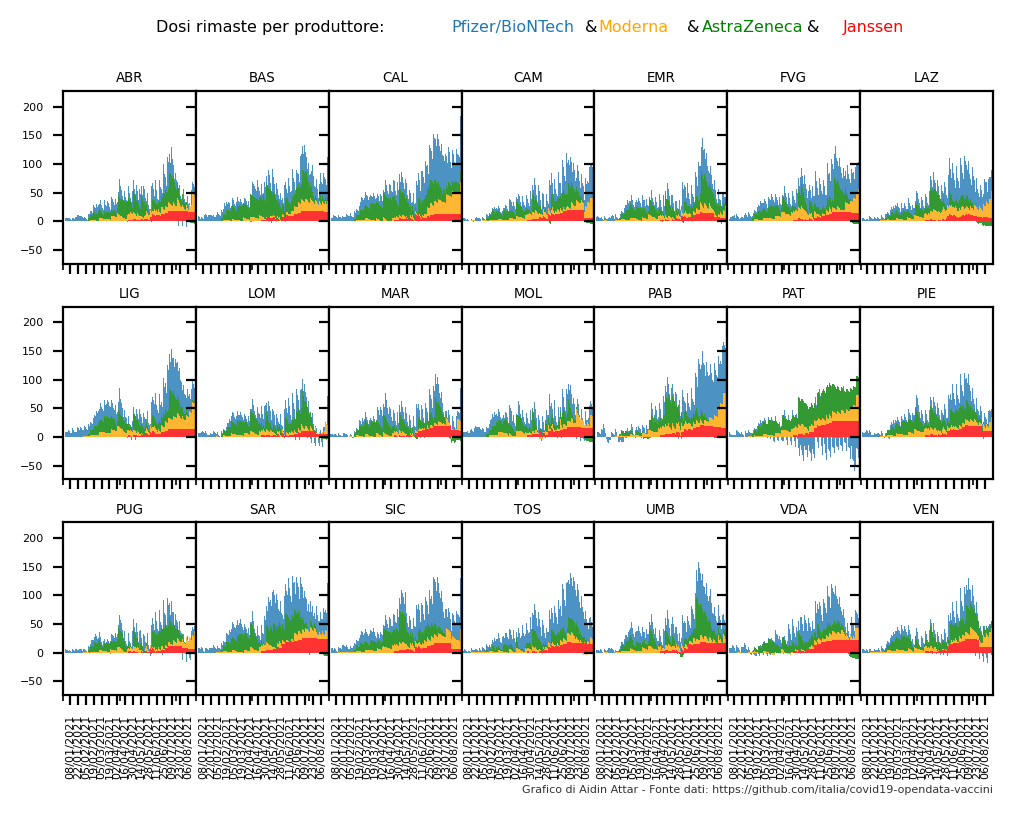

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})



abr_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[0,0],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

bas_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[0,1],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

cal_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[0,2],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

cam_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[0,3],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

emr_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[0,4],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

fvg_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[0,5],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

laz_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[0,6],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

lig_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[1,0],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

lom_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[1,1],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

mar_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[1,2],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

mol_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[1,3],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

pab_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[1,4],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

pat_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[1,5],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

pie_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[1,6],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

pug_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[2,0],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

sar_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[2,1],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

sic_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[2,2],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

tos_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[2,3],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

umb_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[2,4],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

vda_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[2,5],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

ven_sommcons[['Janssen_RIM', 'Moderna_RIM', 'AstraZeneca_RIM','Pfizer_RIM']].plot(
    ax=axes[2,6],
    kind='bar',
    stacked=True,
    mark_right=True,
    width = 1,
    alpha = 0.8,
    legend=False,
    color = [ 'red','orange','green', 'C0']
    )

axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))


plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
fig.text(0.3, 0.95, "Dosi rimaste per produttore: ", ha="center", va="bottom", size="x-large")
fig.text(0.5, 0.95, "Pfizer/BioNTech", ha="center", va="bottom", size="x-large",color="C0")
fig.text(0.565, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.6,0.95,"Moderna", ha="center", va="bottom", size="x-large",color="orange")
fig.text(0.65, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.7,0.95,"AstraZeneca", ha="center", va="bottom", size="x-large",color="green")
fig.text(0.75, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.8,0.95,"Janssen", ha="center", va="bottom", size="x-large",color="red")
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

plt.savefig('Regioni_RIM_Fornitore.png', dpi=300)


In [ ]:

ita['cumulativa_dosi'] = (lig['cumulativa_dosi'].fillna(0) + bas['cumulativa_dosi'].fillna(0) + umb['cumulativa_dosi'].fillna(0) + fvg['cumulativa_dosi'].fillna(0) + pug['cumulativa_dosi'].fillna(0) 
              + cal['cumulativa_dosi'].fillna(0) + cam['cumulativa_dosi'].fillna(0) + sic['cumulativa_dosi'].fillna(0) + sar['cumulativa_dosi'].fillna(0) + tos['cumulativa_dosi'].fillna(0)
              + mar['cumulativa_dosi'].fillna(0) + mol['cumulativa_dosi'].fillna(0) + abr['cumulativa_dosi'].fillna(0) + emr['cumulativa_dosi'].fillna(0) + lom['cumulativa_dosi'].fillna(0)
              + laz['cumulativa_dosi'].fillna(0) + pab['cumulativa_dosi'].fillna(0) + pat['cumulativa_dosi'].fillna(0) + pie['cumulativa_dosi'].fillna(0) + ven['cumulativa_dosi'].fillna(0)
              + vda['cumulativa_dosi'].fillna(0))
              
ita['numero_dosi'] = (lig['numero_dosi'].fillna(0) + bas['numero_dosi'].fillna(0) + umb['numero_dosi'].fillna(0) + fvg['numero_dosi'].fillna(0) + pug['numero_dosi'].fillna(0) 
              + cal['numero_dosi'].fillna(0) + cam['numero_dosi'].fillna(0) + sic['numero_dosi'].fillna(0) + sar['numero_dosi'].fillna(0) + tos['numero_dosi'].fillna(0)
              + mar['numero_dosi'].fillna(0) + mol['numero_dosi'].fillna(0) + abr['numero_dosi'].fillna(0) + emr['numero_dosi'].fillna(0) + lom['numero_dosi'].fillna(0)
              + laz['numero_dosi'].fillna(0) + pab['numero_dosi'].fillna(0) + pat['numero_dosi'].fillna(0) + pie['numero_dosi'].fillna(0) + ven['numero_dosi'].fillna(0)
              + vda['numero_dosi'].fillna(0))
ita['Rim_Dosi'] = ita['cumulativa_dosi'] - ita['cumulativa']
ita

area    totale  sesso_maschile  sesso_femminile  prima_dose  \
27/12/2020  ITA    7247.0          3435.0           3812.0      7233.0   
28/12/2020  ITA    1446.0           657.0            789.0      1440.0   
29/12/2020  ITA    1029.0           444.0            585.0      1024.0   
30/12/2020  ITA    4770.0          1904.0           2866.0      4757.0   
31/12/2020  ITA   25660.0          9940.0          15720.0     25564.0   
...         ...       ...             ...              ...         ...   
15/08/2021  ITA   52527.0         28870.0          23657.0     27010.0   
16/08/2021  ITA  233639.0        123914.0         109725.0    122270.0   
17/08/2021  ITA  248292.0        133022.0         115270.0    124244.0   
18/08/2021  ITA  255704.0        137087.0         118617.0    132694.0   
19/08/2021  ITA  234338.0        124766.0         109572.0    116943.0   

            seconda_dose  pregressa_infezione nome_area  per_1000  prima_1000  \
27/12/2020           0.0                  NaN    Italia  0.120063    0.119831   
28/12/2020           0.0                  NaN    Italia  0.023956    0.023857   
29/12/2020           0.0                  NaN    Italia  0.017048    0.016965   
30/12/2020           0.0                  NaN    Italia  0.079026    0.078810   
31/12/2020           0.0                  NaN    Italia  0.425116    0.423526   
...                  ...                  ...       ...       ...         ...   
15/08/2021       24361.0                  NaN    Italia  0.870229    0.447482   
16/08/2021      104642.0                  NaN    Italia  3.870759    2.025679   
17/08/2021      117257.0                  NaN    Italia  4.113519    2.058383   
18/08/2021      115336.0                  NaN    Italia  4.236315    2.198376   
19/08/2021      110673.0                  NaN    Italia  3.882339    1.937425   

            ...  cumulativa_seconda  cumulativa_1000  cumulativa_prima_1000  \
27/12/2020  ...                 0.0         0.120063               0.119831   
28/12/2020  ...                 0.0         0.144019               0.143688   
29/12/2020  ...                 0.0         0.161067               0.160653   
30/12/2020  ...                 0.0         0.240093               0.239463   
31/12/2020  ...                 0.0         0.665209               0.662989   
...         ...                 ...              ...                    ...   
15/08/2021  ...          33121345.0      1223.206693             656.752369   
16/08/2021  ...          33225987.0      1227.077452             658.778048   
17/08/2021  ...          33343244.0      1231.190971             660.836431   
18/08/2021  ...          33458580.0      1235.427286             663.034808   
19/08/2021  ...          33569253.0      1239.309626             664.972233   

            cumulativa_seconda_1000            avg  prima_perc  seconda_perc  \
27/12/2020                 0.000000            NaN    0.998068      0.000000   
28/12/2020                 0.000000    4346.500000    0.995851      0.000000   
29/12/2020                 0.000000    3240.666667    0.995141      0.000000   
30/12/2020                 0.000000    3623.000000    0.997275      0.000000   
31/12/2020                 0.000000    8030.400000    0.996259      0.000000   
...                             ...            ...         ...           ...   
15/08/2021               548.730036  278021.714286    0.514212      0.463781   
16/08/2021               550.463668  253477.428571    0.523329      0.447879   
17/08/2021               552.406296  235411.857143    0.500395      0.472254   
18/08/2021               554.317097  221038.000000    0.518936      0.451053   
19/08/2021               556.150646  206448.285714    0.499036      0.472279   

            cumulativa_dosi  numero_dosi   Rim_Dosi  
27/12/2020           9650.0       9750.0     2403.0  
28/12/2020           9650.0          0.0      957.0  
29/12/2020           9650.0          0.0      -72.0  
30/12/2020         3187

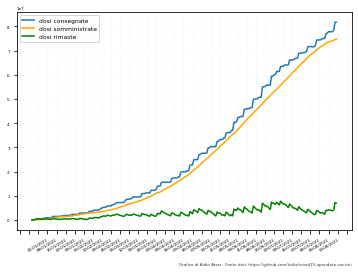

In [ ]:
plt.figure()
ax = plt.gca()
ax.plot( ita.index,ita.cumulativa_dosi, label  = "dosi consegnate", color = 'C0')
ax.plot( ita.index,ita.cumulativa, label  = "dosi somministrate", color = 'orange')
ax.plot( ita.index,ita.Rim_Dosi, label  = "dosi rimaste", color = 'green')

#ax.set(xticks=ita.index.values)

plt.legend( loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')

plt.savefig('Italia_Cons_Somm.png', dpi=300)

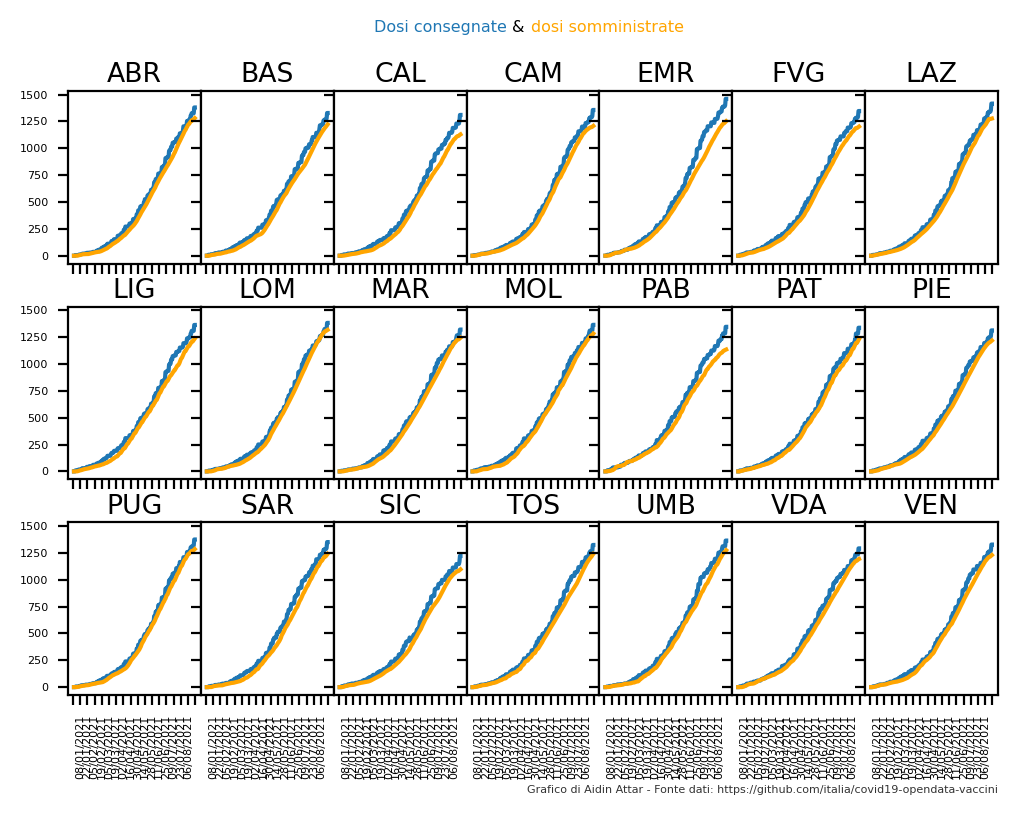

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})

axes[0,0].plot( abr.index,abr.cumulativa_dosi_1000,     color = 'C0')
axes[0,0].plot( abr.index,abr.cumulativa_1000,      color = 'orange')
axes[0,1].plot( bas.index,bas.cumulativa_dosi_1000,     color = 'C0')
axes[0,1].plot( bas.index,bas.cumulativa_1000,      color = 'orange')
axes[0,2].plot( cal.index,cal.cumulativa_dosi_1000,     color = 'C0')
axes[0,2].plot( cal.index,cal.cumulativa_1000,       color = 'orange')
axes[0,3].plot( cam.index,cam.cumulativa_dosi_1000,     color = 'C0')
axes[0,3].plot( cam.index,cam.cumulativa_1000,       color = 'orange')
axes[0,4].plot( emr.index,emr.cumulativa_dosi_1000,     color = 'C0')
axes[0,4].plot( emr.index,emr.cumulativa_1000,       color = 'orange')
axes[0,5].plot( fvg.index,fvg.cumulativa_dosi_1000,     color = 'C0')
axes[0,5].plot( fvg.index,fvg.cumulativa_1000,       color = 'orange')
axes[0,6].plot( laz.index,laz.cumulativa_dosi_1000,     color = 'C0')
axes[0,6].plot( laz.index,laz.cumulativa_1000,       color = 'orange')
axes[1,0].plot( lig.index,lig.cumulativa_dosi_1000,     color = 'C0')
axes[1,0].plot( lig.index,lig.cumulativa_1000,      color = 'orange')
axes[1,1].plot( lom.index,lom.cumulativa_dosi_1000,     color = 'C0')
axes[1,1].plot( lom.index,lom.cumulativa_1000,      color = 'orange')
axes[1,2].plot( mar.index,mar.cumulativa_dosi_1000,     color = 'C0')
axes[1,2].plot( mar.index,mar.cumulativa_1000,      color = 'orange')
axes[1,3].plot( mol.index,mol.cumulativa_dosi_1000,     color = 'C0')
axes[1,3].plot( mol.index,mol.cumulativa_1000,       color = 'orange')
axes[1,4].plot( pab.index,pab.cumulativa_dosi_1000,     color = 'C0')
axes[1,4].plot( pab.index,pab.cumulativa_1000,       color = 'orange')
axes[1,5].plot( pat.index,pat.cumulativa_dosi_1000,     color = 'C0')
axes[1,5].plot( pat.index,pat.cumulativa_1000,       color = 'orange')
axes[1,6].plot( pie.index,pie.cumulativa_dosi_1000,     color = 'C0')
axes[1,6].plot( pie.index,pie.cumulativa_1000,       color = 'orange')
axes[2,0].plot( pug.index,pug.cumulativa_dosi_1000,     color = 'C0')
axes[2,0].plot( pug.index,pug.cumulativa_1000,       color = 'orange')
axes[2,1].plot( sar.index,sar.cumulativa_dosi_1000,     color = 'C0')
axes[2,1].plot( sar.index,sar.cumulativa_1000,       color = 'orange')
axes[2,2].plot( sic.index,sic.cumulativa_dosi_1000,     color = 'C0')
axes[2,2].plot( sic.index,sic.cumulativa_1000,       color = 'orange')
axes[2,3].plot( tos.index,tos.cumulativa_dosi_1000,     color = 'C0')
axes[2,3].plot( tos.index,tos.cumulativa_1000,       color = 'orange')
axes[2,4].plot( umb.index,umb.cumulativa_dosi_1000,     color = 'C0')
axes[2,4].plot( umb.index,umb.cumulativa_1000,       color = 'orange')
axes[2,5].plot( vda.index,vda.cumulativa_dosi_1000,     color = 'C0')
axes[2,5].plot( vda.index,vda.cumulativa_1000,       color = 'orange')
axes[2,6].plot( ven.index,ven.cumulativa_dosi_1000,     color = 'C0')
axes[2,6].plot( ven.index,ven.cumulativa_1000,       color = 'orange')


axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.setp(axes[2,0].get_xticklabels(), rotation=90)
plt.setp(axes[2,1].get_xticklabels(), rotation=90)
plt.setp(axes[2,2].get_xticklabels(), rotation=90)
plt.setp(axes[2,3].get_xticklabels(), rotation=90)
plt.setp(axes[2,4].get_xticklabels(), rotation=90)
plt.setp(axes[2,5].get_xticklabels(), rotation=90)
plt.setp(axes[2,6].get_xticklabels(), rotation=90)
plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
fig.text(0.435, 0.95, "Dosi consegnate", ha="center", va="bottom", size="x-large",color="C0")
fig.text(0.5, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.575,0.95,"dosi somministrate", ha="center", va="bottom", size="x-large",color="orange")
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

plt.savefig('Regioni_Cons_Somm.png', dpi=300)

In [ ]:
ita['Pfizer_Somm'] = (lig_sommcons['Pfizer_Tot'].fillna(0) + bas_sommcons['Pfizer_Tot'].fillna(0) + umb_sommcons['Pfizer_Tot'].fillna(0) + fvg_sommcons['Pfizer_Tot'].fillna(0) + pug_sommcons['Pfizer_Tot'].fillna(0) 
              + cal_sommcons['Pfizer_Tot'].fillna(0) + cam_sommcons['Pfizer_Tot'].fillna(0) + sic_sommcons['Pfizer_Tot'].fillna(0) + sar_sommcons['Pfizer_Tot'].fillna(0) + tos_sommcons['Pfizer_Tot'].fillna(0)
              + mar_sommcons['Pfizer_Tot'].fillna(0) + mol_sommcons['Pfizer_Tot'].fillna(0) + abr_sommcons['Pfizer_Tot'].fillna(0) + emr_sommcons['Pfizer_Tot'].fillna(0) + lom_sommcons['Pfizer_Tot'].fillna(0)
              + laz_sommcons['Pfizer_Tot'].fillna(0) + pab_sommcons['Pfizer_Tot'].fillna(0) + pat_sommcons['Pfizer_Tot'].fillna(0) + pie_sommcons['Pfizer_Tot'].fillna(0) + ven_sommcons['Pfizer_Tot'].fillna(0)
              + vda_sommcons['Pfizer_Tot'].fillna(0))
 
ita['Moderna_Somm'] = (lig_sommcons['Moderna_Tot'].fillna(0) + bas_sommcons['Moderna_Tot'].fillna(0) + umb_sommcons['Moderna_Tot'].fillna(0) + fvg_sommcons['Moderna_Tot'].fillna(0) + pug_sommcons['Moderna_Tot'].fillna(0) 
              + cal_sommcons['Moderna_Tot'].fillna(0) + cam_sommcons['Moderna_Tot'].fillna(0) + sic_sommcons['Moderna_Tot'].fillna(0) + sar_sommcons['Moderna_Tot'].fillna(0) + tos_sommcons['Moderna_Tot'].fillna(0)
              + mar_sommcons['Moderna_Tot'].fillna(0) + mol_sommcons['Moderna_Tot'].fillna(0) + abr_sommcons['Moderna_Tot'].fillna(0) + emr_sommcons['Moderna_Tot'].fillna(0) + lom_sommcons['Moderna_Tot'].fillna(0)
              + laz_sommcons['Moderna_Tot'].fillna(0) + pab_sommcons['Moderna_Tot'].fillna(0) + pat_sommcons['Moderna_Tot'].fillna(0) + pie_sommcons['Moderna_Tot'].fillna(0) + ven_sommcons['Moderna_Tot'].fillna(0)
              + vda_sommcons['Moderna_Tot'].fillna(0))
              
ita['AstraZeneca_Somm'] = (lig_sommcons['AstraZeneca_Tot'].fillna(0) + bas_sommcons['AstraZeneca_Tot'].fillna(0) + umb_sommcons['AstraZeneca_Tot'].fillna(0) + fvg_sommcons['AstraZeneca_Tot'].fillna(0) + pug_sommcons['AstraZeneca_Tot'].fillna(0) 
              + cal_sommcons['AstraZeneca_Tot'].fillna(0) + cam_sommcons['AstraZeneca_Tot'].fillna(0) + sic_sommcons['AstraZeneca_Tot'].fillna(0) + sar_sommcons['AstraZeneca_Tot'].fillna(0) + tos_sommcons['AstraZeneca_Tot'].fillna(0)
              + mar_sommcons['AstraZeneca_Tot'].fillna(0) + mol_sommcons['AstraZeneca_Tot'].fillna(0) + abr_sommcons['AstraZeneca_Tot'].fillna(0) + emr_sommcons['AstraZeneca_Tot'].fillna(0) + lom_sommcons['AstraZeneca_Tot'].fillna(0)
              + laz_sommcons['AstraZeneca_Tot'].fillna(0) + pab_sommcons['AstraZeneca_Tot'].fillna(0) + pat_sommcons['AstraZeneca_Tot'].fillna(0) + pie_sommcons['AstraZeneca_Tot'].fillna(0) + ven_sommcons['AstraZeneca_Tot'].fillna(0)
              + vda_sommcons['AstraZeneca_Tot'].fillna(0))
ita['Janssen_Somm'] = (lig_sommcons['Janssen_Tot'].fillna(0) + bas_sommcons['Janssen_Tot'].fillna(0) + umb_sommcons['Janssen_Tot'].fillna(0) + fvg_sommcons['Janssen_Tot'].fillna(0) + pug_sommcons['Janssen_Tot'].fillna(0) 
              + cal_sommcons['Janssen_Tot'].fillna(0) + cam_sommcons['Janssen_Tot'].fillna(0) + sic_sommcons['Janssen_Tot'].fillna(0) + sar_sommcons['Janssen_Tot'].fillna(0) + tos_sommcons['Janssen_Tot'].fillna(0)
              + mar_sommcons['Janssen_Tot'].fillna(0) + mol_sommcons['Janssen_Tot'].fillna(0) + abr_sommcons['Janssen_Tot'].fillna(0) + emr_sommcons['Janssen_Tot'].fillna(0) + lom_sommcons['Janssen_Tot'].fillna(0)
              + laz_sommcons['Janssen_Tot'].fillna(0) + pab_sommcons['Janssen_Tot'].fillna(0) + pat_sommcons['Janssen_Tot'].fillna(0) + pie_sommcons['Janssen_Tot'].fillna(0) + ven_sommcons['Janssen_Tot'].fillna(0)
              + vda_sommcons['Janssen_Tot'].fillna(0))

ita['Pfizer_Cons'] = (lig_sommcons['Pfizer/BioNTech'].fillna(0) + bas_sommcons['Pfizer/BioNTech'].fillna(0) + umb_sommcons['Pfizer/BioNTech'].fillna(0) + fvg_sommcons['Pfizer/BioNTech'].fillna(0) + pug_sommcons['Pfizer/BioNTech'].fillna(0) 
              + cal_sommcons['Pfizer/BioNTech'].fillna(0) + cam_sommcons['Pfizer/BioNTech'].fillna(0) + sic_sommcons['Pfizer/BioNTech'].fillna(0) + sar_sommcons['Pfizer/BioNTech'].fillna(0) + tos_sommcons['Pfizer/BioNTech'].fillna(0)
              + mar_sommcons['Pfizer/BioNTech'].fillna(0) + mol_sommcons['Pfizer/BioNTech'].fillna(0) + abr_sommcons['Pfizer/BioNTech'].fillna(0) + emr_sommcons['Pfizer/BioNTech'].fillna(0) + lom_sommcons['Pfizer/BioNTech'].fillna(0)
              + laz_sommcons['Pfizer/BioNTech'].fillna(0) + pab_sommcons['Pfizer/BioNTech'].fillna(0) + pat_sommcons['Pfizer/BioNTech'].fillna(0) + pie_sommcons['Pfizer/BioNTech'].fillna(0) + ven_sommcons['Pfizer/BioNTech'].fillna(0)
              + vda_sommcons['Pfizer/BioNTech'].fillna(0))
 
ita['Moderna_Cons'] = (lig_sommcons['Moderna_y'].fillna(0) + bas_sommcons['Moderna_y'].fillna(0) + umb_sommcons['Moderna_y'].fillna(0) + fvg_sommcons['Moderna_y'].fillna(0) + pug_sommcons['Moderna_y'].fillna(0) 
              + cal_sommcons['Moderna_y'].fillna(0) + cam_sommcons['Moderna_y'].fillna(0) + sic_sommcons['Moderna_y'].fillna(0) + sar_sommcons['Moderna_y'].fillna(0) + tos_sommcons['Moderna_y'].fillna(0)
              + mar_sommcons['Moderna_y'].fillna(0) + mol_sommcons['Moderna_y'].fillna(0) + abr_sommcons['Moderna_y'].fillna(0) + emr_sommcons['Moderna_y'].fillna(0) + lom_sommcons['Moderna_y'].fillna(0)
              + laz_sommcons['Moderna_y'].fillna(0) + pab_sommcons['Moderna_y'].fillna(0) + pat_sommcons['Moderna_y'].fillna(0) + pie_sommcons['Moderna_y'].fillna(0) + ven_sommcons['Moderna_y'].fillna(0)
              + vda_sommcons['Moderna_y'].fillna(0))
              
ita['AstraZeneca_Cons'] = (lig_sommcons['AstraZeneca_y'].fillna(0) + bas_sommcons['AstraZeneca_y'].fillna(0) + umb_sommcons['AstraZeneca_y'].fillna(0) + fvg_sommcons['AstraZeneca_y'].fillna(0) + pug_sommcons['AstraZeneca_y'].fillna(0) 
              + cal_sommcons['AstraZeneca_y'].fillna(0) + cam_sommcons['AstraZeneca_y'].fillna(0) + sic_sommcons['AstraZeneca_y'].fillna(0) + sar_sommcons['AstraZeneca_y'].fillna(0) + tos_sommcons['AstraZeneca_y'].fillna(0)
              + mar_sommcons['AstraZeneca_y'].fillna(0) + mol_sommcons['AstraZeneca_y'].fillna(0) + abr_sommcons['AstraZeneca_y'].fillna(0) + emr_sommcons['AstraZeneca_y'].fillna(0) + lom_sommcons['AstraZeneca_y'].fillna(0)
              + laz_sommcons['AstraZeneca_y'].fillna(0) + pab_sommcons['AstraZeneca_y'].fillna(0) + pat_sommcons['AstraZeneca_y'].fillna(0) + pie_sommcons['AstraZeneca_y'].fillna(0) + ven_sommcons['AstraZeneca_y'].fillna(0)
              + vda_sommcons['AstraZeneca_y'].fillna(0))

ita['Janssen_Cons'] = (lig_sommcons['Janssen_y'].fillna(0) + bas_sommcons['Janssen_y'].fillna(0) + umb_sommcons['Janssen_y'].fillna(0) + fvg_sommcons['Janssen_y'].fillna(0) + pug_sommcons['Janssen_y'].fillna(0) 
              + cal_sommcons['Janssen_y'].fillna(0) + cam_sommcons['Janssen_y'].fillna(0) + sic_sommcons['Janssen_y'].fillna(0) + sar_sommcons['Janssen_y'].fillna(0) + tos_sommcons['Janssen_y'].fillna(0)
              + mar_sommcons['Janssen_y'].fillna(0) + mol_sommcons['Janssen_y'].fillna(0) + abr_sommcons['Janssen_y'].fillna(0) + emr_sommcons['Janssen_y'].fillna(0) + lom_sommcons['Janssen_y'].fillna(0)
              + laz_sommcons['Janssen_y'].fillna(0) + pab_sommcons['Janssen_y'].fillna(0) + pat_sommcons['Janssen_y'].fillna(0) + pie_sommcons['Janssen_y'].fillna(0) + ven_sommcons['Janssen_y'].fillna(0)
              + vda_sommcons['Janssen_y'].fillna(0))

ita['Pfizer_CUM'] = ita['Pfizer_Somm'].cumsum()
ita['Moderna_CUM'] = ita['Moderna_Somm'].cumsum()
ita['AstraZeneca_CUM'] = ita['AstraZeneca_Somm'].cumsum()
ita['Pfizer_Cons_CUM'] = ita['Pfizer_Cons'].cumsum()
ita['Moderna_Cons_CUM'] = ita['Moderna_Cons'].cumsum()
ita['AstraZeneca_Cons_CUM'] = ita['AstraZeneca_Cons'].cumsum()

ita['Perc_Pfizer'] = ita['Pfizer_CUM'] / ita['Pfizer_Cons_CUM'] * 100
ita['Perc_Moderna'] = ita['Moderna_CUM'] / ita['Moderna_Cons_CUM'] * 100
ita['Perc_AstraZeneca'] = ita['AstraZeneca_CUM'] / ita['AstraZeneca_Cons_CUM'] * 100

ita['Rim_Pfizer'] = ita['Pfizer_Cons_CUM'] - ita['Pfizer_CUM']
ita['Rim_Moderna'] = ita['Moderna_Cons_CUM'] - ita['Moderna_CUM'] 
ita['Rim_AstraZeneca'] = ita['AstraZeneca_Cons_CUM'] - ita['AstraZeneca_CUM']
ita['Janssen_CUM'] = ita['Janssen_Somm'].cumsum()

ita['Janssen_Cons_CUM'] = ita['Janssen_Cons'].cumsum()
ita['Perc_Janssen'] = ita['Janssen_CUM'] / ita['Janssen_Cons_CUM'] * 100
ita['Rim_Janssen'] = ita['Janssen_Cons_CUM'] - ita['Janssen_CUM']

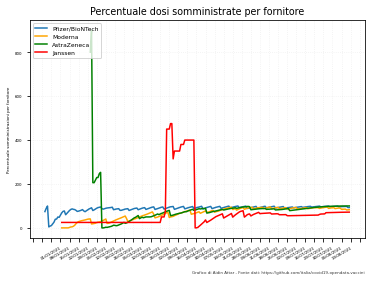

In [ ]:
plt.figure()
ax = plt.gca()
ax.plot( ita.index,ita.Perc_Pfizer, label  = "Pfizer/BioNTech", color = 'C0')
ax.plot( ita.index,ita.Perc_Moderna, label  = "Moderna", color = 'orange')
ax.plot( ita.index,ita.Perc_AstraZeneca, label  = "AstraZeneca", color = 'green')
ax.plot( ita.index,ita.Perc_Janssen, label  = "Janssen", color = 'red')
#ax.set(xticks=ita.index.values)

plt.legend( loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
plt.title('Percentuale dosi somministrate per fornitore')
ax.set(ylabel='Percentuale somministrazioni per fornitore')
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')

plt.savefig('Italia_Fornitore_Perc.png', dpi=300)

In [ ]:
abr_sommcons['AstraZeneca_Perc'] = abr_sommcons['CUM_SOMM_AstraZeneca'] / abr_sommcons['cumulativa_AstraZeneca'] * 100
abr_sommcons['Moderna_Perc']     = abr_sommcons['CUM_SOMM_Moderna'] / abr_sommcons['cumulativa_Moderna'] * 100
abr_sommcons['Pfizer_Perc']      = abr_sommcons['CUM_SOMM_Pfizer'] / abr_sommcons['cumulativa_Pfizer'] * 100
abr_sommcons['Janssen_Perc']      = abr_sommcons['CUM_SOMM_Janssen'] / abr_sommcons['cumulativa_Janssen'] * 100

bas_sommcons['AstraZeneca_Perc'] = bas_sommcons['CUM_SOMM_AstraZeneca'] / bas_sommcons['cumulativa_AstraZeneca'] * 100
bas_sommcons['Moderna_Perc']     = bas_sommcons['CUM_SOMM_Moderna'] / bas_sommcons['cumulativa_Moderna'] * 100
bas_sommcons['Pfizer_Perc']      = bas_sommcons['CUM_SOMM_Pfizer'] / bas_sommcons['cumulativa_Pfizer'] * 100
bas_sommcons['Janssen_Perc']      = bas_sommcons['CUM_SOMM_Janssen'] / bas_sommcons['cumulativa_Janssen'] * 100

cal_sommcons['AstraZeneca_Perc'] = cal_sommcons['CUM_SOMM_AstraZeneca'] / cal_sommcons['cumulativa_AstraZeneca'] * 100
cal_sommcons['Moderna_Perc']     = cal_sommcons['CUM_SOMM_Moderna'] / cal_sommcons['cumulativa_Moderna'] * 100
cal_sommcons['Pfizer_Perc']      = cal_sommcons['CUM_SOMM_Pfizer'] / cal_sommcons['cumulativa_Pfizer'] * 100
cal_sommcons['Janssen_Perc']      = cal_sommcons['CUM_SOMM_Janssen'] / cal_sommcons['cumulativa_Janssen'] * 100

cam_sommcons['AstraZeneca_Perc'] = cam_sommcons['CUM_SOMM_AstraZeneca'] / cam_sommcons['cumulativa_AstraZeneca'] * 100
cam_sommcons['Moderna_Perc']     = cam_sommcons['CUM_SOMM_Moderna'] / cam_sommcons['cumulativa_Moderna'] * 100
cam_sommcons['Pfizer_Perc']      = cam_sommcons['CUM_SOMM_Pfizer'] / cam_sommcons['cumulativa_Pfizer'] * 100
cam_sommcons['Janssen_Perc']      = cam_sommcons['CUM_SOMM_Janssen'] / cam_sommcons['cumulativa_Janssen'] * 100

emr_sommcons['AstraZeneca_Perc'] = emr_sommcons['CUM_SOMM_AstraZeneca'] / emr_sommcons['cumulativa_AstraZeneca'] * 100
emr_sommcons['Moderna_Perc']     = emr_sommcons['CUM_SOMM_Moderna'] / emr_sommcons['cumulativa_Moderna'] * 100
emr_sommcons['Pfizer_Perc']      = emr_sommcons['CUM_SOMM_Pfizer'] / emr_sommcons['cumulativa_Pfizer'] * 100
emr_sommcons['Janssen_Perc']      = emr_sommcons['CUM_SOMM_Janssen'] / emr_sommcons['cumulativa_Janssen'] * 100

fvg_sommcons['AstraZeneca_Perc'] = fvg_sommcons['CUM_SOMM_AstraZeneca'] / fvg_sommcons['cumulativa_AstraZeneca'] * 100
fvg_sommcons['Moderna_Perc']     = fvg_sommcons['CUM_SOMM_Moderna'] / fvg_sommcons['cumulativa_Moderna'] * 100
fvg_sommcons['Pfizer_Perc']      = fvg_sommcons['CUM_SOMM_Pfizer'] / fvg_sommcons['cumulativa_Pfizer'] * 100
fvg_sommcons['Janssen_Perc']      = fvg_sommcons['CUM_SOMM_Janssen'] / fvg_sommcons['cumulativa_Janssen'] * 100

laz_sommcons['AstraZeneca_Perc'] = laz_sommcons['CUM_SOMM_AstraZeneca'] / laz_sommcons['cumulativa_AstraZeneca'] * 100
laz_sommcons['Moderna_Perc']     = laz_sommcons['CUM_SOMM_Moderna'] / laz_sommcons['cumulativa_Moderna'] * 100
laz_sommcons['Pfizer_Perc']      = laz_sommcons['CUM_SOMM_Pfizer'] / laz_sommcons['cumulativa_Pfizer'] * 100
laz_sommcons['Janssen_Perc']      = laz_sommcons['CUM_SOMM_Janssen'] / laz_sommcons['cumulativa_Janssen'] * 100

lig_sommcons['AstraZeneca_Perc'] = lig_sommcons['CUM_SOMM_AstraZeneca'] / lig_sommcons['cumulativa_AstraZeneca'] * 100
lig_sommcons['Moderna_Perc']     = lig_sommcons['CUM_SOMM_Moderna'] / lig_sommcons['cumulativa_Moderna'] * 100
lig_sommcons['Pfizer_Perc']      = lig_sommcons['CUM_SOMM_Pfizer'] / lig_sommcons['cumulativa_Pfizer'] * 100
lig_sommcons['Janssen_Perc']      = lig_sommcons['CUM_SOMM_Janssen'] / lig_sommcons['cumulativa_Janssen'] * 100

lom_sommcons['AstraZeneca_Perc'] = lom_sommcons['CUM_SOMM_AstraZeneca'] / lom_sommcons['cumulativa_AstraZeneca'] * 100
lom_sommcons['Moderna_Perc']     = lom_sommcons['CUM_SOMM_Moderna'] / lom_sommcons['cumulativa_Moderna'] * 100
lom_sommcons['Pfizer_Perc']      = lom_sommcons['CUM_SOMM_Pfizer'] / lom_sommcons['cumulativa_Pfizer'] * 100
lom_sommcons['Janssen_Perc']      = lom_sommcons['CUM_SOMM_Janssen'] / lom_sommcons['cumulativa_Janssen'] * 100

mar_sommcons['AstraZeneca_Perc'] = mar_sommcons['CUM_SOMM_AstraZeneca'] / mar_sommcons['cumulativa_AstraZeneca'] * 100
mar_sommcons['Moderna_Perc']     = mar_sommcons['CUM_SOMM_Moderna'] / mar_sommcons['cumulativa_Moderna'] * 100
mar_sommcons['Pfizer_Perc']      = mar_sommcons['CUM_SOMM_Pfizer'] / mar_sommcons['cumulativa_Pfizer'] * 100
mar_sommcons['Janssen_Perc']      = mar_sommcons['CUM_SOMM_Janssen'] / mar_sommcons['cumulativa_Janssen'] * 100

mol_sommcons['AstraZeneca_Perc'] = mol_sommcons['CUM_SOMM_AstraZeneca'] / mol_sommcons['cumulativa_AstraZeneca'] * 100
mol_sommcons['Moderna_Perc']     = mol_sommcons['CUM_SOMM_Moderna'] / mol_sommcons['cumulativa_Moderna'] * 100
mol_sommcons['Pfizer_Perc']      = mol_sommcons['CUM_SOMM_Pfizer'] / mol_sommcons['cumulativa_Pfizer'] * 100
mol_sommcons['Janssen_Perc']      = mol_sommcons['CUM_SOMM_Janssen'] / mol_sommcons['cumulativa_Janssen'] * 100

pab_sommcons['AstraZeneca_Perc'] = pab_sommcons['CUM_SOMM_AstraZeneca'] / pab_sommcons['cumulativa_AstraZeneca'] * 100
pab_sommcons['Moderna_Perc']     = pab_sommcons['CUM_SOMM_Moderna'] / pab_sommcons['cumulativa_Moderna'] * 100
pab_sommcons['Pfizer_Perc']      = pab_sommcons['CUM_SOMM_Pfizer'] / pab_sommcons['cumulativa_Pfizer'] * 100
pab_sommcons['Janssen_Perc']      = pab_sommcons['CUM_SOMM_Janssen'] / pab_sommcons['cumulativa_Janssen'] * 100

pat_sommcons['AstraZeneca_Perc'] = pat_sommcons['CUM_SOMM_AstraZeneca'] / pat_sommcons['cumulativa_AstraZeneca'] * 100
pat_sommcons['Moderna_Perc']     = pat_sommcons['CUM_SOMM_Moderna'] / pat_sommcons['cumulativa_Moderna'] * 100
pat_sommcons['Pfizer_Perc']      = pat_sommcons['CUM_SOMM_Pfizer'] / pat_sommcons['cumulativa_Pfizer'] * 100
pat_sommcons['Janssen_Perc']      = pat_sommcons['CUM_SOMM_Janssen'] / pat_sommcons['cumulativa_Janssen'] * 100

pie_sommcons['AstraZeneca_Perc'] = pie_sommcons['CUM_SOMM_AstraZeneca'] / pie_sommcons['cumulativa_AstraZeneca'] * 100
pie_sommcons['Moderna_Perc']     = pie_sommcons['CUM_SOMM_Moderna'] / pie_sommcons['cumulativa_Moderna'] * 100
pie_sommcons['Pfizer_Perc']      = pie_sommcons['CUM_SOMM_Pfizer'] / pie_sommcons['cumulativa_Pfizer'] * 100
pie_sommcons['Janssen_Perc']      = pie_sommcons['CUM_SOMM_Janssen'] / pie_sommcons['cumulativa_Janssen'] * 100

pug_sommcons['AstraZeneca_Perc'] = pug_sommcons['CUM_SOMM_AstraZeneca'] / pug_sommcons['cumulativa_AstraZeneca'] * 100
pug_sommcons['Moderna_Perc']     = pug_sommcons['CUM_SOMM_Moderna'] / pug_sommcons['cumulativa_Moderna'] * 100
pug_sommcons['Pfizer_Perc']      = pug_sommcons['CUM_SOMM_Pfizer'] / pug_sommcons['cumulativa_Pfizer'] * 100
pug_sommcons['Janssen_Perc']      = pug_sommcons['CUM_SOMM_Janssen'] / pug_sommcons['cumulativa_Janssen'] * 100

sar_sommcons['AstraZeneca_Perc'] = sar_sommcons['CUM_SOMM_AstraZeneca'] / sar_sommcons['cumulativa_AstraZeneca'] * 100
sar_sommcons['Moderna_Perc']     = sar_sommcons['CUM_SOMM_Moderna'] / sar_sommcons['cumulativa_Moderna'] * 100
sar_sommcons['Pfizer_Perc']      = sar_sommcons['CUM_SOMM_Pfizer'] / sar_sommcons['cumulativa_Pfizer'] * 100
sar_sommcons['Janssen_Perc']      = sar_sommcons['CUM_SOMM_Janssen'] / sar_sommcons['cumulativa_Janssen'] * 100

sic_sommcons['AstraZeneca_Perc'] = sic_sommcons['CUM_SOMM_AstraZeneca'] / sic_sommcons['cumulativa_AstraZeneca'] * 100
sic_sommcons['Moderna_Perc']     = sic_sommcons['CUM_SOMM_Moderna'] / sic_sommcons['cumulativa_Moderna'] * 100
sic_sommcons['Pfizer_Perc']      = sic_sommcons['CUM_SOMM_Pfizer'] / sic_sommcons['cumulativa_Pfizer'] * 100
sic_sommcons['Janssen_Perc']      = sic_sommcons['CUM_SOMM_Janssen'] / sic_sommcons['cumulativa_Janssen'] * 100

tos_sommcons['AstraZeneca_Perc'] = tos_sommcons['CUM_SOMM_AstraZeneca'] / tos_sommcons['cumulativa_AstraZeneca'] * 100
tos_sommcons['Moderna_Perc']     = tos_sommcons['CUM_SOMM_Moderna'] / tos_sommcons['cumulativa_Moderna'] * 100
tos_sommcons['Pfizer_Perc']      = tos_sommcons['CUM_SOMM_Pfizer'] / tos_sommcons['cumulativa_Pfizer'] * 100
tos_sommcons['Janssen_Perc']      = tos_sommcons['CUM_SOMM_Janssen'] / tos_sommcons['cumulativa_Janssen'] * 100

umb_sommcons['AstraZeneca_Perc'] = umb_sommcons['CUM_SOMM_AstraZeneca'] / umb_sommcons['cumulativa_AstraZeneca'] * 100
umb_sommcons['Moderna_Perc']     = umb_sommcons['CUM_SOMM_Moderna'] / umb_sommcons['cumulativa_Moderna'] * 100
umb_sommcons['Pfizer_Perc']      = umb_sommcons['CUM_SOMM_Pfizer'] / umb_sommcons['cumulativa_Pfizer'] * 100
umb_sommcons['Janssen_Perc']      = umb_sommcons['CUM_SOMM_Janssen'] / umb_sommcons['cumulativa_Janssen'] * 100

vda_sommcons['AstraZeneca_Perc'] = vda_sommcons['CUM_SOMM_AstraZeneca'] / vda_sommcons['cumulativa_AstraZeneca'] * 100
vda_sommcons['Moderna_Perc']     = vda_sommcons['CUM_SOMM_Moderna'] / vda_sommcons['cumulativa_Moderna'] * 100
vda_sommcons['Pfizer_Perc']      = vda_sommcons['CUM_SOMM_Pfizer'] / vda_sommcons['cumulativa_Pfizer'] * 100
vda_sommcons['Janssen_Perc']      = vda_sommcons['CUM_SOMM_Janssen'] / vda_sommcons['cumulativa_Janssen'] * 100

ven_sommcons['AstraZeneca_Perc'] = ven_sommcons['CUM_SOMM_AstraZeneca'] / ven_sommcons['cumulativa_AstraZeneca'] * 100
ven_sommcons['Moderna_Perc']     = ven_sommcons['CUM_SOMM_Moderna'] / ven_sommcons['cumulativa_Moderna'] * 100
ven_sommcons['Pfizer_Perc']      = ven_sommcons['CUM_SOMM_Pfizer'] / ven_sommcons['cumulativa_Pfizer'] * 100
ven_sommcons['Janssen_Perc']      = ven_sommcons['CUM_SOMM_Janssen'] / ven_sommcons['cumulativa_Janssen'] * 100



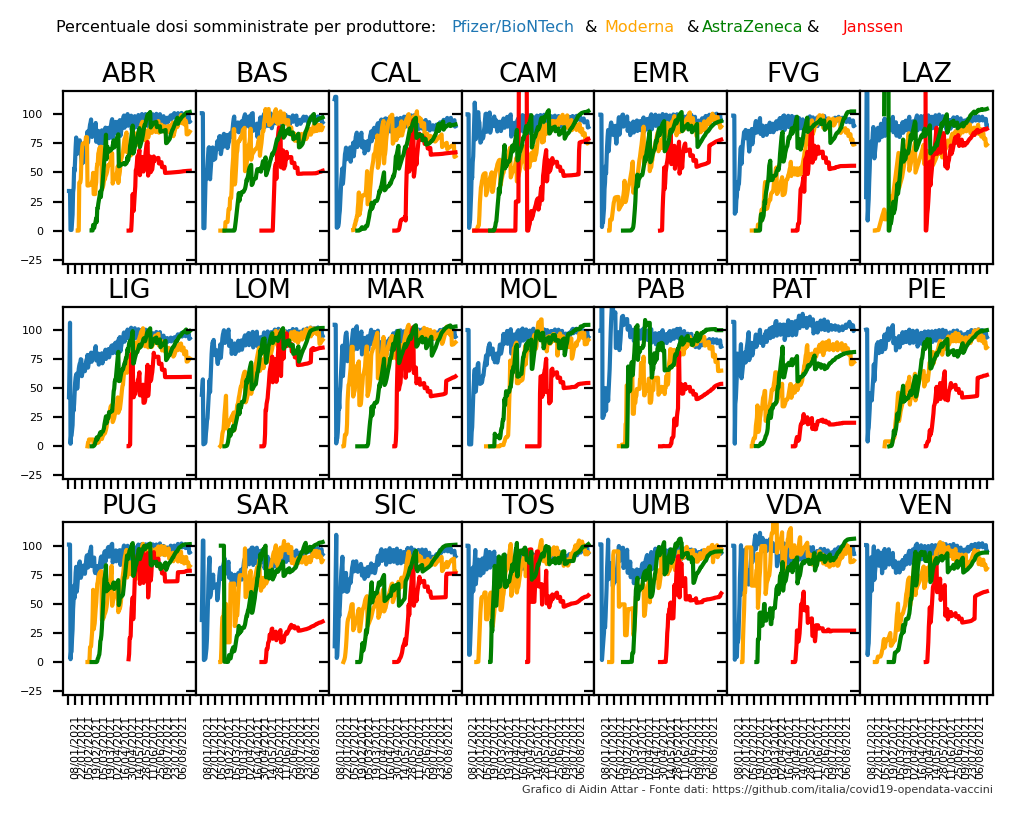

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=7, sharey=True, sharex=True, dpi = 200, gridspec_kw={'hspace': 0.25, 'wspace': 0.})



axes[0,0].plot( abr_sommcons.index,abr_sommcons.Pfizer_Perc,     color = 'C0')
axes[0,0].plot( abr_sommcons.index,abr_sommcons.Moderna_Perc,      color = 'orange')
axes[0,0].plot( abr_sommcons.index,abr_sommcons.Janssen_Perc,      color = 'red')
axes[0,0].plot( abr_sommcons.index,abr_sommcons.AstraZeneca_Perc,      color = 'green')
axes[0,1].plot( bas_sommcons.index,bas_sommcons.Pfizer_Perc,     color = 'C0')
axes[0,1].plot( bas_sommcons.index,bas_sommcons.Moderna_Perc,      color = 'orange')
axes[0,1].plot( bas_sommcons.index,bas_sommcons.Janssen_Perc,      color = 'red')
axes[0,1].plot( bas_sommcons.index,bas_sommcons.AstraZeneca_Perc,      color = 'green')
axes[0,2].plot( cal_sommcons.index,cal_sommcons.Pfizer_Perc,     color = 'C0')
axes[0,2].plot( cal_sommcons.index,cal_sommcons.Moderna_Perc,       color = 'orange')
axes[0,2].plot( cal_sommcons.index,cal_sommcons.Janssen_Perc,      color = 'red')
axes[0,2].plot( cal_sommcons.index,cal_sommcons.AstraZeneca_Perc,      color = 'green')
axes[0,3].plot( cam_sommcons.index,cam_sommcons.Pfizer_Perc,     color = 'C0')
axes[0,3].plot( cam_sommcons.index,cam_sommcons.Moderna_Perc,       color = 'orange')
axes[0,3].plot( cam_sommcons.index,cam_sommcons.Janssen_Perc,      color = 'red')
axes[0,3].plot( cam_sommcons.index,cam_sommcons.AstraZeneca_Perc,      color = 'green')
axes[0,4].plot( emr_sommcons.index,emr_sommcons.Pfizer_Perc,     color = 'C0')
axes[0,4].plot( emr_sommcons.index,emr_sommcons.Moderna_Perc,       color = 'orange')
axes[0,4].plot( emr_sommcons.index,emr_sommcons.Janssen_Perc,      color = 'red')
axes[0,4].plot( emr_sommcons.index,emr_sommcons.AstraZeneca_Perc,      color = 'green')
axes[0,5].plot( fvg_sommcons.index,fvg_sommcons.Pfizer_Perc,     color = 'C0')
axes[0,5].plot( fvg_sommcons.index,fvg_sommcons.Moderna_Perc,       color = 'orange')
axes[0,5].plot( fvg_sommcons.index,fvg_sommcons.Janssen_Perc,      color = 'red')
axes[0,5].plot( fvg_sommcons.index,fvg_sommcons.AstraZeneca_Perc,      color = 'green')
axes[0,6].plot( laz_sommcons.index,laz_sommcons.Pfizer_Perc,     color = 'C0')
axes[0,6].plot( laz_sommcons.index,laz_sommcons.Moderna_Perc,       color = 'orange')
axes[0,6].plot( laz_sommcons.index,laz_sommcons.Janssen_Perc,      color = 'red')
axes[0,6].plot( laz_sommcons.index,laz_sommcons.AstraZeneca_Perc,      color = 'green')
axes[1,0].plot( lig_sommcons.index,lig_sommcons.Pfizer_Perc,     color = 'C0')
axes[1,0].plot( lig_sommcons.index,lig_sommcons.Moderna_Perc,      color = 'orange')
axes[1,0].plot( lig_sommcons.index,lig_sommcons.Janssen_Perc,      color = 'red')
axes[1,0].plot( lig_sommcons.index,lig_sommcons.AstraZeneca_Perc,      color = 'green')
axes[1,1].plot( lom_sommcons.index,lom_sommcons.Pfizer_Perc,     color = 'C0')
axes[1,1].plot( lom_sommcons.index,lom_sommcons.Moderna_Perc,      color = 'orange')
axes[1,1].plot( lom_sommcons.index,lom_sommcons.Janssen_Perc,      color = 'red')
axes[1,1].plot( lom_sommcons.index,lom_sommcons.AstraZeneca_Perc,      color = 'green')
axes[1,2].plot( mar_sommcons.index,mar_sommcons.Pfizer_Perc,     color = 'C0')
axes[1,2].plot( mar_sommcons.index,mar_sommcons.Moderna_Perc,      color = 'orange')
axes[1,2].plot( mar_sommcons.index,mar_sommcons.Janssen_Perc,      color = 'red')
axes[1,2].plot( mar_sommcons.index,mar_sommcons.AstraZeneca_Perc,      color = 'green')
axes[1,3].plot( mol_sommcons.index,mol_sommcons.Pfizer_Perc,     color = 'C0')
axes[1,3].plot( mol_sommcons.index,mol_sommcons.Moderna_Perc,       color = 'orange')
axes[1,3].plot( mol_sommcons.index,mol_sommcons.Janssen_Perc,      color = 'red')
axes[1,3].plot( mol_sommcons.index,mol_sommcons.AstraZeneca_Perc,      color = 'green')
axes[1,4].plot( pab_sommcons.index,pab_sommcons.Pfizer_Perc,     color = 'C0')
axes[1,4].plot( pab_sommcons.index,pab_sommcons.Moderna_Perc,       color = 'orange')
axes[1,4].plot( pab_sommcons.index,pab_sommcons.Janssen_Perc,      color = 'red')
axes[1,4].plot( pab_sommcons.index,pab_sommcons.AstraZeneca_Perc,      color = 'green')
axes[1,5].plot( pat_sommcons.index,pat_sommcons.Pfizer_Perc,     color = 'C0')
axes[1,5].plot( pat_sommcons.index,pat_sommcons.Moderna_Perc,       color = 'orange')
axes[1,5].plot( pat_sommcons.index,pat_sommcons.Janssen_Perc,      color = 'red')
axes[1,5].plot( pat_sommcons.index,pat_sommcons.AstraZeneca_Perc,      color = 'green')
axes[1,6].plot( pie_sommcons.index,pie_sommcons.Pfizer_Perc,     color = 'C0')
axes[1,6].plot( pie_sommcons.index,pie_sommcons.Moderna_Perc,       color = 'orange')
axes[1,6].plot( pie_sommcons.index,pie_sommcons.Janssen_Perc,      color = 'red')
axes[1,6].plot( pie_sommcons.index,pie_sommcons.AstraZeneca_Perc,      color = 'green')
axes[2,0].plot( pug_sommcons.index,pug_sommcons.Pfizer_Perc,     color = 'C0')
axes[2,0].plot( pug_sommcons.index,pug_sommcons.Moderna_Perc,       color = 'orange')
axes[2,0].plot( pug_sommcons.index,pug_sommcons.Janssen_Perc,      color = 'red')
axes[2,0].plot( pug_sommcons.index,pug_sommcons.AstraZeneca_Perc,      color = 'green')
axes[2,1].plot( sar_sommcons.index,sar_sommcons.Pfizer_Perc,     color = 'C0')
axes[2,1].plot( sar_sommcons.index,sar_sommcons.Moderna_Perc,       color = 'orange')
axes[2,1].plot( sar_sommcons.index,sar_sommcons.Janssen_Perc,      color = 'red')
axes[2,1].plot( sar_sommcons.index,sar_sommcons.AstraZeneca_Perc,      color = 'green')
axes[2,2].plot( sic_sommcons.index,sic_sommcons.Pfizer_Perc,     color = 'C0')
axes[2,2].plot( sic_sommcons.index,sic_sommcons.Moderna_Perc,       color = 'orange')
axes[2,2].plot( sic_sommcons.index,sic_sommcons.Janssen_Perc,      color = 'red')
axes[2,2].plot( sic_sommcons.index,sic_sommcons.AstraZeneca_Perc,      color = 'green')
axes[2,3].plot( tos_sommcons.index,tos_sommcons.Pfizer_Perc,     color = 'C0')
axes[2,3].plot( tos_sommcons.index,tos_sommcons.Moderna_Perc,       color = 'orange')
axes[2,3].plot( tos_sommcons.index,tos_sommcons.Janssen_Perc,      color = 'red')
axes[2,3].plot( tos_sommcons.index,tos_sommcons.AstraZeneca_Perc,      color = 'green')
axes[2,4].plot( umb_sommcons.index,umb_sommcons.Pfizer_Perc,     color = 'C0')
axes[2,4].plot( umb_sommcons.index,umb_sommcons.Moderna_Perc,       color = 'orange')
axes[2,4].plot( umb_sommcons.index,umb_sommcons.Janssen_Perc,      color = 'red')
axes[2,4].plot( umb_sommcons.index,umb_sommcons.AstraZeneca_Perc,      color = 'green')
axes[2,5].plot( vda_sommcons.index,vda_sommcons.Pfizer_Perc,     color = 'C0')
axes[2,5].plot( vda_sommcons.index,vda_sommcons.Moderna_Perc,       color = 'orange')
axes[2,5].plot( vda_sommcons.index,vda_sommcons.Janssen_Perc,      color = 'red')
axes[2,5].plot( vda_sommcons.index,vda_sommcons.AstraZeneca_Perc,      color = 'green')
axes[2,6].plot( ven_sommcons.index,ven_sommcons.Pfizer_Perc,     color = 'C0')
axes[2,6].plot( ven_sommcons.index,ven_sommcons.Moderna_Perc,       color = 'orange')
axes[2,6].plot( ven_sommcons.index,ven_sommcons.Janssen_Perc,      color = 'red')
axes[2,6].plot( ven_sommcons.index,ven_sommcons.AstraZeneca_Perc,      color = 'green')

axes[0,0].set_title('ABR', y=1.05, pad=0)
axes[0,1].set_title('BAS', y=1.05, pad=0)
axes[0,2].set_title('CAL', y=1.05, pad=0)
axes[0,3].set_title('CAM', y=1.05, pad=0)
axes[0,4].set_title('EMR', y=1.05, pad=0)
axes[0,5].set_title('FVG', y=1.05, pad=0)
axes[0,6].set_title('LAZ', y=1.05, pad=0)
axes[1,0].set_title('LIG', y=1.05, pad=0)
axes[1,1].set_title('LOM', y=1.05, pad=0)
axes[1,2].set_title('MAR', y=1.05, pad=0)
axes[1,3].set_title('MOL', y=1.05, pad=0)
axes[1,4].set_title('PAB', y=1.05, pad=0)
axes[1,5].set_title('PAT', y=1.05, pad=0)
axes[1,6].set_title('PIE', y=1.05, pad=0)
axes[2,0].set_title('PUG', y=1.05, pad=0)
axes[2,1].set_title('SAR', y=1.05, pad=0)
axes[2,2].set_title('SIC', y=1.05, pad=0)
axes[2,3].set_title('TOS', y=1.05, pad=0)
axes[2,4].set_title('UMB', y=1.05, pad=0)
axes[2,5].set_title('VDA', y=1.05, pad=0)
axes[2,6].set_title('VEN', y=1.05, pad=0)

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.ylim(top = 120)
plt.setp(axes[2,0].get_xticklabels(), rotation=90)
plt.setp(axes[2,1].get_xticklabels(), rotation=90)
plt.setp(axes[2,2].get_xticklabels(), rotation=90)
plt.setp(axes[2,3].get_xticklabels(), rotation=90)
plt.setp(axes[2,4].get_xticklabels(), rotation=90)
plt.setp(axes[2,5].get_xticklabels(), rotation=90)
plt.setp(axes[2,6].get_xticklabels(), rotation=90)
plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
fig.text(0.28, 0.95, "Percentuale dosi somministrate per produttore: ", ha="center", va="bottom", size="x-large")
fig.text(0.5, 0.95, "Pfizer/BioNTech", ha="center", va="bottom", size="x-large",color="C0")
fig.text(0.565, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.605,0.95,"Moderna", ha="center", va="bottom", size="x-large",color="orange")
fig.text(0.65, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.7,0.95,"AstraZeneca", ha="center", va="bottom", size="x-large",color="green")
fig.text(0.75, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.8,0.95,"Janssen", ha="center", va="bottom", size="x-large",color="red")
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')

plt.savefig('Regioni_Fornitore_Perc.png', dpi=300)

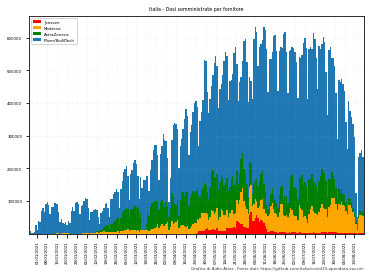

In [ ]:
plt.figure()
ax = plt.gca()

legend = ['Janssen','Moderna', 'AstraZeneca', 'Pfizer/BioNTech', ]
colors = ['red','orange', 'green', 'C0']
ita[['Janssen_Somm','Moderna_Somm','AstraZeneca_Somm', 'Pfizer_Somm' ]].plot(
    ax = ax,
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Italia - Dosi somministrate per fornitore',
    width = 1,
    alpha = 1,
    color = colors
    )
plt.legend(legend, loc = 'upper left')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')
plt.savefig('Italia_Fornitore_Tot.png', dpi=1000)

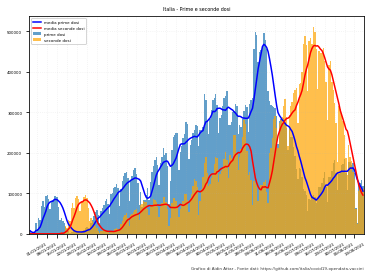

In [ ]:
ita['avg_prima'] = ita['prima_dose'].rolling(window=7, min_periods=1).mean()
ita['avg_seconda'] = ita['seconda_dose'].rolling(window=7, min_periods=1).mean()

plt.figure()
ax = plt.gca()
ita['prima_dose'].plot(ax = ax, kind = 'bar', title = "Italia - Prime e seconde dosi", label = 'prime dosi',
                                             xlabel = '', color = 'C0', width = 1, alpha = 0.7)

ita['seconda_dose'].plot(ax = ax, kind = 'bar', label = 'seconde dosi',
                                             xlabel = '', color = 'orange', alpha = 0.7, width = 1)
ax.plot( ita.index,ita.avg_prima, label  = "media prime dosi", color = 'blue')
ax.plot( ita.index,ita.avg_seconda, label  = "media seconde dosi", color = 'red')

plt.legend(loc="upper left")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')


plt.savefig('Italia_Prime_Seconde_Giorn.png', dpi=1000)

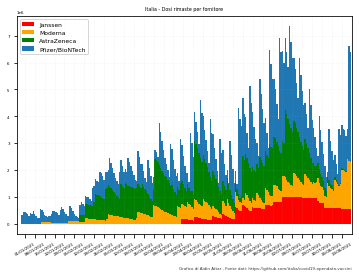

In [ ]:
plt.figure()
ax = plt.gca()

legend = ['Janssen','Moderna', 'AstraZeneca', 'Pfizer/BioNTech', ]
colors = ['red','orange', 'green', 'C0']
ita[['Rim_Janssen','Rim_Moderna','Rim_AstraZeneca', 'Rim_Pfizer' ]].plot(
    ax = ax,
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Italia - Dosi rimaste per fornitore',
    width = 1,
    alpha = 1,
    color = colors
    )

plt.legend(legend, loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')

plt.savefig('Italia_Fornitore_Rim.png', dpi=300)


In [ ]:
somm1_grouped = somm1.groupby(somm1.fascia_anagrafica)
somm1_12     = somm1_grouped.get_group('12-19')
somm1_12 =somm1_12.groupby("data_somministrazione").sum()
somm1_12['totale'] = somm1_12['sesso_maschile'] + somm1_12['sesso_femminile']

somm1_20     = somm1_grouped.get_group('20-29')
somm1_20 =somm1_20.groupby("data_somministrazione").sum()
somm1_20['totale'] = somm1_20['sesso_maschile'] + somm1_20['sesso_femminile']

somm1_30     = somm1_grouped.get_group('30-39')
somm1_30 =somm1_30.groupby("data_somministrazione").sum()
somm1_30['totale'] = somm1_30['sesso_maschile'] + somm1_30['sesso_femminile']

somm1_40     = somm1_grouped.get_group('40-49')
somm1_40 =somm1_40.groupby("data_somministrazione").sum()
somm1_40['totale'] = somm1_40['sesso_maschile'] + somm1_40['sesso_femminile']

somm1_50     = somm1_grouped.get_group('50-59')
somm1_50 =somm1_50.groupby("data_somministrazione").sum()
somm1_50['totale'] = somm1_50['sesso_maschile'] + somm1_50['sesso_femminile']

somm1_60     = somm1_grouped.get_group('60-69')
somm1_60 =somm1_60.groupby("data_somministrazione").sum()
somm1_60['totale'] = somm1_60['sesso_maschile'] + somm1_60['sesso_femminile']

somm1_70     = somm1_grouped.get_group('70-79')
somm1_70 =somm1_70.groupby("data_somministrazione").sum()
somm1_70['totale'] = somm1_70['sesso_maschile'] + somm1_70['sesso_femminile']

somm1_80     = somm1_grouped.get_group('80-89')
somm1_80 =somm1_80.groupby("data_somministrazione").sum()
somm1_80['totale'] = somm1_80['sesso_maschile'] + somm1_80['sesso_femminile']

somm1_90     = somm1_grouped.get_group('90+')
somm1_90 =somm1_90.groupby("data_somministrazione").sum()
somm1_90['totale'] = somm1_90['sesso_maschile'] + somm1_90['sesso_femminile']

In [ ]:
popolazione = pd.read_csv('popolazione.csv')
popolazione

ITTER107 Territorio TIPO_DATO15 Tipo di indicatore demografico  \
0            IT     Italia         JAN      popolazione al 1º gennaio   
1            IT     Italia         JAN      popolazione al 1º gennaio   
2            IT     Italia         JAN      popolazione al 1º gennaio   
3            IT     Italia         JAN      popolazione al 1º gennaio   
4            IT     Italia         JAN      popolazione al 1º gennaio   
...         ...        ...         ...                            ...   
289165    ITG28   Oristano         JAN      popolazione al 1º gennaio   
289166    ITG28   Oristano         JAN      popolazione al 1º gennaio   
289167    ITG28   Oristano         JAN      popolazione al 1º gennaio   
289168    ITG28   Oristano         JAN      popolazione al 1º gennaio   
289169    ITG28   Oristano         JAN      popolazione al 1º gennaio   

        SEXISTAT1    Sesso     ETA1             Età  STATCIV2  \
0               1   maschi       Y0          0 anni         1   
1               1   maschi       Y0          0 anni        99   
2               2  femmine       Y0          0 anni         1   
3               2  femmine       Y0          0 anni        99   
4               9   totale       Y0          0 anni         1   
...           ...      ...      ...             ...       ...   
289165          9   totale  Y_GE100  100 anni e più        16   
289166          9   totale  Y_GE100  100 anni e più        17   
289167          9   totale    TOTAL          totale        15   
289168          9   totale    TOTAL          totale        16   
289169          9   totale    TOTAL          totale        17   

                                           Stato civile  TIME  \
0                                         nubile/celibe  2020   
1                                                totale  2020   
2                                         nubile/celibe  2020   
3                                                totale  2020   
4                                         nubile/celibe  2020   
...                                                 ...   ...   
289165  già in unione civile (per decesso del partner)   2020   
289166   già in unione civile (per scioglimento unione)  2020   
289167                              unito/a civilmente   2020   
289168  già in unione civile (per decesso del partner)   2020   
289169   già in unione civile (per scioglimento unione)  2020   

        Seleziona periodo   Value  Flag Codes  Flags  
0                    2020  212756         NaN    NaN  
1                    2020  212756         NaN    NaN  
2                    2020  202218         NaN    NaN  
3                    2020  202218         NaN    NaN  
4                    2020  414974         NaN    NaN  
...                   ...     ...         ...    ...  
289165               2020       0         NaN    NaN  
289166               2020       0         NaN    NaN  
289167               2020       9         NaN    NaN  
289168               2020       0         NaN    NaN  
289169               2020       1         NaN    NaN  

[289170 rows x 15 columns]

In [ ]:
popolazione_grouped = popolazione.groupby(popolazione.Territorio)
popolazione_ita     = popolazione_grouped.get_group('Italia')
popolazione_grouped = popolazione_ita.groupby(popolazione_ita.Sesso)
popolazione_ita     = popolazione_grouped.get_group('totale')
popolazione_grouped = popolazione_ita.groupby(popolazione_ita['Stato civile'])
popolazione_ita     = popolazione_grouped.get_group('totale')
popolazione_ita     = popolazione_ita.reset_index(drop=True)

popolazione_ita

ITTER107 Territorio TIPO_DATO15 Tipo di indicatore demografico  SEXISTAT1  \
0         IT     Italia         JAN      popolazione al 1º gennaio          9   
1         IT     Italia         JAN      popolazione al 1º gennaio          9   
2         IT     Italia         JAN      popolazione al 1º gennaio          9   
3         IT     Italia         JAN      popolazione al 1º gennaio          9   
4         IT     Italia         JAN      popolazione al 1º gennaio          9   
..       ...        ...         ...                            ...        ...   
97        IT     Italia         JAN      popolazione al 1º gennaio          9   
98        IT     Italia         JAN      popolazione al 1º gennaio          9   
99        IT     Italia         JAN      popolazione al 1º gennaio          9   
100       IT     Italia         JAN      popolazione al 1º gennaio          9   
101       IT     Italia         JAN      popolazione al 1º gennaio          9   

      Sesso     ETA1             Età  STATCIV2 Stato civile  TIME  \
0    totale       Y0          0 anni        99       totale  2020   
1    totale       Y1          1 anni        99       totale  2020   
2    totale       Y2          2 anni        99       totale  2020   
3    totale       Y3          3 anni        99       totale  2020   
4    totale       Y4          4 anni        99       totale  2020   
..      ...      ...             ...       ...          ...   ...   
97   totale      Y97         97 anni        99       totale  2020   
98   totale      Y98         98 anni        99       totale  2020   
99   totale      Y99         99 anni        99       totale  2020   
100  totale  Y_GE100  100 anni e più        99       totale  2020   
101  totale    TOTAL          totale        99       totale  2020   

     Seleziona periodo     Value  Flag Codes  Flags  
0                 2020    414974         NaN    NaN  
1                 2020    436785         NaN    NaN  
2                 2020    457314         NaN    NaN  
3                 2020    471696         NaN    NaN  
4                 2020    483769         NaN    NaN  
..                 ...       ...         ...    ...  
97                2020     29302         NaN    NaN  
98                2020     20560         NaN    NaN  
99                2020     13421         NaN    NaN  
100               2020     14804         NaN    NaN  
101               2020  59641488         NaN    NaN  

[102 rows x 15 columns]

In [ ]:
ita_0_11=0
ita_12_19=0
ita_20_29=0
ita_30_39=0
ita_40_49=0
ita_50_59=0
ita_60_69=0
ita_70_79=0
ita_80_89=0
ita_90=0

for i in range(0, 12):
    ita_0_11 += popolazione_ita['Value'][i]
for i in range(12, 20):
    ita_12_19 += popolazione_ita['Value'][i]
for i in range(20, 30):
    ita_20_29 += popolazione_ita['Value'][i]
for i in range(30, 40):
    ita_30_39 += popolazione_ita['Value'][i]
for i in range(40, 50):
    ita_40_49 += popolazione_ita['Value'][i]
for i in range(50, 60):
    ita_50_59 += popolazione_ita['Value'][i]
for i in range(60, 70):
    ita_60_69 += popolazione_ita['Value'][i]
for i in range(70, 80):
    ita_70_79 += popolazione_ita['Value'][i]
for i in range(80, 90):
    ita_80_89 += popolazione_ita['Value'][i]
for i in range(90, 101):
    ita_90 += popolazione_ita['Value'][i]

In [ ]:
ita_età = pd.DataFrame()
ita_età['12-19'] = somm1_12['totale']
ita_età['20-29'] = somm1_20['totale']
ita_età['30-39'] = somm1_30['totale']
ita_età['40-49'] = somm1_40['totale']
ita_età['50-59'] = somm1_50['totale']
ita_età['60-69'] = somm1_60['totale']
ita_età['70-79'] = somm1_70['totale']
ita_età['80-89'] = somm1_80['totale']
ita_età[  '90+'] = somm1_90['totale']

ita_età['12-19_prima'] = somm1_12['prima_dose']
ita_età['20-29_prima'] = somm1_20['prima_dose']
ita_età['30-39_prima'] = somm1_30['prima_dose']
ita_età['40-49_prima'] = somm1_40['prima_dose']
ita_età['50-59_prima'] = somm1_50['prima_dose']
ita_età['60-69_prima'] = somm1_60['prima_dose']
ita_età['70-79_prima'] = somm1_70['prima_dose']
ita_età['80-89_prima'] = somm1_80['prima_dose']
ita_età[ '90+_prima'] = somm1_90['prima_dose']
ita_età['12-19_seconda'] = somm1_12['seconda_dose']
ita_età['20-29_seconda'] = somm1_20['seconda_dose']
ita_età['30-39_seconda'] = somm1_30['seconda_dose']
ita_età['40-49_seconda'] = somm1_40['seconda_dose']
ita_età['50-59_seconda'] = somm1_50['seconda_dose']
ita_età['60-69_seconda'] = somm1_60['seconda_dose']
ita_età['70-79_seconda'] = somm1_70['seconda_dose']
ita_età['80-89_seconda'] = somm1_80['seconda_dose']
ita_età[  '90+_seconda'] = somm1_90['seconda_dose']

ita_età.index = pd.DatetimeIndex(ita_età.index)
ita_età = ita_età.reindex(idx)
ita_età.index = ita_età.index.strftime('%d/%m/%Y')
ita_età

12-19    20-29    30-39    40-49    50-59    60-69   70-79  \
27/12/2020      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
28/12/2020      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
29/12/2020      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
30/12/2020      2.0    482.0    867.0   1223.0   1272.0    573.0    95.0   
31/12/2020     23.0   2413.0   4328.0   5766.0   7146.0   3570.0   581.0   
...             ...      ...      ...      ...      ...      ...     ...   
15/08/2021   8526.0  10188.0  11642.0   9806.0   8060.0   3219.0   870.0   
16/08/2021  55234.0  48392.0  41457.0  38293.0  25376.0  17479.0  5642.0   
17/08/2021  53852.0  55525.0  45790.0  41017.0  25333.0  18899.0  6002.0   
18/08/2021  56179.0  54803.0  45370.0  43916.0  27615.0  18360.0  7177.0   
19/08/2021  50334.0  49584.0  43375.0  38518.0  24782.0  18435.0  7132.0   

             80-89    90+  12-19_prima  ...  90+_prima  12-19_seconda  \
27/12/2020     NaN    NaN          NaN  ...        NaN            NaN   
28/12/2020     NaN    NaN          NaN  ...        NaN            NaN   
29/12/2020     NaN    NaN          NaN  ...        NaN            NaN   
30/12/2020   159.0   97.0          2.0  ...       97.0            0.0   
31/12/2020  1040.0  793.0         23.0  ...      791.0            0.0   
...            ...    ...          ...  ...        ...            ...   
15/08/2021   188.0   28.0       5954.0  ...       17.0         2431.0   
16/08/2021  1508.0  258.0      37831.0  ...      114.0        16484.0   
17/08/2021  1555.0  319.0      36043.0  ...      152.0        16921.0   
18/08/2021  1868.0  416.0      38129.0  ...      171.0        17073.0   
19/08/2021  1797.0  381.0      32777.0  ...      181.0        16717.0   

            20-29_seconda  30-39_seconda  40-49_seconda  50-59_seconda  \
27/12/2020            NaN            NaN            NaN            NaN   
28/12/2020            NaN            NaN            NaN            NaN   
29/12/2020            NaN            NaN            NaN            NaN   
30/12/2020            0.0            0.0            0.0            0.0   
31/12/2020            0.0            0.0            0.0            0.0   
...                   ...            ...            ...            ...   
15/08/2021         4268.0         5567.0         5019.0         4514.0   
16/08/2021        25198.0        18916.0        19001.0        10704.0   
17/08/2021        29773.0        22915.0        21312.0        10875.0   
18/08/2021        28176.0        21189.0        22247.0        11650.0   
19/08/2021        26657.0        21781.0        19444.0         9959.0   

            60-69_seconda  70-79_seconda  80-89_seconda  90+_seconda  
27/12/2020            NaN            NaN            NaN          NaN  
28/12/2020            NaN            NaN            NaN          NaN  
29/12/2020            NaN            NaN            NaN          NaN  
30/12/2020            0.0            0.0            0.0          0.0  
31/12/2020            0.0            0.0            0.0          0.0  
...                   ...            ...            ...          ...  
15/08/2021         2065.0          436.0           52.0          9.0  
16/08/2021        10848.0         2770.0          595.0        126.0  
17/08/2021        11848.0         2849.0          612.0        152.0  
18/08/2021        10412.0         3594.0          782.0        213.0  
19/08/2021        11384.0         3851.0          700.0        180.0  

[236 rows x 27 columns]

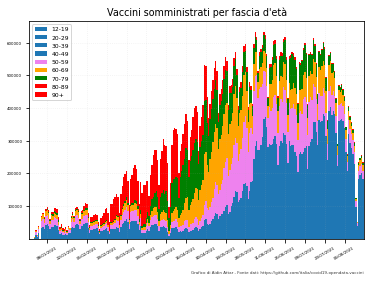

In [ ]:
plt.figure()
ax = plt.gca()
label = ['12-19', 
         '20-29', 
         '30-39',
         '40-49',
         '50-59',
         '60-69',
         '70-79',
         '80-89',
         '90+']
ita_età[['12-19', 
         '20-29', 
         '30-39',
         '40-49',
         '50-59',
         '60-69',
         '70-79',
         '80-89',
         '90+']].plot.bar(
        ax = ax,
        stacked = True,
        title = "Vaccini somministrati per fascia d'età",
        xlabel = '',
        #color = ['C0', 'orange', 'red', 'green', 'violet', 'brown', 'black', 'pink'],width = 1)
        color = ['C0', 'C0', 'C0', 'C0', 'violet', 'orange', 'green', 'red', 'red'],width = 1)
plt.legend(label, loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')

plt.savefig('Italia_Giorn_Età.png', dpi=300)

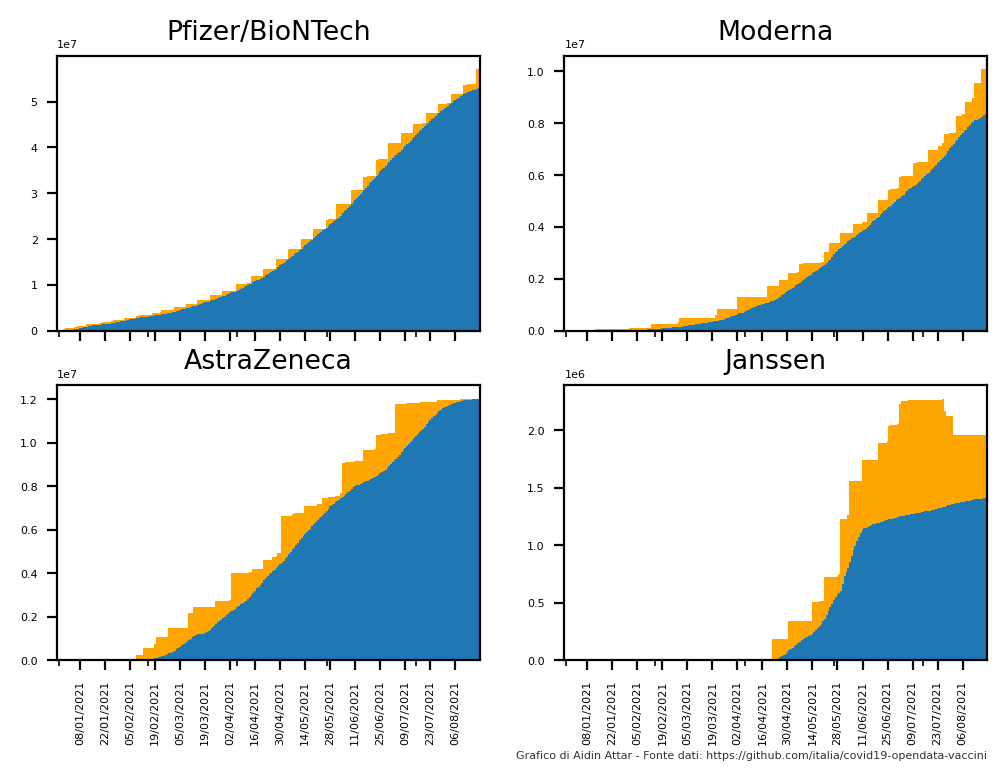

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, dpi = 200)
ita[['Pfizer_Cons_CUM']].plot.bar(
        ax = axes[0,0],
        title = "Pfizer/BioNTech",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'orange')
ita[['Pfizer_CUM']].plot.bar(
        ax = axes[0,0],
        xlabel = '',
        legend=False,
        width = 1,
        color = 'C0')

ita[['Moderna_Cons_CUM']].plot.bar(
        ax = axes[0,1],
        title = "Moderna",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'orange')
ita[['Moderna_CUM']].plot.bar(
        ax = axes[0,1],
        xlabel = '',
        legend=False,
        width = 1,
        color = 'C0')

ita[['AstraZeneca_Cons_CUM']].plot.bar(
        ax = axes[1,0],
        title = "AstraZeneca",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'orange')
ita[['AstraZeneca_CUM']].plot.bar(
        ax = axes[1,0],
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')

ita[['Janssen_Cons_CUM']].plot.bar(
        ax = axes[1,1],
        title = "Janssen",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'orange')
ita[['Janssen_CUM']].plot.bar(
        ax = axes[1,1],
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')
plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[0,1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[1,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[1,1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.savefig('Italia_Fornitori.png', dpi=300)

In [ ]:
emr_somm['Pfizer_primadose'] = somm1emr_Pfizer['prima_dose']
emr_somm['Pfizer_secondadose'] = somm1emr_Pfizer['seconda_dose']
emr_somm['Moderna_primadose'] = somm1emr_Moderna['prima_dose']
emr_somm['Moderna_secondadose'] = somm1emr_Moderna['seconda_dose']
emr_somm['AstraZeneca_primadose'] = somm1emr_AstraZeneca['prima_dose']
emr_somm['AstraZeneca_secondadose'] = somm1emr_AstraZeneca['seconda_dose']
emr_somm['Janssen_primadose'] = somm1emr_Janssen['prima_dose']
emr_somm['Janssen_secondadose'] = somm1emr_Janssen['seconda_dose']

emr_somm['Pfizer_Prima_Cum'] = emr_somm['Pfizer_primadose'].cumsum()
emr_somm['Pfizer_Seconda_Cum'] = emr_somm['Pfizer_secondadose'].cumsum()
emr_somm['Moderna_Prima_Cum'] = emr_somm['Moderna_primadose'].cumsum()
emr_somm['Moderna_Seconda_Cum'] = emr_somm['Moderna_secondadose'].cumsum()
emr_somm['AstraZeneca_Prima_Cum'] = emr_somm['AstraZeneca_primadose'].cumsum()
emr_somm['AstraZeneca_Seconda_Cum'] = emr_somm['AstraZeneca_secondadose'].cumsum()
emr_somm['Janssen_Prima_Cum'] = emr_somm['Janssen_primadose'].cumsum()
emr_somm['Janssen_Seconda_Cum'] = emr_somm['Janssen_secondadose'].cumsum()

abr_somm['Pfizer_primadose'] = somm1abr_Pfizer['prima_dose']
abr_somm['Pfizer_secondadose'] = somm1abr_Pfizer['seconda_dose']
abr_somm['Moderna_primadose'] = somm1abr_Moderna['prima_dose']
abr_somm['Moderna_secondadose'] = somm1abr_Moderna['seconda_dose']
abr_somm['AstraZeneca_primadose'] = somm1abr_AstraZeneca['prima_dose']
abr_somm['AstraZeneca_secondadose'] = somm1abr_AstraZeneca['seconda_dose']
abr_somm['Janssen_primadose'] = somm1abr_Janssen['prima_dose']
abr_somm['Janssen_secondadose'] = somm1abr_Janssen['seconda_dose']

abr_somm['Pfizer_Prima_Cum'] = abr_somm['Pfizer_primadose'].cumsum()
abr_somm['Pfizer_Seconda_Cum'] = abr_somm['Pfizer_secondadose'].cumsum()
abr_somm['Moderna_Prima_Cum'] = abr_somm['Moderna_primadose'].cumsum()
abr_somm['Moderna_Seconda_Cum'] = abr_somm['Moderna_secondadose'].cumsum()
abr_somm['AstraZeneca_Prima_Cum'] = abr_somm['AstraZeneca_primadose'].cumsum()
abr_somm['AstraZeneca_Seconda_Cum'] = abr_somm['AstraZeneca_secondadose'].cumsum()
abr_somm['Janssen_Prima_Cum'] = abr_somm['Janssen_primadose'].cumsum()
abr_somm['Janssen_Seconda_Cum'] = abr_somm['Janssen_secondadose'].cumsum()

bas_somm['Pfizer_primadose'] = somm1bas_Pfizer['prima_dose']
bas_somm['Pfizer_secondadose'] = somm1bas_Pfizer['seconda_dose']
bas_somm['Moderna_primadose'] = somm1bas_Moderna['prima_dose']
bas_somm['Moderna_secondadose'] = somm1bas_Moderna['seconda_dose']
bas_somm['AstraZeneca_primadose'] = somm1bas_AstraZeneca['prima_dose']
bas_somm['AstraZeneca_secondadose'] = somm1bas_AstraZeneca['seconda_dose']
bas_somm['Janssen_primadose'] = somm1bas_Janssen['prima_dose']
bas_somm['Janssen_secondadose'] = somm1bas_Janssen['seconda_dose']

bas_somm['Pfizer_Prima_Cum'] = bas_somm['Pfizer_primadose'].cumsum()
bas_somm['Pfizer_Seconda_Cum'] = bas_somm['Pfizer_secondadose'].cumsum()
bas_somm['Moderna_Prima_Cum'] = bas_somm['Moderna_primadose'].cumsum()
bas_somm['Moderna_Seconda_Cum'] = bas_somm['Moderna_secondadose'].cumsum()
bas_somm['AstraZeneca_Prima_Cum'] = bas_somm['AstraZeneca_primadose'].cumsum()
bas_somm['AstraZeneca_Seconda_Cum'] = bas_somm['AstraZeneca_secondadose'].cumsum()
bas_somm['Janssen_Prima_Cum'] = bas_somm['Janssen_primadose'].cumsum()
bas_somm['Janssen_Seconda_Cum'] = bas_somm['Janssen_secondadose'].cumsum()

cal_somm['Pfizer_primadose'] = somm1cal_Pfizer['prima_dose']
cal_somm['Pfizer_secondadose'] = somm1cal_Pfizer['seconda_dose']
cal_somm['Moderna_primadose'] = somm1cal_Moderna['prima_dose']
cal_somm['Moderna_secondadose'] = somm1cal_Moderna['seconda_dose']
cal_somm['AstraZeneca_primadose'] = somm1cal_AstraZeneca['prima_dose']
cal_somm['AstraZeneca_secondadose'] = somm1cal_AstraZeneca['seconda_dose']
cal_somm['Janssen_primadose'] = somm1cal_Janssen['prima_dose']
cal_somm['Janssen_secondadose'] = somm1cal_Janssen['seconda_dose']

cal_somm['Pfizer_Prima_Cum'] = cal_somm['Pfizer_primadose'].cumsum()
cal_somm['Pfizer_Seconda_Cum'] = cal_somm['Pfizer_secondadose'].cumsum()
cal_somm['Moderna_Prima_Cum'] = cal_somm['Moderna_primadose'].cumsum()
cal_somm['Moderna_Seconda_Cum'] = cal_somm['Moderna_secondadose'].cumsum()
cal_somm['AstraZeneca_Prima_Cum'] = cal_somm['AstraZeneca_primadose'].cumsum()
cal_somm['AstraZeneca_Seconda_Cum'] = cal_somm['AstraZeneca_secondadose'].cumsum()
cal_somm['Janssen_Prima_Cum'] = cal_somm['Janssen_primadose'].cumsum()
cal_somm['Janssen_Seconda_Cum'] = cal_somm['Janssen_secondadose'].cumsum()

cam_somm['Pfizer_primadose'] = somm1cam_Pfizer['prima_dose']
cam_somm['Pfizer_secondadose'] = somm1cam_Pfizer['seconda_dose']
cam_somm['Moderna_primadose'] = somm1cam_Moderna['prima_dose']
cam_somm['Moderna_secondadose'] = somm1cam_Moderna['seconda_dose']
cam_somm['AstraZeneca_primadose'] = somm1cam_AstraZeneca['prima_dose']
cam_somm['AstraZeneca_secondadose'] = somm1cam_AstraZeneca['seconda_dose']
cam_somm['Janssen_primadose'] = somm1cam_Janssen['prima_dose']
cam_somm['Janssen_secondadose'] = somm1cam_Janssen['seconda_dose']

cam_somm['Pfizer_Prima_Cum'] = cam_somm['Pfizer_primadose'].cumsum()
cam_somm['Pfizer_Seconda_Cum'] = cam_somm['Pfizer_secondadose'].cumsum()
cam_somm['Moderna_Prima_Cum'] = cam_somm['Moderna_primadose'].cumsum()
cam_somm['Moderna_Seconda_Cum'] = cam_somm['Moderna_secondadose'].cumsum()
cam_somm['AstraZeneca_Prima_Cum'] = cam_somm['AstraZeneca_primadose'].cumsum()
cam_somm['AstraZeneca_Seconda_Cum'] = cam_somm['AstraZeneca_secondadose'].cumsum()
cam_somm['Janssen_Prima_Cum'] = cam_somm['Janssen_primadose'].cumsum()
cam_somm['Janssen_Seconda_Cum'] = cam_somm['Janssen_secondadose'].cumsum()

fvg_somm['Pfizer_primadose'] = somm1fvg_Pfizer['prima_dose']
fvg_somm['Pfizer_secondadose'] = somm1fvg_Pfizer['seconda_dose']
fvg_somm['Moderna_primadose'] = somm1fvg_Moderna['prima_dose']
fvg_somm['Moderna_secondadose'] = somm1fvg_Moderna['seconda_dose']
fvg_somm['AstraZeneca_primadose'] = somm1fvg_AstraZeneca['prima_dose']
fvg_somm['AstraZeneca_secondadose'] = somm1fvg_AstraZeneca['seconda_dose']
fvg_somm['Janssen_primadose'] = somm1fvg_Janssen['prima_dose']
fvg_somm['Janssen_secondadose'] = somm1fvg_Janssen['seconda_dose']

fvg_somm['Pfizer_Prima_Cum'] = fvg_somm['Pfizer_primadose'].cumsum()
fvg_somm['Pfizer_Seconda_Cum'] = fvg_somm['Pfizer_secondadose'].cumsum()
fvg_somm['Moderna_Prima_Cum'] = fvg_somm['Moderna_primadose'].cumsum()
fvg_somm['Moderna_Seconda_Cum'] = fvg_somm['Moderna_secondadose'].cumsum()
fvg_somm['AstraZeneca_Prima_Cum'] = fvg_somm['AstraZeneca_primadose'].cumsum()
fvg_somm['AstraZeneca_Seconda_Cum'] = fvg_somm['AstraZeneca_secondadose'].cumsum()
fvg_somm['Janssen_Prima_Cum'] = fvg_somm['Janssen_primadose'].cumsum()
fvg_somm['Janssen_Seconda_Cum'] = fvg_somm['Janssen_secondadose'].cumsum()

laz_somm['Pfizer_primadose'] = somm1laz_Pfizer['prima_dose']
laz_somm['Pfizer_secondadose'] = somm1laz_Pfizer['seconda_dose']
laz_somm['Moderna_primadose'] = somm1laz_Moderna['prima_dose']
laz_somm['Moderna_secondadose'] = somm1laz_Moderna['seconda_dose']
laz_somm['AstraZeneca_primadose'] = somm1laz_AstraZeneca['prima_dose']
laz_somm['AstraZeneca_secondadose'] = somm1laz_AstraZeneca['seconda_dose']
laz_somm['Janssen_primadose'] = somm1laz_Janssen['prima_dose']
laz_somm['Janssen_secondadose'] = somm1laz_Janssen['seconda_dose']

laz_somm['Pfizer_Prima_Cum'] = laz_somm['Pfizer_primadose'].cumsum()
laz_somm['Pfizer_Seconda_Cum'] = laz_somm['Pfizer_secondadose'].cumsum()
laz_somm['Moderna_Prima_Cum'] = laz_somm['Moderna_primadose'].cumsum()
laz_somm['Moderna_Seconda_Cum'] = laz_somm['Moderna_secondadose'].cumsum()
laz_somm['AstraZeneca_Prima_Cum'] = laz_somm['AstraZeneca_primadose'].cumsum()
laz_somm['AstraZeneca_Seconda_Cum'] = laz_somm['AstraZeneca_secondadose'].cumsum()
laz_somm['Janssen_Prima_Cum'] = laz_somm['Janssen_primadose'].cumsum()
laz_somm['Janssen_Seconda_Cum'] = laz_somm['Janssen_secondadose'].cumsum()

lig_somm['Pfizer_primadose'] = somm1lig_Pfizer['prima_dose']
lig_somm['Pfizer_secondadose'] = somm1lig_Pfizer['seconda_dose']
lig_somm['Moderna_primadose'] = somm1lig_Moderna['prima_dose']
lig_somm['Moderna_secondadose'] = somm1lig_Moderna['seconda_dose']
lig_somm['AstraZeneca_primadose'] = somm1lig_AstraZeneca['prima_dose']
lig_somm['AstraZeneca_secondadose'] = somm1lig_AstraZeneca['seconda_dose']
lig_somm['Janssen_primadose'] = somm1lig_Janssen['prima_dose']
lig_somm['Janssen_secondadose'] = somm1lig_Janssen['seconda_dose']

lig_somm['Pfizer_Prima_Cum'] = lig_somm['Pfizer_primadose'].cumsum()
lig_somm['Pfizer_Seconda_Cum'] = lig_somm['Pfizer_secondadose'].cumsum()
lig_somm['Moderna_Prima_Cum'] = lig_somm['Moderna_primadose'].cumsum()
lig_somm['Moderna_Seconda_Cum'] = lig_somm['Moderna_secondadose'].cumsum()
lig_somm['AstraZeneca_Prima_Cum'] = lig_somm['AstraZeneca_primadose'].cumsum()
lig_somm['AstraZeneca_Seconda_Cum'] = lig_somm['AstraZeneca_secondadose'].cumsum()
lig_somm['Janssen_Prima_Cum'] = lig_somm['Janssen_primadose'].cumsum()
lig_somm['Janssen_Seconda_Cum'] = lig_somm['Janssen_secondadose'].cumsum()

lom_somm['Pfizer_primadose'] = somm1lom_Pfizer['prima_dose']
lom_somm['Pfizer_secondadose'] = somm1lom_Pfizer['seconda_dose']
lom_somm['Moderna_primadose'] = somm1lom_Moderna['prima_dose']
lom_somm['Moderna_secondadose'] = somm1lom_Moderna['seconda_dose']
lom_somm['AstraZeneca_primadose'] = somm1lom_AstraZeneca['prima_dose']
lom_somm['AstraZeneca_secondadose'] = somm1lom_AstraZeneca['seconda_dose']
lom_somm['Janssen_primadose'] = somm1lom_Janssen['prima_dose']
lom_somm['Janssen_secondadose'] = somm1lom_Janssen['seconda_dose']

lom_somm['Pfizer_Prima_Cum'] = lom_somm['Pfizer_primadose'].cumsum()
lom_somm['Pfizer_Seconda_Cum'] = lom_somm['Pfizer_secondadose'].cumsum()
lom_somm['Moderna_Prima_Cum'] = lom_somm['Moderna_primadose'].cumsum()
lom_somm['Moderna_Seconda_Cum'] = lom_somm['Moderna_secondadose'].cumsum()
lom_somm['AstraZeneca_Prima_Cum'] = lom_somm['AstraZeneca_primadose'].cumsum()
lom_somm['AstraZeneca_Seconda_Cum'] = lom_somm['AstraZeneca_secondadose'].cumsum()
lom_somm['Janssen_Prima_Cum'] = lom_somm['Janssen_primadose'].cumsum()
lom_somm['Janssen_Seconda_Cum'] = lom_somm['Janssen_secondadose'].cumsum()

mar_somm['Pfizer_primadose'] = somm1mar_Pfizer['prima_dose']
mar_somm['Pfizer_secondadose'] = somm1mar_Pfizer['seconda_dose']
mar_somm['Moderna_primadose'] = somm1mar_Moderna['prima_dose']
mar_somm['Moderna_secondadose'] = somm1mar_Moderna['seconda_dose']
mar_somm['AstraZeneca_primadose'] = somm1mar_AstraZeneca['prima_dose']
mar_somm['AstraZeneca_secondadose'] = somm1mar_AstraZeneca['seconda_dose']
mar_somm['Janssen_primadose'] = somm1mar_Janssen['prima_dose']
mar_somm['Janssen_secondadose'] = somm1mar_Janssen['seconda_dose']

mar_somm['Pfizer_Prima_Cum'] = mar_somm['Pfizer_primadose'].cumsum()
mar_somm['Pfizer_Seconda_Cum'] = mar_somm['Pfizer_secondadose'].cumsum()
mar_somm['Moderna_Prima_Cum'] = mar_somm['Moderna_primadose'].cumsum()
mar_somm['Moderna_Seconda_Cum'] = mar_somm['Moderna_secondadose'].cumsum()
mar_somm['AstraZeneca_Prima_Cum'] = mar_somm['AstraZeneca_primadose'].cumsum()
mar_somm['AstraZeneca_Seconda_Cum'] = mar_somm['AstraZeneca_secondadose'].cumsum()
mar_somm['Janssen_Prima_Cum'] = mar_somm['Janssen_primadose'].cumsum()
mar_somm['Janssen_Seconda_Cum'] = mar_somm['Janssen_secondadose'].cumsum()

mol_somm['Pfizer_primadose'] = somm1mol_Pfizer['prima_dose']
mol_somm['Pfizer_secondadose'] = somm1mol_Pfizer['seconda_dose']
mol_somm['Moderna_primadose'] = somm1mol_Moderna['prima_dose']
mol_somm['Moderna_secondadose'] = somm1mol_Moderna['seconda_dose']
mol_somm['AstraZeneca_primadose'] = somm1mol_AstraZeneca['prima_dose']
mol_somm['AstraZeneca_secondadose'] = somm1mol_AstraZeneca['seconda_dose']
mol_somm['Janssen_primadose'] = somm1mol_Janssen['prima_dose']
mol_somm['Janssen_secondadose'] = somm1mol_Janssen['seconda_dose']

mol_somm['Pfizer_Prima_Cum'] = mol_somm['Pfizer_primadose'].cumsum()
mol_somm['Pfizer_Seconda_Cum'] = mol_somm['Pfizer_secondadose'].cumsum()
mol_somm['Moderna_Prima_Cum'] = mol_somm['Moderna_primadose'].cumsum()
mol_somm['Moderna_Seconda_Cum'] = mol_somm['Moderna_secondadose'].cumsum()
mol_somm['AstraZeneca_Prima_Cum'] = mol_somm['AstraZeneca_primadose'].cumsum()
mol_somm['AstraZeneca_Seconda_Cum'] = mol_somm['AstraZeneca_secondadose'].cumsum()
mol_somm['Janssen_Prima_Cum'] = mol_somm['Janssen_primadose'].cumsum()
mol_somm['Janssen_Seconda_Cum'] = mol_somm['Janssen_secondadose'].cumsum()

pab_somm['Pfizer_primadose'] = somm1pab_Pfizer['prima_dose']
pab_somm['Pfizer_secondadose'] = somm1pab_Pfizer['seconda_dose']
pab_somm['Moderna_primadose'] = somm1pab_Moderna['prima_dose']
pab_somm['Moderna_secondadose'] = somm1pab_Moderna['seconda_dose']
pab_somm['AstraZeneca_primadose'] = somm1pab_AstraZeneca['prima_dose']
pab_somm['AstraZeneca_secondadose'] = somm1pab_AstraZeneca['seconda_dose']
pab_somm['Janssen_primadose'] = somm1pab_Janssen['prima_dose']
pab_somm['Janssen_secondadose'] = somm1pab_Janssen['seconda_dose']

pab_somm['Pfizer_Prima_Cum'] = pab_somm['Pfizer_primadose'].cumsum()
pab_somm['Pfizer_Seconda_Cum'] = pab_somm['Pfizer_secondadose'].cumsum()
pab_somm['Moderna_Prima_Cum'] = pab_somm['Moderna_primadose'].cumsum()
pab_somm['Moderna_Seconda_Cum'] = pab_somm['Moderna_secondadose'].cumsum()
pab_somm['AstraZeneca_Prima_Cum'] = pab_somm['AstraZeneca_primadose'].cumsum()
pab_somm['AstraZeneca_Seconda_Cum'] = pab_somm['AstraZeneca_secondadose'].cumsum()
pab_somm['Janssen_Prima_Cum'] = pab_somm['Janssen_primadose'].cumsum()
pab_somm['Janssen_Seconda_Cum'] = pab_somm['Janssen_secondadose'].cumsum()

pat_somm['Pfizer_primadose'] = somm1pat_Pfizer['prima_dose']
pat_somm['Pfizer_secondadose'] = somm1pat_Pfizer['seconda_dose']
pat_somm['Moderna_primadose'] = somm1pat_Moderna['prima_dose']
pat_somm['Moderna_secondadose'] = somm1pat_Moderna['seconda_dose']
pat_somm['AstraZeneca_primadose'] = somm1pat_AstraZeneca['prima_dose']
pat_somm['AstraZeneca_secondadose'] = somm1pat_AstraZeneca['seconda_dose']
pat_somm['Janssen_primadose'] = somm1pat_Janssen['prima_dose']
pat_somm['Janssen_secondadose'] = somm1pat_Janssen['seconda_dose']

pat_somm['Pfizer_Prima_Cum'] = pat_somm['Pfizer_primadose'].cumsum()
pat_somm['Pfizer_Seconda_Cum'] = pat_somm['Pfizer_secondadose'].cumsum()
pat_somm['Moderna_Prima_Cum'] = pat_somm['Moderna_primadose'].cumsum()
pat_somm['Moderna_Seconda_Cum'] = pat_somm['Moderna_secondadose'].cumsum()
pat_somm['AstraZeneca_Prima_Cum'] = pat_somm['AstraZeneca_primadose'].cumsum()
pat_somm['AstraZeneca_Seconda_Cum'] = pat_somm['AstraZeneca_secondadose'].cumsum()
pat_somm['Janssen_Prima_Cum'] = pat_somm['Janssen_primadose'].cumsum()
pat_somm['Janssen_Seconda_Cum'] = pat_somm['Janssen_secondadose'].cumsum()

pie_somm['Pfizer_primadose'] = somm1pie_Pfizer['prima_dose']
pie_somm['Pfizer_secondadose'] = somm1pie_Pfizer['seconda_dose']
pie_somm['Moderna_primadose'] = somm1pie_Moderna['prima_dose']
pie_somm['Moderna_secondadose'] = somm1pie_Moderna['seconda_dose']
pie_somm['AstraZeneca_primadose'] = somm1pie_AstraZeneca['prima_dose']
pie_somm['AstraZeneca_secondadose'] = somm1pie_AstraZeneca['seconda_dose']
pie_somm['Janssen_primadose'] = somm1pie_Janssen['prima_dose']
pie_somm['Janssen_secondadose'] = somm1pie_Janssen['seconda_dose']

pie_somm['Pfizer_Prima_Cum'] = pie_somm['Pfizer_primadose'].cumsum()
pie_somm['Pfizer_Seconda_Cum'] = pie_somm['Pfizer_secondadose'].cumsum()
pie_somm['Moderna_Prima_Cum'] = pie_somm['Moderna_primadose'].cumsum()
pie_somm['Moderna_Seconda_Cum'] = pie_somm['Moderna_secondadose'].cumsum()
pie_somm['AstraZeneca_Prima_Cum'] = pie_somm['AstraZeneca_primadose'].cumsum()
pie_somm['AstraZeneca_Seconda_Cum'] = pie_somm['AstraZeneca_secondadose'].cumsum()
pie_somm['Janssen_Prima_Cum'] = pie_somm['Janssen_primadose'].cumsum()
pie_somm['Janssen_Seconda_Cum'] = pie_somm['Janssen_secondadose'].cumsum()

pug_somm['Pfizer_primadose'] = somm1pug_Pfizer['prima_dose']
pug_somm['Pfizer_secondadose'] = somm1pug_Pfizer['seconda_dose']
pug_somm['Moderna_primadose'] = somm1pug_Moderna['prima_dose']
pug_somm['Moderna_secondadose'] = somm1pug_Moderna['seconda_dose']
pug_somm['AstraZeneca_primadose'] = somm1pug_AstraZeneca['prima_dose']
pug_somm['AstraZeneca_secondadose'] = somm1pug_AstraZeneca['seconda_dose']
pug_somm['Janssen_primadose'] = somm1pug_Janssen['prima_dose']
pug_somm['Janssen_secondadose'] = somm1pug_Janssen['seconda_dose']

pug_somm['Pfizer_Prima_Cum'] = pug_somm['Pfizer_primadose'].cumsum()
pug_somm['Pfizer_Seconda_Cum'] = pug_somm['Pfizer_secondadose'].cumsum()
pug_somm['Moderna_Prima_Cum'] = pug_somm['Moderna_primadose'].cumsum()
pug_somm['Moderna_Seconda_Cum'] = pug_somm['Moderna_secondadose'].cumsum()
pug_somm['AstraZeneca_Prima_Cum'] = pug_somm['AstraZeneca_primadose'].cumsum()
pug_somm['AstraZeneca_Seconda_Cum'] = pug_somm['AstraZeneca_secondadose'].cumsum()
pug_somm['Janssen_Prima_Cum'] = pug_somm['Janssen_primadose'].cumsum()
pug_somm['Janssen_Seconda_Cum'] = pug_somm['Janssen_secondadose'].cumsum()

sar_somm['Pfizer_primadose'] = somm1sar_Pfizer['prima_dose']
sar_somm['Pfizer_secondadose'] = somm1sar_Pfizer['seconda_dose']
sar_somm['Moderna_primadose'] = somm1sar_Moderna['prima_dose']
sar_somm['Moderna_secondadose'] = somm1sar_Moderna['seconda_dose']
sar_somm['AstraZeneca_primadose'] = somm1sar_AstraZeneca['prima_dose']
sar_somm['AstraZeneca_secondadose'] = somm1sar_AstraZeneca['seconda_dose']
sar_somm['Janssen_primadose'] = somm1sar_Janssen['prima_dose']
sar_somm['Janssen_secondadose'] = somm1sar_Janssen['seconda_dose']

sar_somm['Pfizer_Prima_Cum'] = sar_somm['Pfizer_primadose'].cumsum()
sar_somm['Pfizer_Seconda_Cum'] = sar_somm['Pfizer_secondadose'].cumsum()
sar_somm['Moderna_Prima_Cum'] = sar_somm['Moderna_primadose'].cumsum()
sar_somm['Moderna_Seconda_Cum'] = sar_somm['Moderna_secondadose'].cumsum()
sar_somm['AstraZeneca_Prima_Cum'] = sar_somm['AstraZeneca_primadose'].cumsum()
sar_somm['AstraZeneca_Seconda_Cum'] = sar_somm['AstraZeneca_secondadose'].cumsum()
sar_somm['Janssen_Prima_Cum'] = sar_somm['Janssen_primadose'].cumsum()
sar_somm['Janssen_Seconda_Cum'] = sar_somm['Janssen_secondadose'].cumsum()

sic_somm['Pfizer_primadose'] = somm1sic_Pfizer['prima_dose']
sic_somm['Pfizer_secondadose'] = somm1sic_Pfizer['seconda_dose']
sic_somm['Moderna_primadose'] = somm1sic_Moderna['prima_dose']
sic_somm['Moderna_secondadose'] = somm1sic_Moderna['seconda_dose']
sic_somm['AstraZeneca_primadose'] = somm1sic_AstraZeneca['prima_dose']
sic_somm['AstraZeneca_secondadose'] = somm1sic_AstraZeneca['seconda_dose']
sic_somm['Janssen_primadose'] = somm1sic_Janssen['prima_dose']
sic_somm['Janssen_secondadose'] = somm1sic_Janssen['seconda_dose']

sic_somm['Pfizer_Prima_Cum'] = sic_somm['Pfizer_primadose'].cumsum()
sic_somm['Pfizer_Seconda_Cum'] = sic_somm['Pfizer_secondadose'].cumsum()
sic_somm['Moderna_Prima_Cum'] = sic_somm['Moderna_primadose'].cumsum()
sic_somm['Moderna_Seconda_Cum'] = sic_somm['Moderna_secondadose'].cumsum()
sic_somm['AstraZeneca_Prima_Cum'] = sic_somm['AstraZeneca_primadose'].cumsum()
sic_somm['AstraZeneca_Seconda_Cum'] = sic_somm['AstraZeneca_secondadose'].cumsum()
sic_somm['Janssen_Prima_Cum'] = sic_somm['Janssen_primadose'].cumsum()
sic_somm['Janssen_Seconda_Cum'] = sic_somm['Janssen_secondadose'].cumsum()

tos_somm['Pfizer_primadose'] = somm1tos_Pfizer['prima_dose']
tos_somm['Pfizer_secondadose'] = somm1tos_Pfizer['seconda_dose']
tos_somm['Moderna_primadose'] = somm1tos_Moderna['prima_dose']
tos_somm['Moderna_secondadose'] = somm1tos_Moderna['seconda_dose']
tos_somm['AstraZeneca_primadose'] = somm1tos_AstraZeneca['prima_dose']
tos_somm['AstraZeneca_secondadose'] = somm1tos_AstraZeneca['seconda_dose']
tos_somm['Janssen_primadose'] = somm1tos_Janssen['prima_dose']
tos_somm['Janssen_secondadose'] = somm1tos_Janssen['seconda_dose']

tos_somm['Pfizer_Prima_Cum'] = tos_somm['Pfizer_primadose'].cumsum()
tos_somm['Pfizer_Seconda_Cum'] = tos_somm['Pfizer_secondadose'].cumsum()
tos_somm['Moderna_Prima_Cum'] = tos_somm['Moderna_primadose'].cumsum()
tos_somm['Moderna_Seconda_Cum'] = tos_somm['Moderna_secondadose'].cumsum()
tos_somm['AstraZeneca_Prima_Cum'] = tos_somm['AstraZeneca_primadose'].cumsum()
tos_somm['AstraZeneca_Seconda_Cum'] = tos_somm['AstraZeneca_secondadose'].cumsum()
tos_somm['Janssen_Prima_Cum'] = tos_somm['Janssen_primadose'].cumsum()
tos_somm['Janssen_Seconda_Cum'] = tos_somm['Janssen_secondadose'].cumsum()

umb_somm['Pfizer_primadose'] = somm1umb_Pfizer['prima_dose']
umb_somm['Pfizer_secondadose'] = somm1umb_Pfizer['seconda_dose']
umb_somm['Moderna_primadose'] = somm1umb_Moderna['prima_dose']
umb_somm['Moderna_secondadose'] = somm1umb_Moderna['seconda_dose']
umb_somm['AstraZeneca_primadose'] = somm1umb_AstraZeneca['prima_dose']
umb_somm['AstraZeneca_secondadose'] = somm1umb_AstraZeneca['seconda_dose']
umb_somm['Janssen_primadose'] = somm1umb_Janssen['prima_dose']
umb_somm['Janssen_secondadose'] = somm1umb_Janssen['seconda_dose']

umb_somm['Pfizer_Prima_Cum'] = umb_somm['Pfizer_primadose'].cumsum()
umb_somm['Pfizer_Seconda_Cum'] = umb_somm['Pfizer_secondadose'].cumsum()
umb_somm['Moderna_Prima_Cum'] = umb_somm['Moderna_primadose'].cumsum()
umb_somm['Moderna_Seconda_Cum'] = umb_somm['Moderna_secondadose'].cumsum()
umb_somm['AstraZeneca_Prima_Cum'] = umb_somm['AstraZeneca_primadose'].cumsum()
umb_somm['AstraZeneca_Seconda_Cum'] = umb_somm['AstraZeneca_secondadose'].cumsum()
umb_somm['Janssen_Prima_Cum'] = umb_somm['Janssen_primadose'].cumsum()
umb_somm['Janssen_Seconda_Cum'] = umb_somm['Janssen_secondadose'].cumsum()

vda_somm['Pfizer_primadose'] = somm1vda_Pfizer['prima_dose']
vda_somm['Pfizer_secondadose'] = somm1vda_Pfizer['seconda_dose']
vda_somm['Moderna_primadose'] = somm1vda_Moderna['prima_dose']
vda_somm['Moderna_secondadose'] = somm1vda_Moderna['seconda_dose']
vda_somm['AstraZeneca_primadose'] = somm1vda_AstraZeneca['prima_dose']
vda_somm['AstraZeneca_secondadose'] = somm1vda_AstraZeneca['seconda_dose']
vda_somm['Janssen_primadose'] = somm1vda_Janssen['prima_dose']
vda_somm['Janssen_secondadose'] = somm1vda_Janssen['seconda_dose']

vda_somm['Pfizer_Prima_Cum'] = vda_somm['Pfizer_primadose'].cumsum()
vda_somm['Pfizer_Seconda_Cum'] = vda_somm['Pfizer_secondadose'].cumsum()
vda_somm['Moderna_Prima_Cum'] = vda_somm['Moderna_primadose'].cumsum()
vda_somm['Moderna_Seconda_Cum'] = vda_somm['Moderna_secondadose'].cumsum()
vda_somm['AstraZeneca_Prima_Cum'] = vda_somm['AstraZeneca_primadose'].cumsum()
vda_somm['AstraZeneca_Seconda_Cum'] = vda_somm['AstraZeneca_secondadose'].cumsum()
vda_somm['Janssen_Prima_Cum'] = vda_somm['Janssen_primadose'].cumsum()
vda_somm['Janssen_Seconda_Cum'] = vda_somm['Janssen_secondadose'].cumsum()

ven_somm['Pfizer_primadose'] = somm1ven_Pfizer['prima_dose']
ven_somm['Pfizer_secondadose'] = somm1ven_Pfizer['seconda_dose']
ven_somm['Moderna_primadose'] = somm1ven_Moderna['prima_dose']
ven_somm['Moderna_secondadose'] = somm1ven_Moderna['seconda_dose']
ven_somm['AstraZeneca_primadose'] = somm1ven_AstraZeneca['prima_dose']
ven_somm['AstraZeneca_secondadose'] = somm1ven_AstraZeneca['seconda_dose']
ven_somm['Janssen_primadose'] = somm1ven_Janssen['prima_dose']
ven_somm['Janssen_secondadose'] = somm1ven_Janssen['seconda_dose']

ven_somm['Pfizer_Prima_Cum'] = ven_somm['Pfizer_primadose'].cumsum()
ven_somm['Pfizer_Seconda_Cum'] = ven_somm['Pfizer_secondadose'].cumsum()
ven_somm['Moderna_Prima_Cum'] = ven_somm['Moderna_primadose'].cumsum()
ven_somm['Moderna_Seconda_Cum'] = ven_somm['Moderna_secondadose'].cumsum()
ven_somm['AstraZeneca_Prima_Cum'] = ven_somm['AstraZeneca_primadose'].cumsum()
ven_somm['AstraZeneca_Seconda_Cum'] = ven_somm['AstraZeneca_secondadose'].cumsum()
ven_somm['Janssen_Prima_Cum'] = ven_somm['Janssen_primadose'].cumsum()
ven_somm['Janssen_Seconda_Cum'] = ven_somm['Janssen_secondadose'].cumsum()



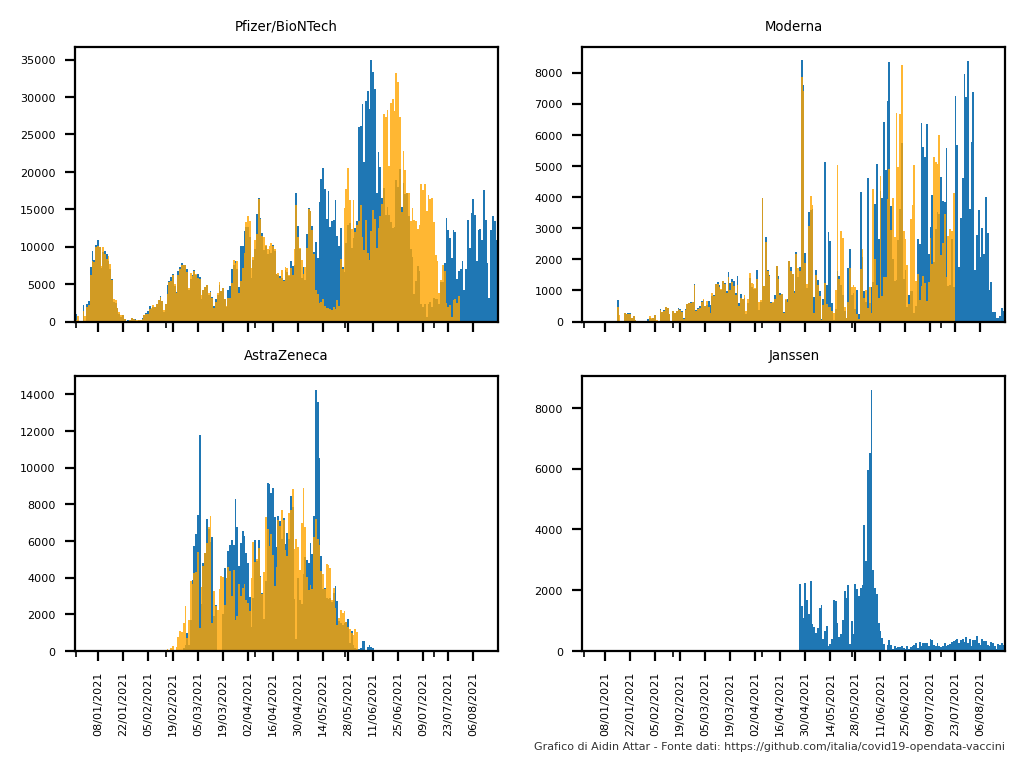

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, dpi = 200)
emr_somm[['Pfizer_primadose']].plot.bar(
        ax = axes[0,0],
        title = "Pfizer/BioNTech",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')
emr_somm[['Pfizer_secondadose']].shift(-21).plot.bar(
        ax = axes[0,0],
        xlabel = '',
        legend=False,
        width = 1,
        color = 'orange',
        alpha = 0.8)

emr_somm[['Moderna_primadose']].plot.bar(
        ax = axes[0,1],
        title = "Moderna",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')
emr_somm[['Moderna_secondadose']].shift(-28).plot.bar(
        ax = axes[0,1],
        xlabel = '',
        legend=False,
        width = 1,
        color = 'orange',
        alpha = 0.8)

emr_somm[['AstraZeneca_primadose']].plot.bar(
        ax = axes[1,0],
        title = "AstraZeneca",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')
emr_somm[['AstraZeneca_secondadose']].shift(-78).plot.bar(
        ax = axes[1,0],
        xlabel = '',
        width = 1,
        legend=False,
        color = 'orange',
        alpha = 0.8)

emr_somm[['Janssen_primadose']].plot.bar(
        ax = axes[1,1],
        title = "Janssen",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[0,1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[1,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[1,1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.savefig('Emilia_Fornitori_Shift.png', dpi=300)

In [ ]:
ita['Pfizer_primadose'] = (lig_somm['Pfizer_primadose'].fillna(0) + bas_somm['Pfizer_primadose'].fillna(0) + umb_somm['Pfizer_primadose'].fillna(0) + fvg_somm['Pfizer_primadose'].fillna(0) + pug_somm['Pfizer_primadose'].fillna(0) 
              + cal_somm['Pfizer_primadose'].fillna(0) + cam_somm['Pfizer_primadose'].fillna(0) + sic_somm['Pfizer_primadose'].fillna(0) + sar_somm['Pfizer_primadose'].fillna(0) + tos_somm['Pfizer_primadose'].fillna(0)
              + mar_somm['Pfizer_primadose'].fillna(0) + mol_somm['Pfizer_primadose'].fillna(0) + abr_somm['Pfizer_primadose'].fillna(0) + emr_somm['Pfizer_primadose'].fillna(0) + lom_somm['Pfizer_primadose'].fillna(0)
              + laz_somm['Pfizer_primadose'].fillna(0) + pab_somm['Pfizer_primadose'].fillna(0) + pat_somm['Pfizer_primadose'].fillna(0) + pie_somm['Pfizer_primadose'].fillna(0) + ven_somm['Pfizer_primadose'].fillna(0)
              + vda_somm['Pfizer_primadose'].fillna(0))
 
ita['Moderna_primadose'] = (lig_somm['Moderna_primadose'].fillna(0) + bas_somm['Moderna_primadose'].fillna(0) + umb_somm['Moderna_primadose'].fillna(0) + fvg_somm['Moderna_primadose'].fillna(0) + pug_somm['Moderna_primadose'].fillna(0) 
              + cal_somm['Moderna_primadose'].fillna(0) + cam_somm['Moderna_primadose'].fillna(0) + sic_somm['Moderna_primadose'].fillna(0) + sar_somm['Moderna_primadose'].fillna(0) + tos_somm['Moderna_primadose'].fillna(0)
              + mar_somm['Moderna_primadose'].fillna(0) + mol_somm['Moderna_primadose'].fillna(0) + abr_somm['Moderna_primadose'].fillna(0) + emr_somm['Moderna_primadose'].fillna(0) + lom_somm['Moderna_primadose'].fillna(0)
              + laz_somm['Moderna_primadose'].fillna(0) + pab_somm['Moderna_primadose'].fillna(0) + pat_somm['Moderna_primadose'].fillna(0) + pie_somm['Moderna_primadose'].fillna(0) + ven_somm['Moderna_primadose'].fillna(0)
              + vda_somm['Moderna_primadose'].fillna(0))
              
ita['AstraZeneca_primadose'] = (lig_somm['AstraZeneca_primadose'].fillna(0) + bas_somm['AstraZeneca_primadose'].fillna(0) + umb_somm['AstraZeneca_primadose'].fillna(0) + fvg_somm['AstraZeneca_primadose'].fillna(0) + pug_somm['AstraZeneca_primadose'].fillna(0) 
              + cal_somm['AstraZeneca_primadose'].fillna(0) + cam_somm['AstraZeneca_primadose'].fillna(0) + sic_somm['AstraZeneca_primadose'].fillna(0) + sar_somm['AstraZeneca_primadose'].fillna(0) + tos_somm['AstraZeneca_primadose'].fillna(0)
              + mar_somm['AstraZeneca_primadose'].fillna(0) + mol_somm['AstraZeneca_primadose'].fillna(0) + abr_somm['AstraZeneca_primadose'].fillna(0) + emr_somm['AstraZeneca_primadose'].fillna(0) + lom_somm['AstraZeneca_primadose'].fillna(0)
              + laz_somm['AstraZeneca_primadose'].fillna(0) + pab_somm['AstraZeneca_primadose'].fillna(0) + pat_somm['AstraZeneca_primadose'].fillna(0) + pie_somm['AstraZeneca_primadose'].fillna(0) + ven_somm['AstraZeneca_primadose'].fillna(0)
              + vda_somm['AstraZeneca_primadose'].fillna(0))
              
ita['Janssen_primadose'] = (lig_somm['Janssen_primadose'].fillna(0) + bas_somm['Janssen_primadose'].fillna(0) + umb_somm['Janssen_primadose'].fillna(0) + fvg_somm['Janssen_primadose'].fillna(0) + pug_somm['Janssen_primadose'].fillna(0) 
              + cal_somm['Janssen_primadose'].fillna(0) + cam_somm['Janssen_primadose'].fillna(0) + sic_somm['Janssen_primadose'].fillna(0) + sar_somm['Janssen_primadose'].fillna(0) + tos_somm['Janssen_primadose'].fillna(0)
              + mar_somm['Janssen_primadose'].fillna(0) + mol_somm['Janssen_primadose'].fillna(0) + abr_somm['Janssen_primadose'].fillna(0) + emr_somm['Janssen_primadose'].fillna(0) + lom_somm['Janssen_primadose'].fillna(0)
              + laz_somm['Janssen_primadose'].fillna(0) + pab_somm['Janssen_primadose'].fillna(0) + pat_somm['Janssen_primadose'].fillna(0) + pie_somm['Janssen_primadose'].fillna(0) + ven_somm['Janssen_primadose'].fillna(0)
              + vda_somm['Janssen_primadose'].fillna(0))

ita['Pfizer_secondadose'] = (lig_somm['Pfizer_secondadose'].fillna(0) + bas_somm['Pfizer_secondadose'].fillna(0) + umb_somm['Pfizer_secondadose'].fillna(0) + fvg_somm['Pfizer_secondadose'].fillna(0) + pug_somm['Pfizer_secondadose'].fillna(0) 
              + cal_somm['Pfizer_secondadose'].fillna(0) + cam_somm['Pfizer_secondadose'].fillna(0) + sic_somm['Pfizer_secondadose'].fillna(0) + sar_somm['Pfizer_secondadose'].fillna(0) + tos_somm['Pfizer_secondadose'].fillna(0)
              + mar_somm['Pfizer_secondadose'].fillna(0) + mol_somm['Pfizer_secondadose'].fillna(0) + abr_somm['Pfizer_secondadose'].fillna(0) + emr_somm['Pfizer_secondadose'].fillna(0) + lom_somm['Pfizer_secondadose'].fillna(0)
              + laz_somm['Pfizer_secondadose'].fillna(0) + pab_somm['Pfizer_secondadose'].fillna(0) + pat_somm['Pfizer_secondadose'].fillna(0) + pie_somm['Pfizer_secondadose'].fillna(0) + ven_somm['Pfizer_secondadose'].fillna(0)
              + vda_somm['Pfizer_secondadose'].fillna(0))
 
ita['Moderna_secondadose'] = (lig_somm['Moderna_secondadose'].fillna(0) + bas_somm['Moderna_secondadose'].fillna(0) + umb_somm['Moderna_secondadose'].fillna(0) + fvg_somm['Moderna_secondadose'].fillna(0) + pug_somm['Moderna_secondadose'].fillna(0) 
              + cal_somm['Moderna_secondadose'].fillna(0) + cam_somm['Moderna_secondadose'].fillna(0) + sic_somm['Moderna_secondadose'].fillna(0) + sar_somm['Moderna_secondadose'].fillna(0) + tos_somm['Moderna_secondadose'].fillna(0)
              + mar_somm['Moderna_secondadose'].fillna(0) + mol_somm['Moderna_secondadose'].fillna(0) + abr_somm['Moderna_secondadose'].fillna(0) + emr_somm['Moderna_secondadose'].fillna(0) + lom_somm['Moderna_secondadose'].fillna(0)
              + laz_somm['Moderna_secondadose'].fillna(0) + pab_somm['Moderna_secondadose'].fillna(0) + pat_somm['Moderna_secondadose'].fillna(0) + pie_somm['Moderna_secondadose'].fillna(0) + ven_somm['Moderna_secondadose'].fillna(0)
              + vda_somm['Moderna_secondadose'].fillna(0))
              
ita['AstraZeneca_secondadose'] = (lig_somm['AstraZeneca_secondadose'].fillna(0) + bas_somm['AstraZeneca_secondadose'].fillna(0) + umb_somm['AstraZeneca_secondadose'].fillna(0) + fvg_somm['AstraZeneca_secondadose'].fillna(0) + pug_somm['AstraZeneca_secondadose'].fillna(0) 
              + cal_somm['AstraZeneca_secondadose'].fillna(0) + cam_somm['AstraZeneca_secondadose'].fillna(0) + sic_somm['AstraZeneca_secondadose'].fillna(0) + sar_somm['AstraZeneca_secondadose'].fillna(0) + tos_somm['AstraZeneca_secondadose'].fillna(0)
              + mar_somm['AstraZeneca_secondadose'].fillna(0) + mol_somm['AstraZeneca_secondadose'].fillna(0) + abr_somm['AstraZeneca_secondadose'].fillna(0) + emr_somm['AstraZeneca_secondadose'].fillna(0) + lom_somm['AstraZeneca_secondadose'].fillna(0)
              + laz_somm['AstraZeneca_secondadose'].fillna(0) + pab_somm['AstraZeneca_secondadose'].fillna(0) + pat_somm['AstraZeneca_secondadose'].fillna(0) + pie_somm['AstraZeneca_secondadose'].fillna(0) + ven_somm['AstraZeneca_secondadose'].fillna(0)
              + vda_somm['AstraZeneca_secondadose'].fillna(0))

ita['Janssen_secondadose'] = (lig_somm['Janssen_secondadose'].fillna(0) + bas_somm['Janssen_secondadose'].fillna(0) + umb_somm['Janssen_secondadose'].fillna(0) + fvg_somm['Janssen_secondadose'].fillna(0) + pug_somm['Janssen_secondadose'].fillna(0) 
              + cal_somm['Janssen_secondadose'].fillna(0) + cam_somm['Janssen_secondadose'].fillna(0) + sic_somm['Janssen_secondadose'].fillna(0) + sar_somm['Janssen_secondadose'].fillna(0) + tos_somm['Janssen_secondadose'].fillna(0)
              + mar_somm['Janssen_secondadose'].fillna(0) + mol_somm['Janssen_secondadose'].fillna(0) + abr_somm['Janssen_secondadose'].fillna(0) + emr_somm['Janssen_secondadose'].fillna(0) + lom_somm['Janssen_secondadose'].fillna(0)
              + laz_somm['Janssen_secondadose'].fillna(0) + pab_somm['Janssen_secondadose'].fillna(0) + pat_somm['Janssen_secondadose'].fillna(0) + pie_somm['Janssen_secondadose'].fillna(0) + ven_somm['Janssen_secondadose'].fillna(0)
              + vda_somm['Janssen_secondadose'].fillna(0))

ita['Pfizer_Prima_Cum'] = ita['Pfizer_primadose'].cumsum()
ita['Pfizer_Seconda_Cum'] = ita['Pfizer_secondadose'].cumsum()
ita['Moderna_Prima_Cum'] = ita['Moderna_primadose'].cumsum()
ita['Moderna_Seconda_Cum'] = ita['Moderna_secondadose'].cumsum()
ita['AstraZeneca_Prima_Cum'] = ita['AstraZeneca_primadose'].cumsum()
ita['AstraZeneca_Seconda_Cum'] = ita['AstraZeneca_secondadose'].cumsum()
ita['Janssen_Prima_Cum'] = ita['Janssen_primadose'].cumsum()
ita['Janssen_Seconda_Cum'] = ita['Janssen_secondadose'].cumsum()

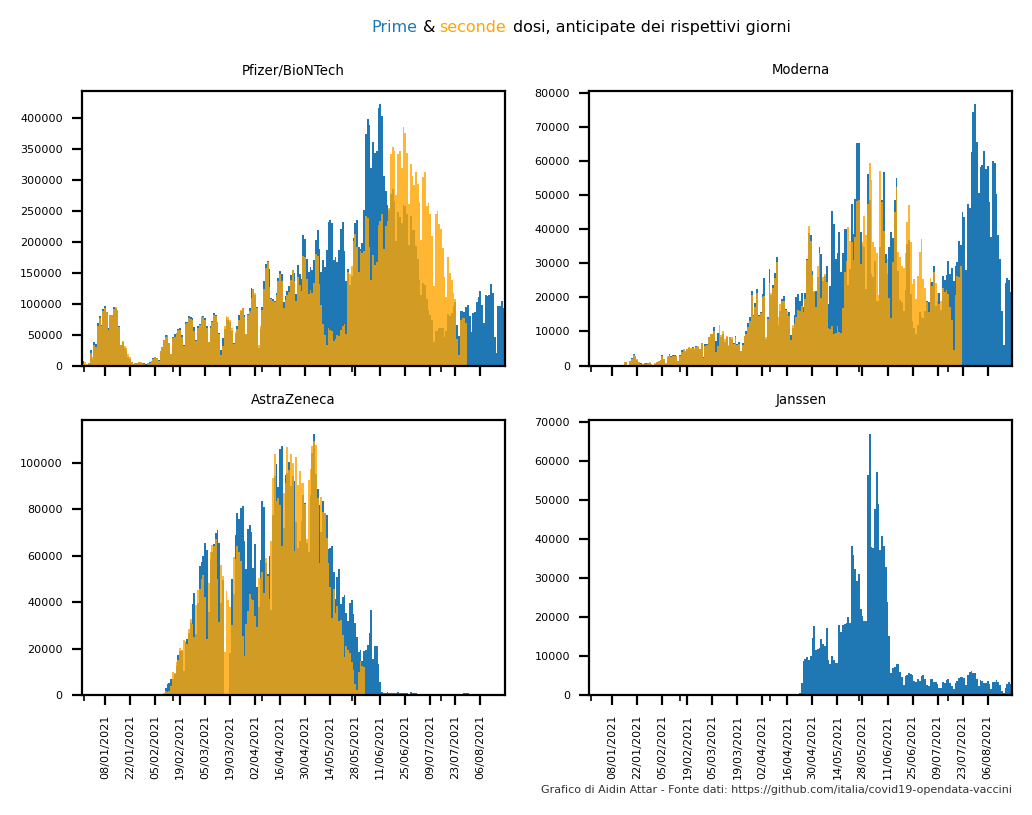

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, dpi = 200)
ita[['Pfizer_primadose']].plot.bar(
        ax = axes[0,0],
        title = "Pfizer/BioNTech",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')
ita[['Pfizer_secondadose']].shift(-21).plot.bar(
        ax = axes[0,0],
        xlabel = '',
        legend=False,
        width = 1,
        color = 'orange',
        alpha = 0.8)

ita[['Moderna_primadose']].plot.bar(
        ax = axes[0,1],
        title = "Moderna",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')
ita[['Moderna_secondadose']].shift(-28).plot.bar(
        ax = axes[0,1],
        xlabel = '',
        legend=False,
        width = 1,
        color = 'orange',
        alpha = 0.8)

ita[['AstraZeneca_primadose']].plot.bar(
        ax = axes[1,0],
        title = "AstraZeneca",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')
ita[['AstraZeneca_secondadose']].shift(-78).plot.bar(
        ax = axes[1,0],
        xlabel = '',
        width = 1,
        legend=False,
        color = 'orange',
        alpha = 0.8)

ita[['Janssen_primadose']].plot.bar(
        ax = axes[1,1],
        title = "Janssen",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[0,1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[1,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[1,1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
fig.text(0.385, 0.95, "Prime", ha="center", va="bottom", size="x-large",color="C0")
fig.text(0.414, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.45,0.95,"seconde", ha="center", va="bottom", size="x-large",color="orange")
fig.text(0.6, 0.95, "dosi, anticipate dei rispettivi giorni", ha="center", va="bottom", size="x-large")
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.savefig('Italia_Fornitori_Shift.png', dpi=300)

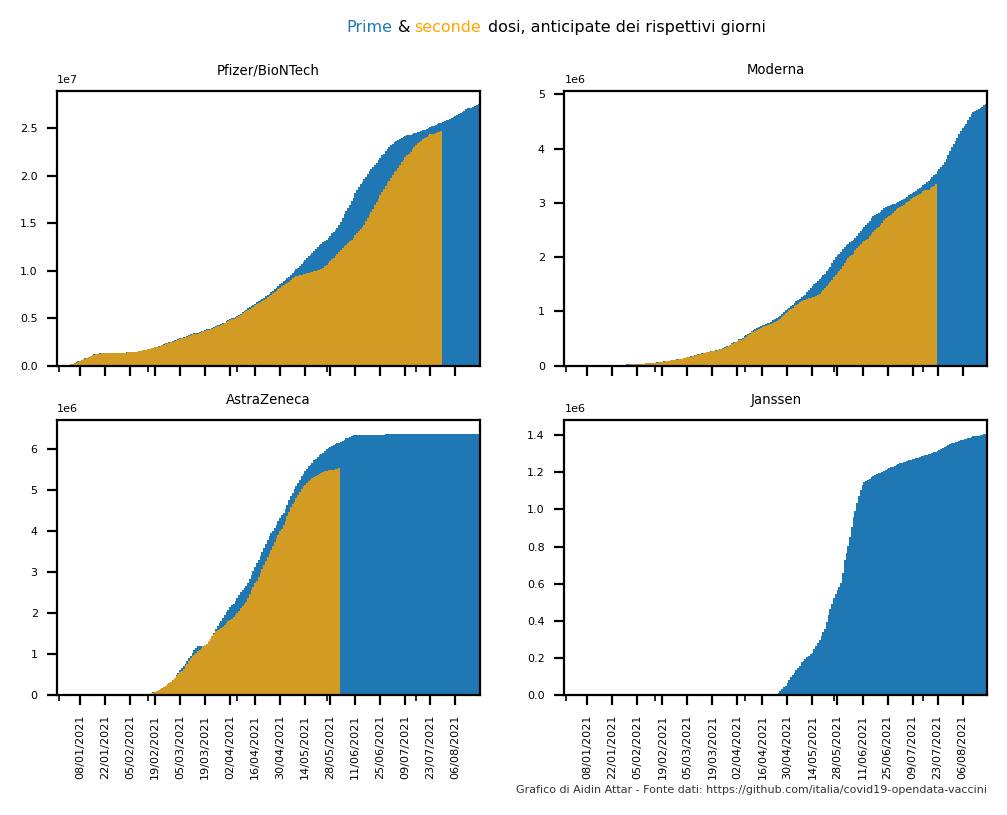

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, dpi = 200)
ita[['Pfizer_Prima_Cum']].plot.bar(
        ax = axes[0,0],
        title = "Pfizer/BioNTech",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')
ita[['Pfizer_Seconda_Cum']].shift(-21).plot.bar(
        ax = axes[0,0],
        xlabel = '',
        legend=False,
        width = 1,
        color = 'orange',
        alpha = 0.8)

ita[['Moderna_Prima_Cum']].plot.bar(
        ax = axes[0,1],
        title = "Moderna",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')
ita[['Moderna_Seconda_Cum']].shift(-28).plot.bar(
        ax = axes[0,1],
        xlabel = '',
        legend=False,
        width = 1,
        color = 'orange',
        alpha = 0.8)

ita[['AstraZeneca_Prima_Cum']].plot.bar(
        ax = axes[1,0],
        title = "AstraZeneca",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')
ita[['AstraZeneca_Seconda_Cum']].shift(-78).plot.bar(
        ax = axes[1,0],
        xlabel = '',
        width = 1,
        legend=False,
        color = 'orange',
        alpha = 0.8)

ita[['Janssen_Prima_Cum']].plot.bar(
        ax = axes[1,1],
        title = "Janssen",
        xlabel = '',
        width = 1,
        legend=False,
        color = 'C0')

plt.rcParams['font.size'] = '4'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'

axes[0,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[0,1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[1,0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
axes[1,1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
fig.text(0.385, 0.95, "Prime", ha="center", va="bottom", size="x-large",color="C0")
fig.text(0.414, 0.95, "&", ha="center", va="bottom", size="x-large")
fig.text(0.45,0.95,"seconde", ha="center", va="bottom", size="x-large",color="orange")
fig.text(0.6, 0.95, "dosi, anticipate dei rispettivi giorni", ha="center", va="bottom", size="x-large")
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.savefig('Italia_Fornitori_Shift_Cum.png', dpi=300)





      percentuale_AstraZeneca
area                         
VEN                  0.908425
VDA                  0.820528
UMB                  0.940507
TOS                  0.912282
SIC                  0.885932
SAR                  0.905232
PUG                  0.918569
PIE                  0.902235
PAT                  0.945537
PAB                  0.771961
MOL                  0.894363
MAR                  0.955399
LOM                  0.893722
LIG                  0.828916
LAZ                  0.919212
FVG                  0.916376
EMR                  0.923482
CAM                  0.898157
CAL                  0.740885
BAS                  0.937991
ABR                  0.885439


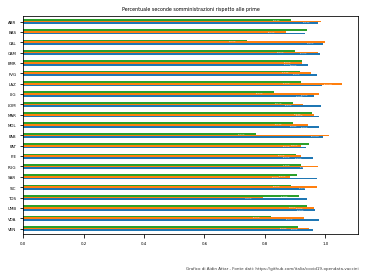

In [ ]:
yesterday = (date.today() - timedelta(days=1)).strftime('%d/%m/%Y')
days21 = (date.today() - timedelta(days=22)).strftime('%d/%m/%Y')
days28 = (date.today() - timedelta(days=29)).strftime('%d/%m/%Y')
days84 = (date.today() - timedelta(days=79)).strftime('%d/%m/%Y')
percPfizer = pd.DataFrame([ven_somm['Pfizer_Seconda_Cum'][yesterday]/ven_somm['Pfizer_Prima_Cum'][days21],
                           emr_somm['Pfizer_Seconda_Cum'][yesterday]/emr_somm['Pfizer_Prima_Cum'][days21],
                           vda_somm['Pfizer_Seconda_Cum'][yesterday]/vda_somm['Pfizer_Prima_Cum'][days21],
                           tos_somm['Pfizer_Seconda_Cum'][yesterday]/tos_somm['Pfizer_Prima_Cum'][days21],
                           sic_somm['Pfizer_Seconda_Cum'][yesterday]/sic_somm['Pfizer_Prima_Cum'][days21],
                           sar_somm['Pfizer_Seconda_Cum'][yesterday]/sar_somm['Pfizer_Prima_Cum'][days21],
                           pug_somm['Pfizer_Seconda_Cum'][yesterday]/pug_somm['Pfizer_Prima_Cum'][days21],
                           pie_somm['Pfizer_Seconda_Cum'][yesterday]/pie_somm['Pfizer_Prima_Cum'][days21],
                           pat_somm['Pfizer_Seconda_Cum'][yesterday]/pat_somm['Pfizer_Prima_Cum'][days21],
                           pab_somm['Pfizer_Seconda_Cum'][yesterday]/pab_somm['Pfizer_Prima_Cum'][days21],
                           mol_somm['Pfizer_Seconda_Cum'][yesterday]/mol_somm['Pfizer_Prima_Cum'][days21],
                           mar_somm['Pfizer_Seconda_Cum'][yesterday]/mar_somm['Pfizer_Prima_Cum'][days21],
                           lom_somm['Pfizer_Seconda_Cum'][yesterday]/lom_somm['Pfizer_Prima_Cum'][days21],
                           lig_somm['Pfizer_Seconda_Cum'][yesterday]/lig_somm['Pfizer_Prima_Cum'][days21],
                           laz_somm['Pfizer_Seconda_Cum'][yesterday]/laz_somm['Pfizer_Prima_Cum'][days21],
                           cam_somm['Pfizer_Seconda_Cum'][yesterday]/cam_somm['Pfizer_Prima_Cum'][days21],
                           cal_somm['Pfizer_Seconda_Cum'][yesterday]/cal_somm['Pfizer_Prima_Cum'][days21],
                           fvg_somm['Pfizer_Seconda_Cum'][yesterday]/fvg_somm['Pfizer_Prima_Cum'][days21],
                           bas_somm['Pfizer_Seconda_Cum'][yesterday]/bas_somm['Pfizer_Prima_Cum'][days21],
                           abr_somm['Pfizer_Seconda_Cum'][yesterday]/abr_somm['Pfizer_Prima_Cum'][days21],
                           umb_somm['Pfizer_Seconda_Cum'][yesterday]/umb_somm['Pfizer_Prima_Cum'][days21]])

percModerna = pd.DataFrame([ven_somm['Moderna_Seconda_Cum'][yesterday]/ven_somm['Moderna_Prima_Cum'][days28],
                           emr_somm['Moderna_Seconda_Cum'][yesterday]/emr_somm['Moderna_Prima_Cum'][days28],
                           vda_somm['Moderna_Seconda_Cum'][yesterday]/vda_somm['Moderna_Prima_Cum'][days28],
                           tos_somm['Moderna_Seconda_Cum'][yesterday]/tos_somm['Moderna_Prima_Cum'][days28],
                           sic_somm['Moderna_Seconda_Cum'][yesterday]/sic_somm['Moderna_Prima_Cum'][days28],
                           sar_somm['Moderna_Seconda_Cum'][yesterday]/sar_somm['Moderna_Prima_Cum'][days28],
                           pug_somm['Moderna_Seconda_Cum'][yesterday]/pug_somm['Moderna_Prima_Cum'][days28],
                           pie_somm['Moderna_Seconda_Cum'][yesterday]/pie_somm['Moderna_Prima_Cum'][days28],
                           pat_somm['Moderna_Seconda_Cum'][yesterday]/pat_somm['Moderna_Prima_Cum'][days28],
                           pab_somm['Moderna_Seconda_Cum'][yesterday]/pab_somm['Moderna_Prima_Cum'][days28],
                           mol_somm['Moderna_Seconda_Cum'][yesterday]/mol_somm['Moderna_Prima_Cum'][days28],
                           mar_somm['Moderna_Seconda_Cum'][yesterday]/mar_somm['Moderna_Prima_Cum'][days28],
                           lom_somm['Moderna_Seconda_Cum'][yesterday]/lom_somm['Moderna_Prima_Cum'][days28],
                           lig_somm['Moderna_Seconda_Cum'][yesterday]/lig_somm['Moderna_Prima_Cum'][days28],
                           laz_somm['Moderna_Seconda_Cum'][yesterday]/laz_somm['Moderna_Prima_Cum'][days28],
                           cam_somm['Moderna_Seconda_Cum'][yesterday]/cam_somm['Moderna_Prima_Cum'][days28],
                           cal_somm['Moderna_Seconda_Cum'][yesterday]/cal_somm['Moderna_Prima_Cum'][days28],
                           fvg_somm['Moderna_Seconda_Cum'][yesterday]/fvg_somm['Moderna_Prima_Cum'][days28],
                           bas_somm['Moderna_Seconda_Cum'][yesterday]/bas_somm['Moderna_Prima_Cum'][days28],
                           abr_somm['Moderna_Seconda_Cum'][yesterday]/abr_somm['Moderna_Prima_Cum'][days28],
                           umb_somm['Moderna_Seconda_Cum'][yesterday]/umb_somm['Moderna_Prima_Cum'][days28]])
                           
percAstraZeneca = pd.DataFrame([ven_somm['AstraZeneca_Seconda_Cum'][yesterday]/ven_somm['AstraZeneca_Prima_Cum'][days84],
                           emr_somm['AstraZeneca_Seconda_Cum'][yesterday]/emr_somm['AstraZeneca_Prima_Cum'][days84],
                           vda_somm['AstraZeneca_Seconda_Cum'][yesterday]/vda_somm['AstraZeneca_Prima_Cum'][days84],
                           tos_somm['AstraZeneca_Seconda_Cum'][yesterday]/tos_somm['AstraZeneca_Prima_Cum'][days84],
                           sic_somm['AstraZeneca_Seconda_Cum'][yesterday]/sic_somm['AstraZeneca_Prima_Cum'][days84],
                           sar_somm['AstraZeneca_Seconda_Cum'][yesterday]/sar_somm['AstraZeneca_Prima_Cum'][days84],
                           pug_somm['AstraZeneca_Seconda_Cum'][yesterday]/pug_somm['AstraZeneca_Prima_Cum'][days84],
                           pie_somm['AstraZeneca_Seconda_Cum'][yesterday]/pie_somm['AstraZeneca_Prima_Cum'][days84],
                           pat_somm['AstraZeneca_Seconda_Cum'][yesterday]/pat_somm['AstraZeneca_Prima_Cum'][days84],
                           pab_somm['AstraZeneca_Seconda_Cum'][yesterday]/pab_somm['AstraZeneca_Prima_Cum'][days84],
                           mol_somm['AstraZeneca_Seconda_Cum'][yesterday]/mol_somm['AstraZeneca_Prima_Cum'][days84],
                           mar_somm['AstraZeneca_Seconda_Cum'][yesterday]/mar_somm['AstraZeneca_Prima_Cum'][days84],
                           lom_somm['AstraZeneca_Seconda_Cum'][yesterday]/lom_somm['AstraZeneca_Prima_Cum'][days84],
                           lig_somm['AstraZeneca_Seconda_Cum'][yesterday]/lig_somm['AstraZeneca_Prima_Cum'][days84],
                           laz_somm['AstraZeneca_Seconda_Cum'][yesterday]/laz_somm['AstraZeneca_Prima_Cum'][days84],
                           cam_somm['AstraZeneca_Seconda_Cum'][yesterday]/cam_somm['AstraZeneca_Prima_Cum'][days84],
                           cal_somm['AstraZeneca_Seconda_Cum'][yesterday]/cal_somm['AstraZeneca_Prima_Cum'][days84],
                           fvg_somm['AstraZeneca_Seconda_Cum'][yesterday]/fvg_somm['AstraZeneca_Prima_Cum'][days84],
                           bas_somm['AstraZeneca_Seconda_Cum'][yesterday]/bas_somm['AstraZeneca_Prima_Cum'][days84],
                           abr_somm['AstraZeneca_Seconda_Cum'][yesterday]/abr_somm['AstraZeneca_Prima_Cum'][days84],
                           umb_somm['AstraZeneca_Seconda_Cum'][yesterday]/umb_somm['AstraZeneca_Prima_Cum'][days84]])

regioni = ['VEN', 'EMR', 'VDA', 'TOS', 'SIC', 'SAR', 'PUG', 'PIE',
           'PAT', 'PAB', 'MOL', 'MAR', 'LOM', 'LIG', 'LAZ', 'CAM',
           'CAL', 'FVG', 'BAS', 'ABR', 'UMB']

for i in perc:
    perc[i] = round(perc[i], 4)

percPfizer['area'] = regioni
percPfizer.sort_values(by = 'area', inplace = True, ascending=False)
percPfizer.set_index('area', inplace = True)
percPfizer.columns = ['percentuale_Pfizer']

percModerna['area'] = regioni
percModerna.sort_values(by = 'area', inplace = True, ascending=False)
percModerna.set_index('area', inplace = True)
percModerna.columns = ['percentuale_Moderna']

percAstraZeneca['area'] = regioni
percAstraZeneca.sort_values(by = 'area', inplace = True, ascending=False)
percAstraZeneca.set_index('area', inplace = True)
percAstraZeneca.columns = ['percentuale_AstraZeneca']

perc_Fornitori = percPfizer.merge(percModerna,left_index=True, right_index=True, how='right')
perc_Fornitori = perc_Fornitori.merge(percAstraZeneca,left_index=True, right_index=True, how='right')
perc_Fornitori.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure()
ax = plt.gca()


print(percAstraZeneca)
perc_Fornitori.plot( #x = index,  
    ax = ax,
#    x = 'area', 
    ylabel = '',
    kind = 'barh', y = ['percentuale_Pfizer','percentuale_Moderna','percentuale_AstraZeneca'],
    title = 'Percentuale seconde somministrazioni rispetto alle prime', 
    mark_right = True,
    legend = False) 

ax.set_ylabel("")

valori=perc_Fornitori['percentuale_Pfizer']
# ax.text(x,y,text,color)
for i,val in enumerate(valori):
    ax.text(val - 0.06, i-0.24, str("{:.2%}".format(val)), color="w", fontsize=2)
    

valori=perc_Fornitori['percentuale_Moderna']
# ax.text(x,y,text,color)
for i,val in enumerate(valori):
    ax.text(val - 0.06, i-0.07, str("{:.2%}".format(val)), color="w", fontsize=2)


valori=perc_Fornitori['percentuale_AstraZeneca']
# ax.text(x,y,text,color)
for i,val in enumerate(valori):
    ax.text(val - 0.06, i+0.0879, str("{:.2%}".format(val)), color="w", fontsize=2)
    
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#plt.legend(loc = 'center left', bbox_to_anchor=(1.01, 0.5))

#watermark2()
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.savefig('Barre_Seconde_Prime_Fornitori.png', dpi=1000)


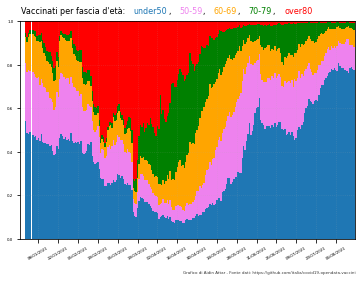

In [ ]:
ita_età['totale'] = ( ita_età['12-19'] + ita_età['20-29'] + ita_età['30-39'] + ita_età['40-49'] + ita_età['50-59'] + ita_età['60-69'] + ita_età['70-79'] + ita_età['80-89'] + ita_età['90+'] )
ita_età['prop12-19'] = ita_età['12-19'] / ita_età['totale']
ita_età['prop20-29'] = ita_età['20-29'] / ita_età['totale']
ita_età['prop30-39'] = ita_età['30-39'] / ita_età['totale']
ita_età['prop40-49'] = ita_età['40-49'] / ita_età['totale']
ita_età['prop50-59'] = ita_età['50-59'] / ita_età['totale']
ita_età['prop60-69'] = ita_età['60-69'] / ita_età['totale']
ita_età['prop70-79'] = ita_età['70-79'] / ita_età['totale']
ita_età['prop80-89'] = ita_età['80-89'] / ita_età['totale']
ita_età['prop90+']   = ita_età['90+']   / ita_età['totale']

plt.figure()
ax = plt.gca()
label = ['12-19',
         '20-29', 
         '30-39',
         '40-49',
         '50-59',
         '60-69',
         '70-79',
         '80-89',
         '90+']
ita_età[['prop12-19',
         'prop20-29', 
         'prop30-39',
         'prop40-49',
         'prop50-59',
         'prop60-69',
         'prop70-79',
         'prop80-89',
         'prop90+']].plot.bar(
        ax = ax,
        stacked = True,
        #title = "Vaccini somministrati per fascia d'età",
        xlabel = '',
        legend = False,
        #color = ['C0', 'orange', 'red', 'green', 'violet', 'brown', 'black', 'pink'],width = 1)
        color = ['C0', 'C0', 'C0', 'C0', 'violet', 'orange', 'green', 'red', 'red'],width = 1)
#plt.legend(label, loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))



plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.text(0.25, 0.90, "Vaccinati per fascia d'età: ", transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium")
plt.text(0.425,0.9,"under50",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium",color="C0")
plt.text(0.47, 0.9, ",", transform=plt.gcf().transFigure,ha="center", va="bottom", size="medium")
plt.text(0.52,0.9,"50-59",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium",color="violet")
plt.text(0.55, 0.9, ",", transform=plt.gcf().transFigure,ha="center", va="bottom", size="medium")
plt.text(0.6,0.9,"60-69",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium",color="orange")
plt.text(0.63, 0.9, ",",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium")
plt.text(0.68,0.9,"70-79",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium",color="green")
plt.text(0.71, 0.9, ",",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium")
plt.text(0.77,0.9,"over80", transform=plt.gcf().transFigure,ha="center", va="bottom", size="medium",color="red")
plt.grid(alpha = 0.2, linestyle='dotted')
plt.ylim(top = 1.0)

plt.savefig('Italia_Giorn_Età_Prop.png', dpi=300)

plt.show()

In [ ]:
popolazione_ita = popolazione_ita.drop(101, axis=0)

(0.0, 1039679.55)

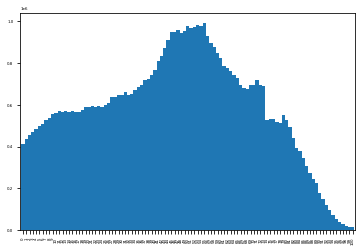

In [ ]:
plt.figure()
ax = plt.gca()
popolazione_ita['Value'].plot.bar(
        ax = ax,
        stacked = True,
        #title = "Vaccini somministrati per fascia d'età",
        legend = False,
        width = 1)
plt.ylim(bottom = 0)

In [ ]:
popolazione_grouped = popolazione.groupby(popolazione.Territorio)
popolazione_emr     = popolazione_grouped.get_group('Emilia-Romagna')
popolazione_grouped = popolazione_emr.groupby(popolazione_emr.Sesso)
popolazione_emr     = popolazione_grouped.get_group('totale')
popolazione_grouped = popolazione_emr.groupby(popolazione_emr['Stato civile'])
popolazione_emr     = popolazione_grouped.get_group('totale')
popolazione_emr     = popolazione_emr.reset_index(drop=True)

popolazione_emr

ITTER107      Territorio TIPO_DATO15 Tipo di indicatore demografico  \
0       ITD5  Emilia-Romagna         JAN      popolazione al 1º gennaio   
1       ITD5  Emilia-Romagna         JAN      popolazione al 1º gennaio   
2       ITD5  Emilia-Romagna         JAN      popolazione al 1º gennaio   
3       ITD5  Emilia-Romagna         JAN      popolazione al 1º gennaio   
4       ITD5  Emilia-Romagna         JAN      popolazione al 1º gennaio   
..       ...             ...         ...                            ...   
97      ITD5  Emilia-Romagna         JAN      popolazione al 1º gennaio   
98      ITD5  Emilia-Romagna         JAN      popolazione al 1º gennaio   
99      ITD5  Emilia-Romagna         JAN      popolazione al 1º gennaio   
100     ITD5  Emilia-Romagna         JAN      popolazione al 1º gennaio   
101     ITD5  Emilia-Romagna         JAN      popolazione al 1º gennaio   

     SEXISTAT1   Sesso     ETA1             Età  STATCIV2 Stato civile  TIME  \
0            9  totale       Y0          0 anni        99       totale  2020   
1            9  totale       Y1          1 anni        99       totale  2020   
2            9  totale       Y2          2 anni        99       totale  2020   
3            9  totale       Y3          3 anni        99       totale  2020   
4            9  totale       Y4          4 anni        99       totale  2020   
..         ...     ...      ...             ...       ...          ...   ...   
97           9  totale      Y97         97 anni        99       totale  2020   
98           9  totale      Y98         98 anni        99       totale  2020   
99           9  totale      Y99         99 anni        99       totale  2020   
100          9  totale  Y_GE100  100 anni e più        99       totale  2020   
101          9  totale    TOTAL          totale        99       totale  2020   

     Seleziona periodo    Value  Flag Codes  Flags  
0                 2020    30914         NaN    NaN  
1                 2020    32779         NaN    NaN  
2                 2020    33739         NaN    NaN  
3                 2020    35347         NaN    NaN  
4                 2020    36507         NaN    NaN  
..                 ...      ...         ...    ...  
97                2020     2809         NaN    NaN  
98                2020     2008         NaN    NaN  
99                2020     1289         NaN    NaN  
100               2020     1415         NaN    NaN  
101               2020  4464119         NaN    NaN  

[102 rows x 15 columns]

In [ ]:
somm1_emr

data_somministrazione                fornitore area fascia_anagrafica  \
23                2020-12-27          Pfizer/BioNTech  EMR             20-29   
24                2020-12-27          Pfizer/BioNTech  EMR             30-39   
25                2020-12-27          Pfizer/BioNTech  EMR             40-49   
26                2020-12-27          Pfizer/BioNTech  EMR             50-59   
27                2020-12-27          Pfizer/BioNTech  EMR             60-69   
...                      ...                      ...  ...               ...   
108990            2021-08-19  Vaxzevria (AstraZeneca)  EMR             30-39   
108991            2021-08-19  Vaxzevria (AstraZeneca)  EMR             40-49   
108992            2021-08-19  Vaxzevria (AstraZeneca)  EMR             50-59   
108993            2021-08-19  Vaxzevria (AstraZeneca)  EMR             60-69   
108994            2021-08-19  Vaxzevria (AstraZeneca)  EMR             70-79   

        sesso_maschile  sesso_femminile  prima_dose  seconda_dose  \
23                  53               86         139             0   
24                  58               83         141             0   
25                  80              147         227             0   
26                  71              217         288             0   
27                 100               51         151             0   
...                ...              ...         ...           ...   
108990               0                1           0             1   
108991               1                1           0             2   
108992               1                0           0             1   
108993             458              452           2           908   
108994              74               75           0           149   

        pregressa_infezione codice_NUTS1 codice_NUTS2  codice_regione_ISTAT  \
23                        0          ITH         ITH5                     8   
24                        0          ITH         ITH5                     8   
25                        0          ITH         ITH5                     8   
26                        0          ITH         ITH5                     8   
27                        0          ITH         ITH5                     8   
...                     ...          ...          ...                   ...   
108990                    0          ITH         ITH5                     8   
108991                    0          ITH         ITH5                     8   
108992                    0          ITH         ITH5                     8   
108993                    0          ITH         ITH5                     8   
108994                    0          ITH         ITH5                     8   

             nome_area  totale  
23      Emilia-Romagna     139  
24      Emilia-Romagna     141  
25      Emilia-Romagna     227  
26      Emilia-Romagna     288  
27      Emilia-Romagna     151  
...                ...     ...  
108990  Emilia-Romagna       1  
108991  Emilia-Romagna       2  
108992  Emilia-Romagna       1  
108993  Emilia-Romagna     910  
108994  Emilia-Romagna     149  

[5957 rows x 14 columns]

In [ ]:
emr_0_19=0
emr_20_29=0
emr_30_39=0
emr_40_49=0
emr_50_59=0
emr_60_69=0
emr_70_79=0
emr_80_89=0
emr_90=0

for i in range(0, 20):
    emr_0_19 += popolazione_emr['Value'][i]
for i in range(20, 30):
    emr_20_29 += popolazione_emr['Value'][i]
for i in range(30, 40):
    emr_30_39 += popolazione_emr['Value'][i]
for i in range(40, 50):
    emr_40_49 += popolazione_emr['Value'][i]
for i in range(50, 60):
    emr_50_59 += popolazione_emr['Value'][i]
for i in range(60, 70):
    emr_60_69 += popolazione_emr['Value'][i]
for i in range(70, 80):
    emr_70_79 += popolazione_emr['Value'][i]
for i in range(80, 90):
    emr_80_89 += popolazione_emr['Value'][i]
for i in range(90, 101):
    emr_90 += popolazione_emr['Value'][i]
    
emr_20_29

420660

In [ ]:
somm1_emr_grouped = somm1_emr.groupby(somm1_emr.fascia_anagrafica)
somm1_emr_20     = somm1_emr_grouped.get_group('20-29')
somm1_emr_20 =somm1_emr_20.groupby("data_somministrazione").sum()
somm1_emr_20['totale'] = somm1_emr_20['sesso_maschile'] + somm1_emr_20['sesso_femminile']

somm1_emr_30     = somm1_emr_grouped.get_group('30-39')
somm1_emr_30 =somm1_emr_30.groupby("data_somministrazione").sum()
somm1_emr_30['totale'] = somm1_emr_30['sesso_maschile'] + somm1_emr_30['sesso_femminile']

somm1_emr_40     = somm1_emr_grouped.get_group('40-49')
somm1_emr_40 =somm1_emr_40.groupby("data_somministrazione").sum()
somm1_emr_40['totale'] = somm1_emr_40['sesso_maschile'] + somm1_emr_40['sesso_femminile']

somm1_emr_50     = somm1_emr_grouped.get_group('50-59')
somm1_emr_50 =somm1_emr_50.groupby("data_somministrazione").sum()
somm1_emr_50['totale'] = somm1_emr_50['sesso_maschile'] + somm1_emr_50['sesso_femminile']

somm1_emr_60     = somm1_emr_grouped.get_group('60-69')
somm1_emr_60 =somm1_emr_60.groupby("data_somministrazione").sum()
somm1_emr_60['totale'] = somm1_emr_60['sesso_maschile'] + somm1_emr_60['sesso_femminile']

somm1_emr_70     = somm1_emr_grouped.get_group('70-79')
somm1_emr_70 =somm1_emr_70.groupby("data_somministrazione").sum()
somm1_emr_70['totale'] = somm1_emr_70['sesso_maschile'] + somm1_emr_70['sesso_femminile']

somm1_emr_80     = somm1_emr_grouped.get_group('80-89')
somm1_emr_80 =somm1_emr_80.groupby("data_somministrazione").sum()
somm1_emr_80['totale'] = somm1_emr_80['sesso_maschile'] + somm1_emr_80['sesso_femminile']

somm1_emr_90     = somm1_emr_grouped.get_group('90+')
somm1_emr_90 =somm1_emr_90.groupby("data_somministrazione").sum()
somm1_emr_90['totale'] = somm1_emr_90['sesso_maschile'] + somm1_emr_90['sesso_femminile']

In [ ]:
emr_età = pd.DataFrame()
emr_età['20-29'] = somm1_emr_20['totale']
emr_età['30-39'] = somm1_emr_30['totale']
emr_età['40-49'] = somm1_emr_40['totale']
emr_età['50-59'] = somm1_emr_50['totale']
emr_età['60-69'] = somm1_emr_60['totale']
emr_età['70-79'] = somm1_emr_70['totale']
emr_età['80-89'] = somm1_emr_80['totale']
emr_età[  '90+'] = somm1_emr_90['totale']

emr_età['20-29_prima'] = somm1_emr_20['prima_dose']
emr_età['30-39_prima'] = somm1_emr_30['prima_dose']
emr_età['40-49_prima'] = somm1_emr_40['prima_dose']
emr_età['50-59_prima'] = somm1_emr_50['prima_dose']
emr_età['60-69_prima'] = somm1_emr_60['prima_dose']
emr_età['70-79_prima'] = somm1_emr_70['prima_dose']
emr_età['80-89_prima'] = somm1_emr_80['prima_dose']
emr_età[ '90+_prima'] = somm1_emr_90['prima_dose']
emr_età['20-29_seconda'] = somm1_emr_20['seconda_dose']
emr_età['30-39_seconda'] = somm1_emr_30['seconda_dose']
emr_età['40-49_seconda'] = somm1_emr_40['seconda_dose']
emr_età['50-59_seconda'] = somm1_emr_50['seconda_dose']
emr_età['60-69_seconda'] = somm1_emr_60['seconda_dose']
emr_età['70-79_seconda'] = somm1_emr_70['seconda_dose']
emr_età['80-89_seconda'] = somm1_emr_80['seconda_dose']
emr_età[  '90+_seconda'] = somm1_emr_90['seconda_dose']

emr_età.index = pd.DatetimeIndex(emr_età.index)
emr_età = emr_età.reindex(idx)
emr_età.index = emr_età.index.strftime('%d/%m/%Y')
emr_età

20-29   30-39   40-49   50-59   60-69  70-79  80-89    90+  \
27/12/2020   139.0   141.0   227.0   288.0   151.0   13.0    8.0    5.0   
28/12/2020     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN   
29/12/2020     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN   
30/12/2020     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN   
31/12/2020   241.0   403.0   460.0   497.0   297.0   55.0  144.0  116.0   
...            ...     ...     ...     ...     ...    ...    ...    ...   
15/08/2021  1209.0  1304.0  1226.0   602.0  1230.0  223.0   31.0    4.0   
16/08/2021  4475.0  3936.0  3808.0  1890.0  1457.0  447.0  113.0   17.0   
17/08/2021  5088.0  4584.0  4371.0  2152.0  1440.0  409.0  138.0   19.0   
18/08/2021  4794.0  4257.0  3849.0  2185.0  1847.0  554.0  132.0   24.0   
19/08/2021  4054.0  4938.0  3697.0  1821.0  1627.0  468.0  133.0   32.0   

            20-29_prima  30-39_prima  ...  80-89_prima  90+_prima  \
27/12/2020        139.0        141.0  ...          8.0        5.0   
28/12/2020          NaN          NaN  ...          NaN        NaN   
29/12/2020          NaN          NaN  ...          NaN        NaN   
30/12/2020          NaN          NaN  ...          NaN        NaN   
31/12/2020        241.0        403.0  ...        144.0      116.0   
...                 ...          ...  ...          ...        ...   
15/08/2021        725.0        751.0  ...         16.0        3.0   
16/08/2021       2725.0       2626.0  ...         64.0       10.0   
17/08/2021       3422.0       3048.0  ...         75.0       13.0   
18/08/2021       3169.0       2912.0  ...         65.0       18.0   
19/08/2021       2471.0       2312.0  ...         83.0       17.0   

            20-29_seconda  30-39_seconda  40-49_seconda  50-59_seconda  \
27/12/2020            0.0            0.0            0.0            0.0   
28/12/2020            NaN            NaN            NaN            NaN   
29/12/2020            NaN            NaN            NaN            NaN   
30/12/2020            NaN            NaN            NaN            NaN   
31/12/2020            0.0            0.0            0.0            0.0   
...                   ...            ...            ...            ...   
15/08/2021          460.0          537.0          519.0          168.0   
16/08/2021         1598.0         1151.0         1363.0          410.0   
17/08/2021         1494.0         1386.0         1526.0          451.0   
18/08/2021         1469.0         1199.0         1105.0          411.0   
19/08/2021         1480.0         2491.0         1369.0          351.0   

            60-69_seconda  70-79_seconda  80-89_seconda  90+_seconda  
27/12/2020            0.0            0.0            0.0          0.0  
28/12/2020            NaN            NaN            NaN          NaN  
29/12/2020            NaN            NaN            NaN          NaN  
30/12/2020            NaN            NaN            NaN          NaN  
31/12/2020            0.0            0.0            0.0          0.0  
...                   ...            ...            ...          ...  
15/08/2021         1121.0          190.0            6.0          1.0  
16/08/2021          947.0          198.0           16.0          6.0  
17/08/2021          870.0          175.0           30.0          4.0  
18/08/2021         1236.0          246.0           34.0          5.0  
19/08/2021         1090.0          223.0           26.0         12.0  

[236 rows x 24 columns]

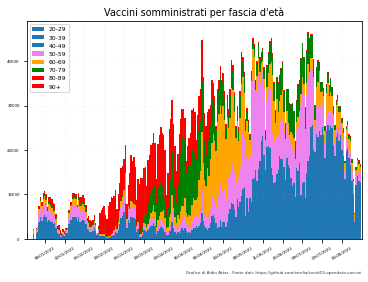

In [ ]:
plt.figure()
ax = plt.gca()
label = ['20-29', 
         '30-39',
         '40-49',
         '50-59',
         '60-69',
         '70-79',
         '80-89',
         '90+']
emr_età[['20-29', 
         '30-39',
         '40-49',
         '50-59',
         '60-69',
         '70-79',
         '80-89',
         '90+']].plot.bar(
        ax = ax,
        stacked = True,
        title = "Vaccini somministrati per fascia d'età",
        xlabel = '',
        #color = ['C0', 'orange', 'red', 'green', 'violet', 'brown', 'black', 'pink'],width = 1)
        color = ['C0', 'C0', 'C0', 'violet', 'orange', 'green', 'red', 'red'],width = 1)
plt.legend(label, loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/emrlia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')

plt.savefig('Emilia_Giorn_Età.png', dpi=300)

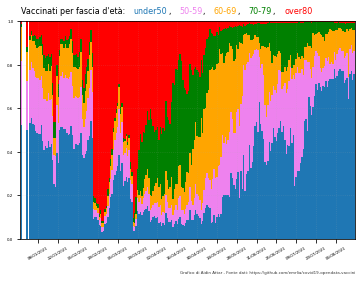

In [ ]:
emr_età['totale'] = ( emr_età['20-29'] + emr_età['30-39'] + emr_età['40-49'] + emr_età['50-59'] + emr_età['60-69'] + emr_età['70-79'] + emr_età['80-89'] + emr_età['90+'] )
#emr_età['prop16-19'] = emr_età['16-19'] / emr_età['totale']
emr_età['prop20-29'] = emr_età['20-29'] / emr_età['totale']
emr_età['prop30-39'] = emr_età['30-39'] / emr_età['totale']
emr_età['prop40-49'] = emr_età['40-49'] / emr_età['totale']
emr_età['prop50-59'] = emr_età['50-59'] / emr_età['totale']
emr_età['prop60-69'] = emr_età['60-69'] / emr_età['totale']
emr_età['prop70-79'] = emr_età['70-79'] / emr_età['totale']
emr_età['prop80-89'] = emr_età['80-89'] / emr_età['totale']
emr_età['prop90+']   = emr_età['90+']   / emr_età['totale']

plt.figure()
ax = plt.gca()
label = ['20-29', 
         '30-39',
         '40-49',
         '50-59',
         '60-69',
         '70-79',
         '80-89',
         '90+']
emr_età[['prop20-29', 
         'prop30-39',
         'prop40-49',
         'prop50-59',
         'prop60-69',
         'prop70-79',
         'prop80-89',
         'prop90+']].plot.bar(
        ax = ax,
        stacked = True,
        #title = "Vaccini somministrati per fascia d'età",
        xlabel = '',
        legend = False,
        #color = ['C0', 'orange', 'red', 'green', 'violet', 'brown', 'black', 'pink'],width = 1)
        color = ['C0', 'C0', 'C0', 'violet', 'orange', 'green', 'red', 'red'],width = 1)
#plt.legend(label, loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))



plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/emrlia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.text(0.25, 0.90, "Vaccinati per fascia d'età: ", transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium")
plt.text(0.425,0.9,"under50",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium",color="C0")
plt.text(0.47, 0.9, ",", transform=plt.gcf().transFigure,ha="center", va="bottom", size="medium")
plt.text(0.52,0.9,"50-59",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium",color="violet")
plt.text(0.55, 0.9, ",", transform=plt.gcf().transFigure,ha="center", va="bottom", size="medium")
plt.text(0.6,0.9,"60-69",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium",color="orange")
plt.text(0.63, 0.9, ",",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium")
plt.text(0.68,0.9,"70-79",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium",color="green")
plt.text(0.71, 0.9, ",",transform=plt.gcf().transFigure, ha="center", va="bottom", size="medium")
plt.text(0.77,0.9,"over80", transform=plt.gcf().transFigure,ha="center", va="bottom", size="medium",color="red")
plt.grid(alpha = 0.2, linestyle='dotted')
plt.ylim(top = 1.0)

plt.savefig('Emilia_Giorn_Età_Prop.png', dpi=300)

plt.show()

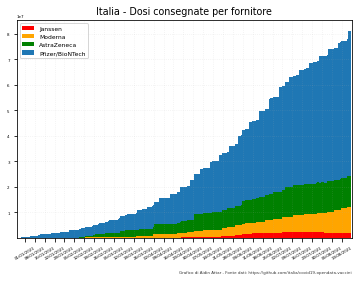

In [ ]:
plt.figure()
ax = plt.gca()

legend = ['Janssen','Moderna', 'AstraZeneca', 'Pfizer/BioNTech', ]
colors = ['red','orange', 'green', 'C0']
ita[['Janssen_Cons_CUM','Moderna_Cons_CUM','AstraZeneca_Cons_CUM', 'Pfizer_Cons_CUM' ]].plot(
    ax = ax,
    kind='bar',
    stacked=True,
    mark_right=True,
    title='Italia - Dosi consegnate per fornitore',
    width = 1,
    alpha = 1,
    color = colors
    )

plt.legend(legend, loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')

plt.savefig('Italia_Fornitore_Cons.png', dpi=300)


In [ ]:
previste = pd.read_csv('dosi_previste.csv')

previste = previste.set_index('data')
previste.index = pd.DatetimeIndex(previste.index)
previste = previste.reindex(idx)
previste.index = previste.index.strftime('%d/%m/%Y')

#previste.dosi_previste.fillna(method='ffill', inplace = True )

previste

dosi_previste
27/12/2020            NaN
28/12/2020            NaN
29/12/2020            NaN
30/12/2020            NaN
31/12/2020            NaN
...                   ...
15/08/2021            NaN
16/08/2021            NaN
17/08/2021            NaN
18/08/2021            NaN
19/08/2021            NaN

[236 rows x 1 columns]

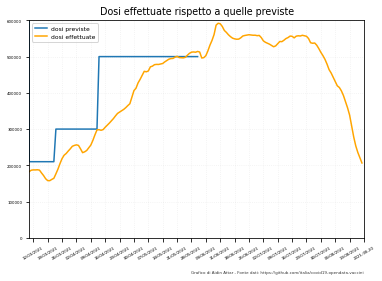

In [ ]:
plt.figure()
ax = plt.gca()
ax.plot( previste.index, previste.dosi_previste, label  = "dosi previste", color = 'C0')
ax.plot( ita.index, ita.avg, label  = "dosi effettuate", color = 'orange')

#ax.set(xticks=ita.index.values)

ax.set_xlim([date(2021, 3, 10).strftime('%d/%m/%Y'), today])
ax.set_ylim([0, 600000])
plt.legend( loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
plt.title('Dosi effettuate rispetto a quelle previste')
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')

plt.savefig('Italia_Prev.png', dpi=300)

In [ ]:
ita = ita.merge(previste,left_index=True, right_index=True, how='right')
ita

area    totale  sesso_maschile  sesso_femminile  prima_dose  \
27/12/2020  ITA    7247.0          3435.0           3812.0      7233.0   
28/12/2020  ITA    1446.0           657.0            789.0      1440.0   
29/12/2020  ITA    1029.0           444.0            585.0      1024.0   
30/12/2020  ITA    4770.0          1904.0           2866.0      4757.0   
31/12/2020  ITA   25660.0          9940.0          15720.0     25564.0   
...         ...       ...             ...              ...         ...   
15/08/2021  ITA   52527.0         28870.0          23657.0     27010.0   
16/08/2021  ITA  233639.0        123914.0         109725.0    122270.0   
17/08/2021  ITA  248292.0        133022.0         115270.0    124244.0   
18/08/2021  ITA  255704.0        137087.0         118617.0    132694.0   
19/08/2021  ITA  234338.0        124766.0         109572.0    116943.0   

            seconda_dose  pregressa_infezione nome_area  per_1000  prima_1000  \
27/12/2020           0.0                  NaN    Italia  0.120063    0.119831   
28/12/2020           0.0                  NaN    Italia  0.023956    0.023857   
29/12/2020           0.0                  NaN    Italia  0.017048    0.016965   
30/12/2020           0.0                  NaN    Italia  0.079026    0.078810   
31/12/2020           0.0                  NaN    Italia  0.425116    0.423526   
...                  ...                  ...       ...       ...         ...   
15/08/2021       24361.0                  NaN    Italia  0.870229    0.447482   
16/08/2021      104642.0                  NaN    Italia  3.870759    2.025679   
17/08/2021      117257.0                  NaN    Italia  4.113519    2.058383   
18/08/2021      115336.0                  NaN    Italia  4.236315    2.198376   
19/08/2021      110673.0                  NaN    Italia  3.882339    1.937425   

            ...  Janssen_secondadose  Pfizer_Prima_Cum  Pfizer_Seconda_Cum  \
27/12/2020  ...                  0.0            7233.0                 0.0   
28/12/2020  ...                  0.0            8673.0                 0.0   
29/12/2020  ...                  0.0            9697.0                 0.0   
30/12/2020  ...                  0.0           14454.0                 0.0   
31/12/2020  ...                  0.0           40018.0                 0.0   
...         ...                  ...               ...                 ...   
15/08/2021  ...                  0.0        27152145.0          24399662.0   
16/08/2021  ...                  0.0        27248062.0          24473396.0   
17/08/2021  ...                  0.0        27343701.0          24549503.0   
18/08/2021  ...                  0.0        27447804.0          24626615.0   
19/08/2021  ...                  0.0        27540313.0          24695995.0   

            Moderna_Prima_Cum  Moderna_Seconda_Cum  AstraZeneca_Prima_Cum  \
27/12/2020                0.0                  0.0                    0.0   
28/12/2020                0.0                  0.0                    0.0   
29/12/2020                0.0                  0.0                    0.0   
30/12/2020                0.0                  0.0                    0.0   
31/12/2020                0.0                  0.0                    0.0   
...                       ...                  ...                    ...   
15/08/2021          4725108.0            3246149.0              6366392.0   
16/08/2021          4749442.0            3267007.0              6366544.0   
17/08/2021          4775093.0            3293347.0              6366709.0   
18/08/2021          4800326.0            3319277.0              6366838.0   
19/08/2021          4821804.0            3348400.0              6366978.0   

            AstraZeneca_Seconda_Cum  Janssen_Prima_Cum  Janssen_Seconda_Cum  \
27/12/2020                      0.0                0.0                  0.0   
28/12/2020                      0.0                0.0                  0.0   
29/12/2020                      0.0               

In [ ]:
ita['deficit'] = ita['dosi_previste'] - ita['avg']
ita['deficit_cum'] = ita['deficit'].cumsum()
ita['dosi_previste_cum'] = ita['dosi_previste'].cumsum()

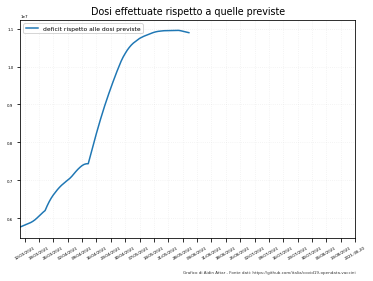

In [ ]:
plt.figure()
ax = plt.gca()
ax.plot( ita.index, ita.deficit_cum, label  = "deficit rispetto alle dosi previste", color = 'C0')

#ax.set(xticks=ita.index.values)

ax.set_xlim([date(2021, 3, 10).strftime('%d/%m/%Y'), today])
plt.legend( loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
plt.title('Dosi effettuate rispetto a quelle previste')
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')
plt.savefig('Italia_Deficit.png', dpi=300)

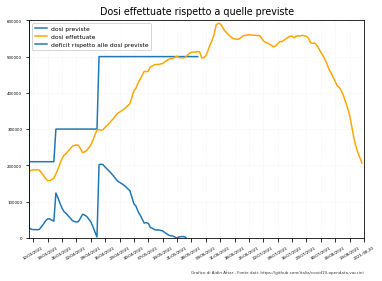

In [ ]:
plt.figure()
ax = plt.gca()
ax.plot( previste.index, previste.dosi_previste, label  = "dosi previste", color = 'C0')
ax.plot( ita.index, ita.avg, label  = "dosi effettuate", color = 'orange')
ax.plot( ita.index, ita.deficit, label  = "deficit rispetto alle dosi previste", color = 'C0')

#ax.set(xticks=ita.index.values)

ax.set_xlim([date(2021, 3, 10).strftime('%d/%m/%Y'), today])
ax.set_ylim([0, 600000])
plt.legend( loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
plt.title('Dosi effettuate rispetto a quelle previste')
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')
#plt.savefig('Italia_Deficit.png', dpi=300)

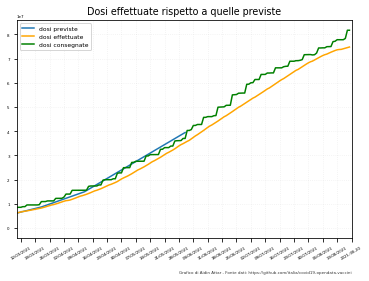

In [ ]:
plt.figure()
ax = plt.gca()
ax.plot( ita.index, ita.dosi_previste_cum, label  = "dosi previste", color = 'C0')
ax.plot( ita.index, ita.cumulativa, label  = "dosi effettuate", color = 'orange')
ax.plot( ita.index,ita.cumulativa_dosi, label  = "dosi consegnate", color = 'green')

#ax.set(xticks=ita.index.values)

ax.set_xlim([date(2021, 3, 10).strftime('%d/%m/%Y'), today])
plt.legend( loc="upper left", prop={'size': 6})
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.rcParams['font.size'] = '8'
plt.rcParams['xtick.labelsize'] = '4'
plt.rcParams['ytick.labelsize'] = '4'
plt.xticks(rotation=30)
plt.title('Dosi effettuate rispetto a quelle previste')
#watermark2(ax)
plt.text(0.9, 0., 'Grafico di Aidin Attar - Fonte dati: https://github.com/italia/covid19-opendata-vaccini', transform=plt.gcf().transFigure,
        fontsize=4, color='black', alpha=0.8,
        ha='right', va='bottom', rotation='0')
plt.grid(alpha = 0.2, linestyle='dotted')
plt.savefig('Italia_Programma.png', dpi=300)